In [4]:
import cairocffi as cairo
import os
import io
import numpy as np
from IPython.display import display, Image

In [5]:
from cairo_jupyter import *
from shapes import *

In [6]:
class person:
    def __init__(self):
        #Rotation = np.random.normal(mu, sigma, 20)
        #Arm = np.random.normal(mu, sigma, 100)
        #Scale = np.random.normal(mu, sigma, 100)
        #Lleg = np.random.normal(mu, sigma, 100)
        #Rleg = np.random.normal(mu, sigma, 100)
        self.Rotation = np.random.uniform(-10, 10, 100)
        self.Arm = np.random.uniform(-20, 100, 100)
        self.Scale = np.random.uniform(0.5, 1, 100)
        self.Lleg = np.random.uniform(-20, 100, 50)
        self.Rleg = np.random.uniform(-20, 100, 50)
    def person_shape(self,arm, left_leg, right_leg, **kwargs):

        person = ShapeGroup({
            'root': Transform(translation = (0.5, 0.2), children = ShapeGroup({
            'head': Circle(0, 0, 0.1, fill = (0.8, 0, 0)),
            'body': Rectangle(-0.1, 0.1, 0.2, 0.38, fill = (0, 0, 0.9)),
            #'body': Rectangle(-0.05, 0.1, 0.1, 0.4, fill = (0, 0, 0.9)),
            'left_arm': Transform(translation = (-0.05, 0.15), rotation = 135-arm, children = ShapeGroup({
                'arm': Rectangle(-0.025, 0.04, 0.05, 0.3, fill = (0, 0.8, 0))
            })),
            'right_arm': Transform(translation = (0.05, 0.15), rotation = -135+arm, children = ShapeGroup({
                'arm': Rectangle(-0.025, 0.04, 0.05, 0.3, fill = (0, 0.8, 0))
            })),
            'left_leg': Transform(translation = (-0.06, 0.50), rotation = 45-left_leg, children = ShapeGroup({
                'leg': Rectangle(-0.05, -0.045, 0.07, 0.33, fill = (0.8, 0.8, 0))
            })),
            'right_left': Transform(translation = (0.06, 0.48), rotation = -45+right_leg, children = ShapeGroup({
                'arm': Rectangle(-0.025, -0.025, 0.07, 0.33, fill = (0.8, 0.8, 0))
            })),
        }))
        })
        return person
    

    def draw_person(self,Rata = 0, sc = 1, Arm = 0, Lleg = 0, Rleg = 0):
        scale = 512
        inv_scale = 1. / scale
        size = (scale, scale)
        surface = cairo.ImageSurface(cairo.FORMAT_RGB24, *size)
        ctx = cairo.Context(surface)
        ctx.scale(*size)
        p = self.person_shape(Arm, Lleg, Rleg)
        t=Transform(children = p, rotation = Rata, scale = [sc,1])
        t.draw(ctx)
        display(surface_to_image(surface))
        return surface
    def generate_person(self):
        i = 0
        for r in self.Rotation:
            for s in self.Scale: 
                for a in self.Arm:
                    for ll in self.Lleg:
                        for rl in self.Rleg:
                            surface = self.draw_person(r, s, a, ll, rl)
                            surface.write_to_png('person/person_{}.png'.format(i))
                            i = i+1

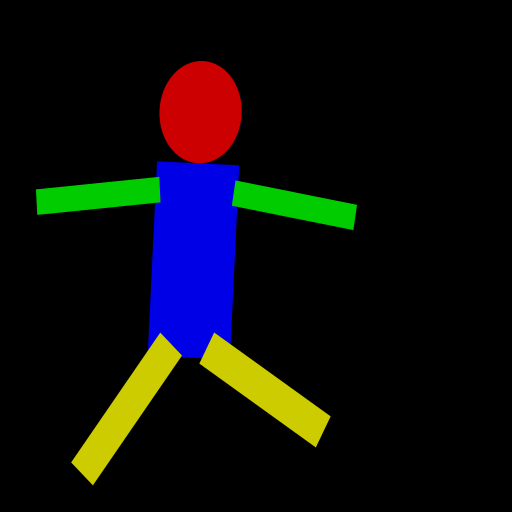

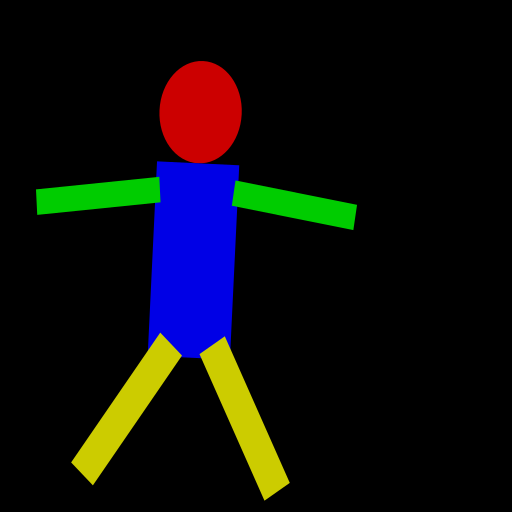

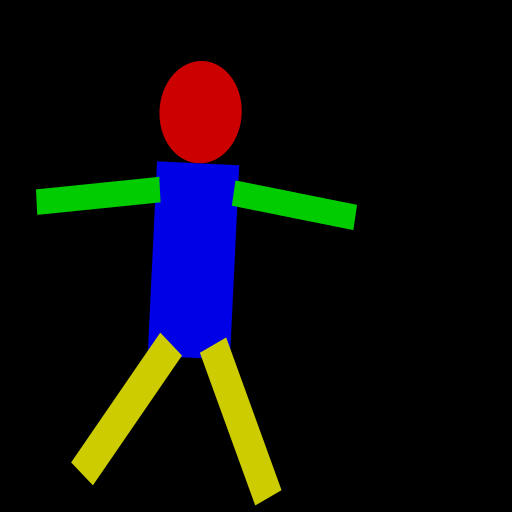

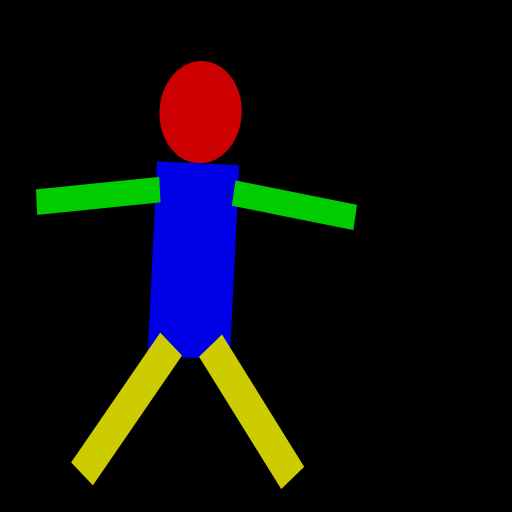

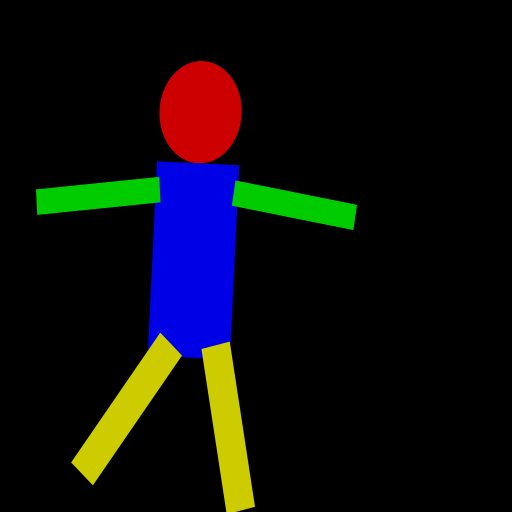

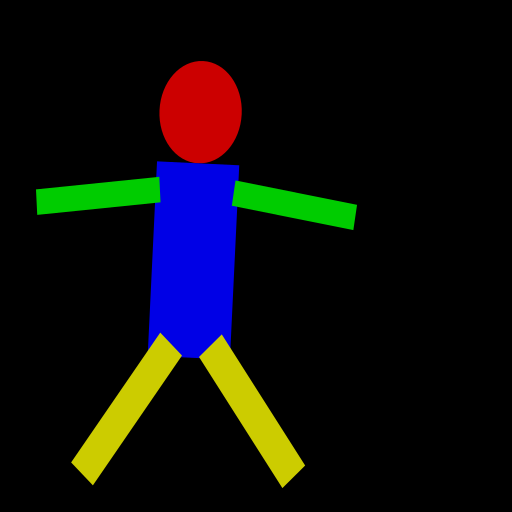

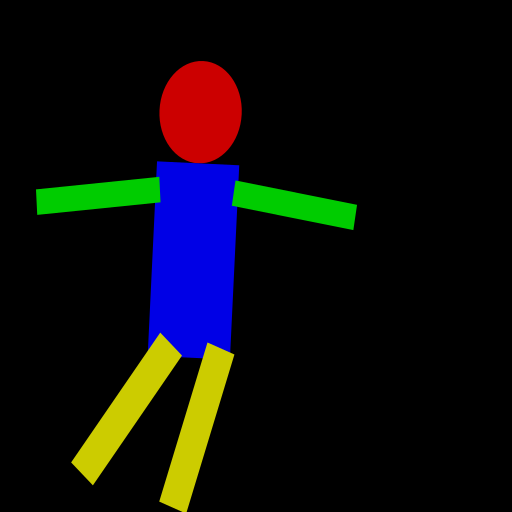

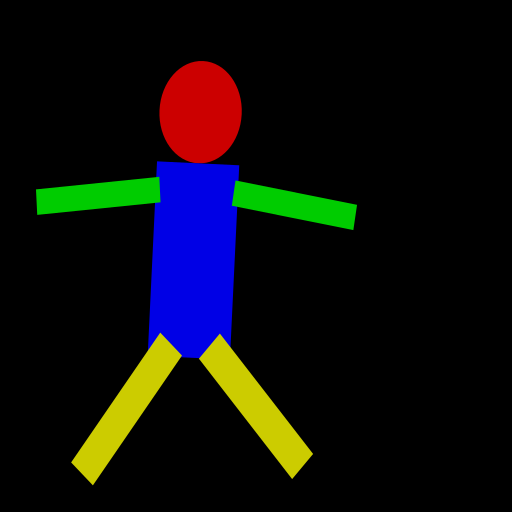

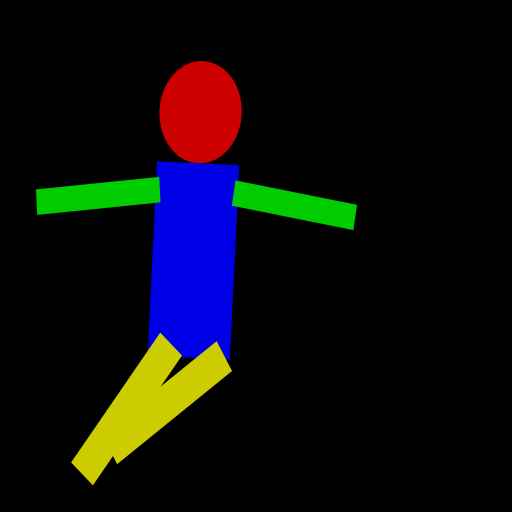

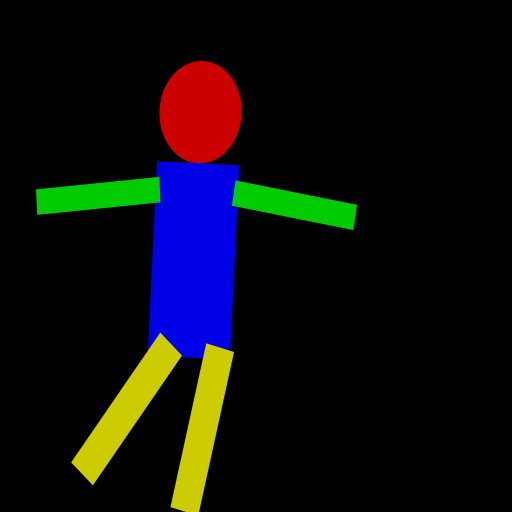

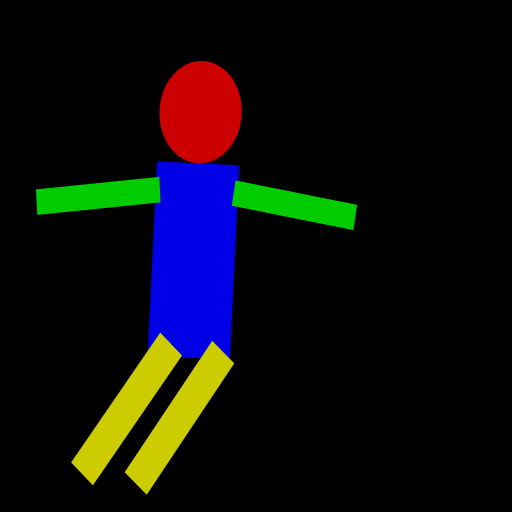

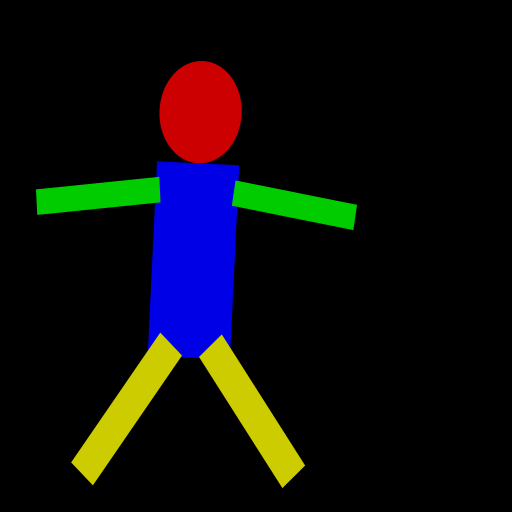

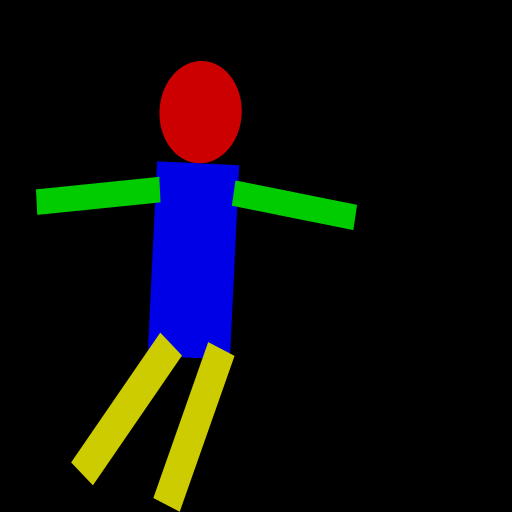

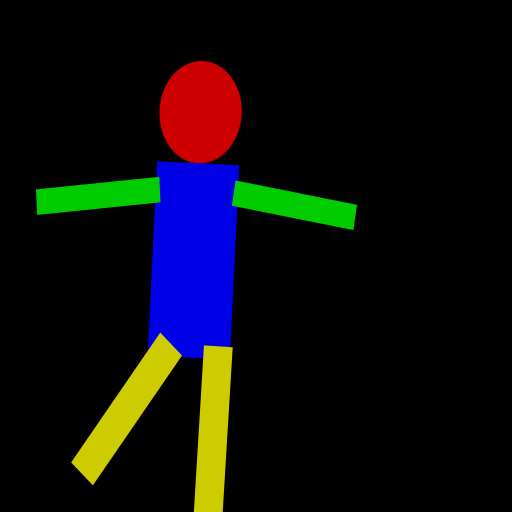

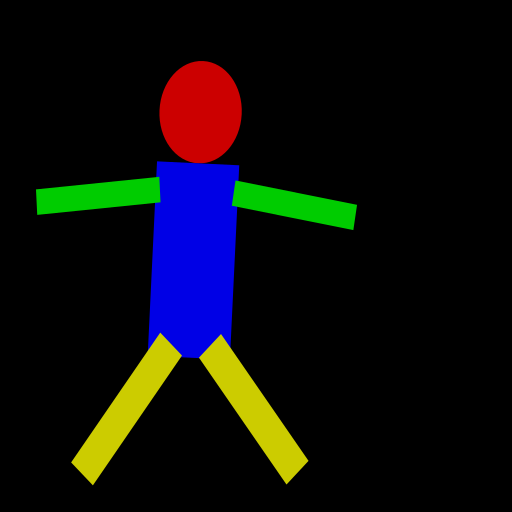

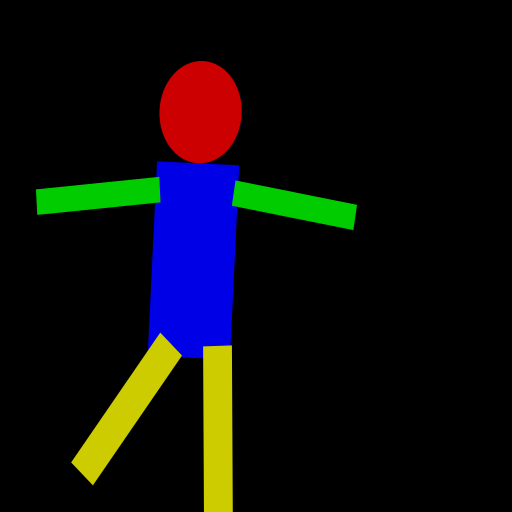

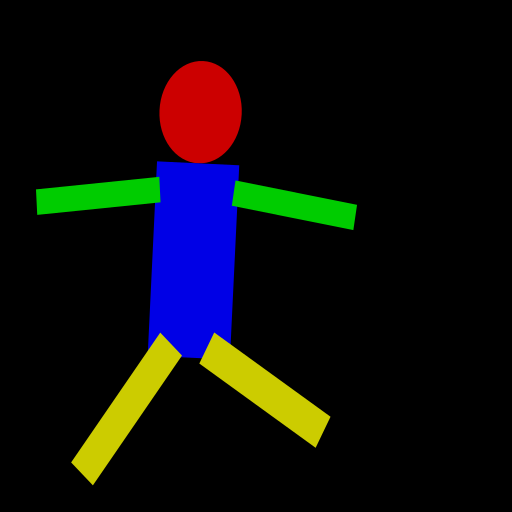

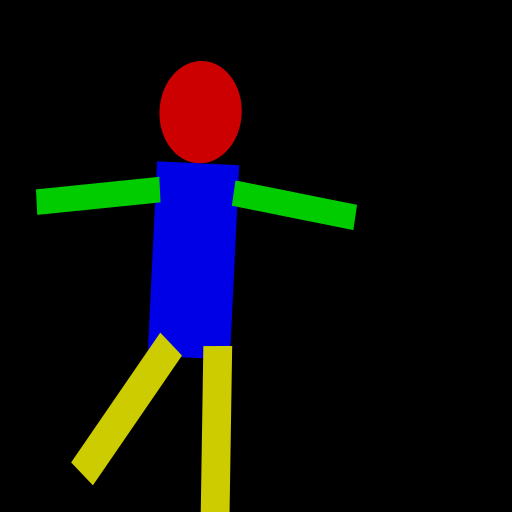

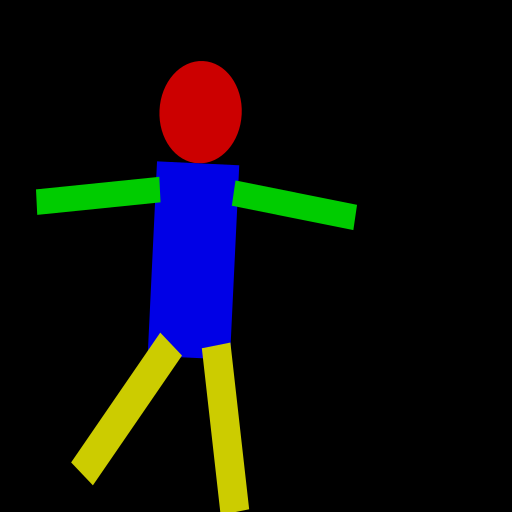

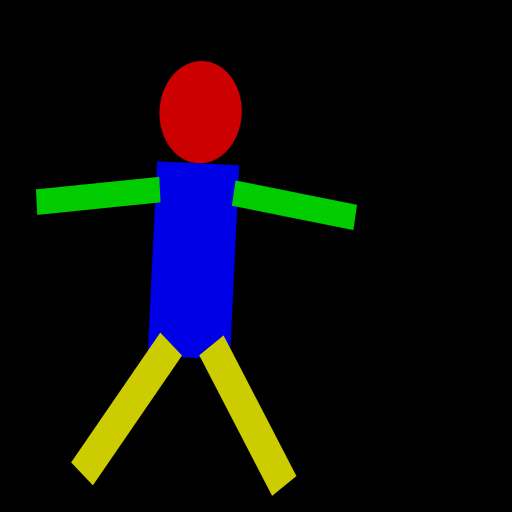

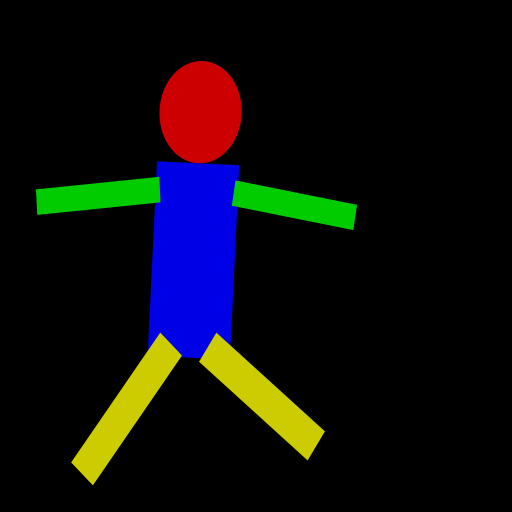

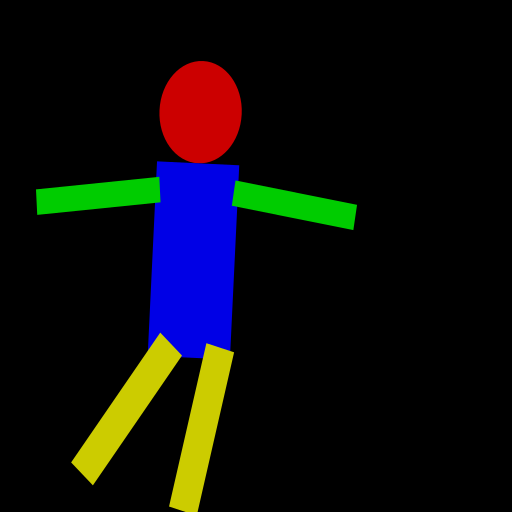

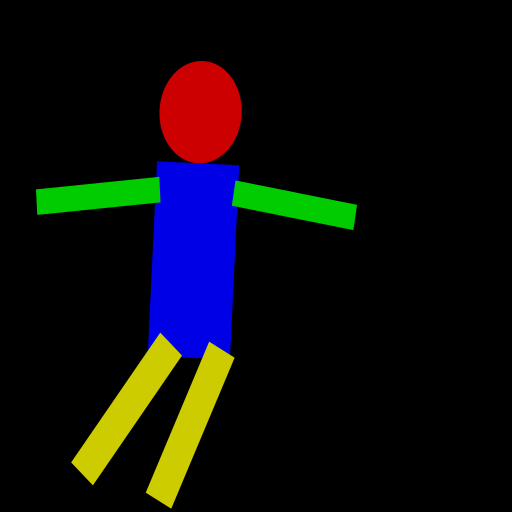

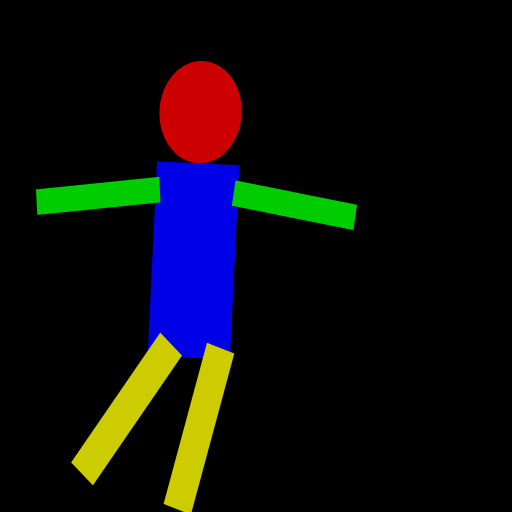

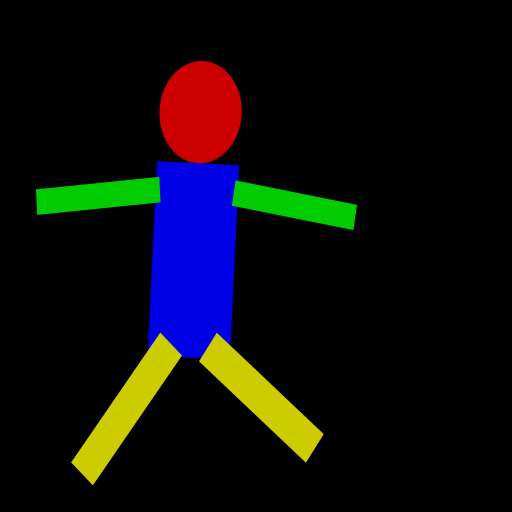

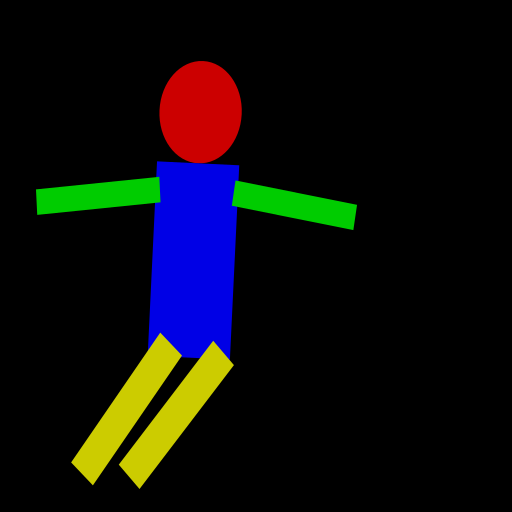

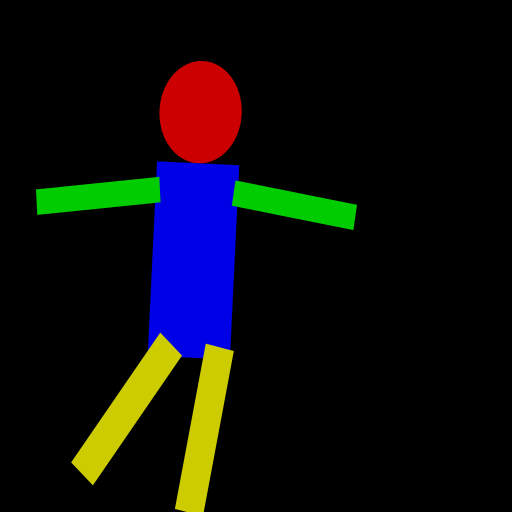

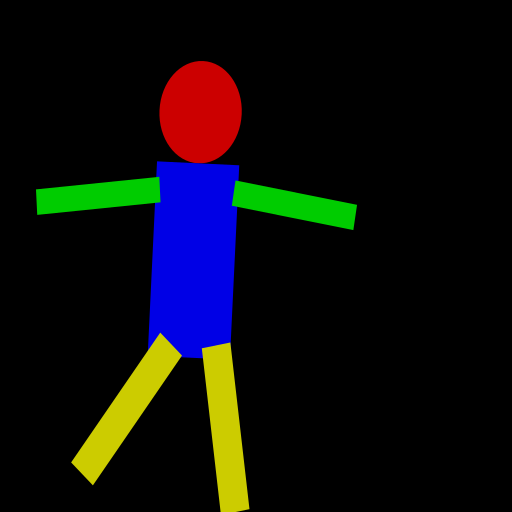

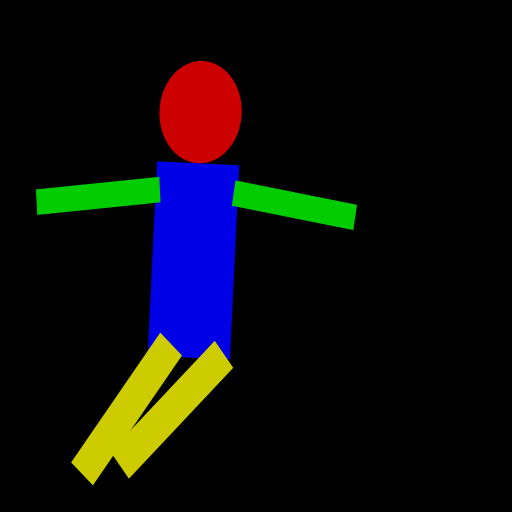

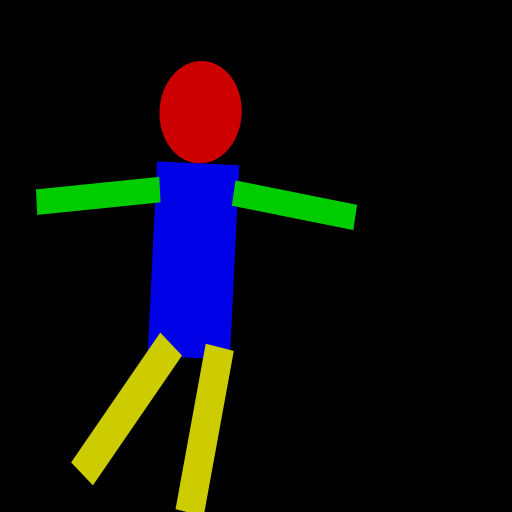

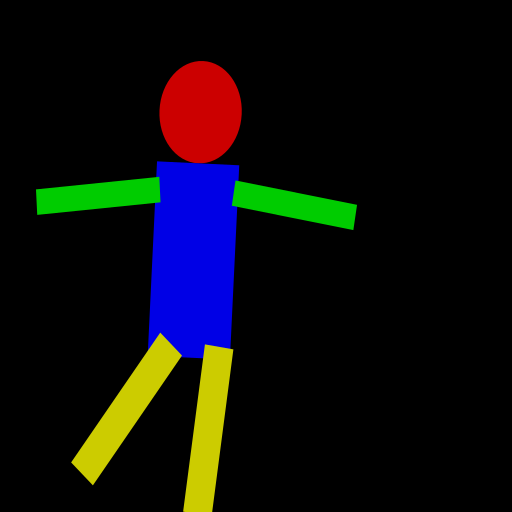

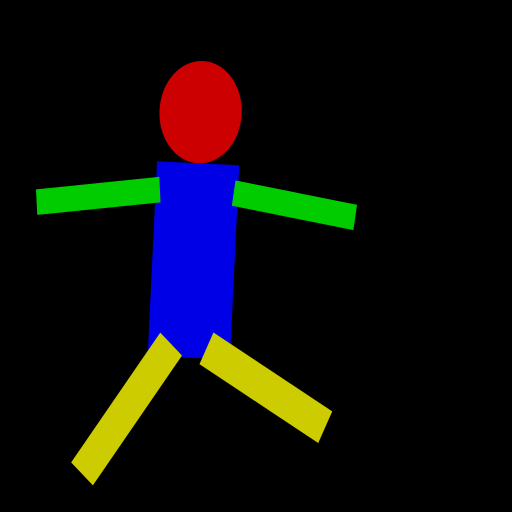

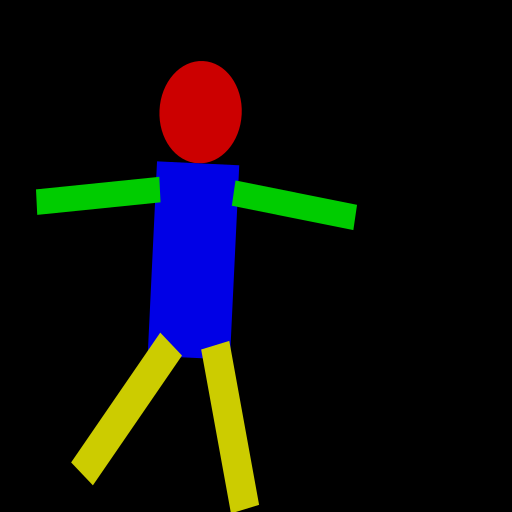

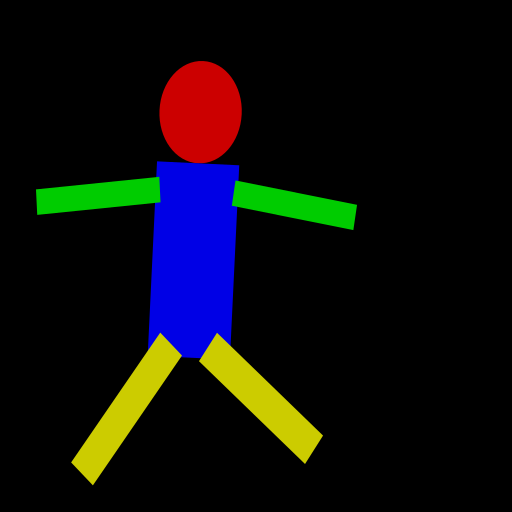

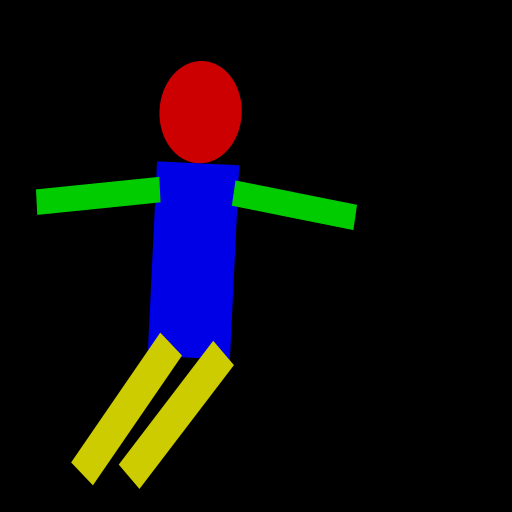

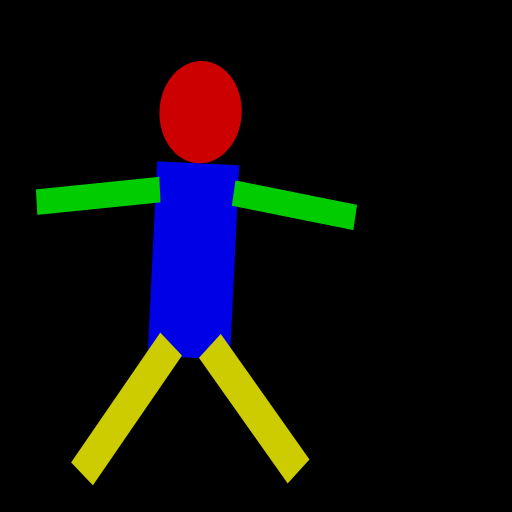

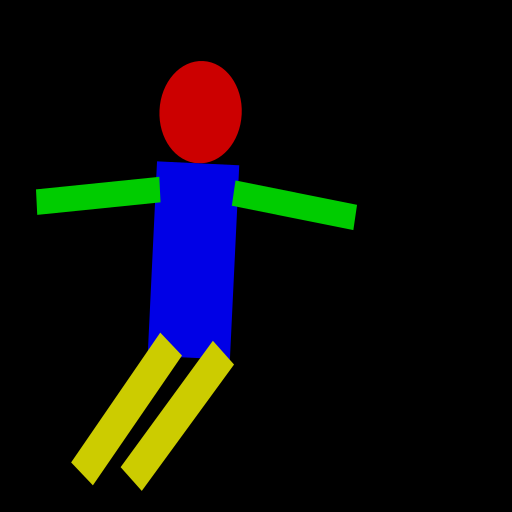

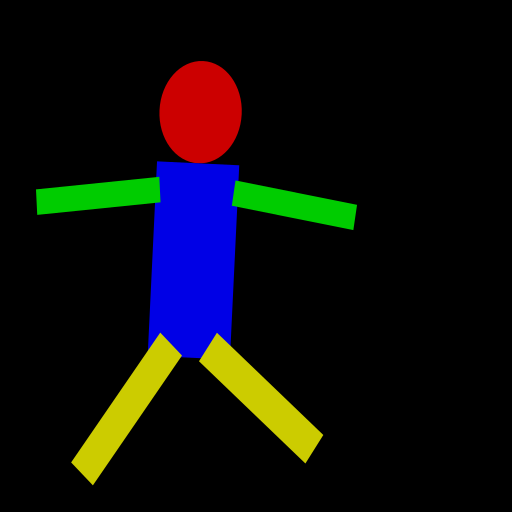

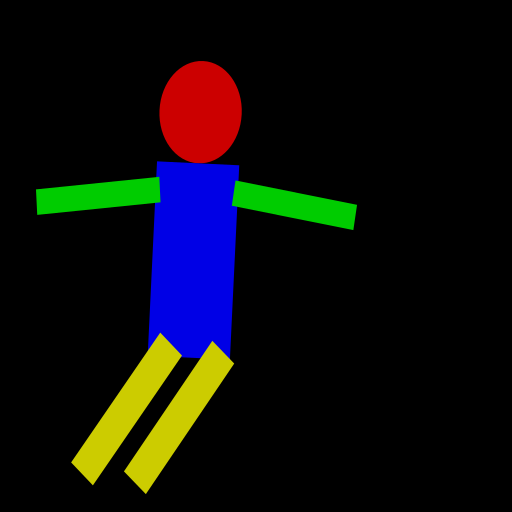

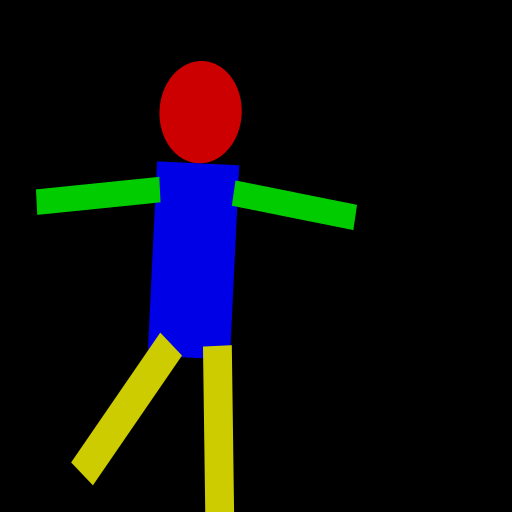

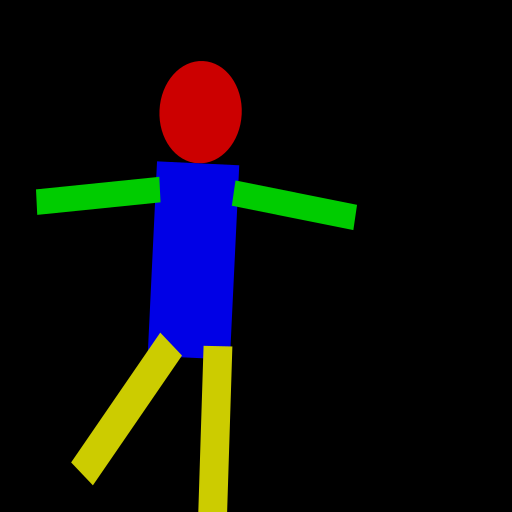

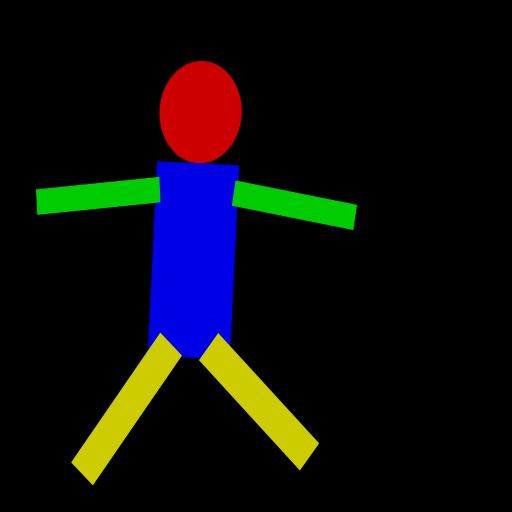

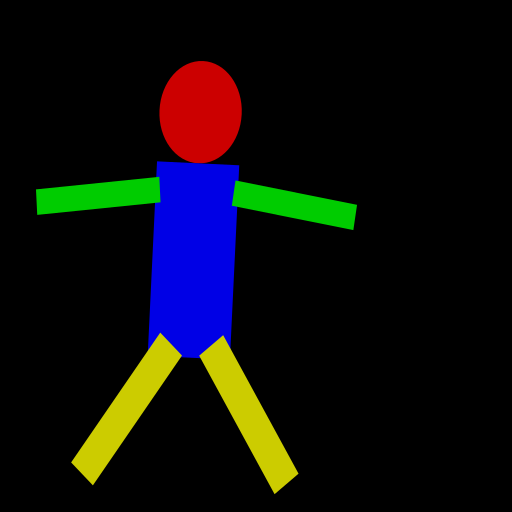

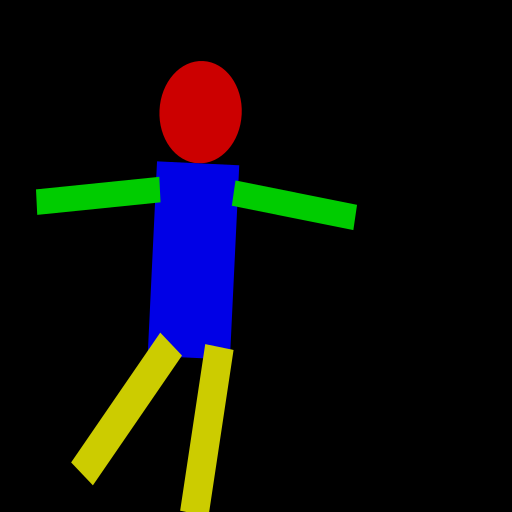

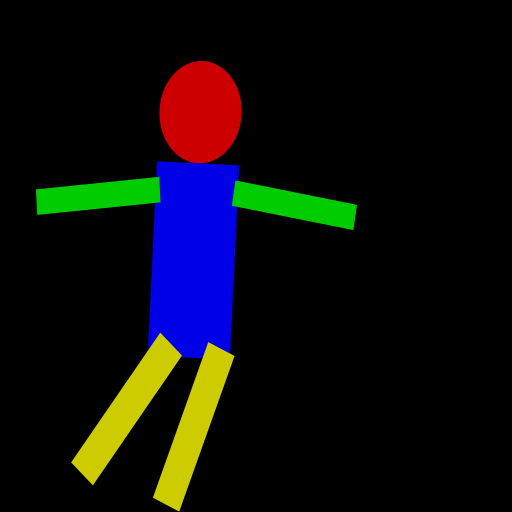

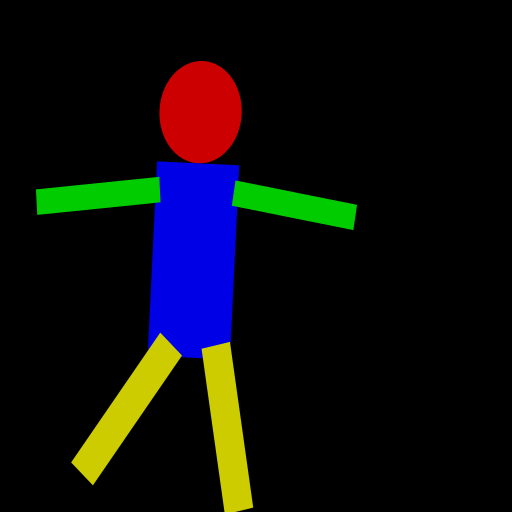

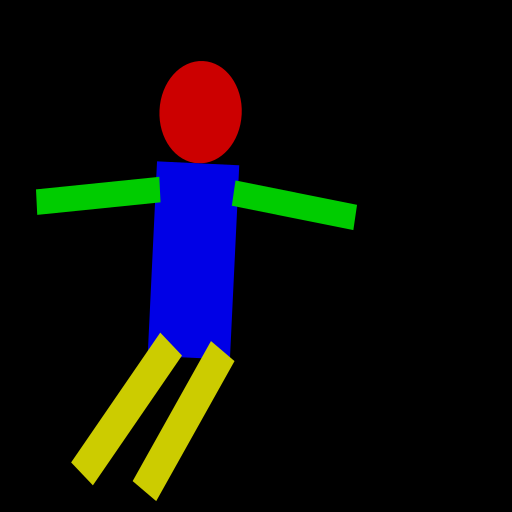

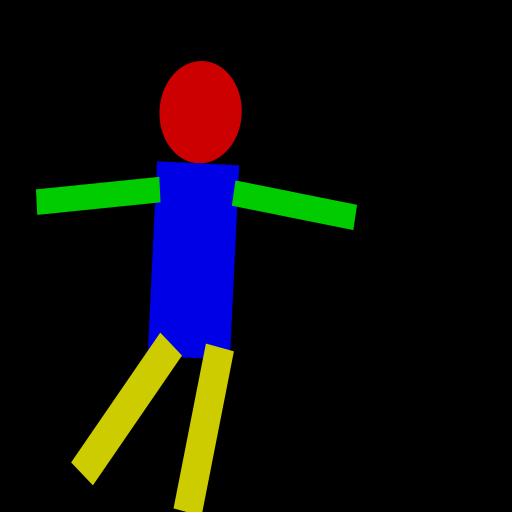

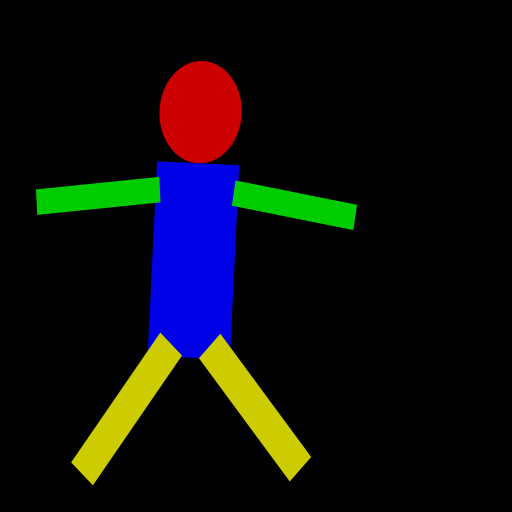

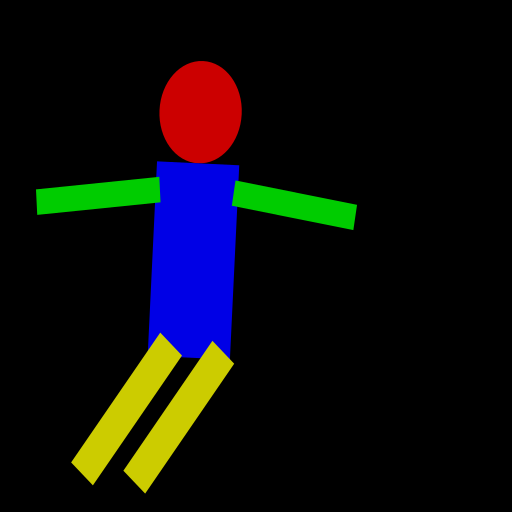

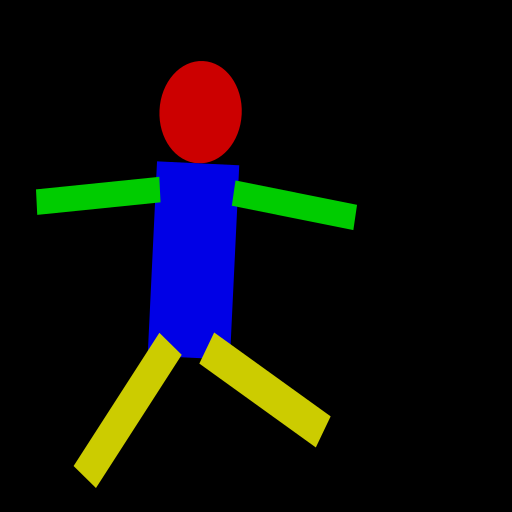

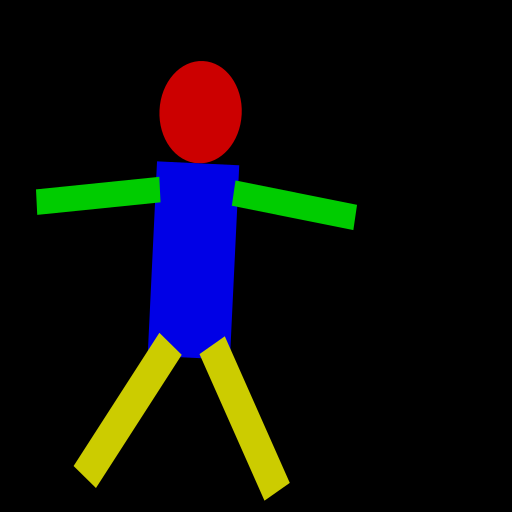

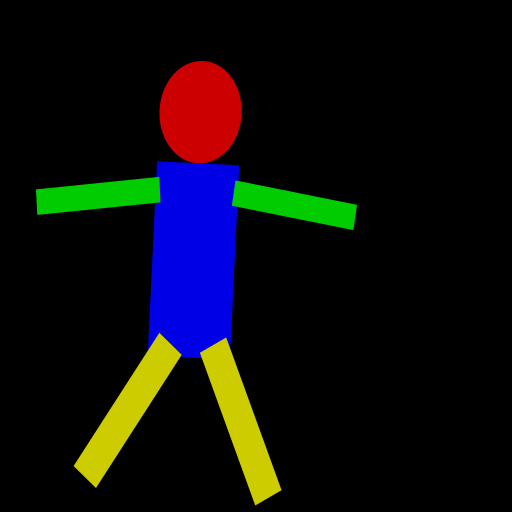

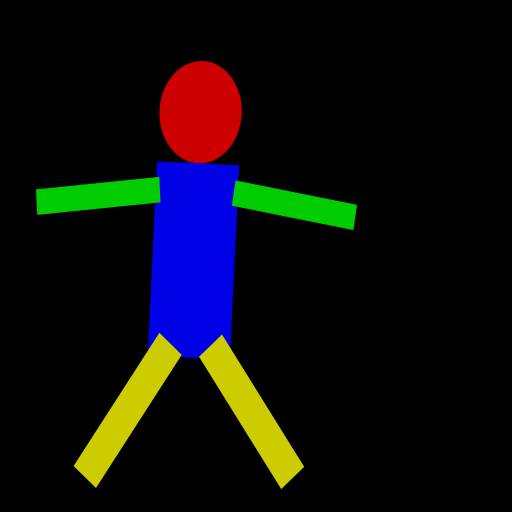

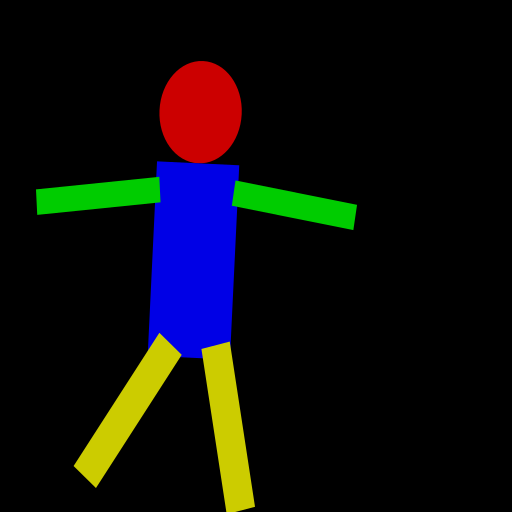

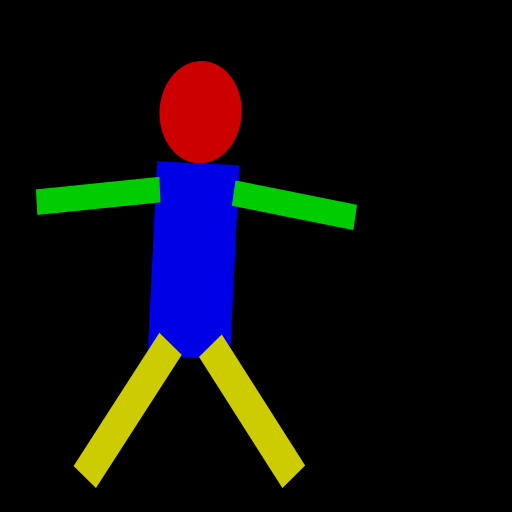

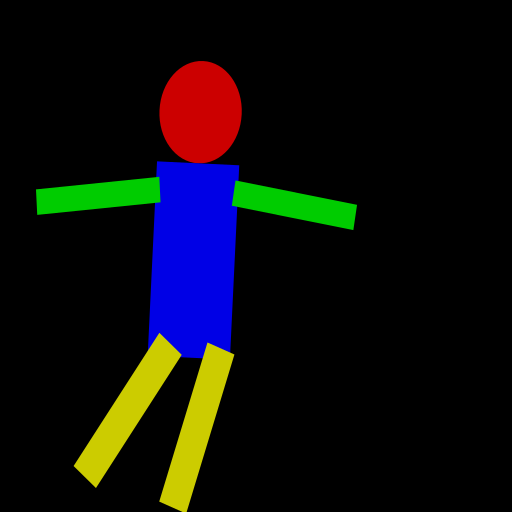

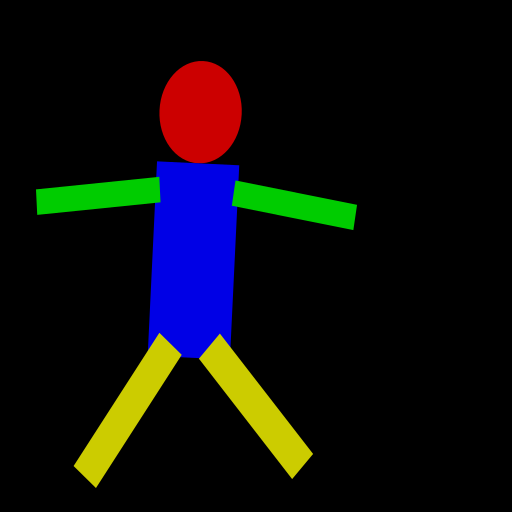

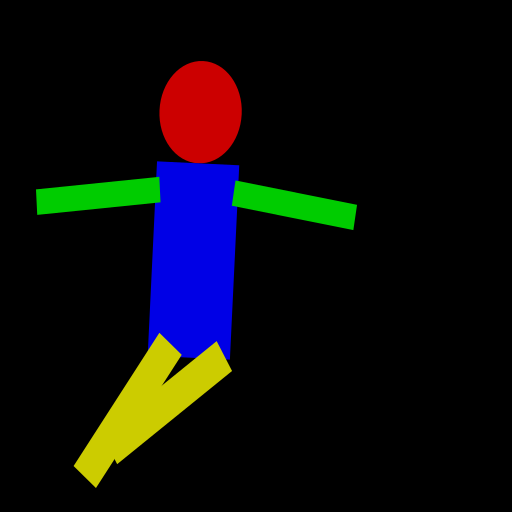

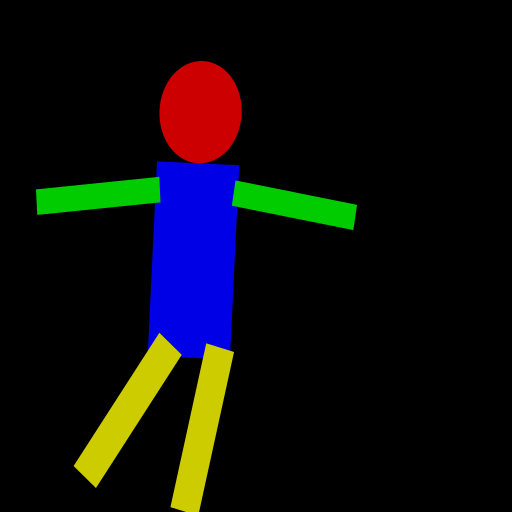

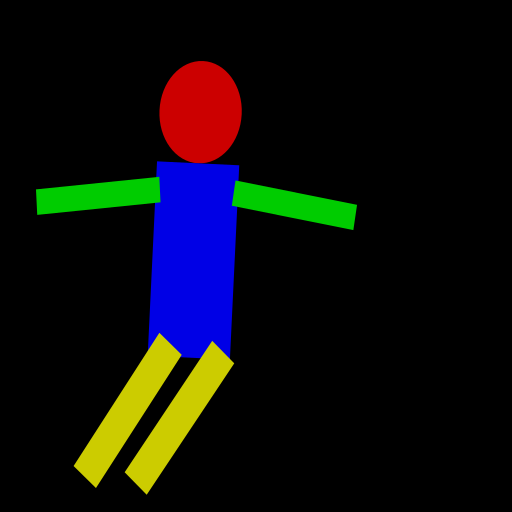

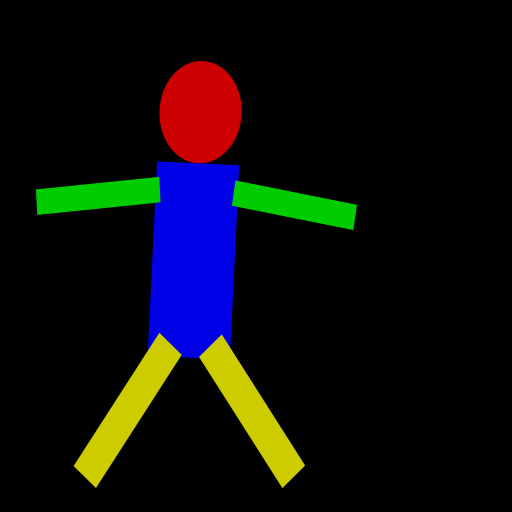

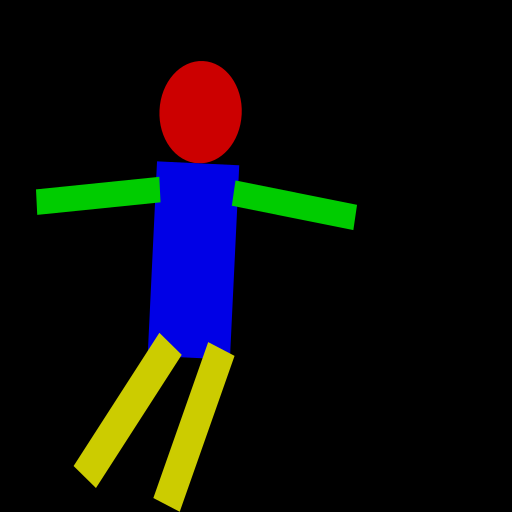

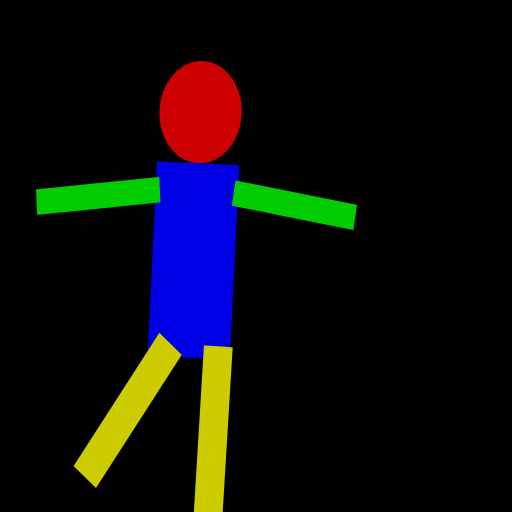

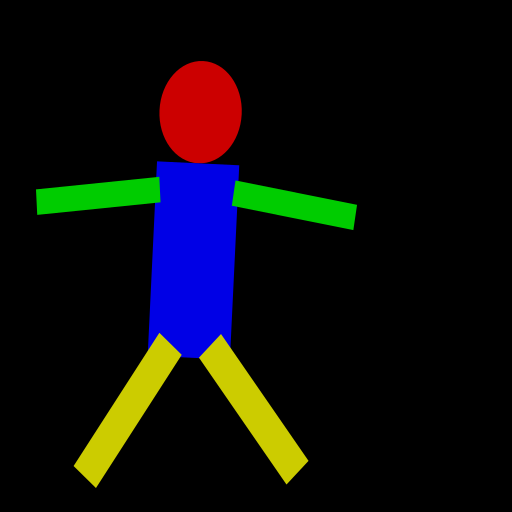

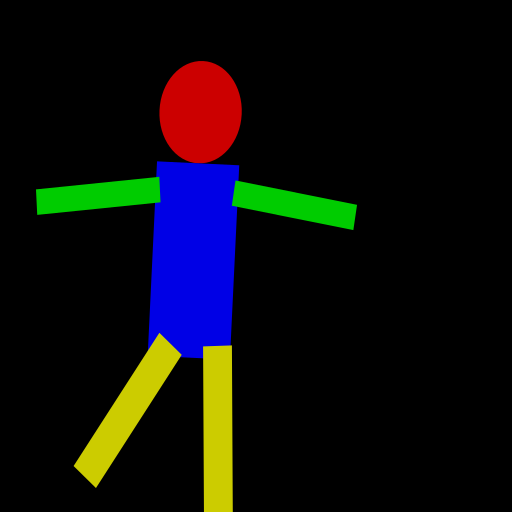

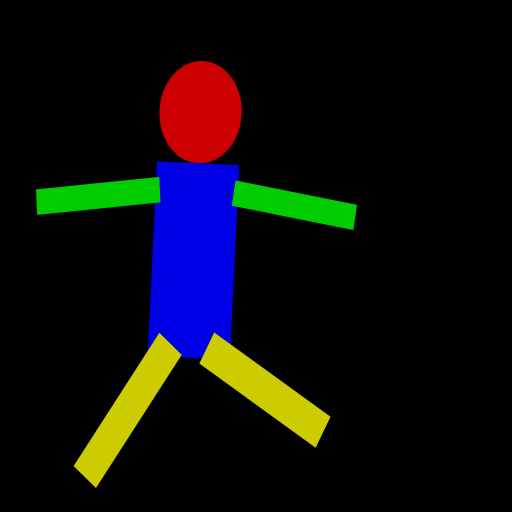

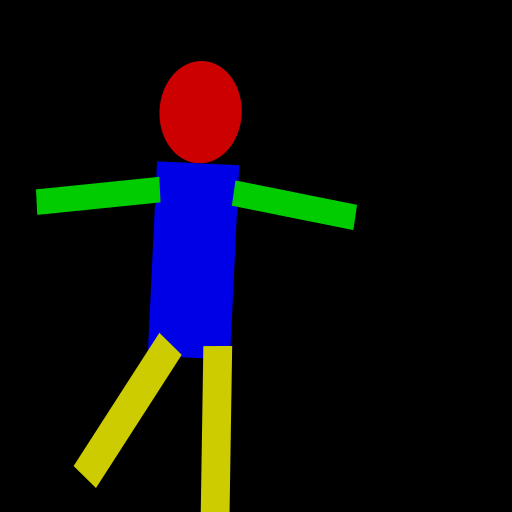

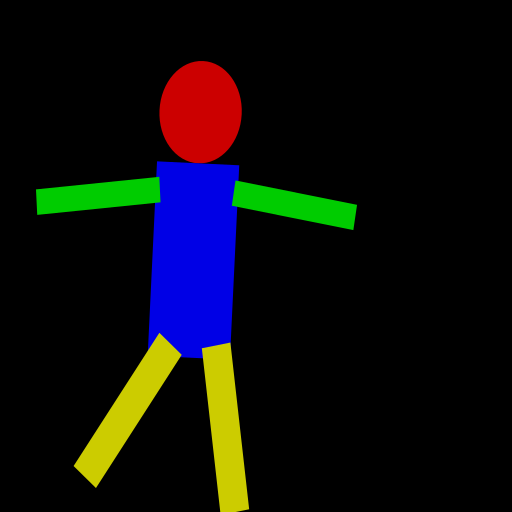

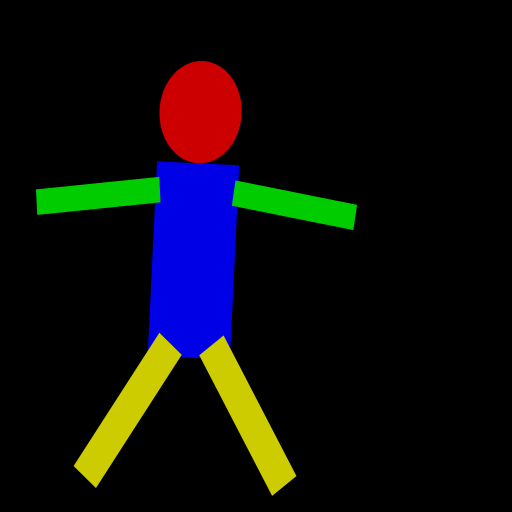

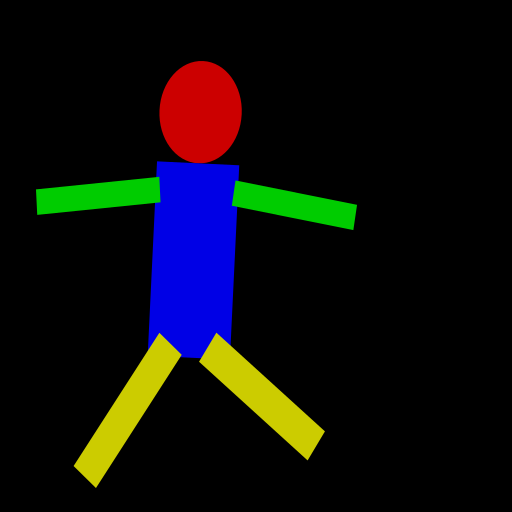

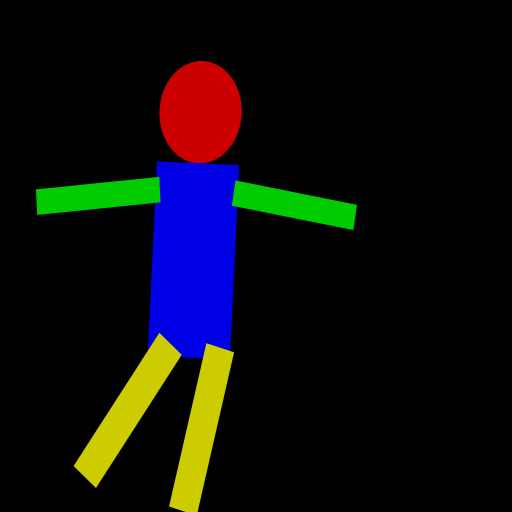

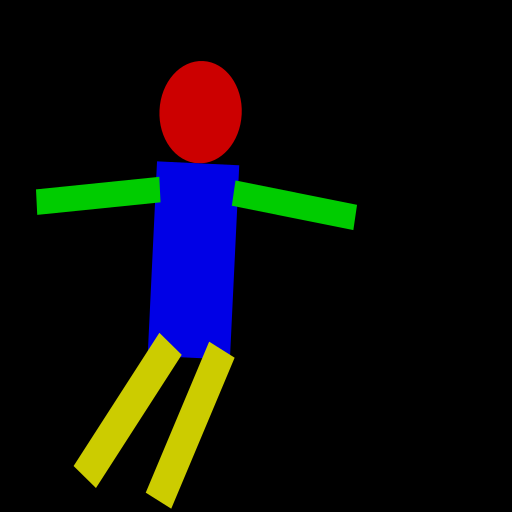

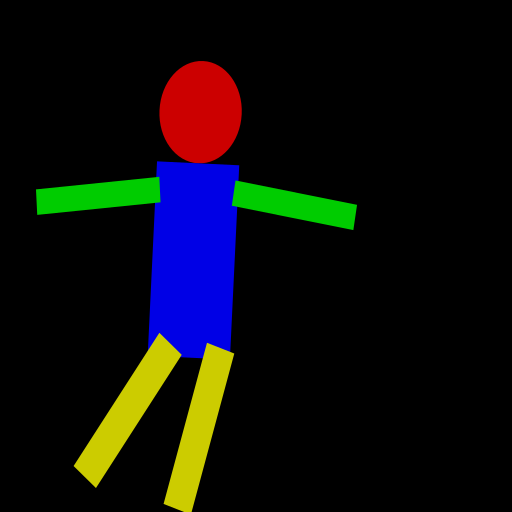

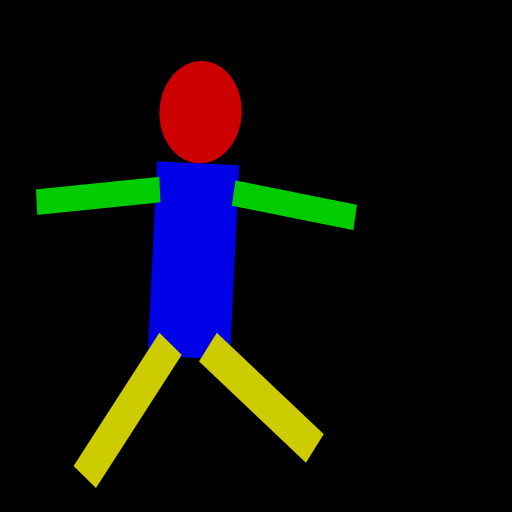

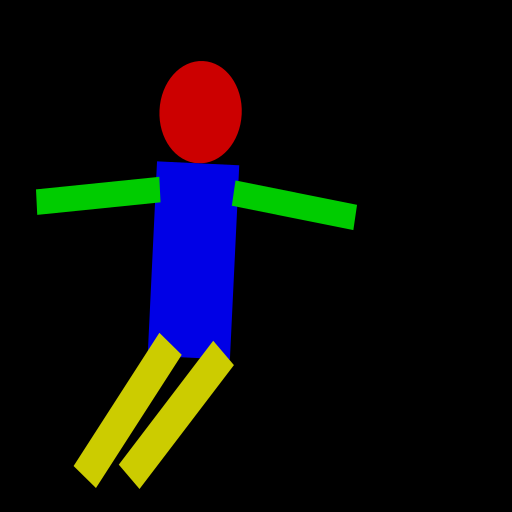

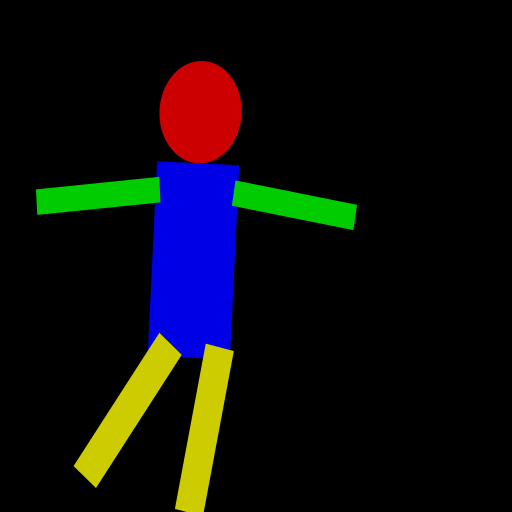

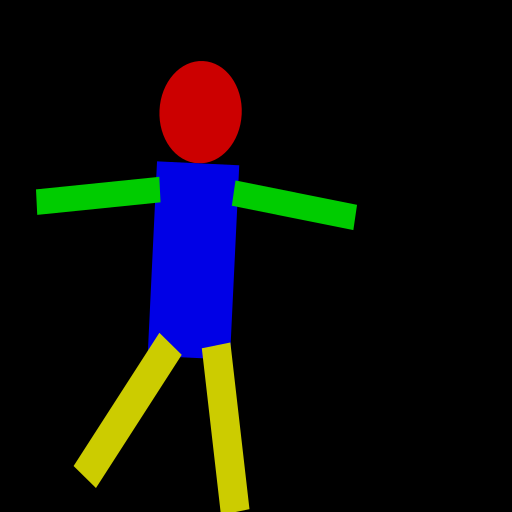

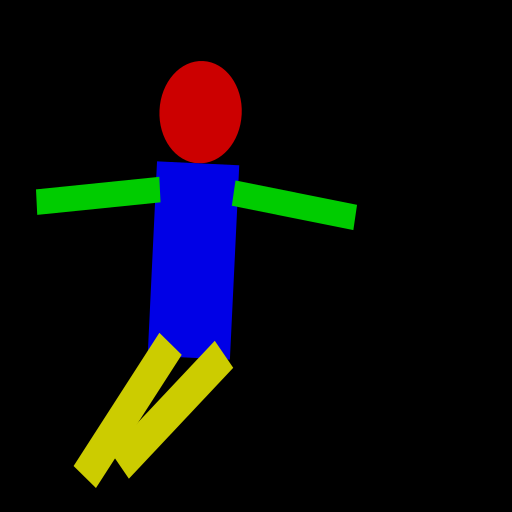

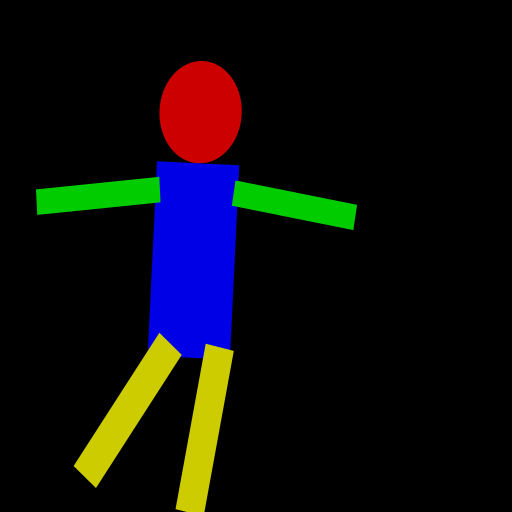

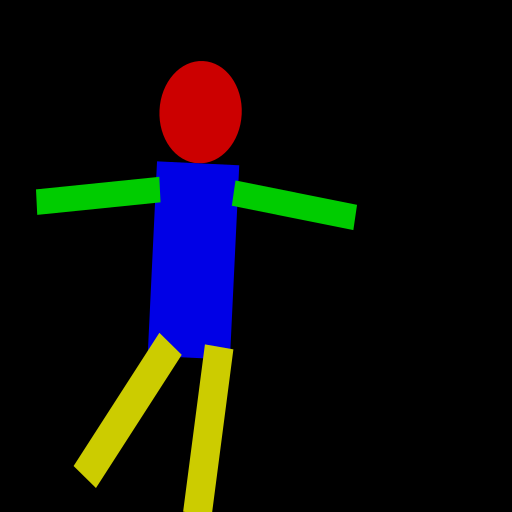

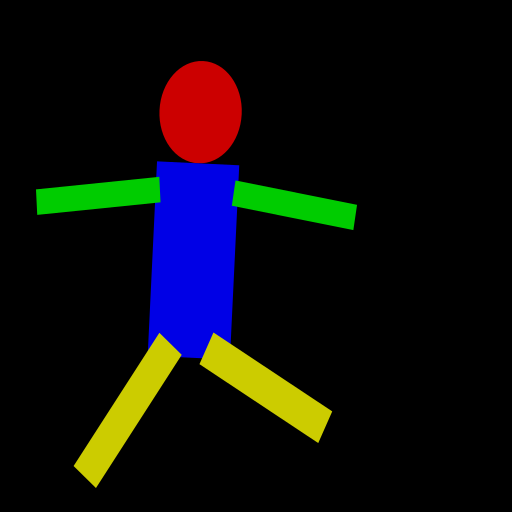

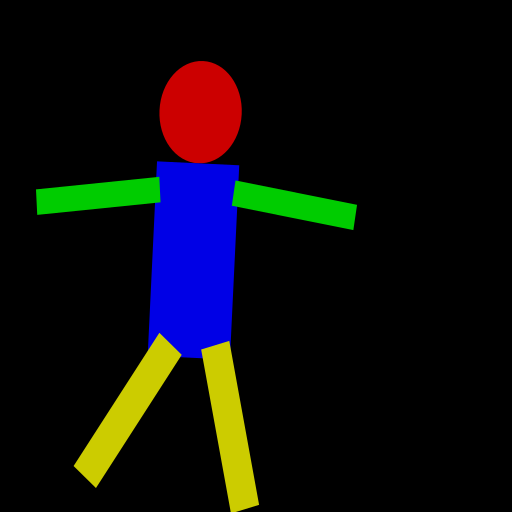

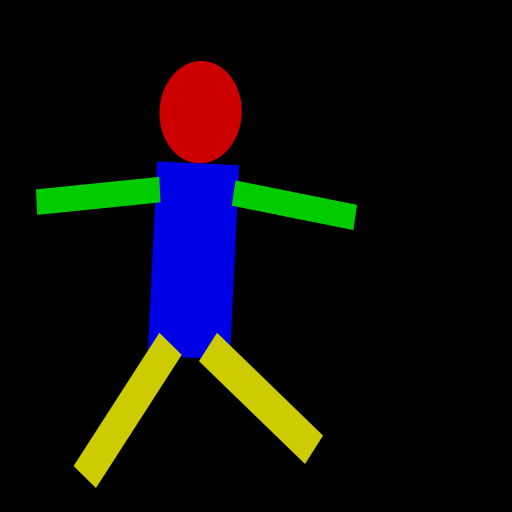

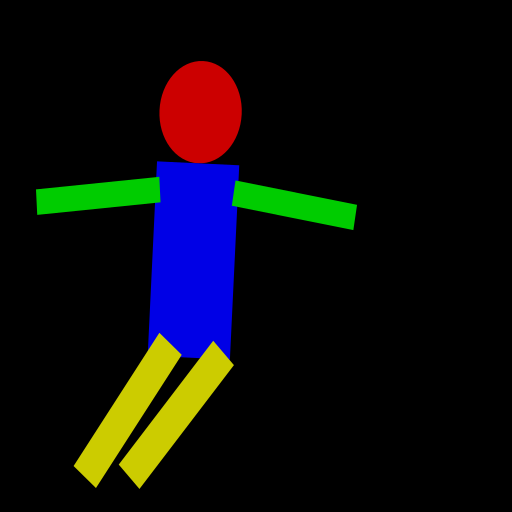

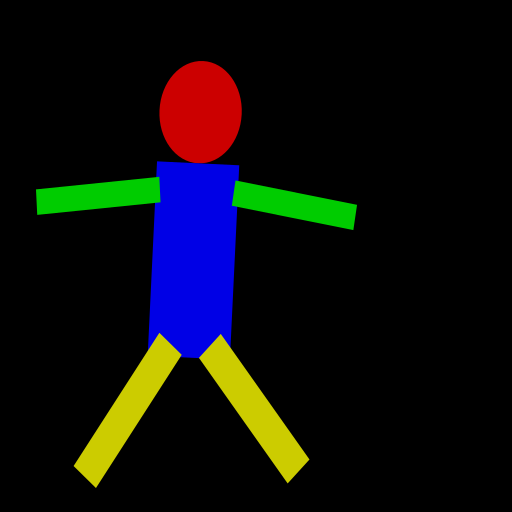

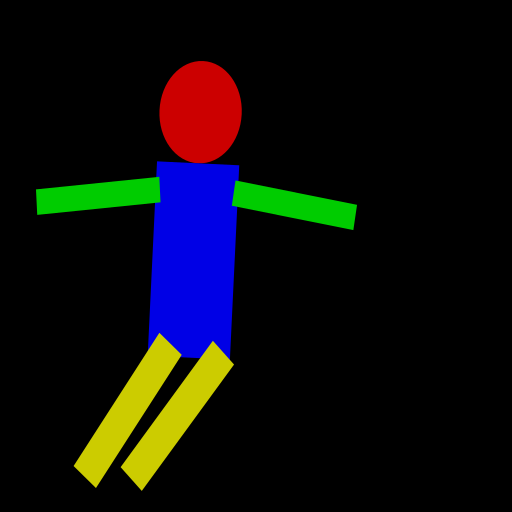

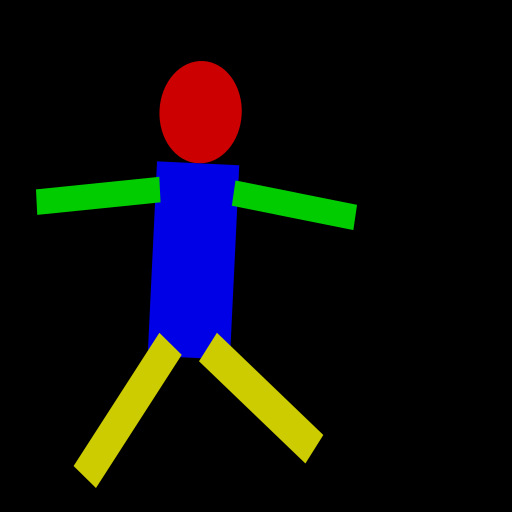

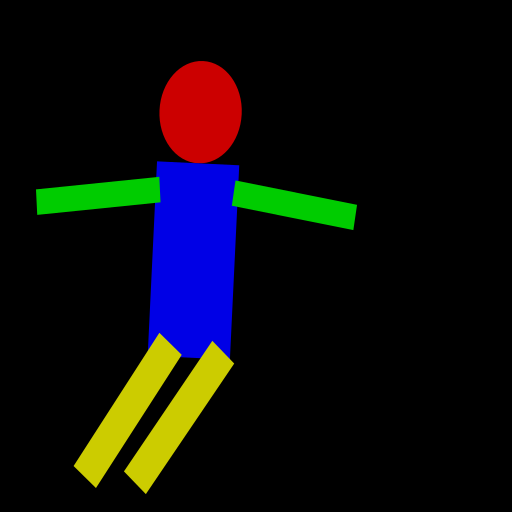

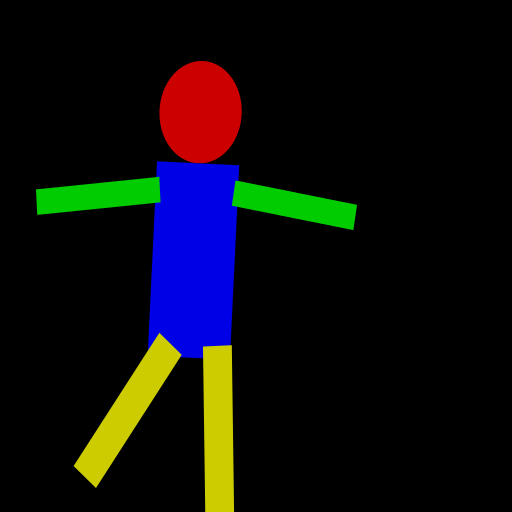

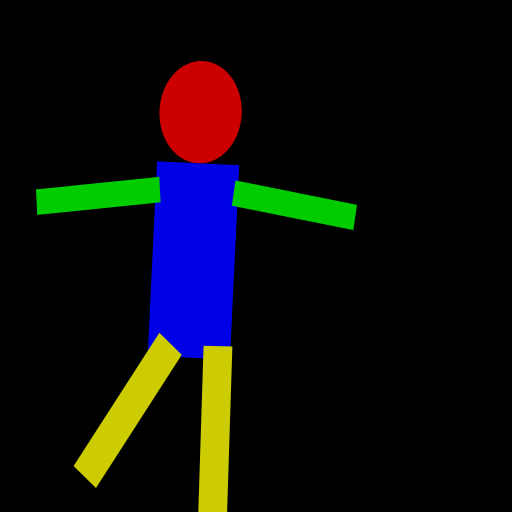

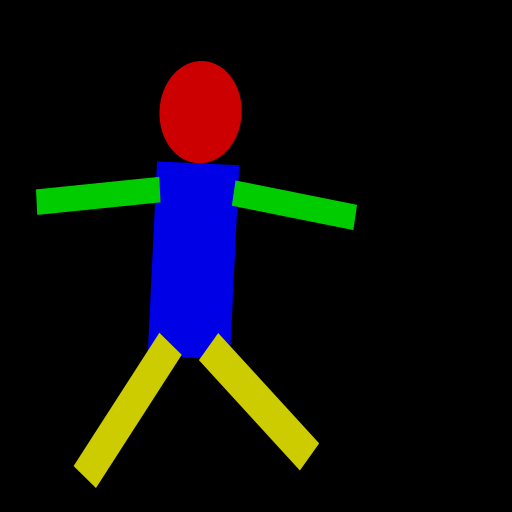

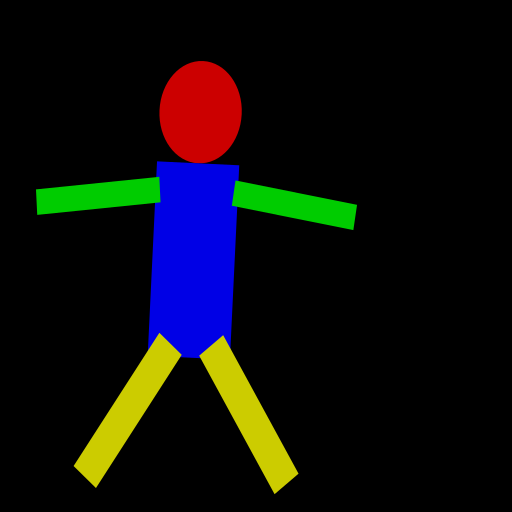

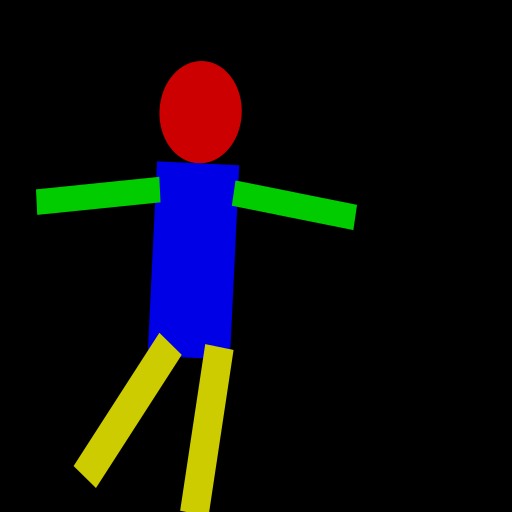

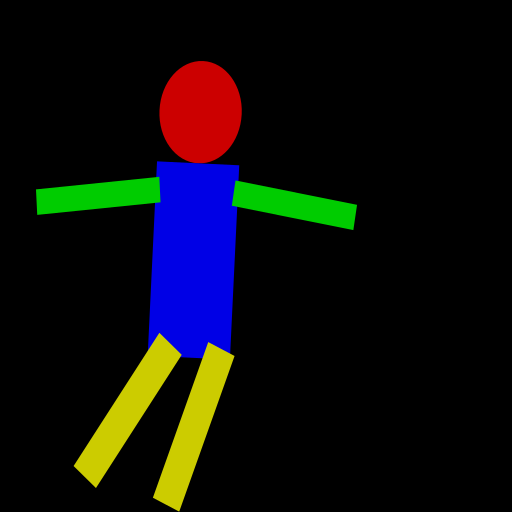

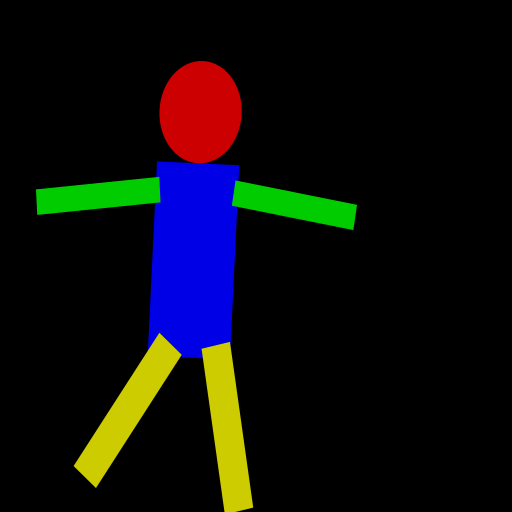

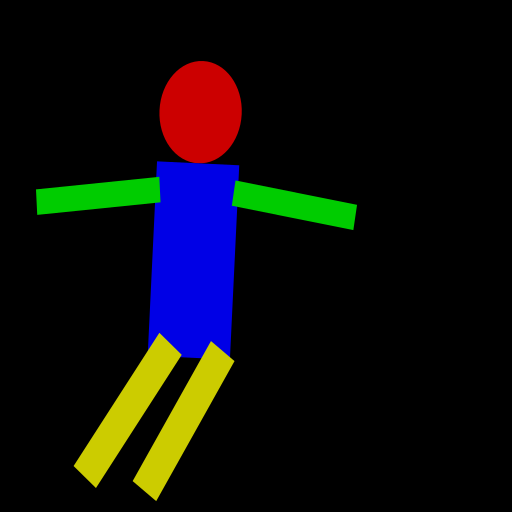

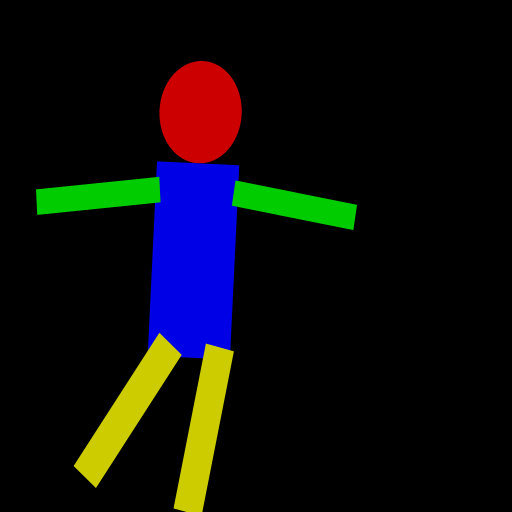

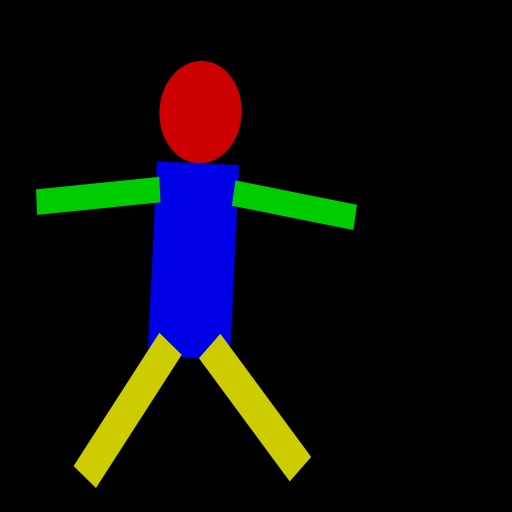

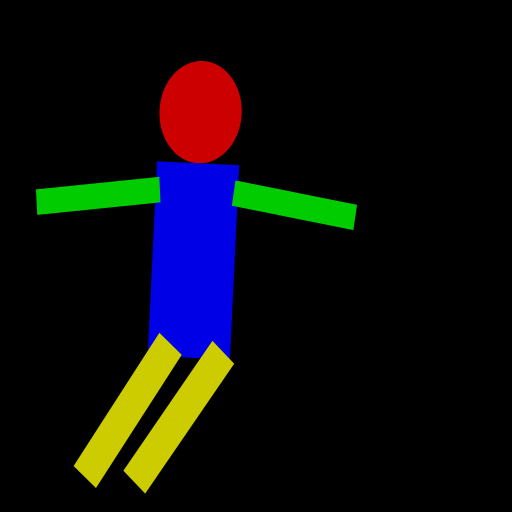

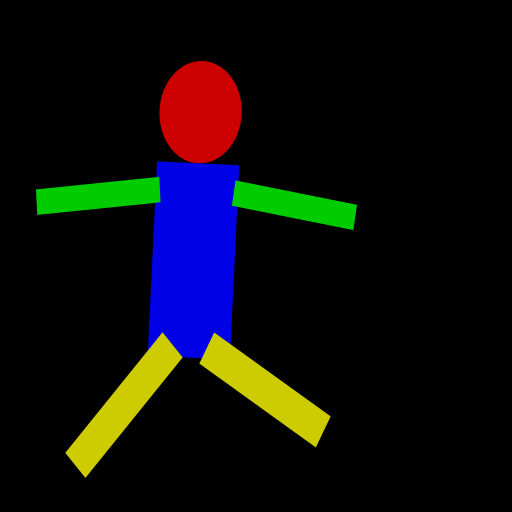

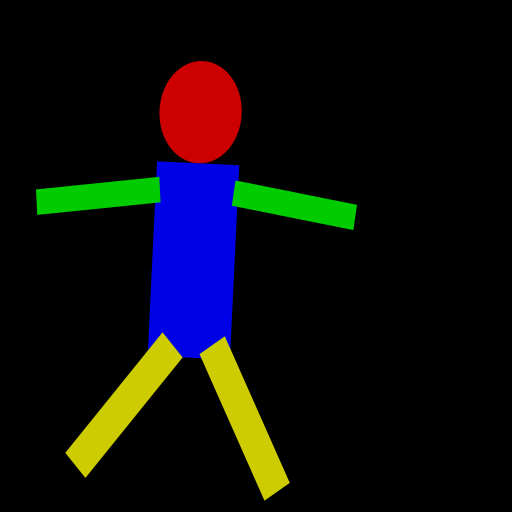

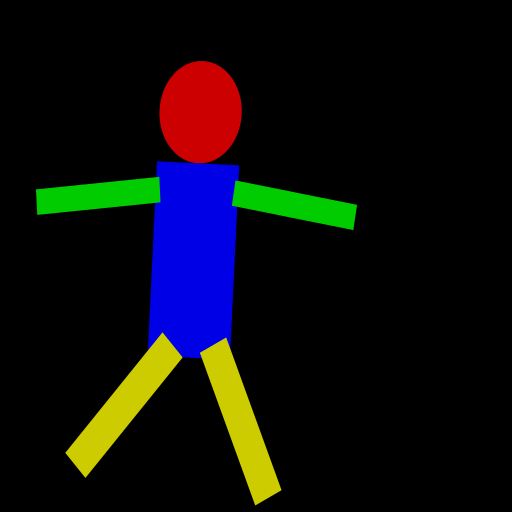

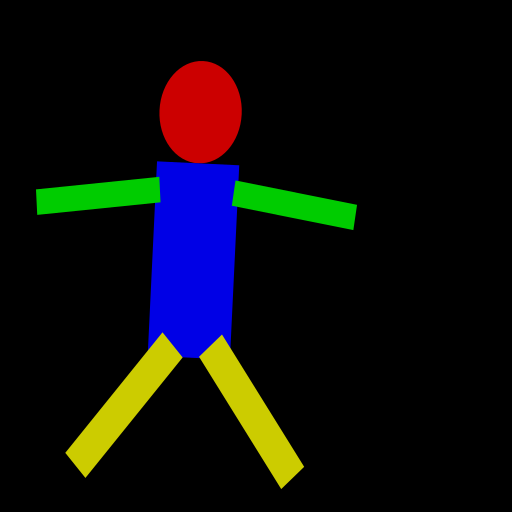

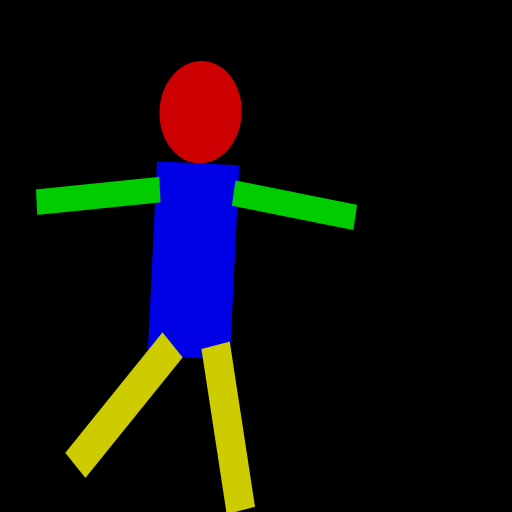

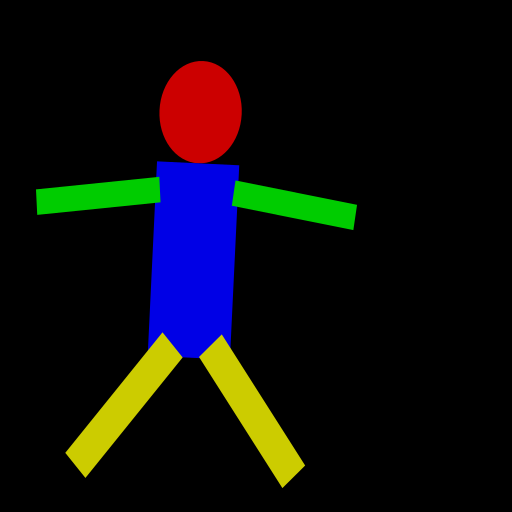

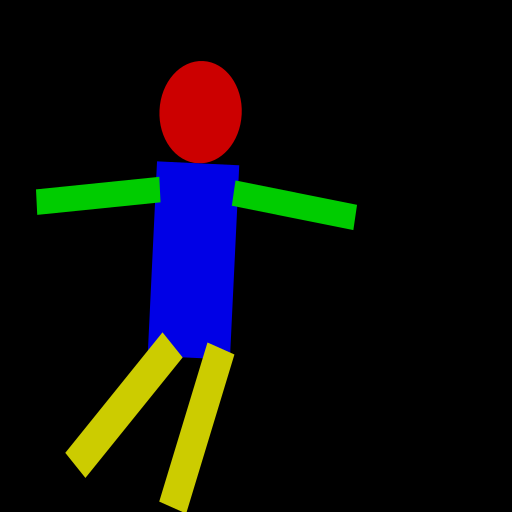

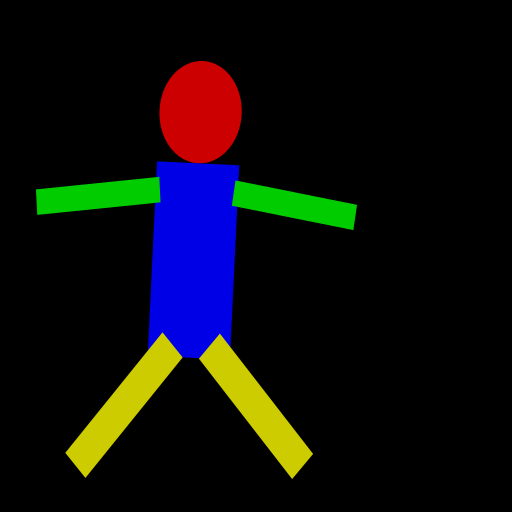

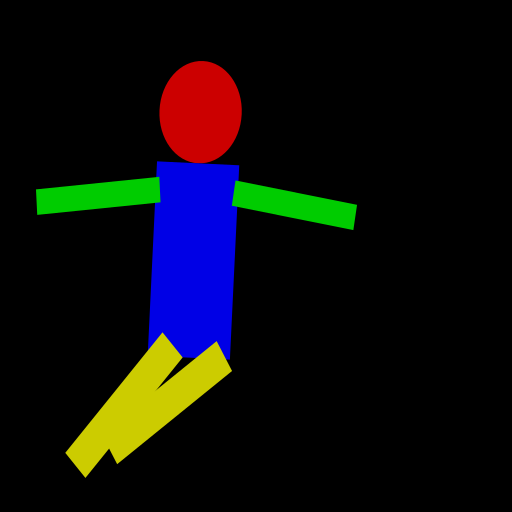

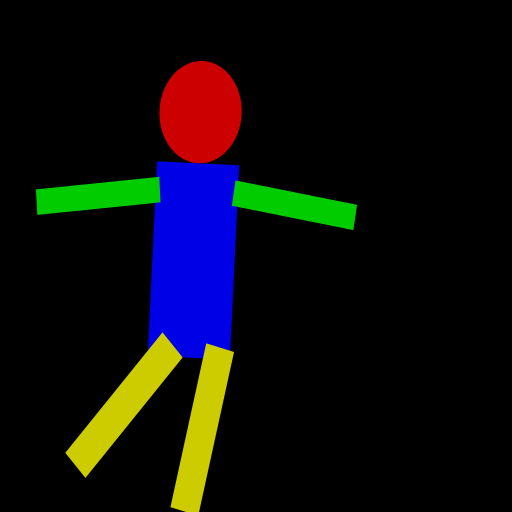

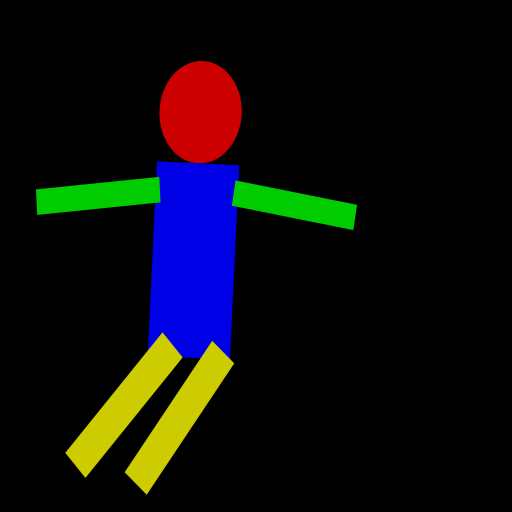

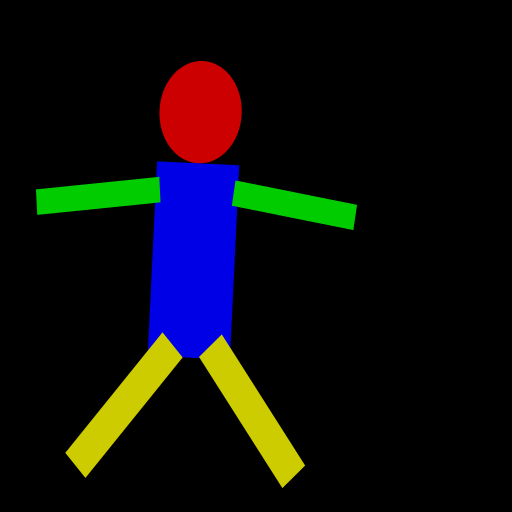

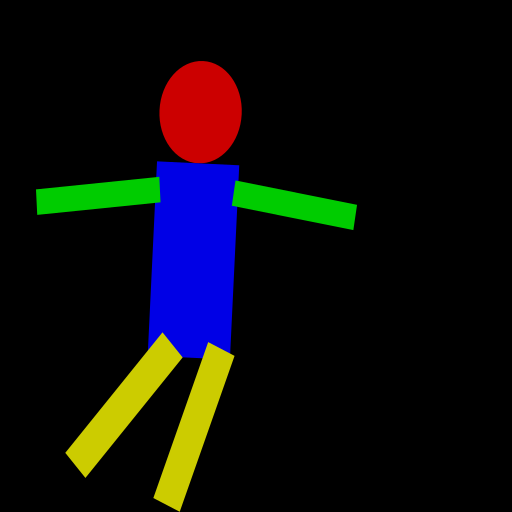

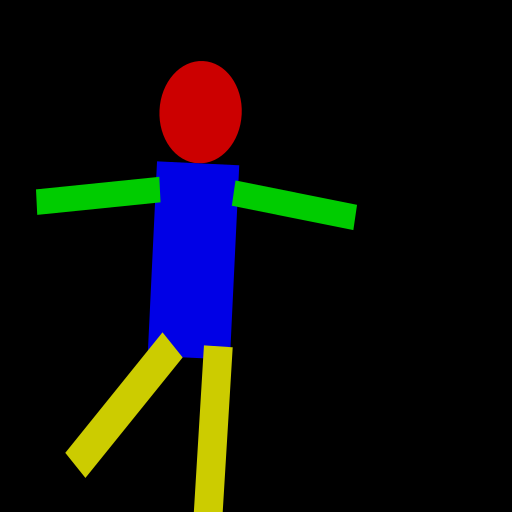

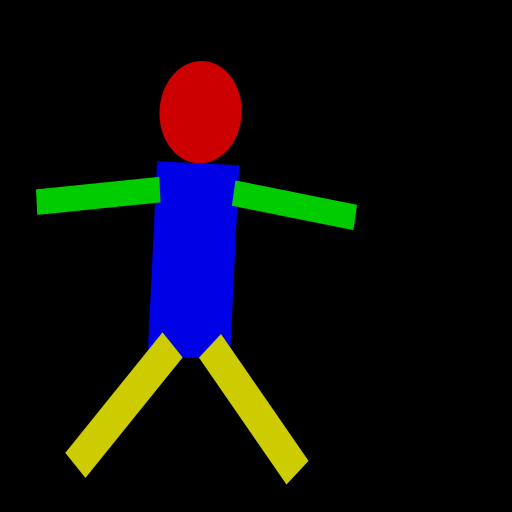

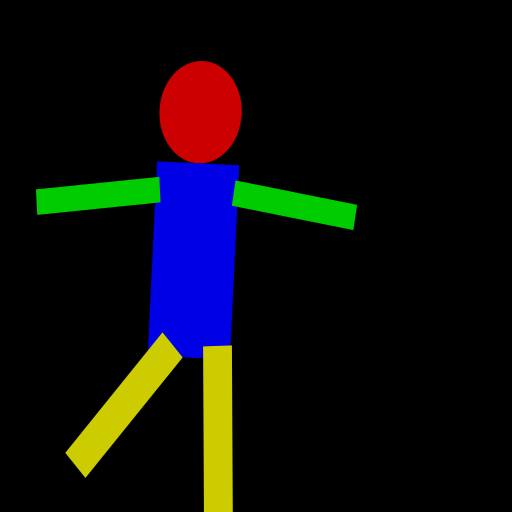

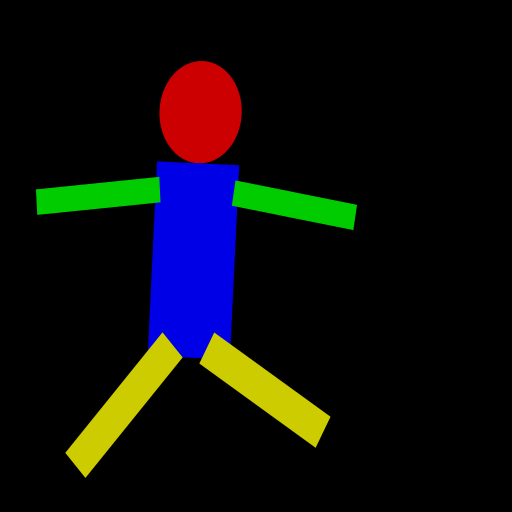

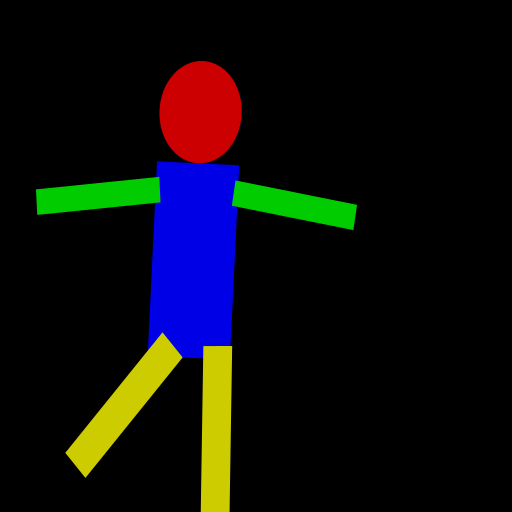

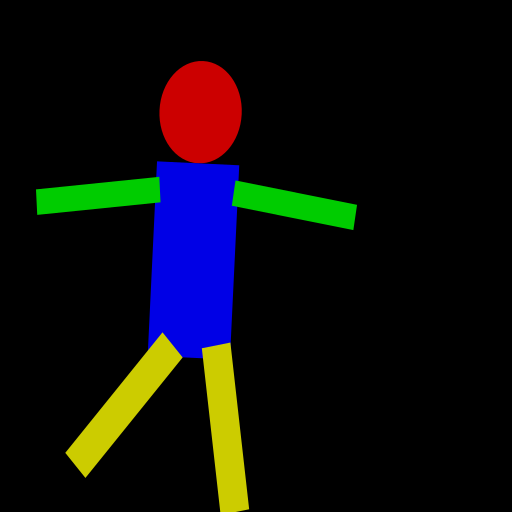

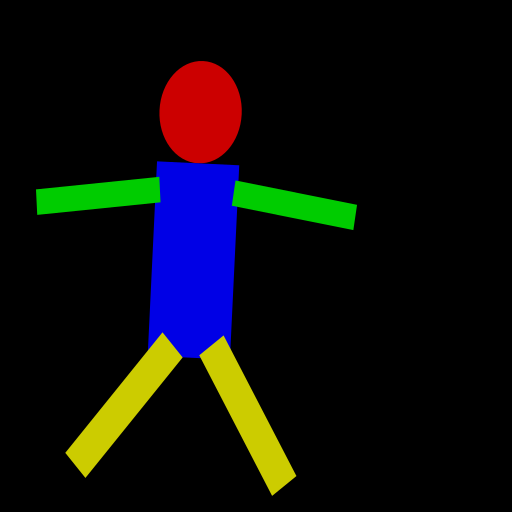

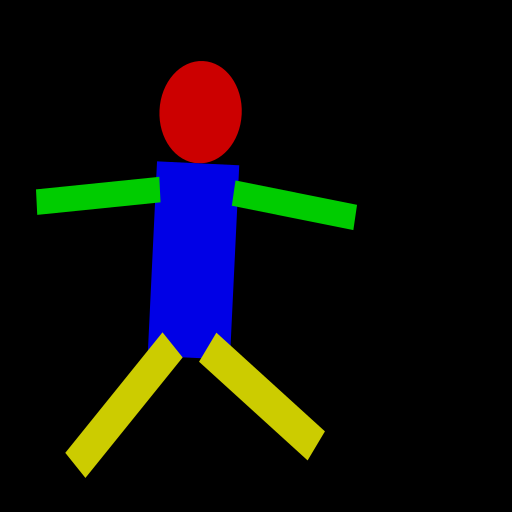

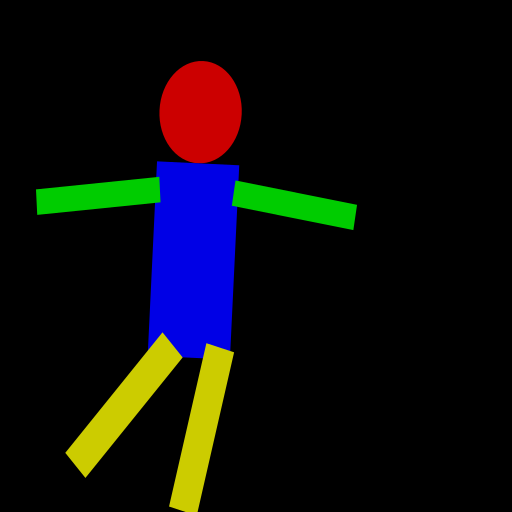

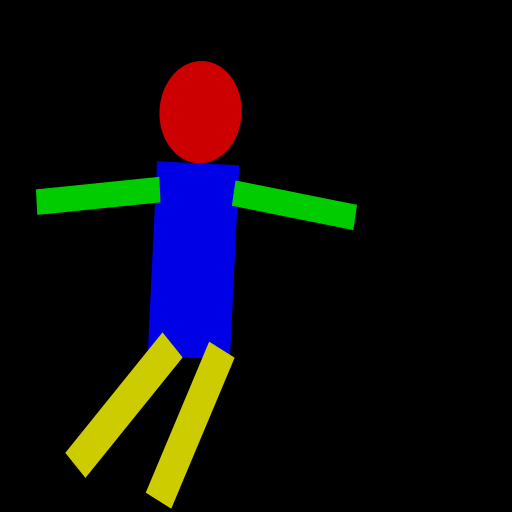

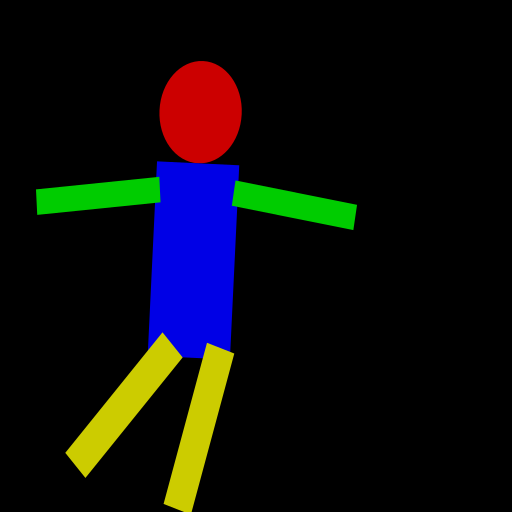

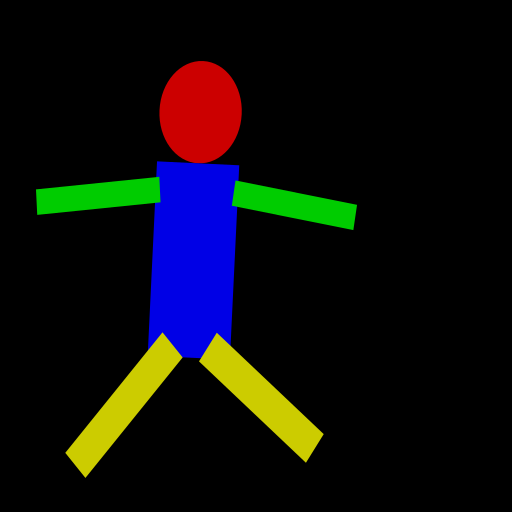

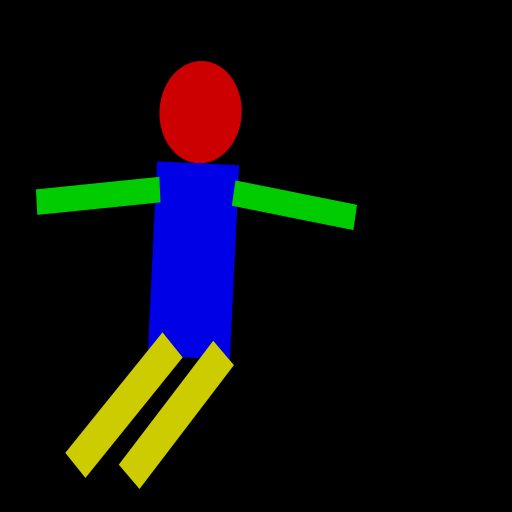

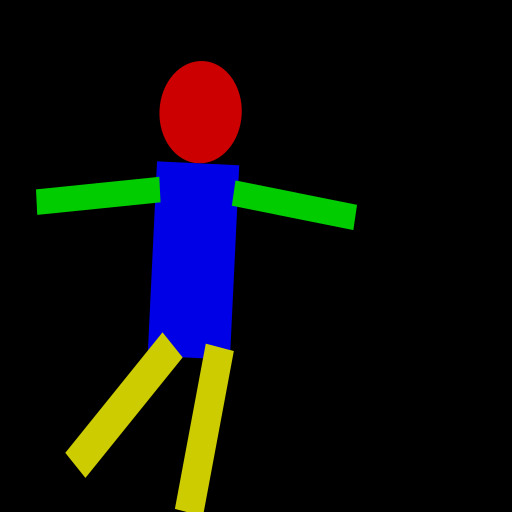

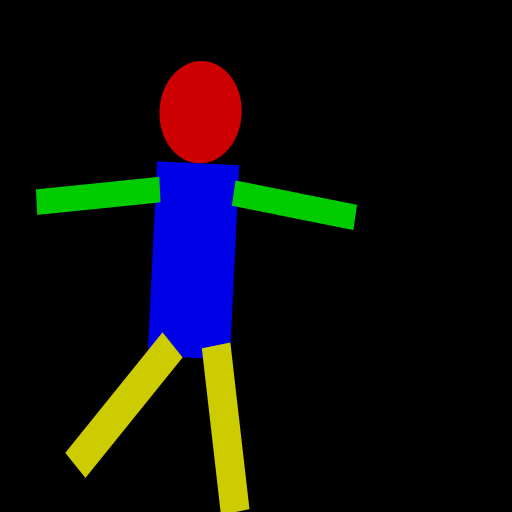

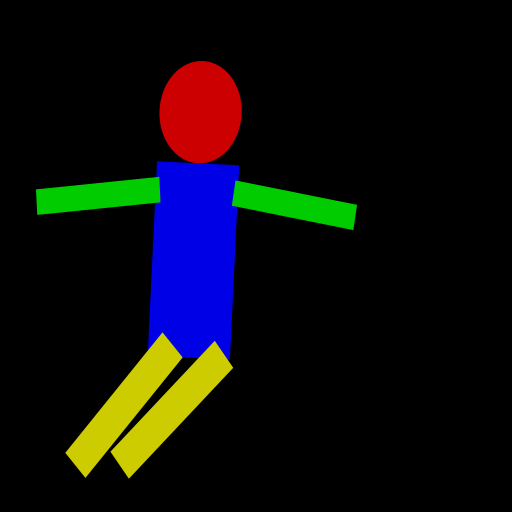

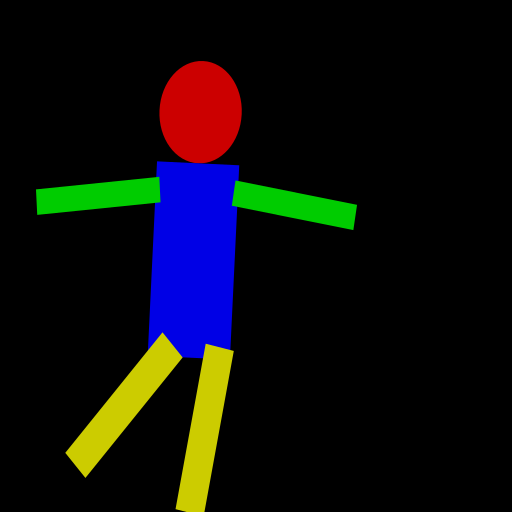

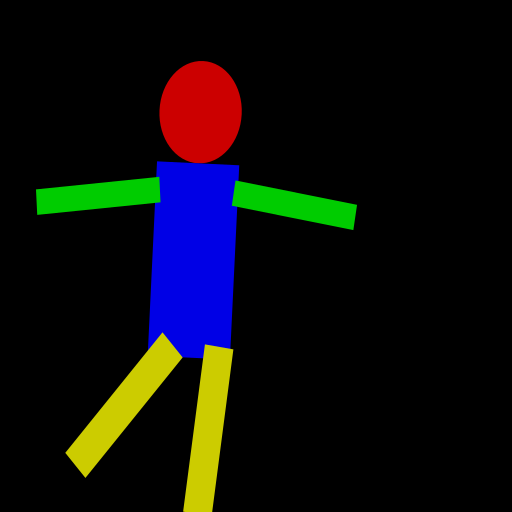

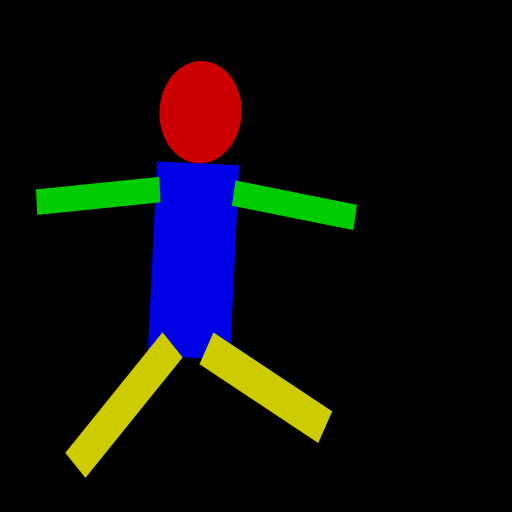

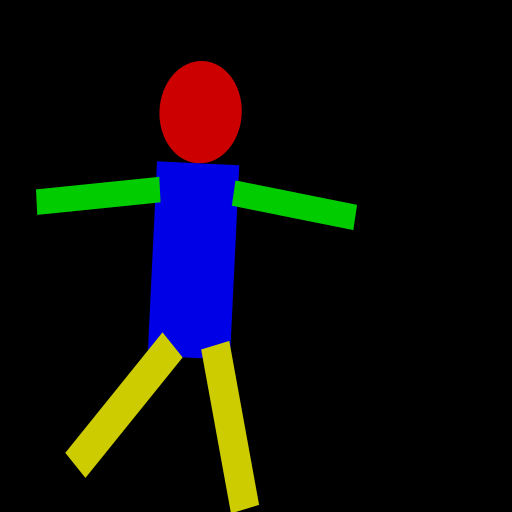

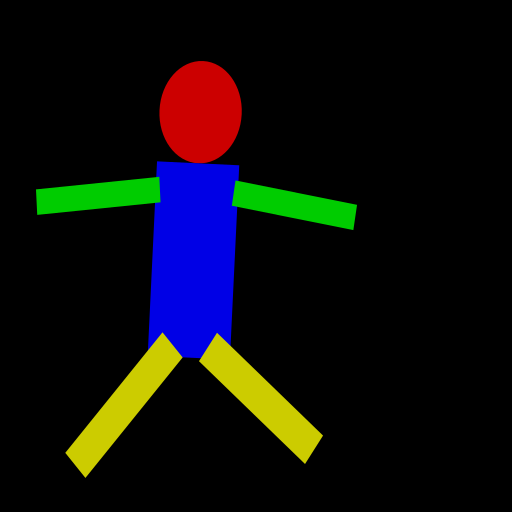

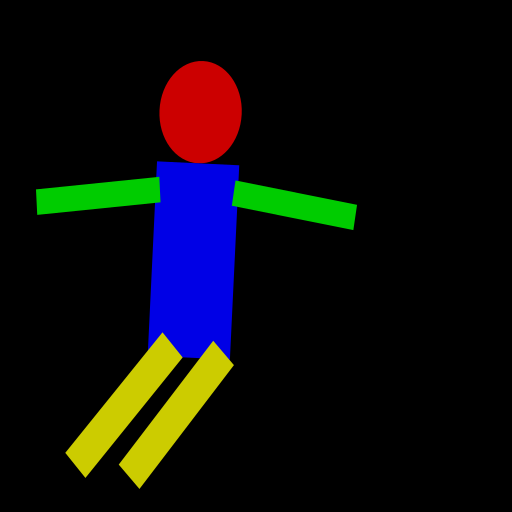

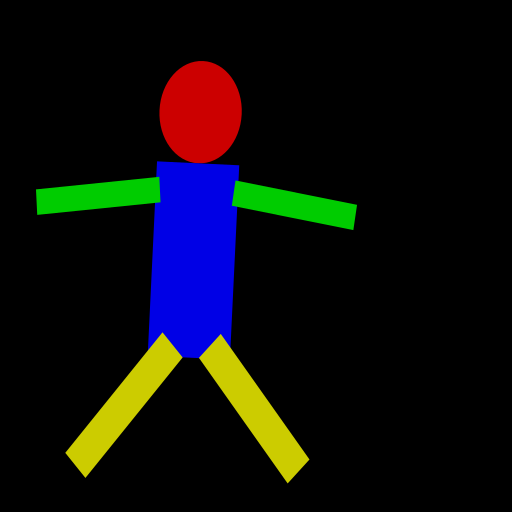

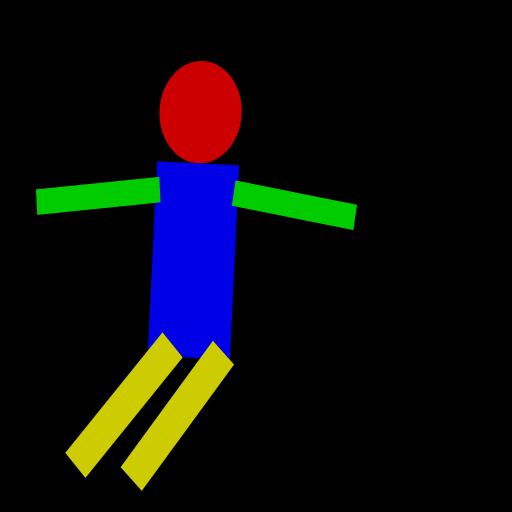

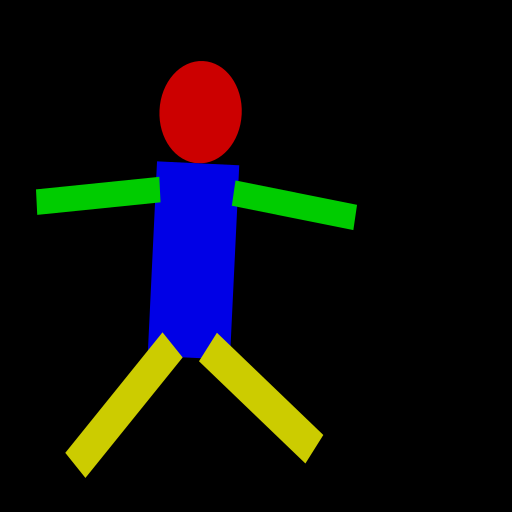

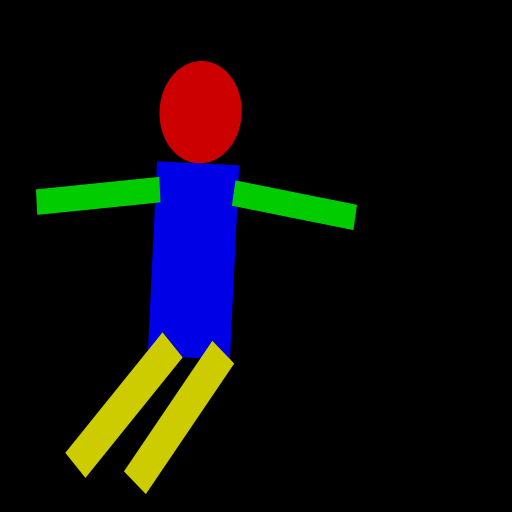

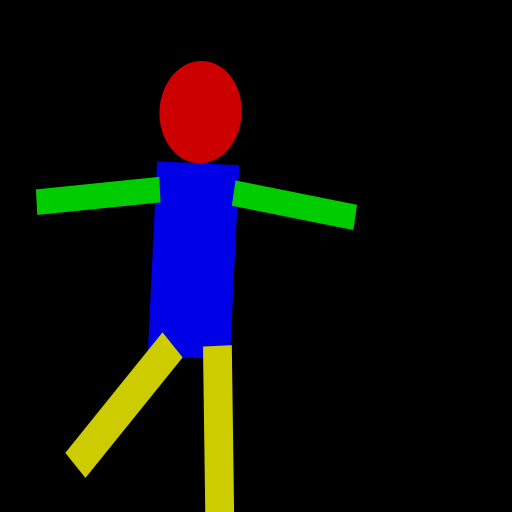

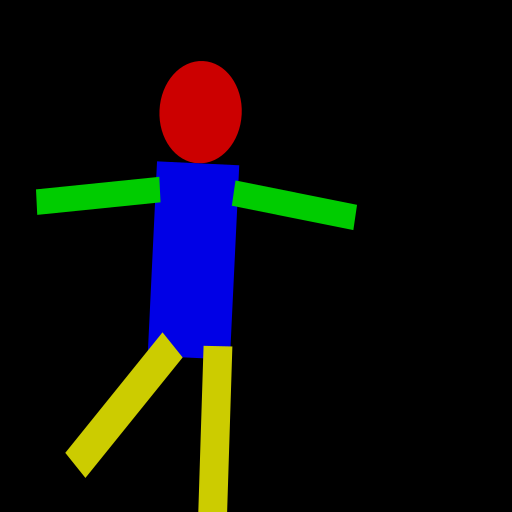

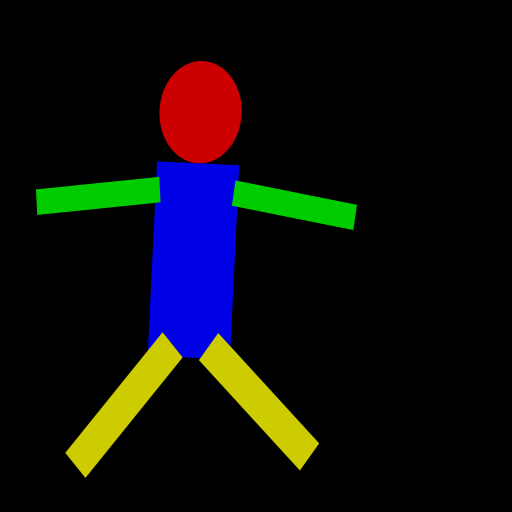

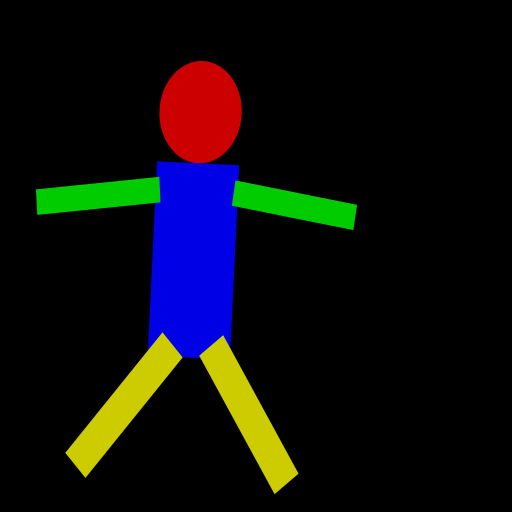

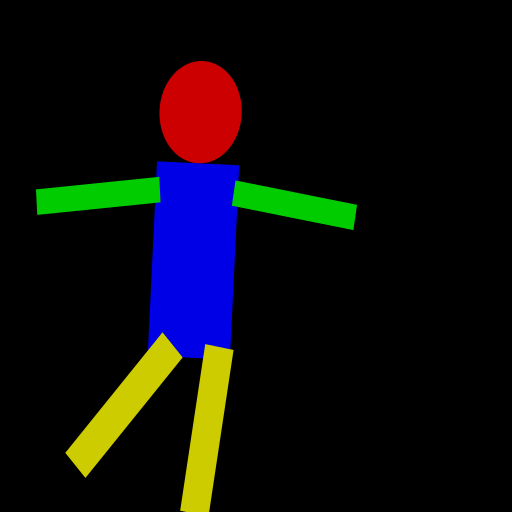

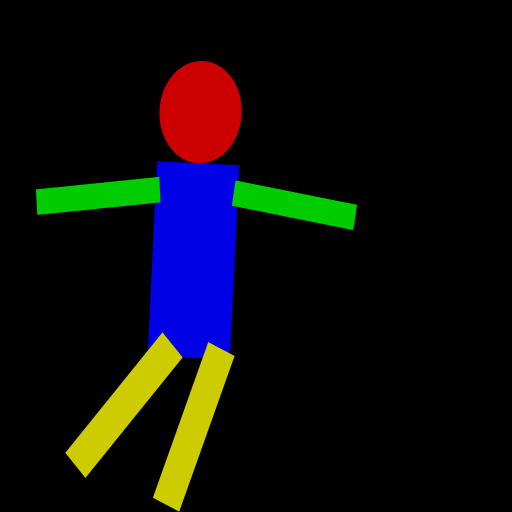

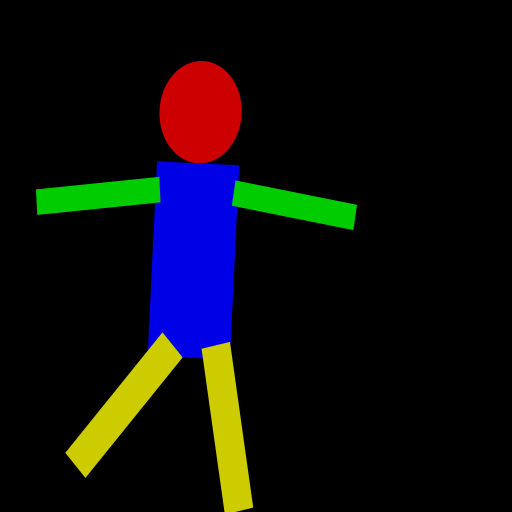

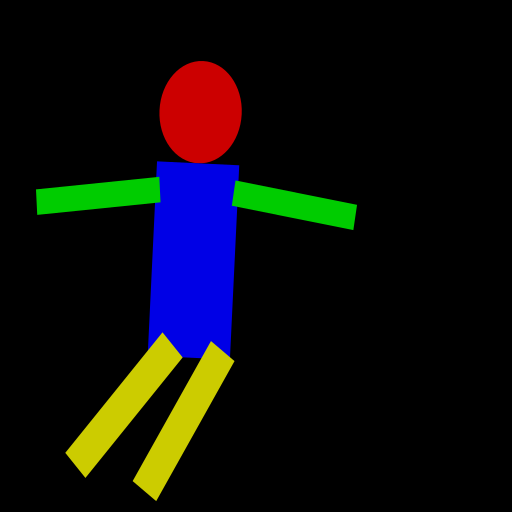

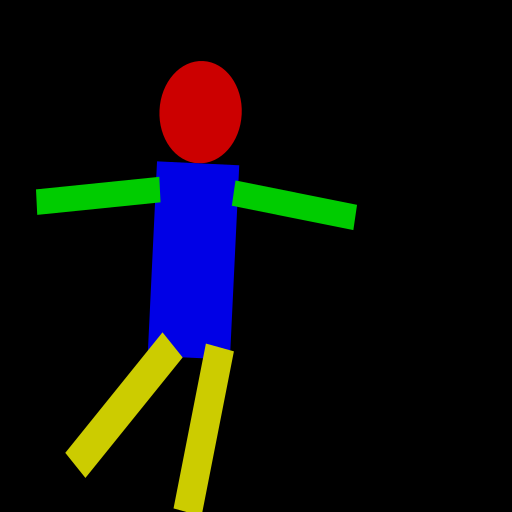

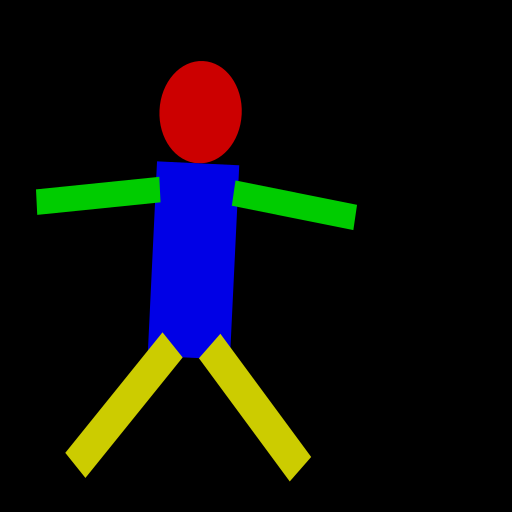

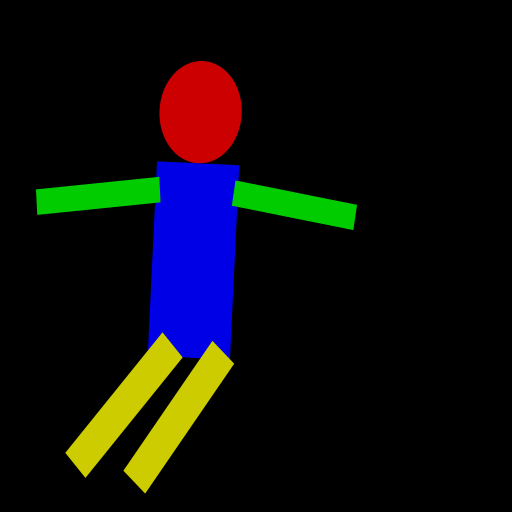

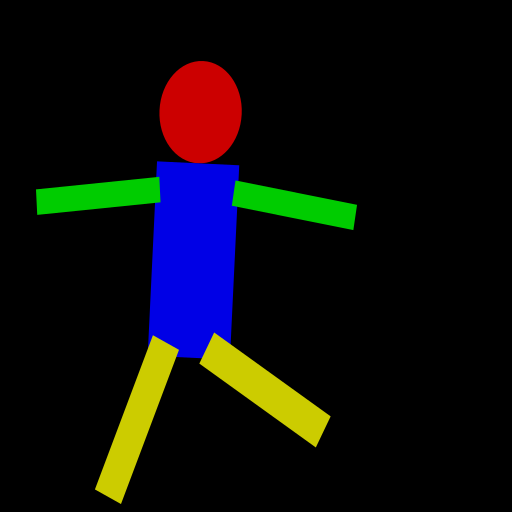

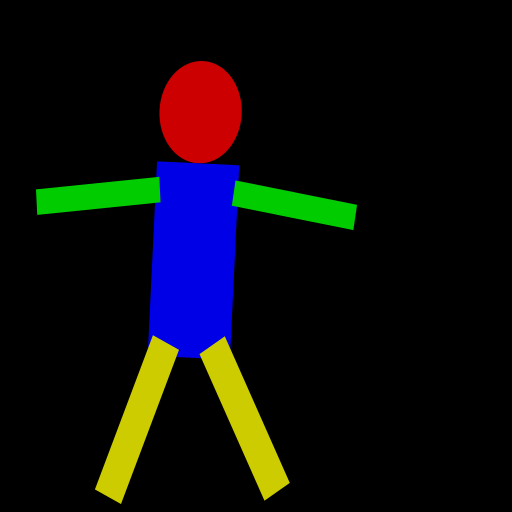

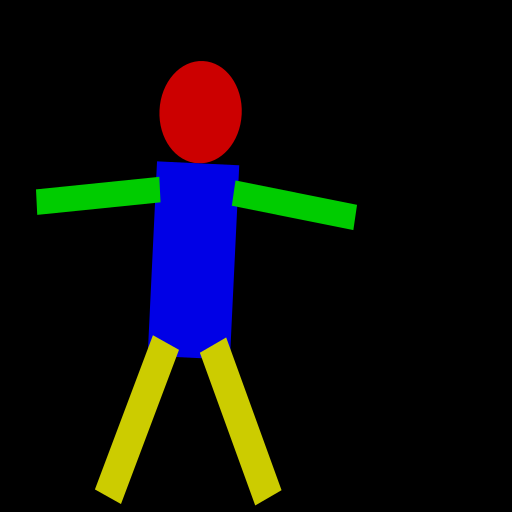

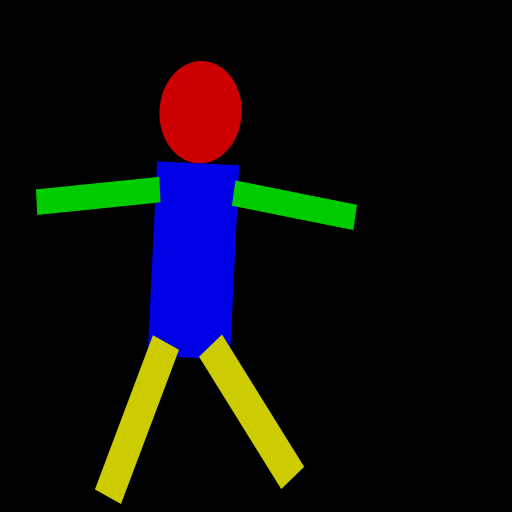

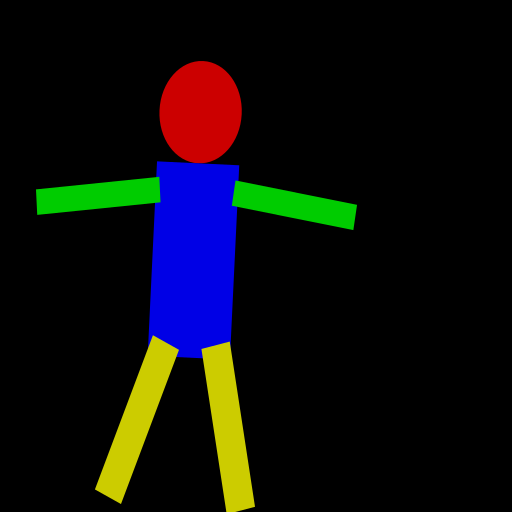

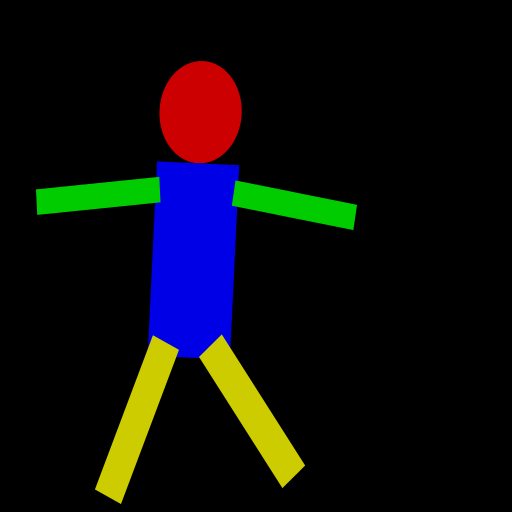

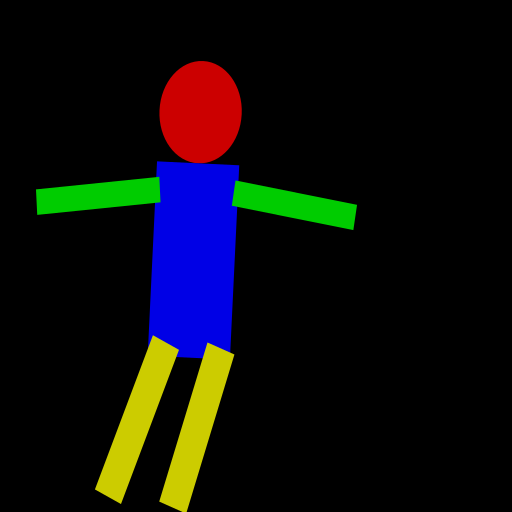

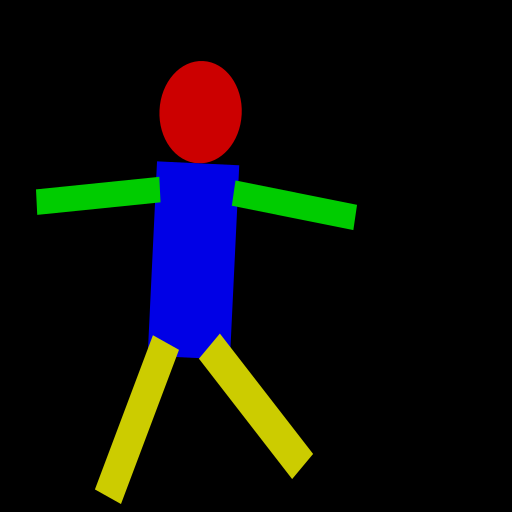

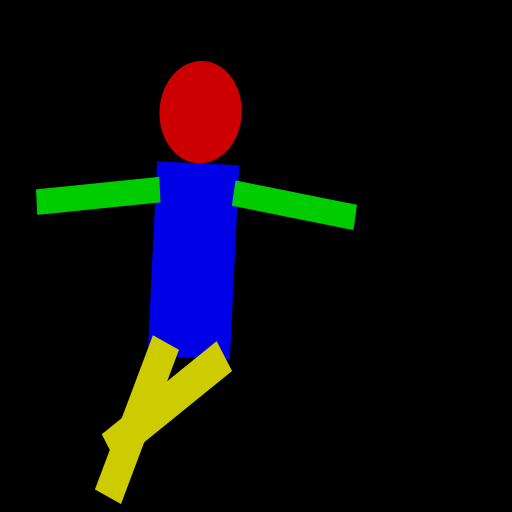

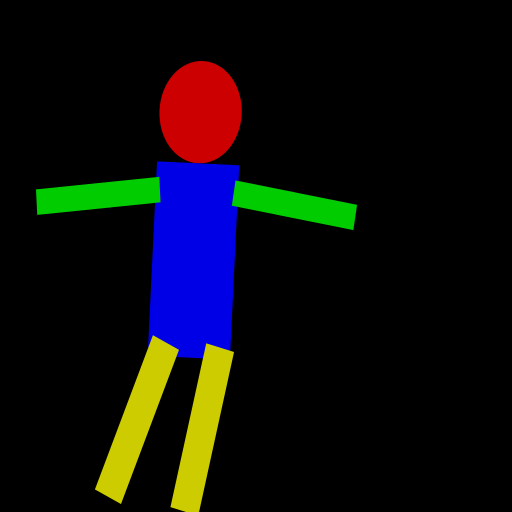

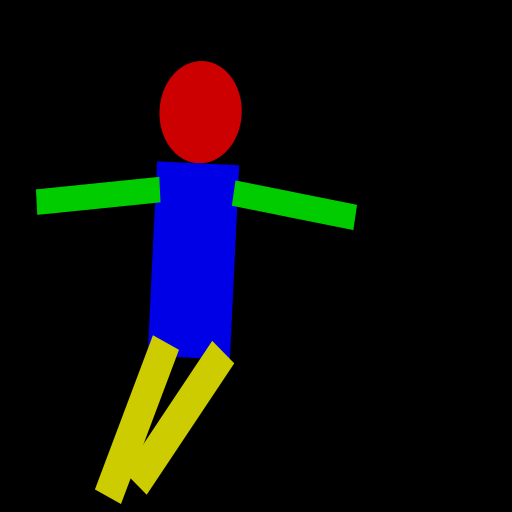

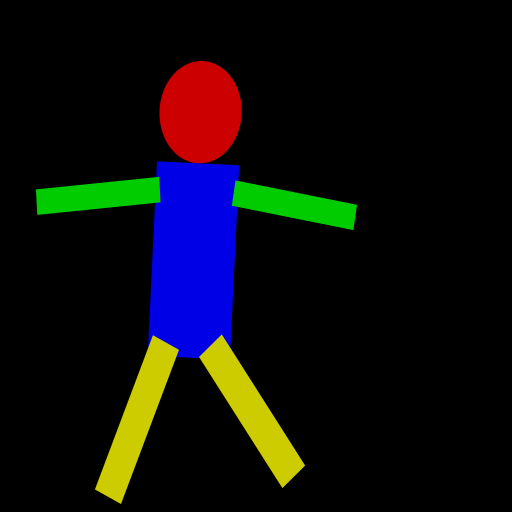

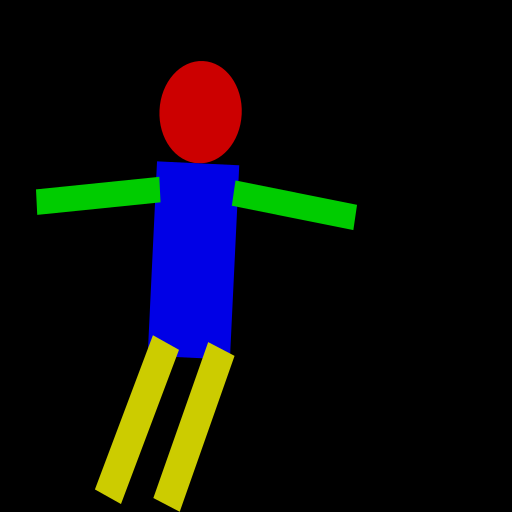

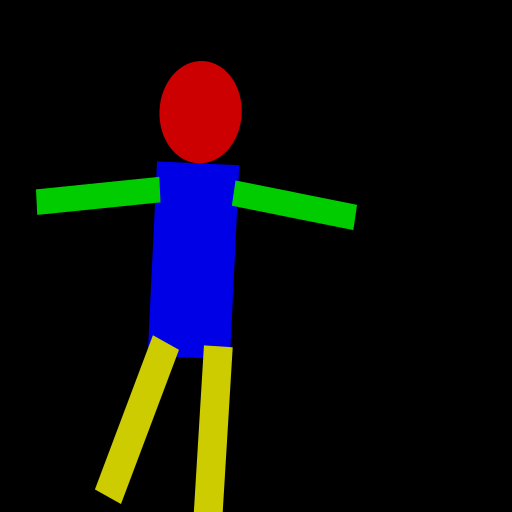

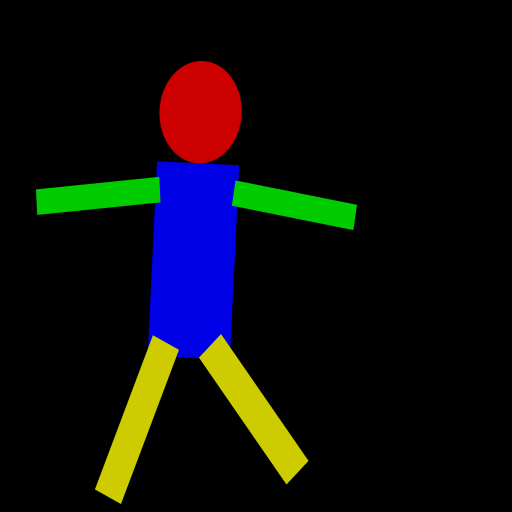

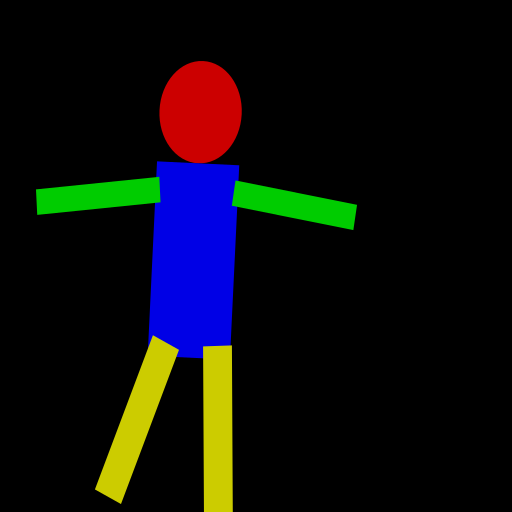

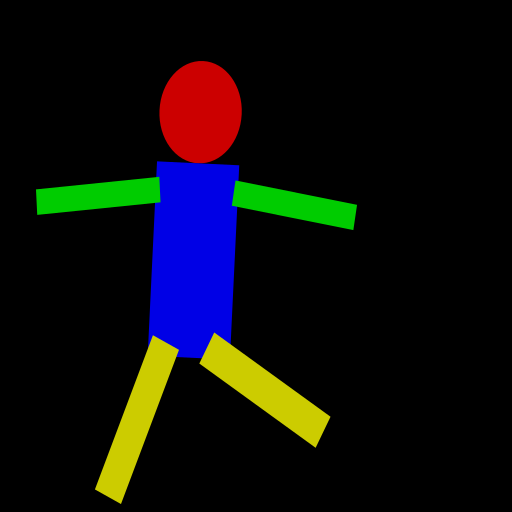

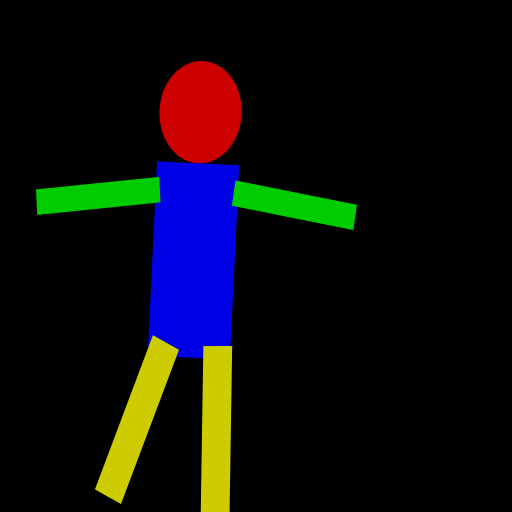

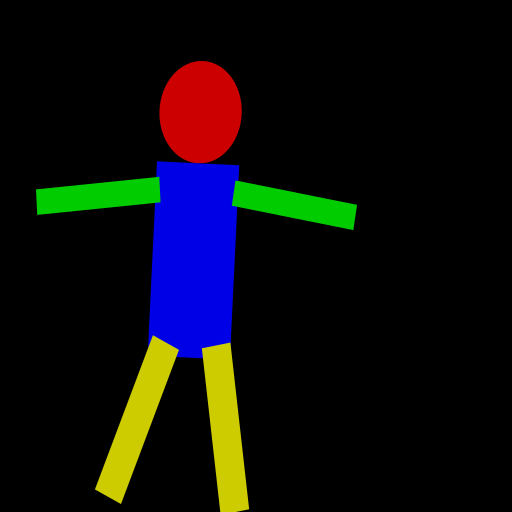

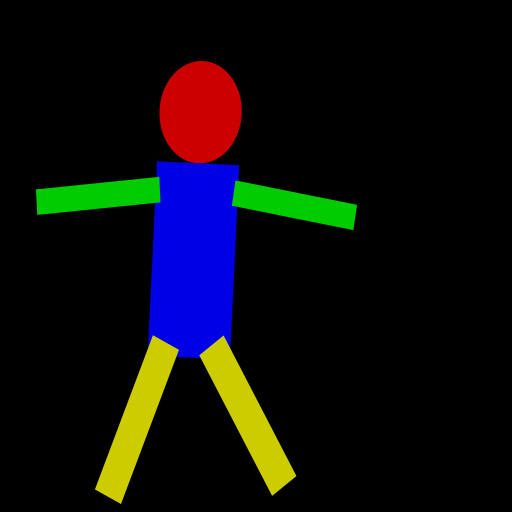

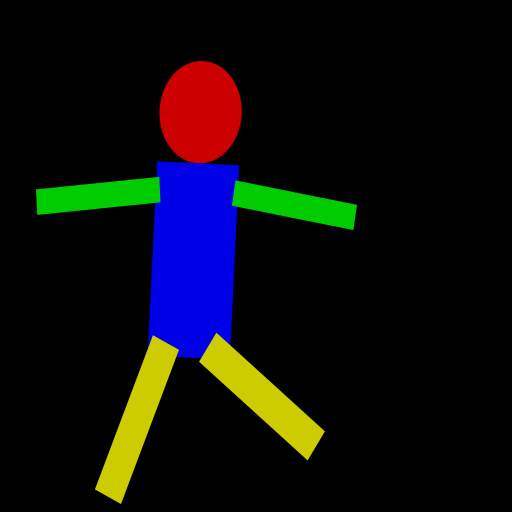

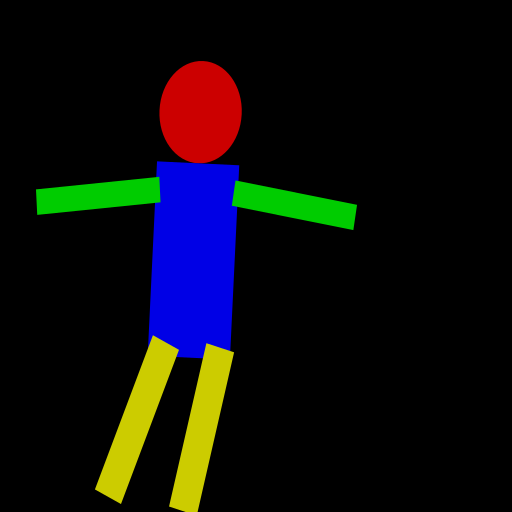

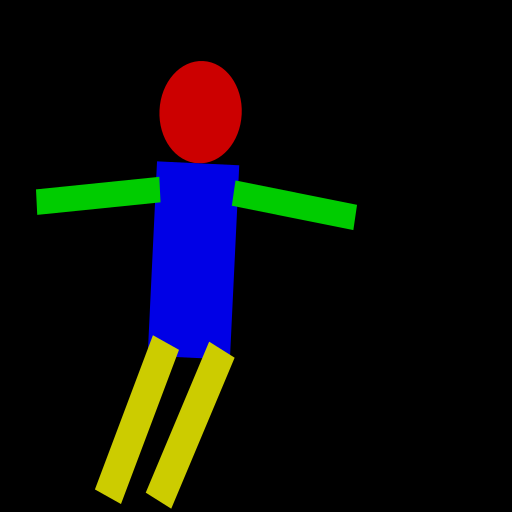

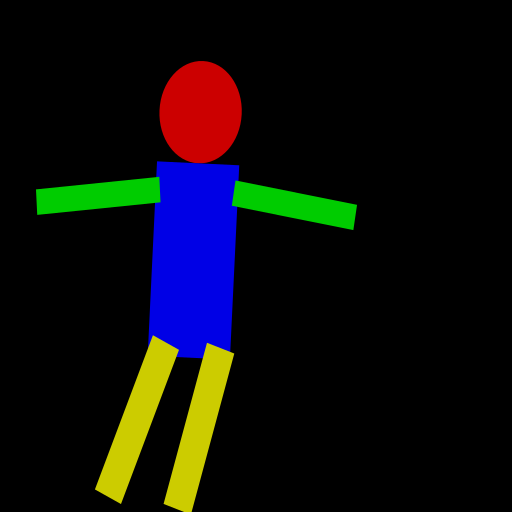

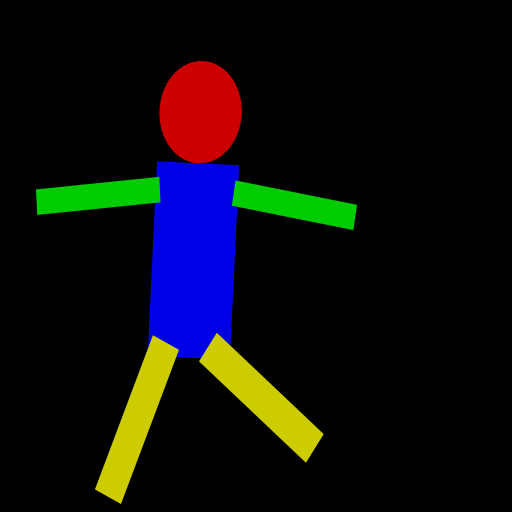

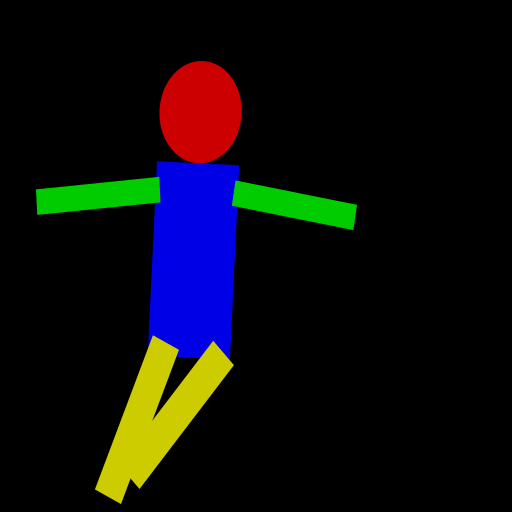

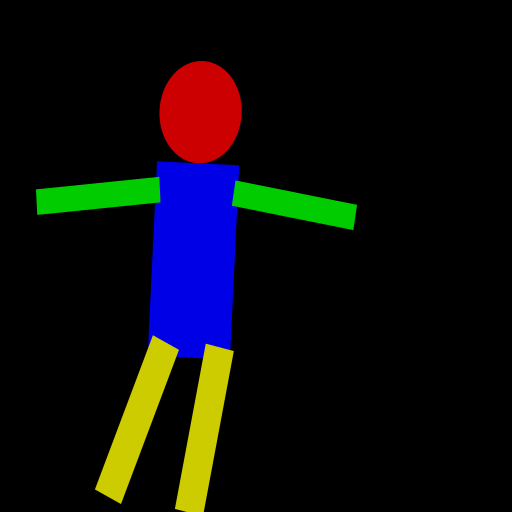

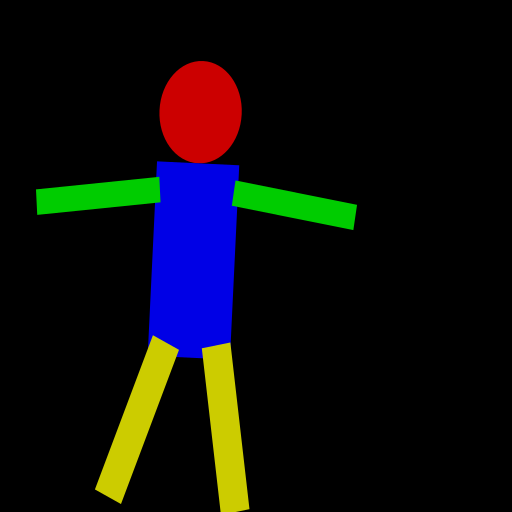

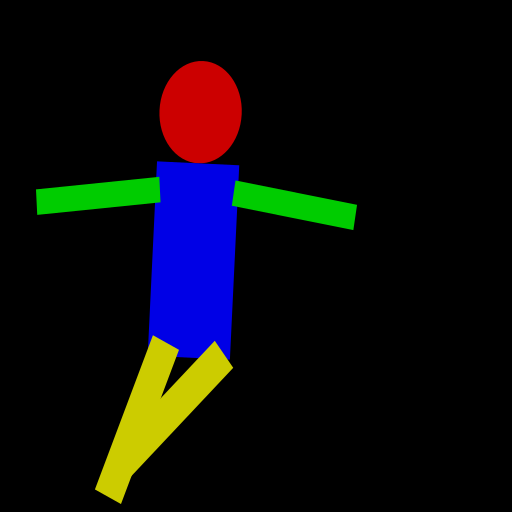

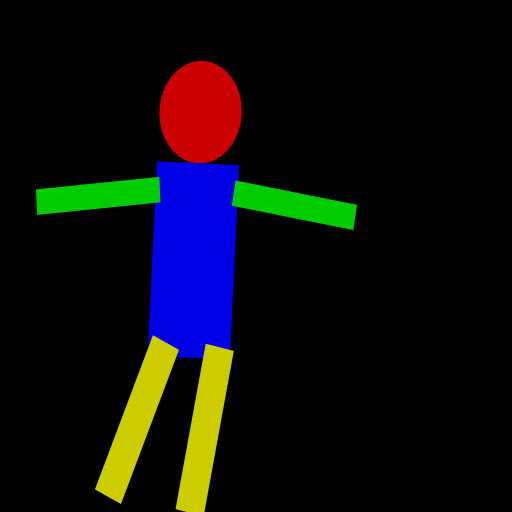

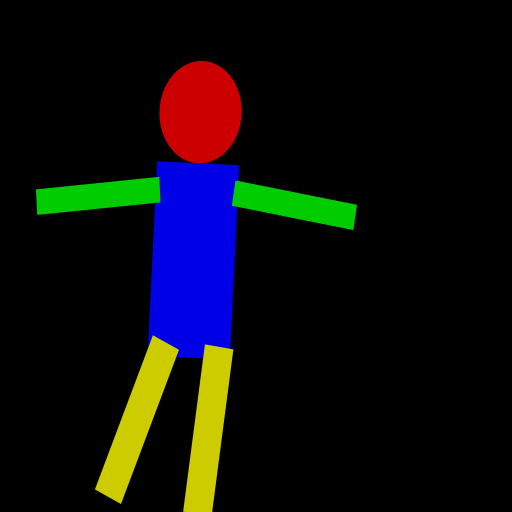

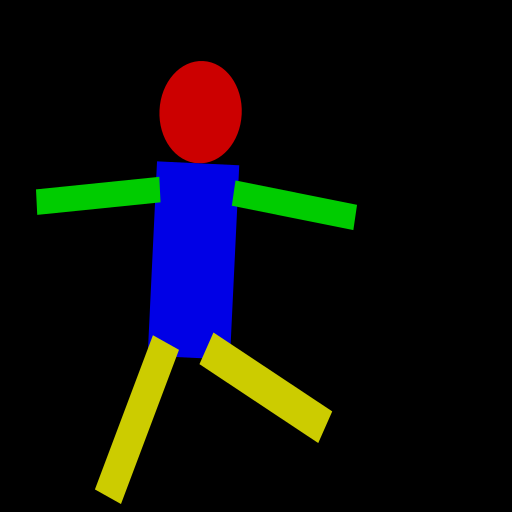

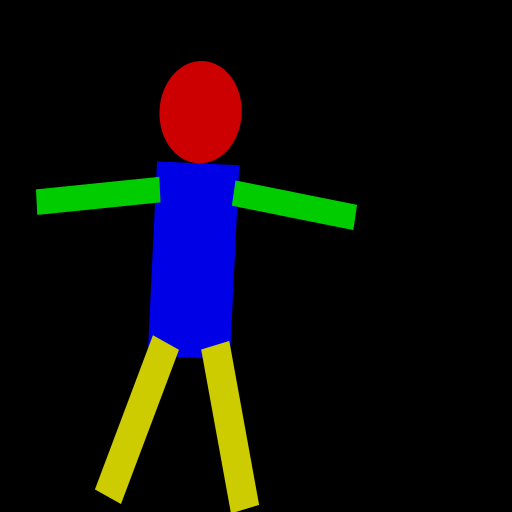

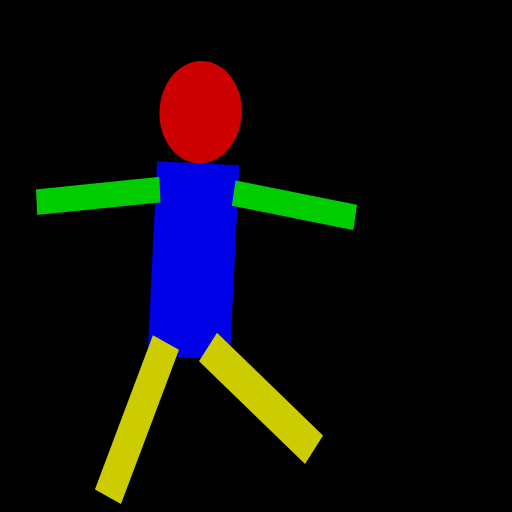

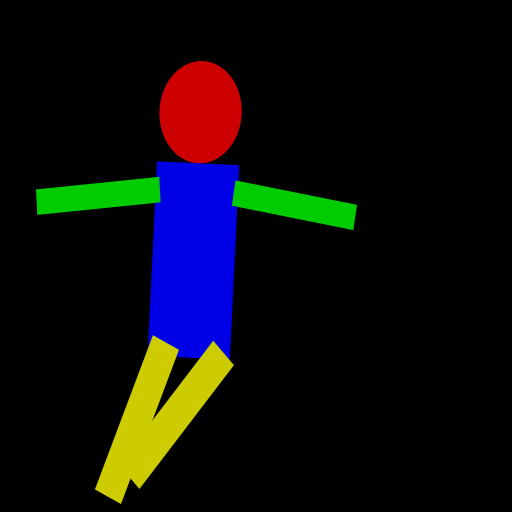

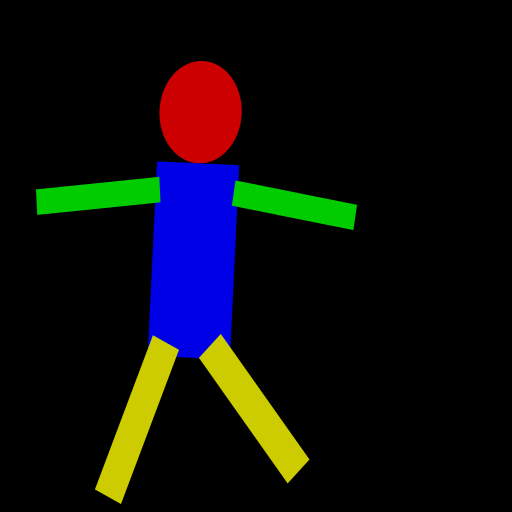

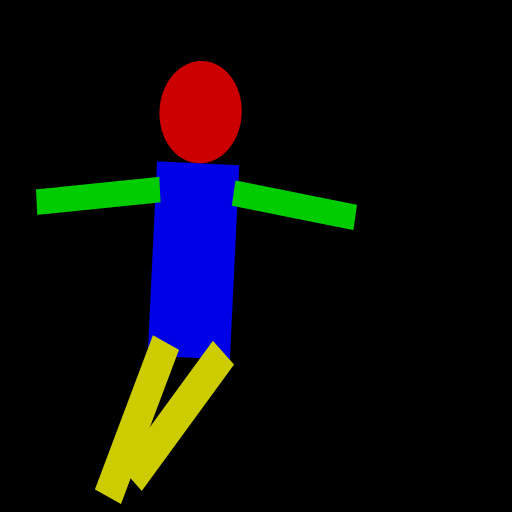

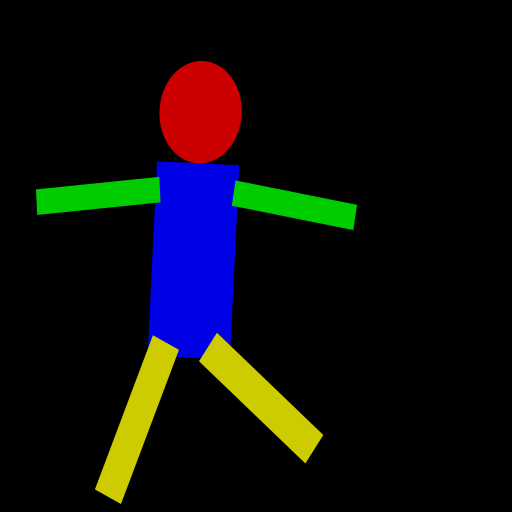

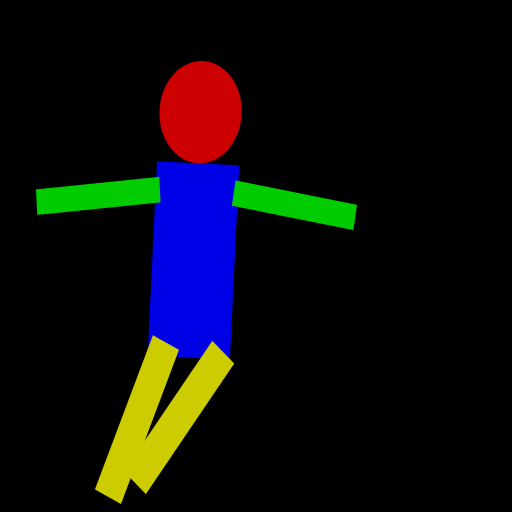

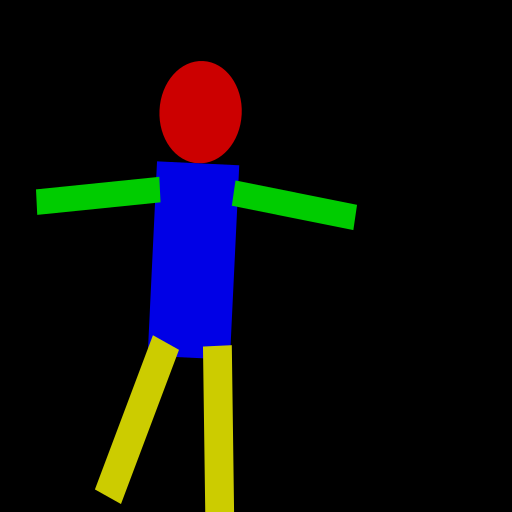

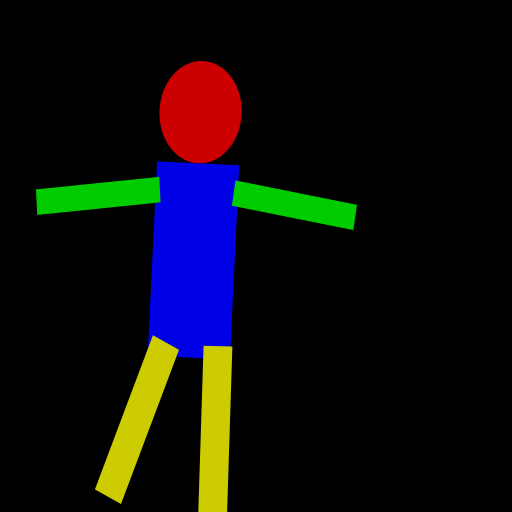

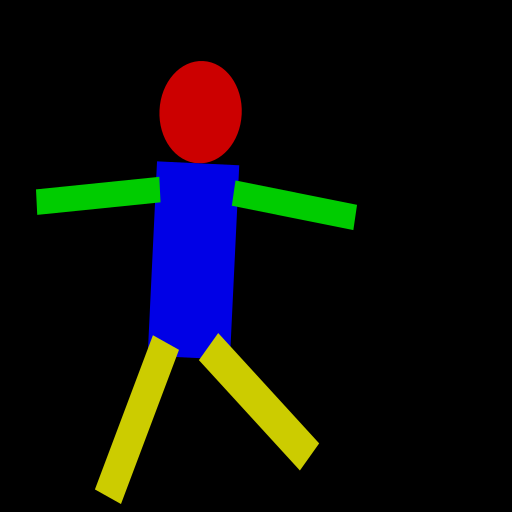

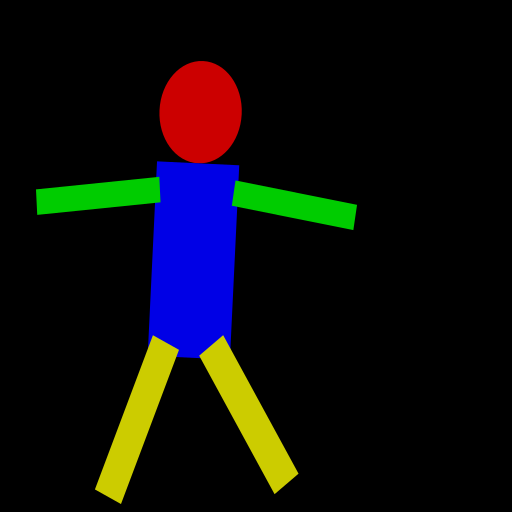

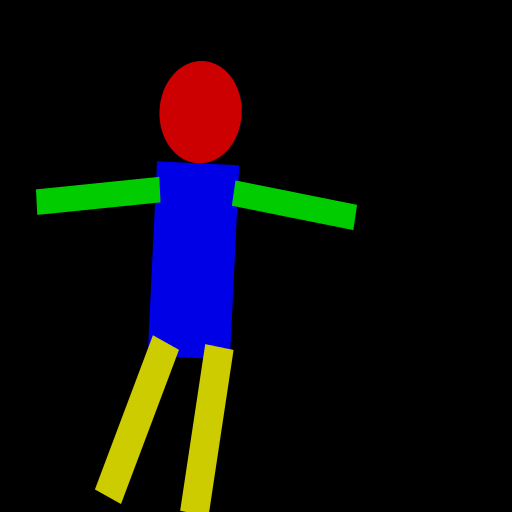

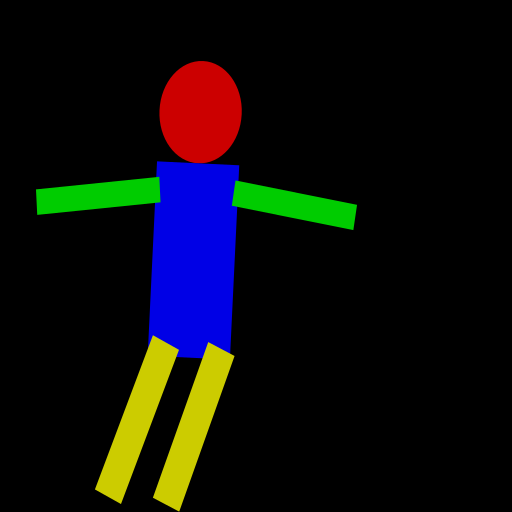

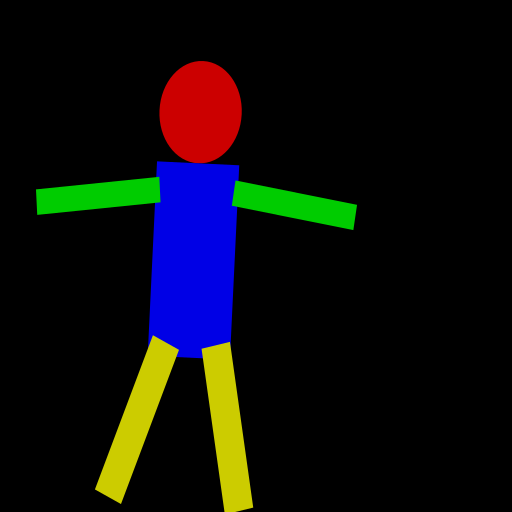

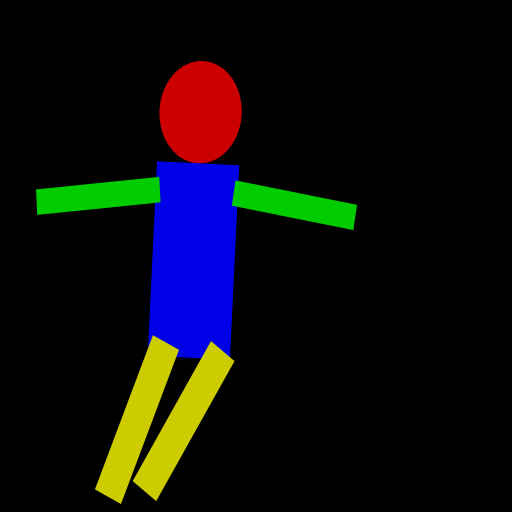

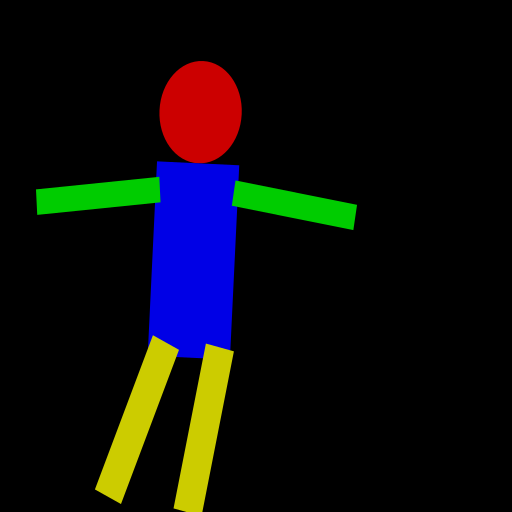

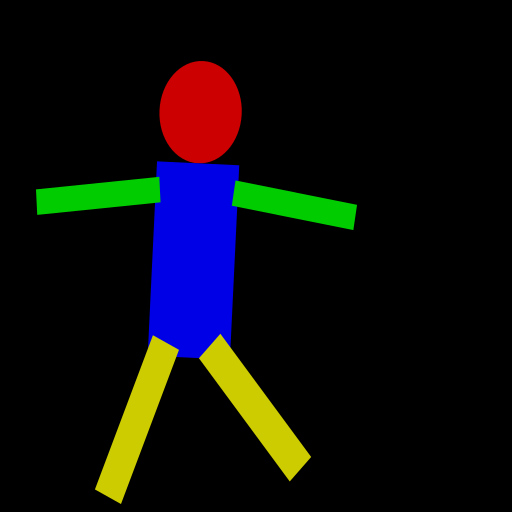

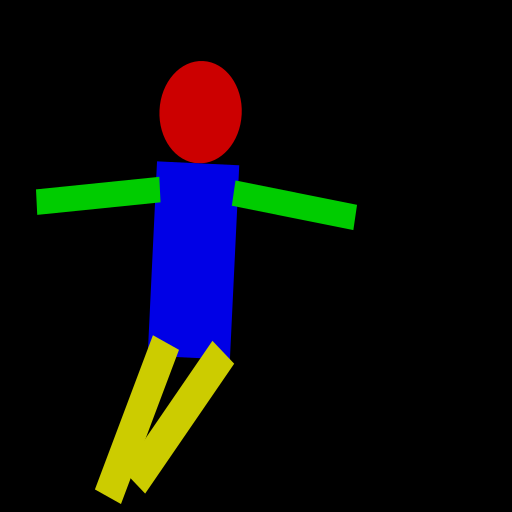

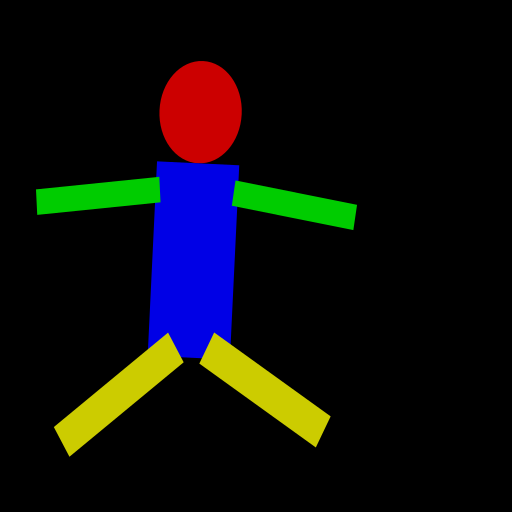

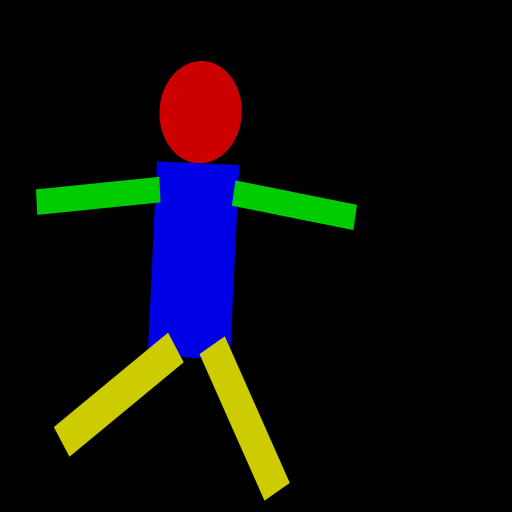

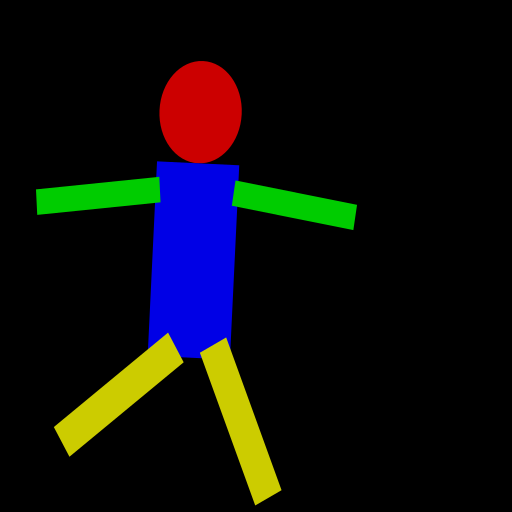

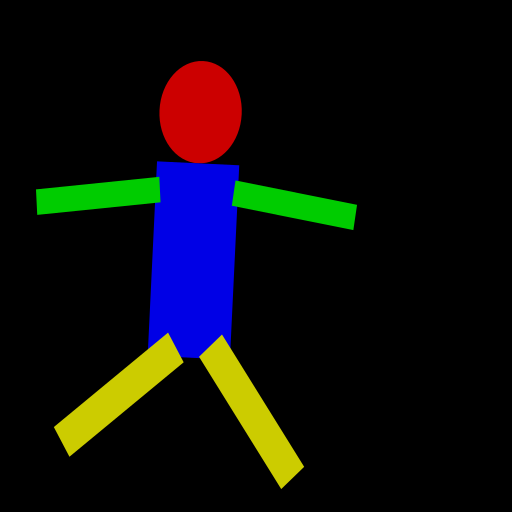

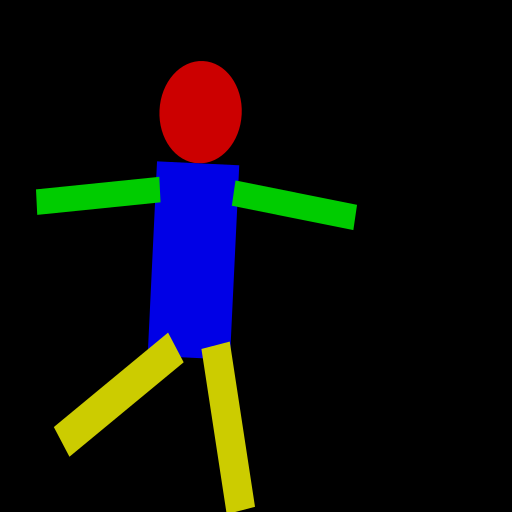

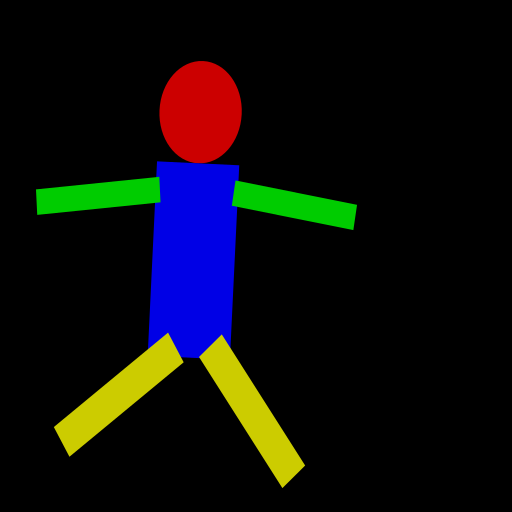

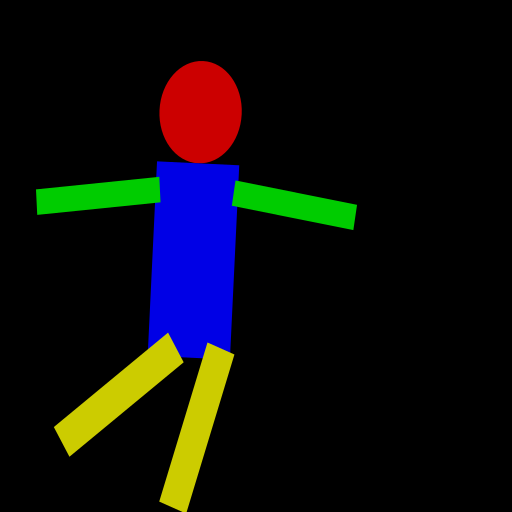

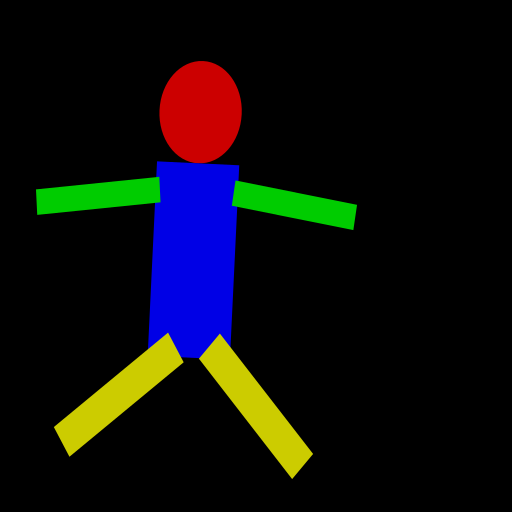

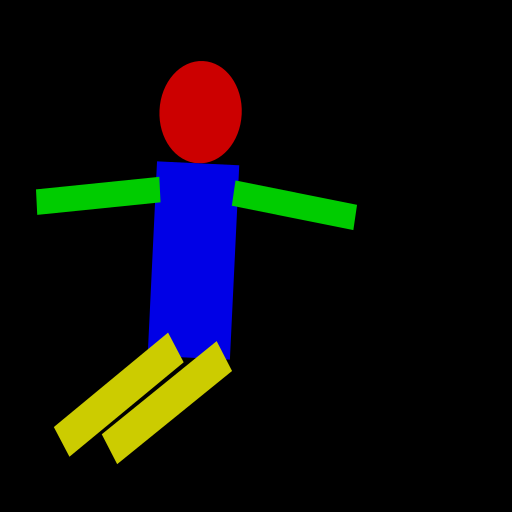

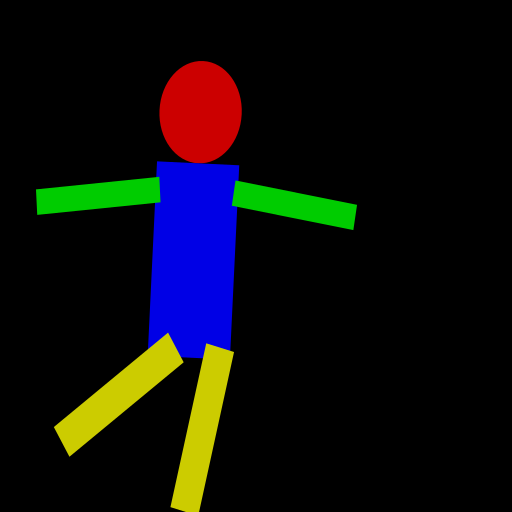

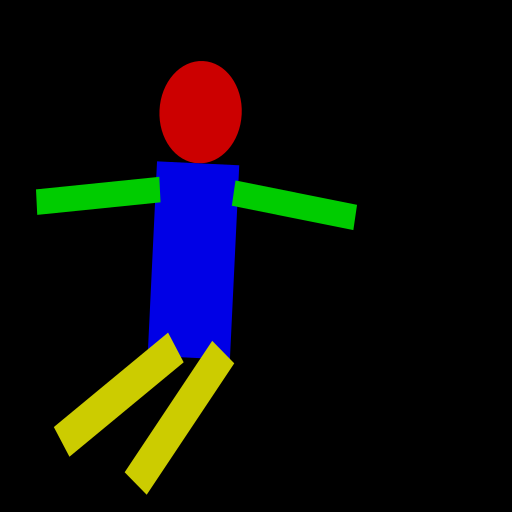

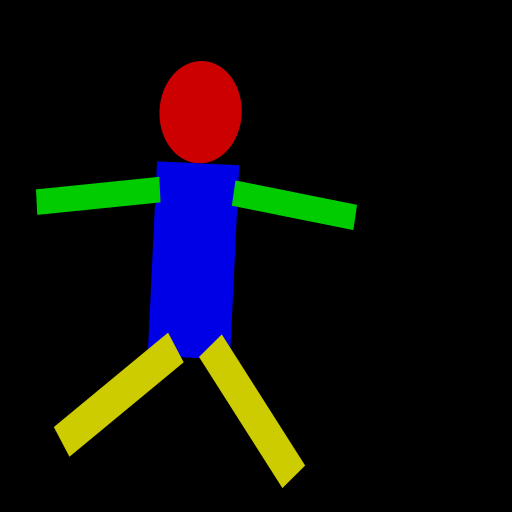

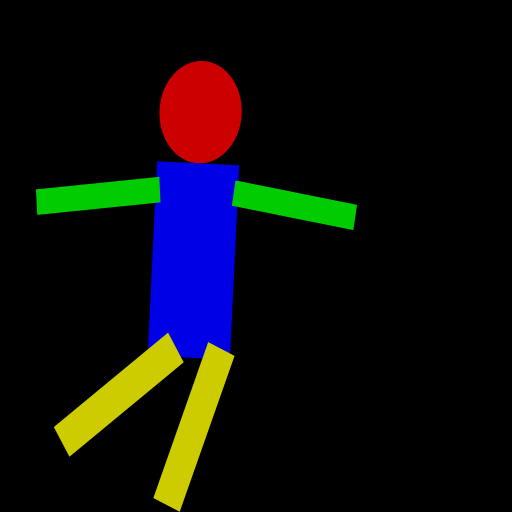

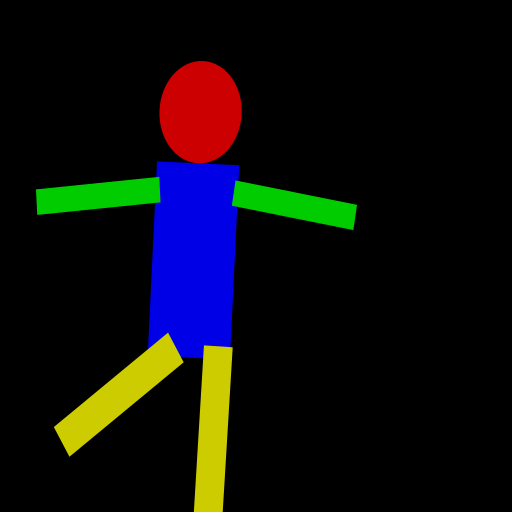

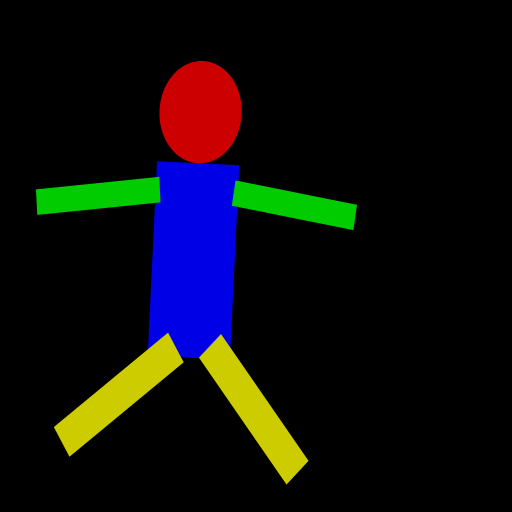

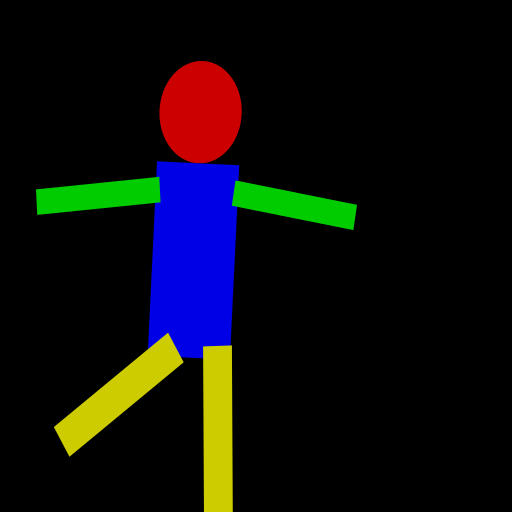

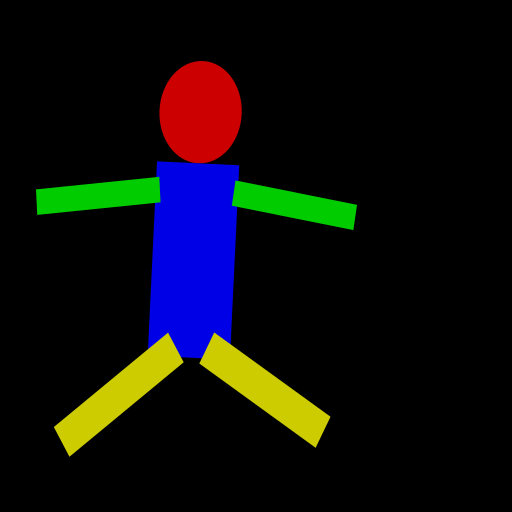

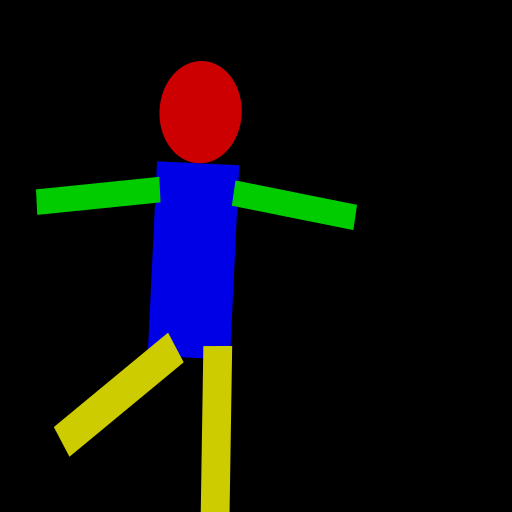

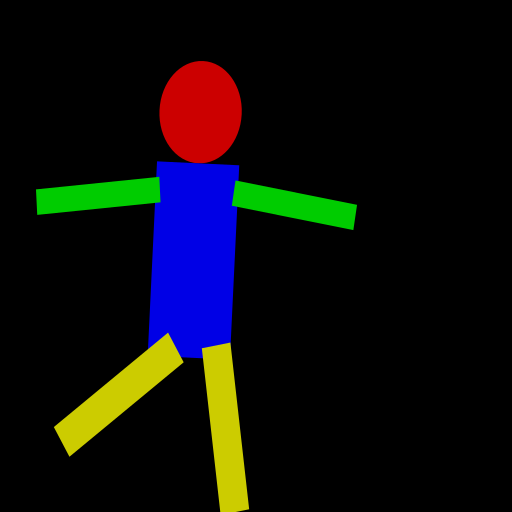

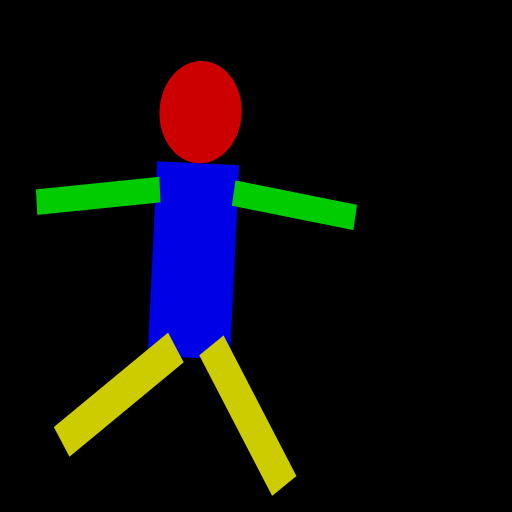

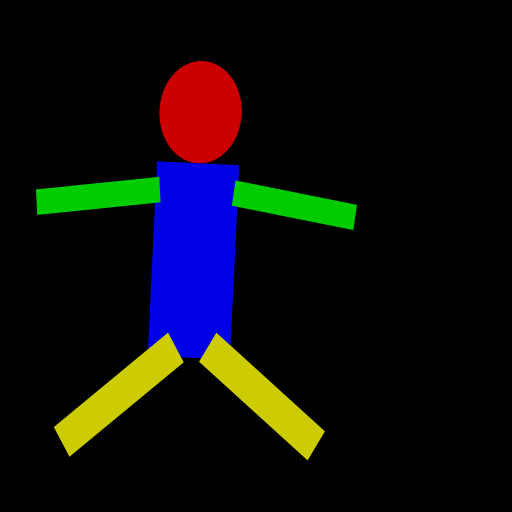

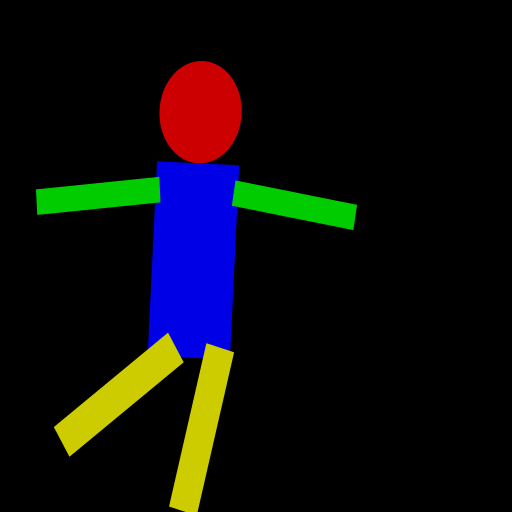

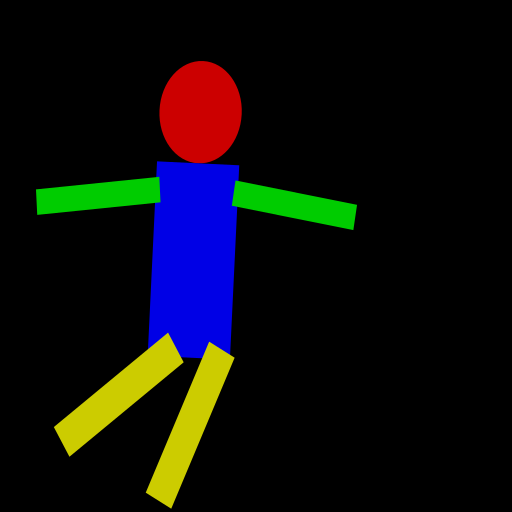

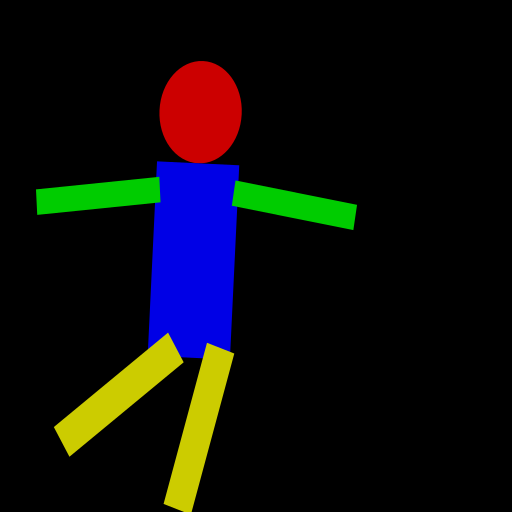

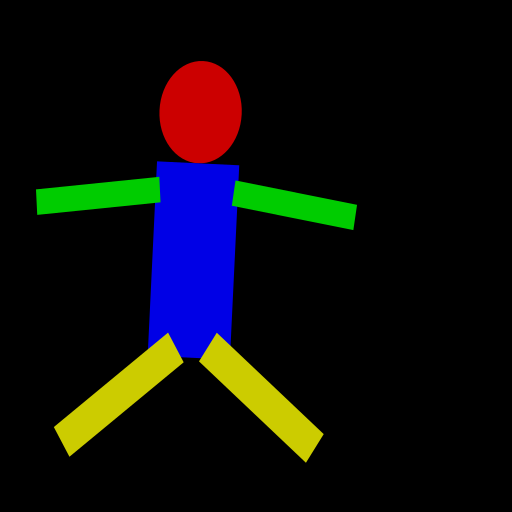

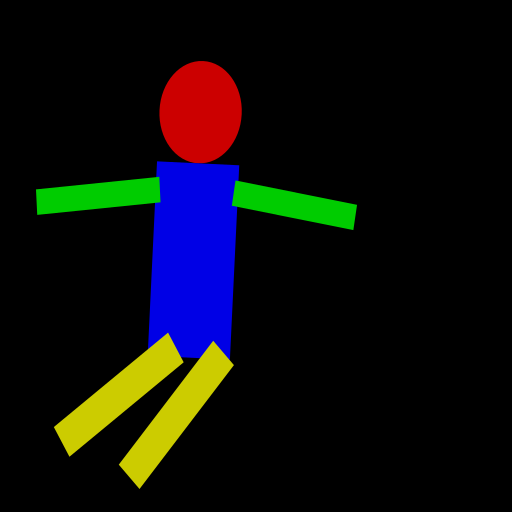

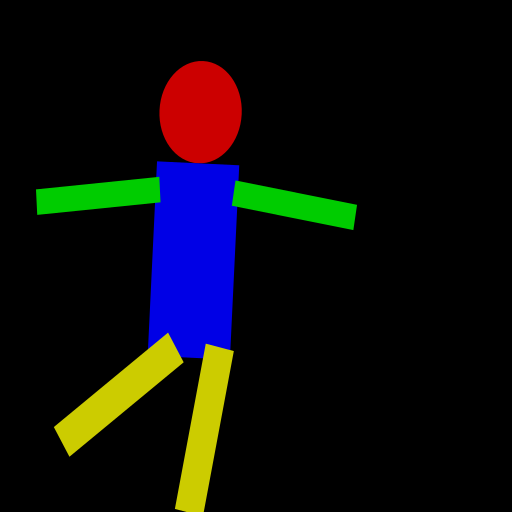

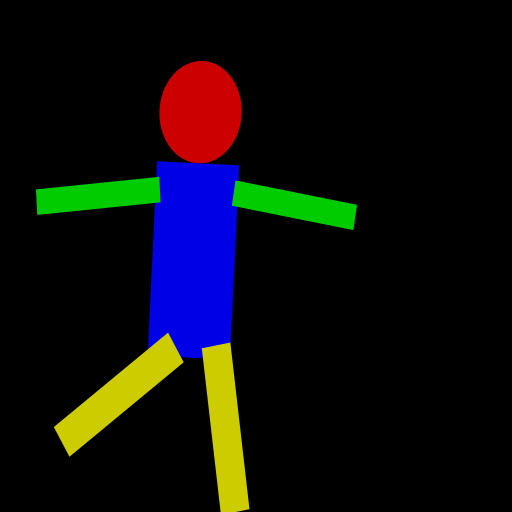

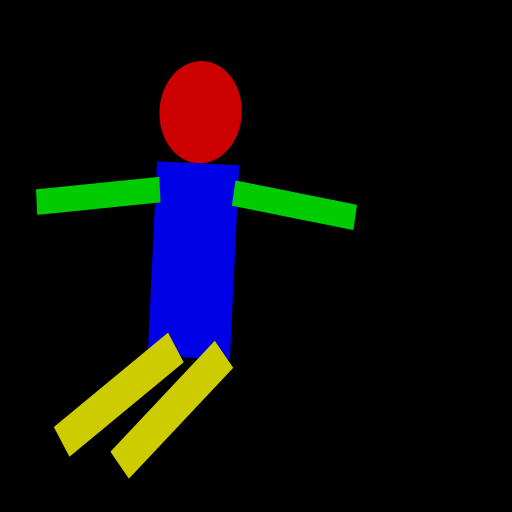

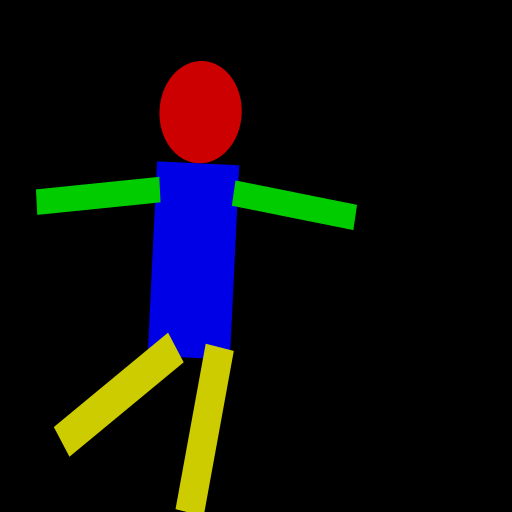

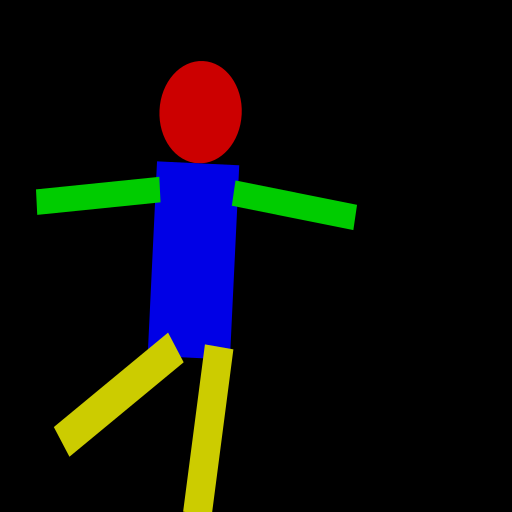

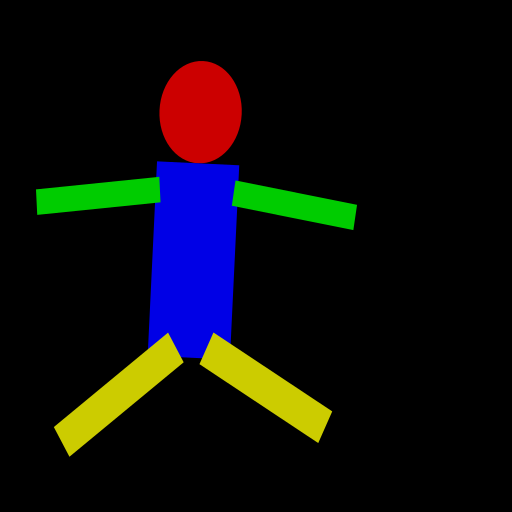

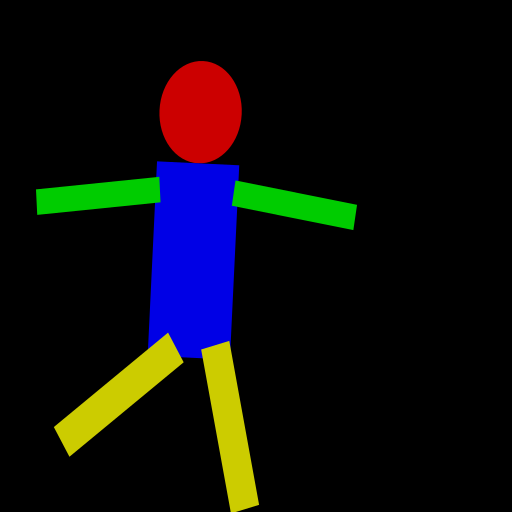

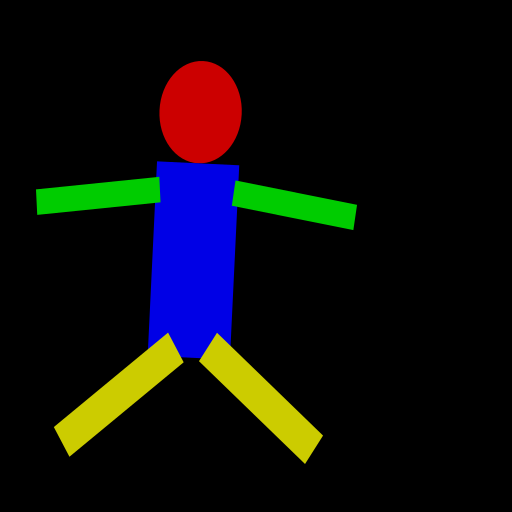

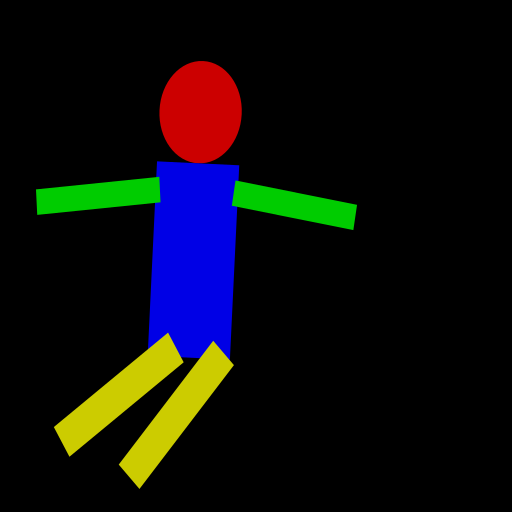

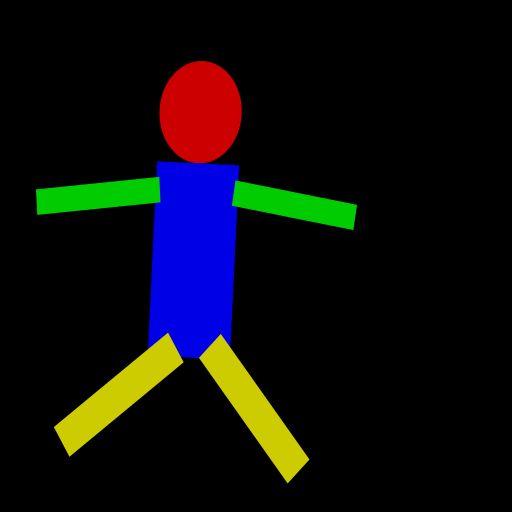

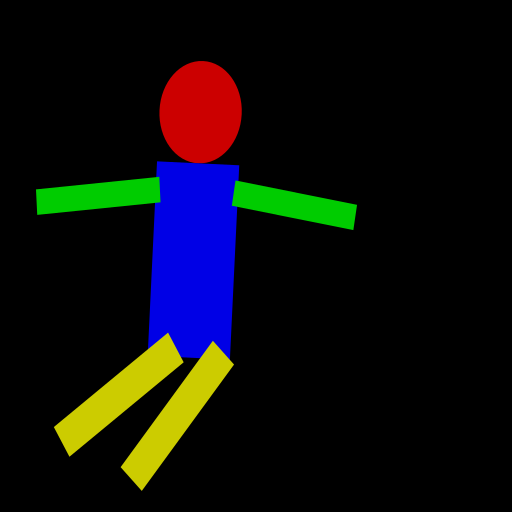

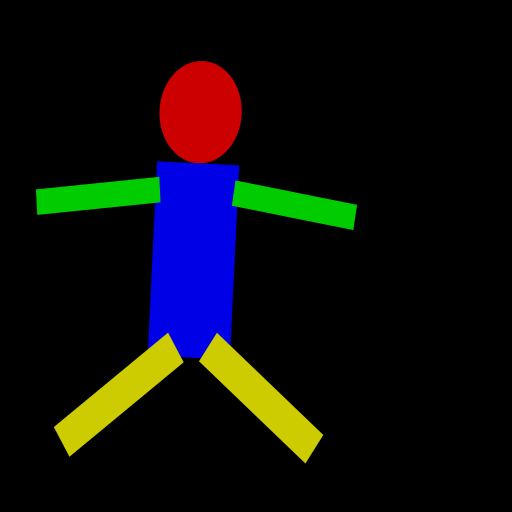

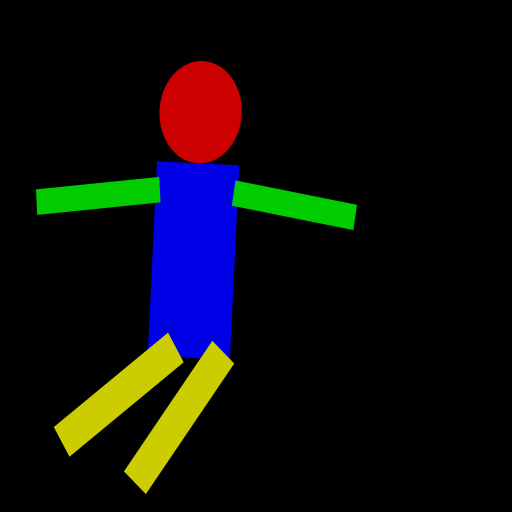

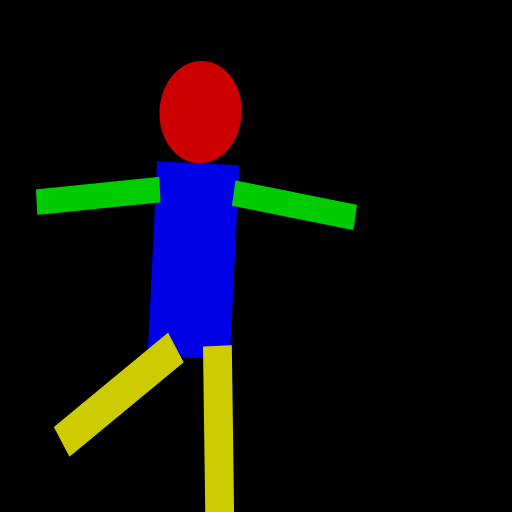

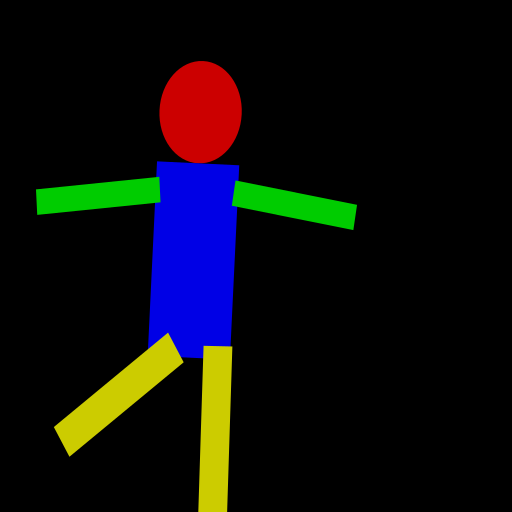

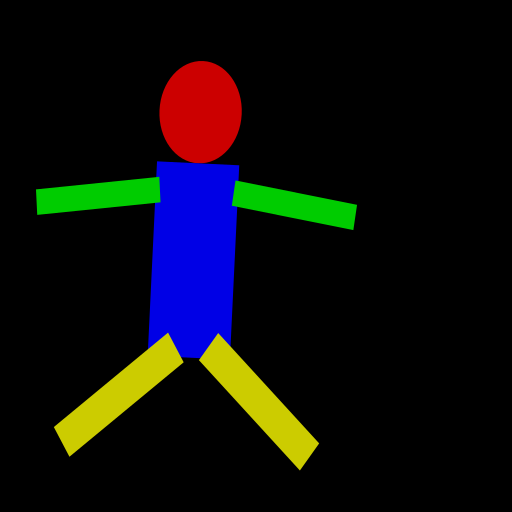

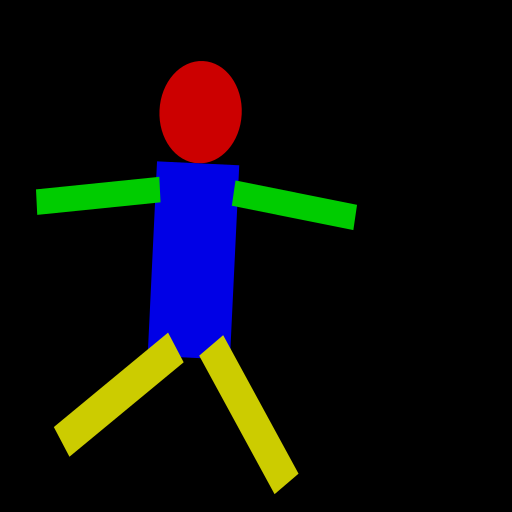

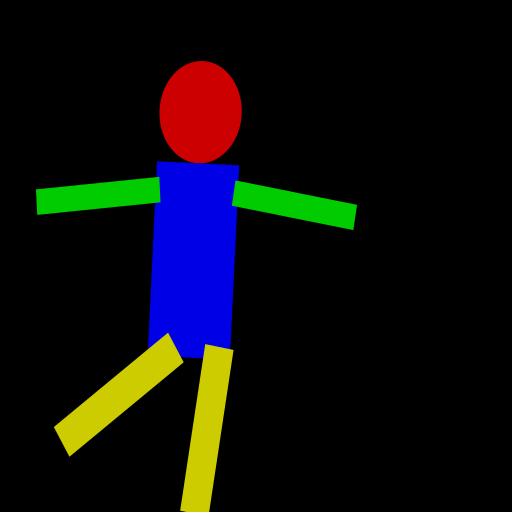

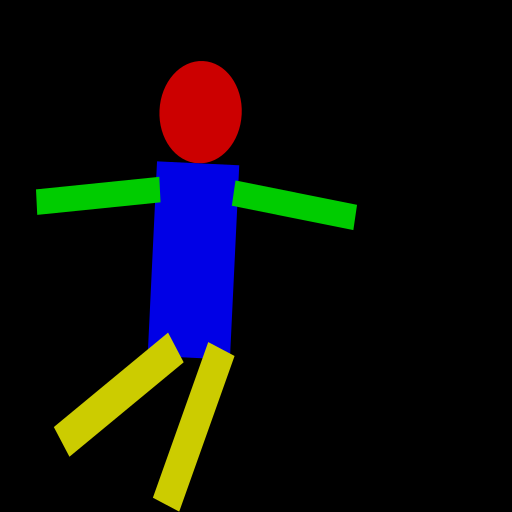

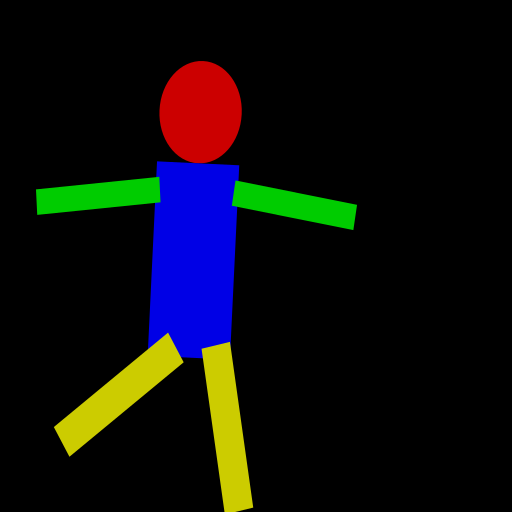

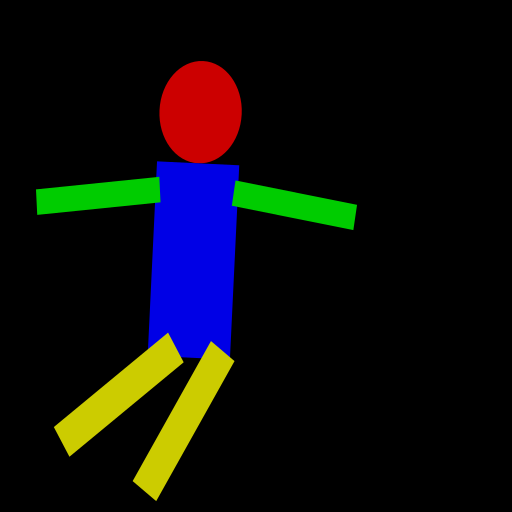

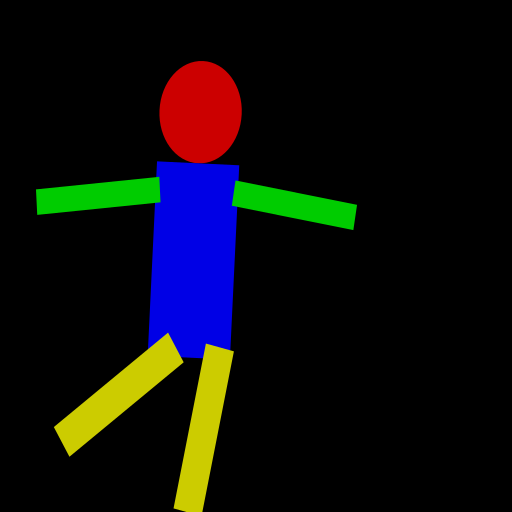

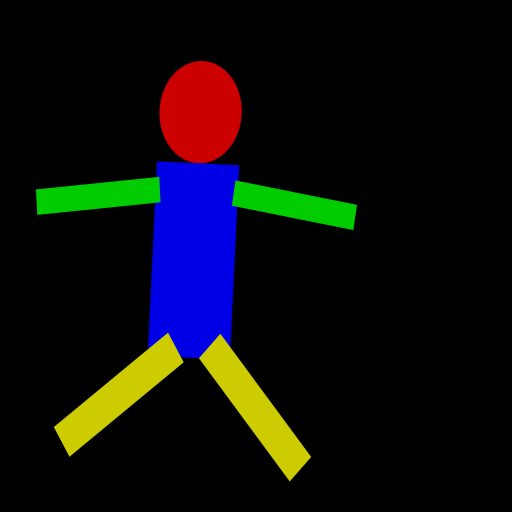

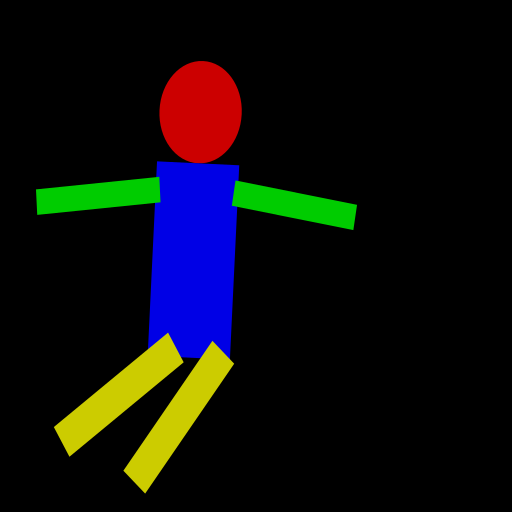

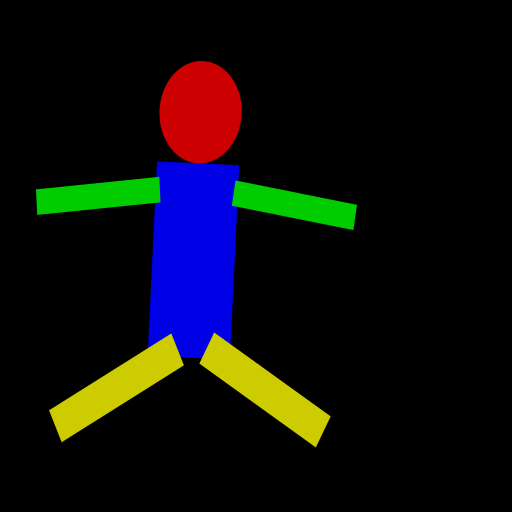

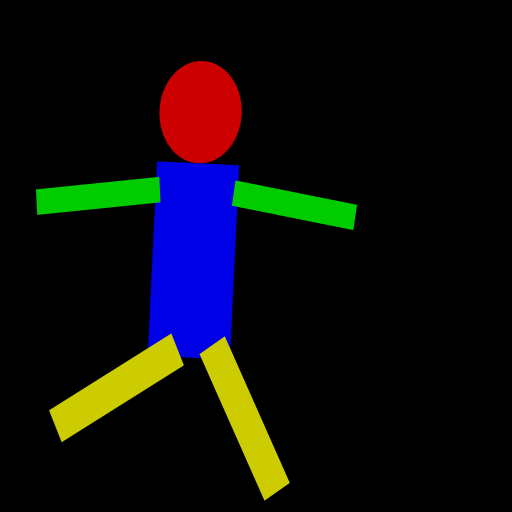

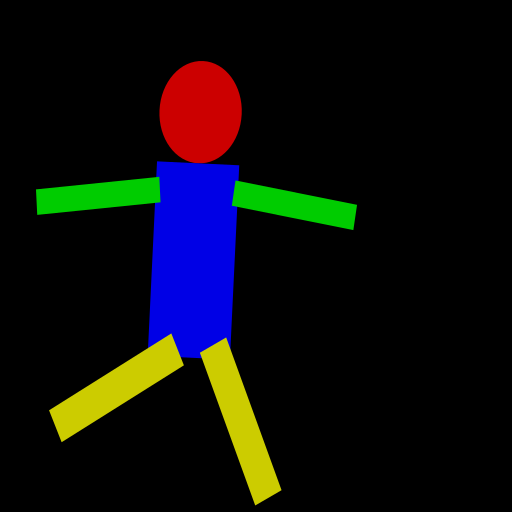

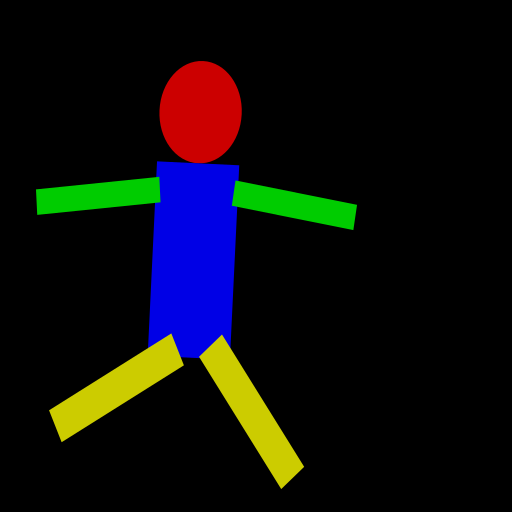

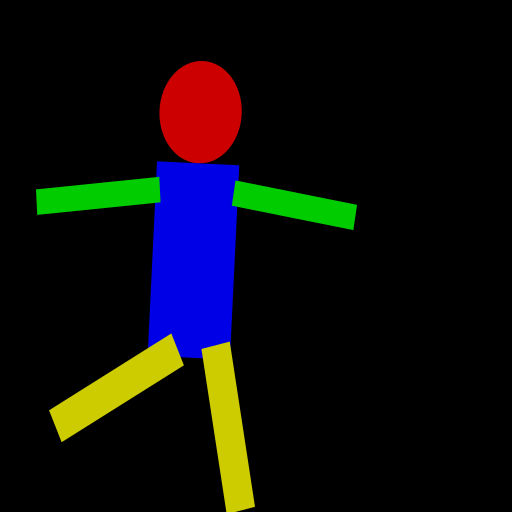

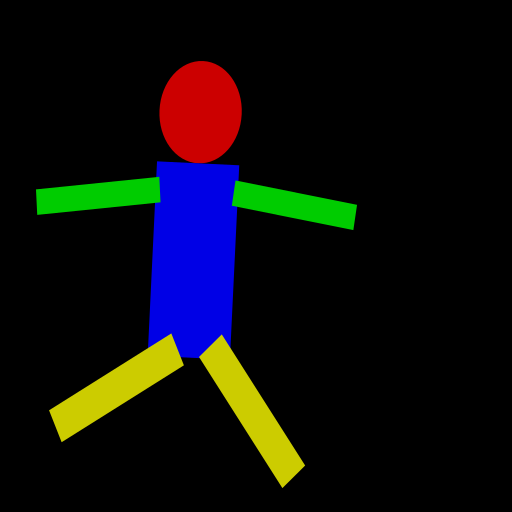

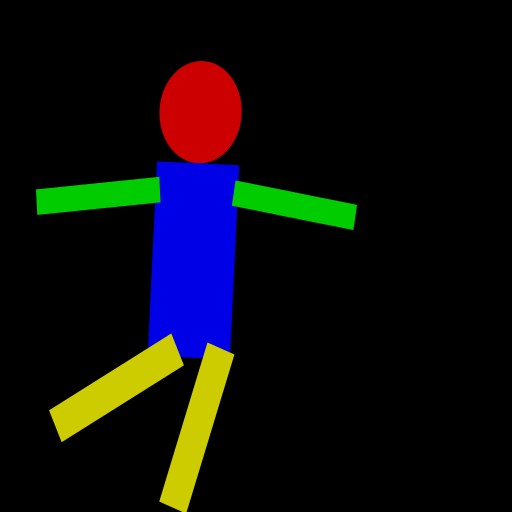

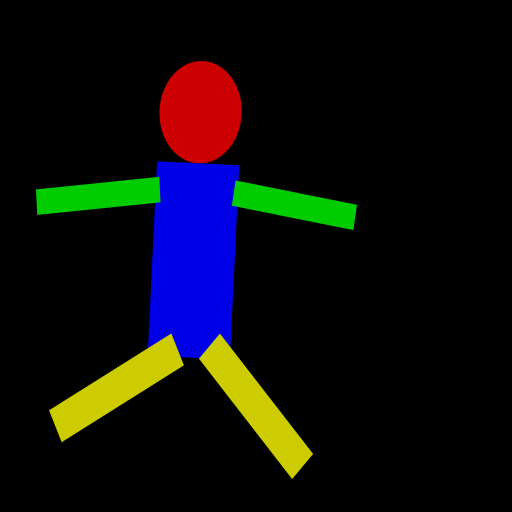

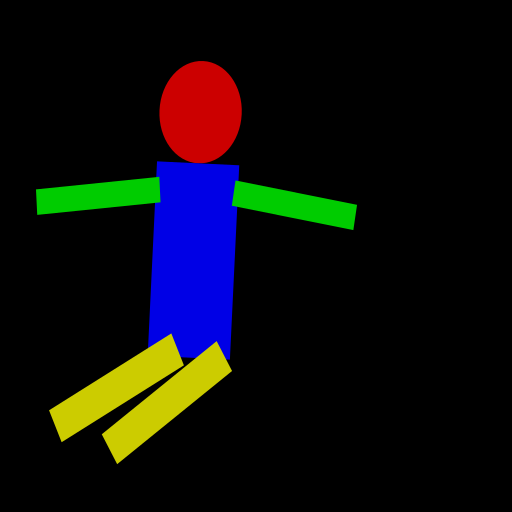

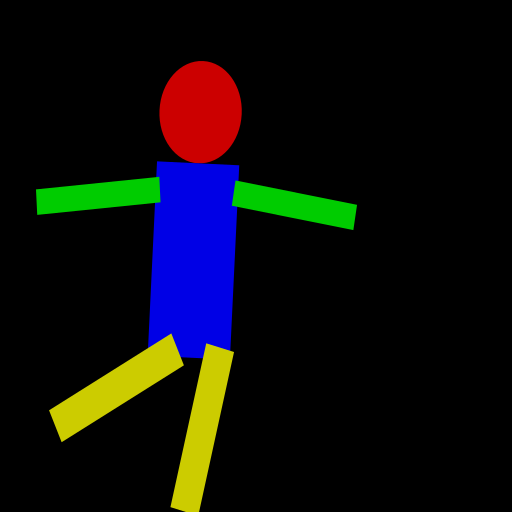

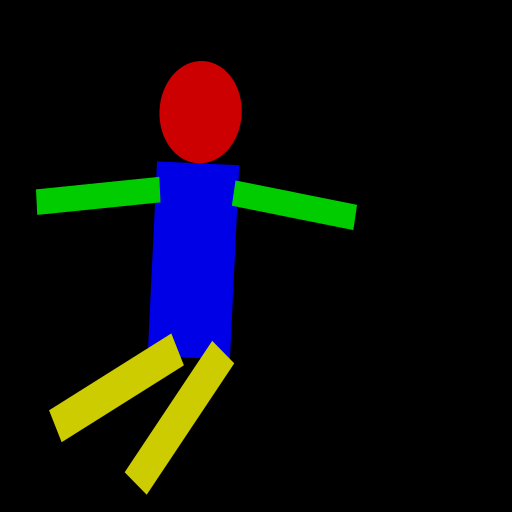

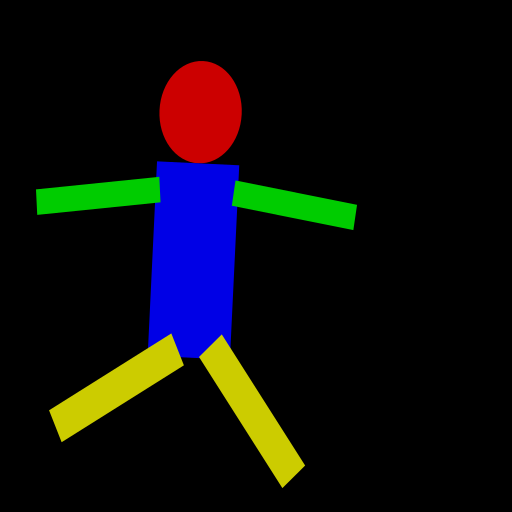

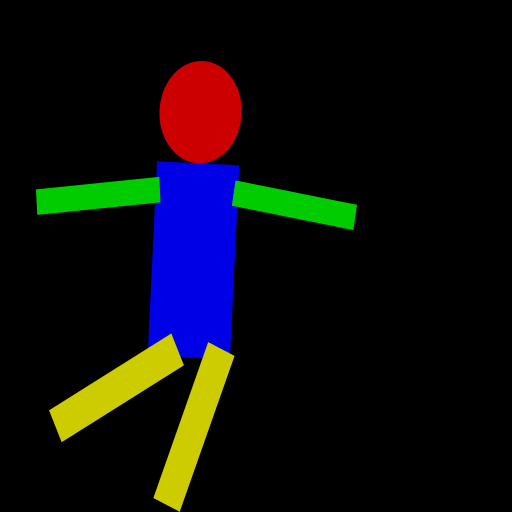

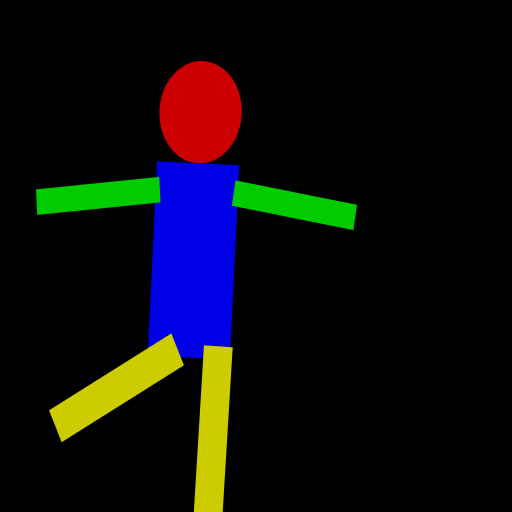

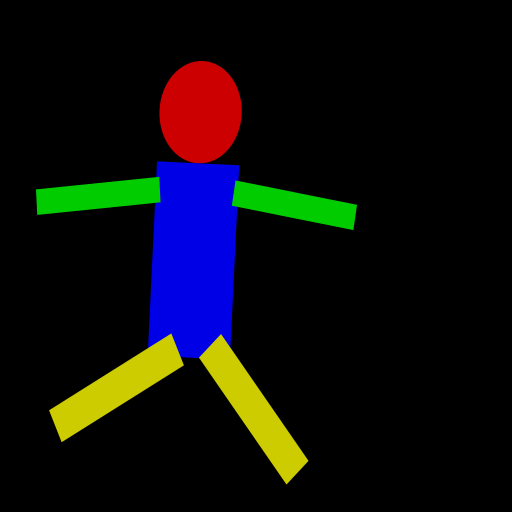

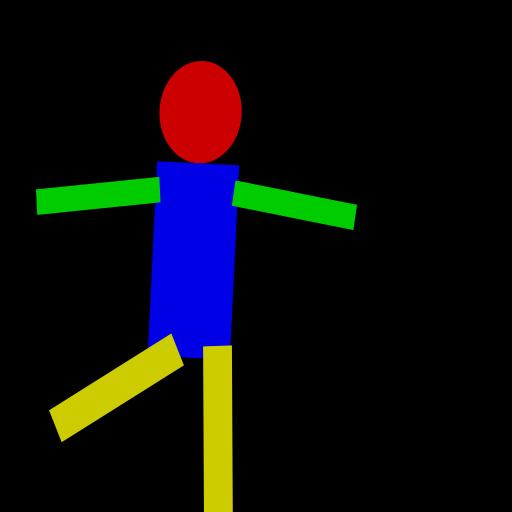

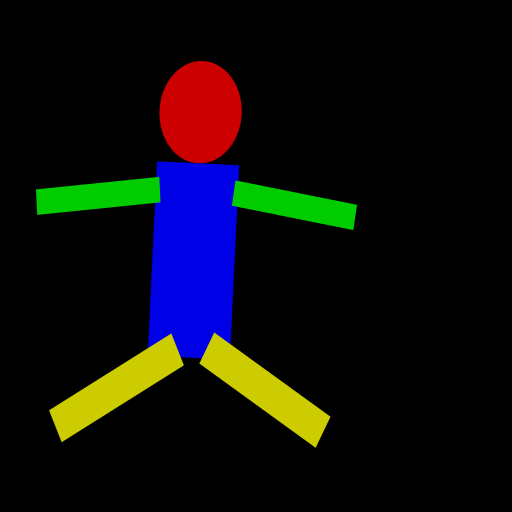

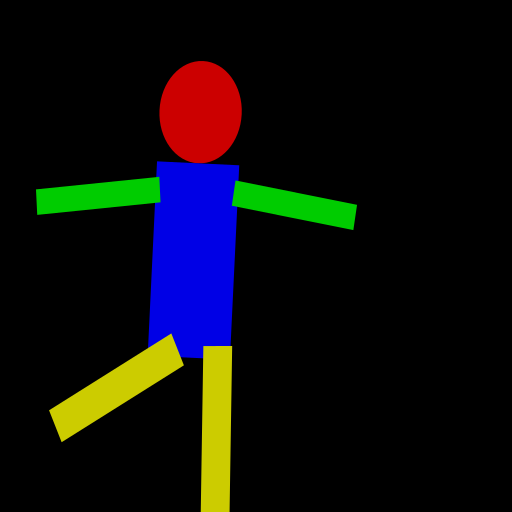

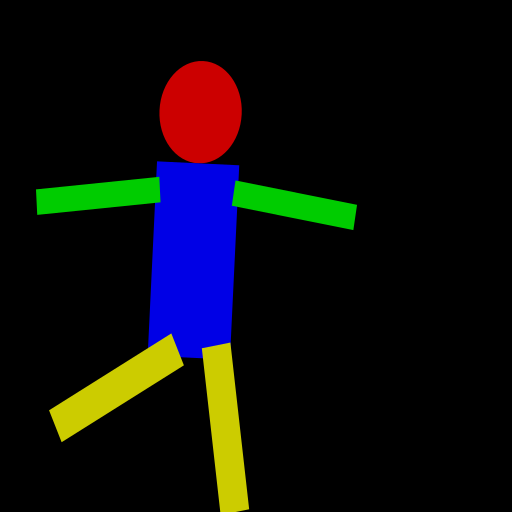

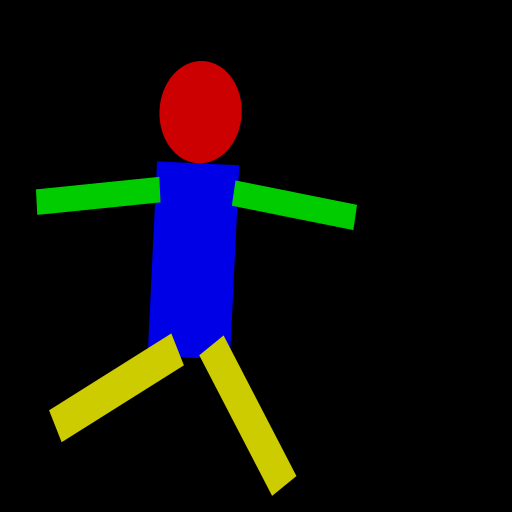

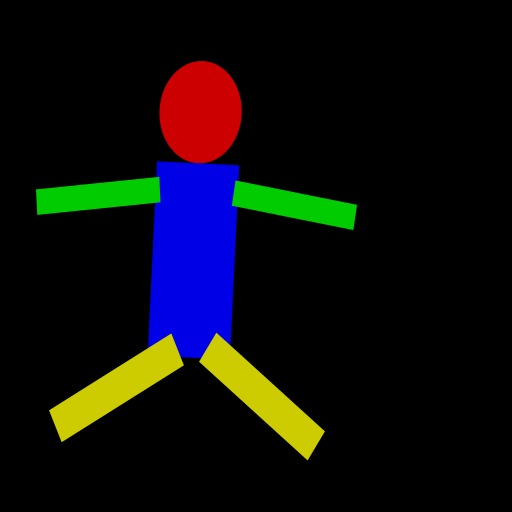

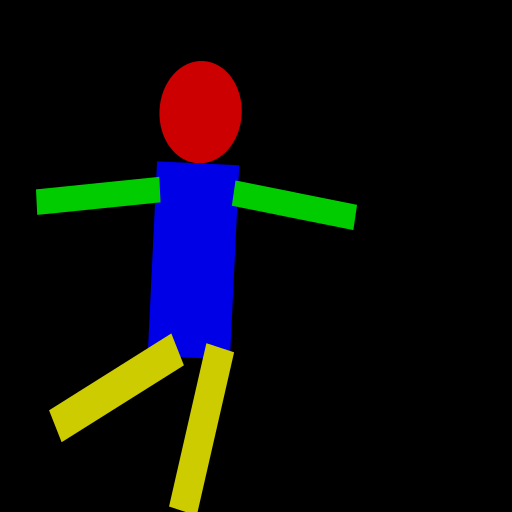

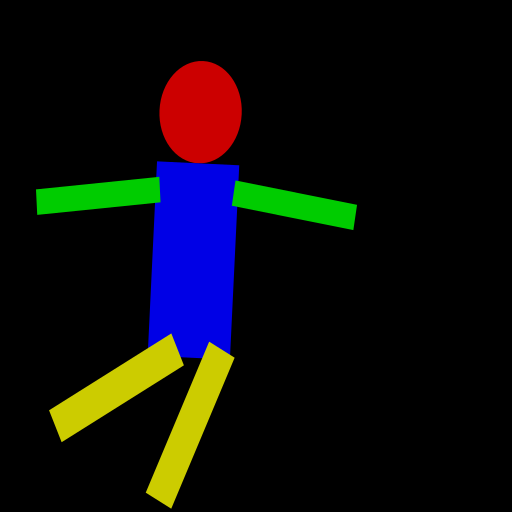

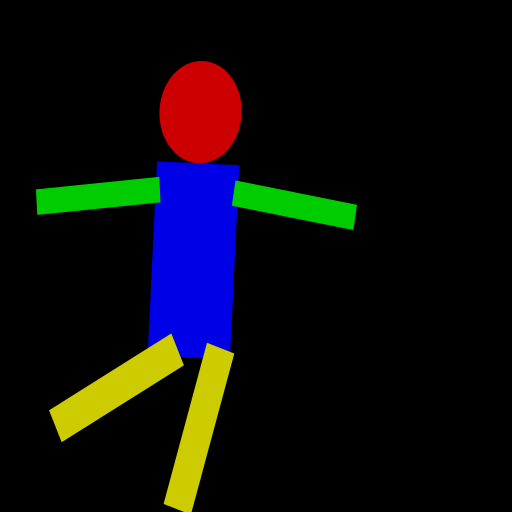

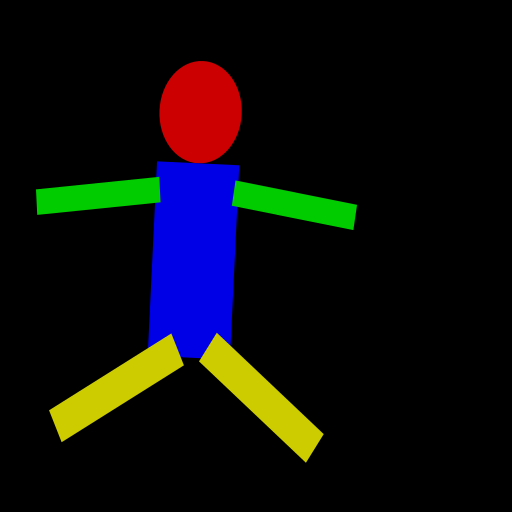

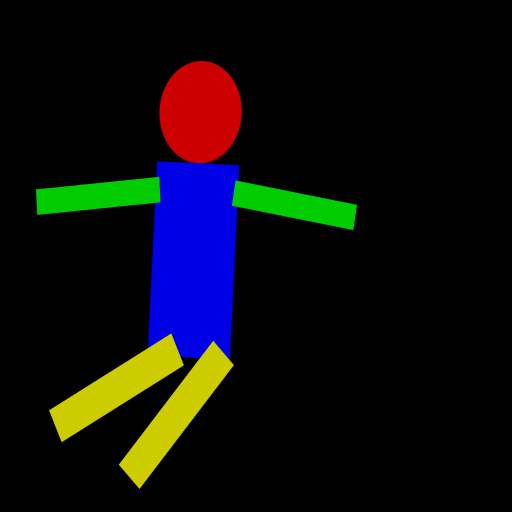

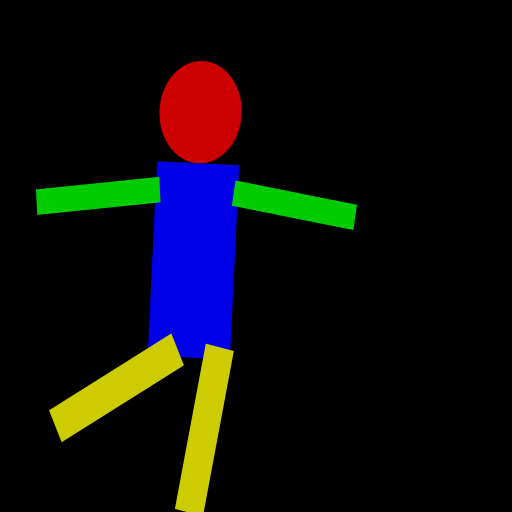

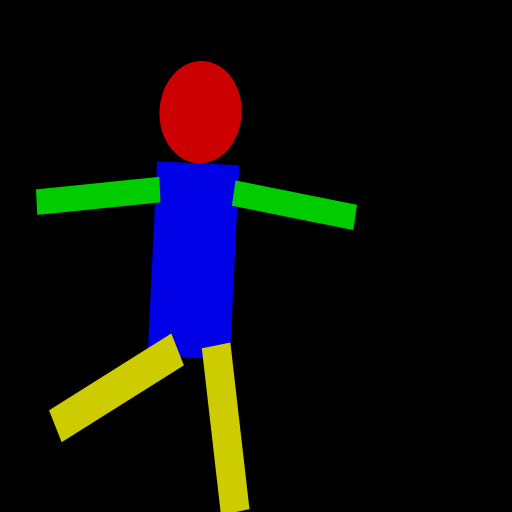

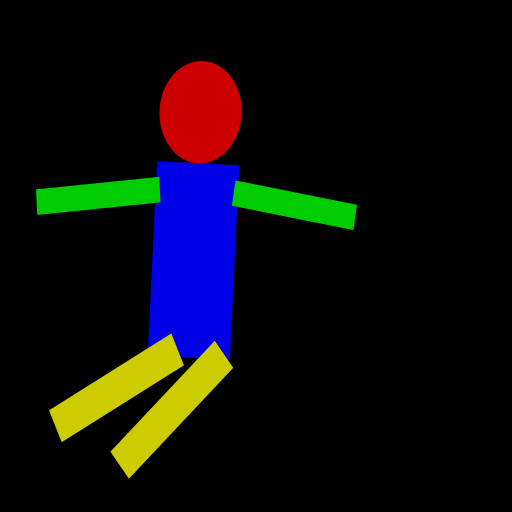

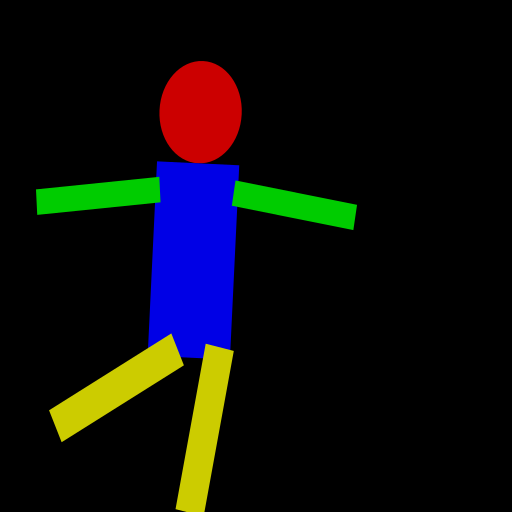

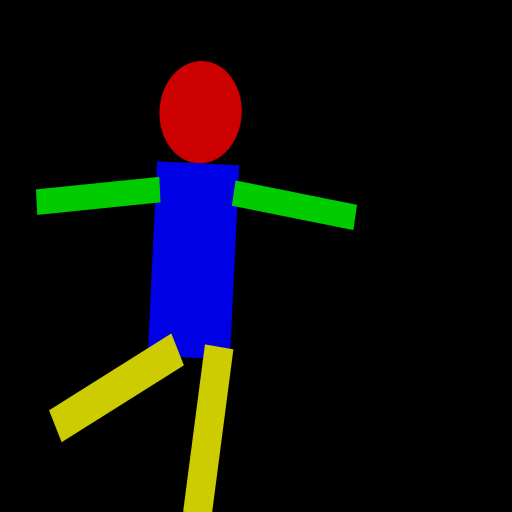

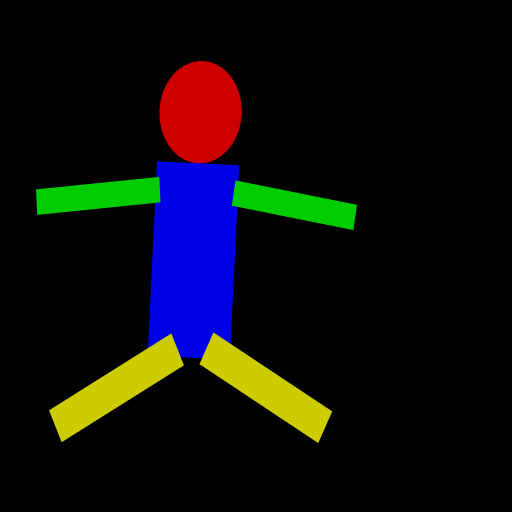

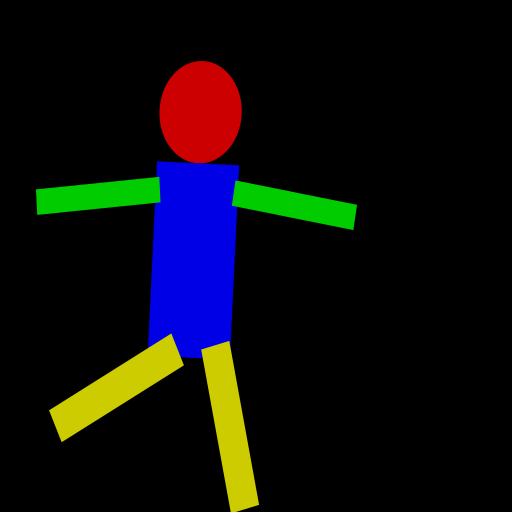

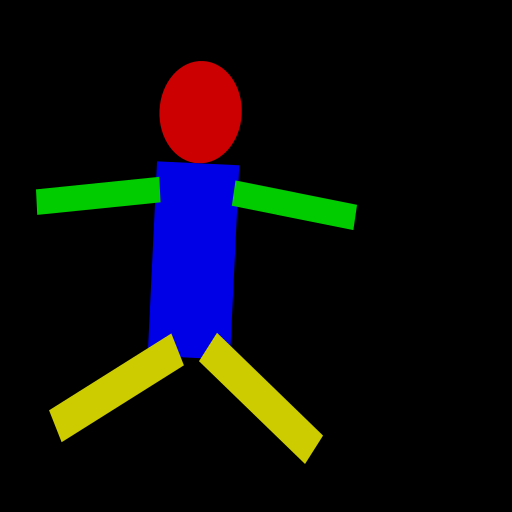

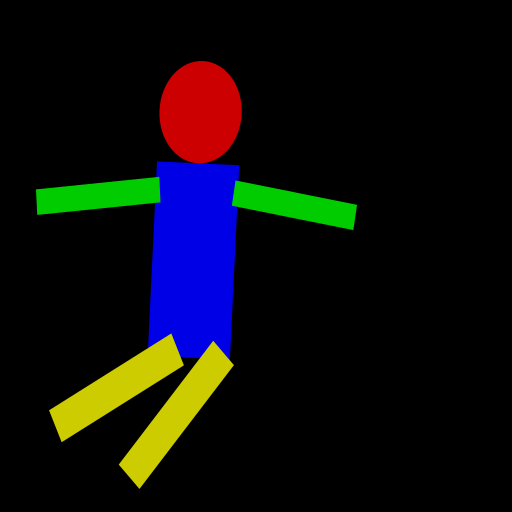

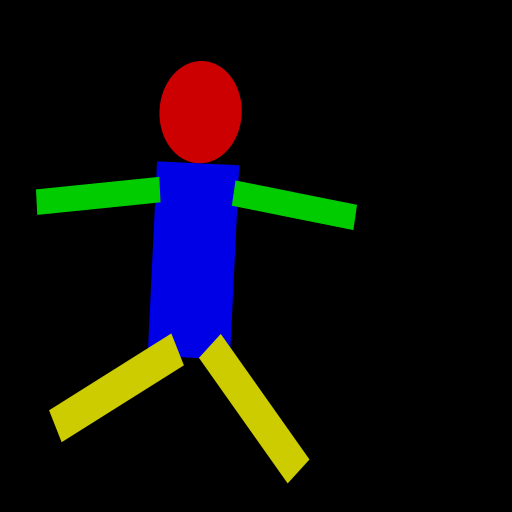

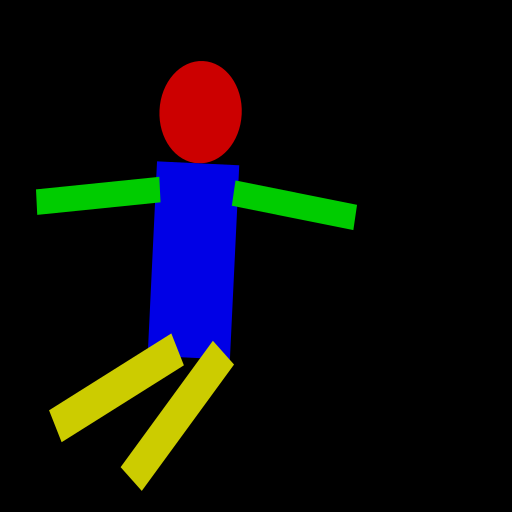

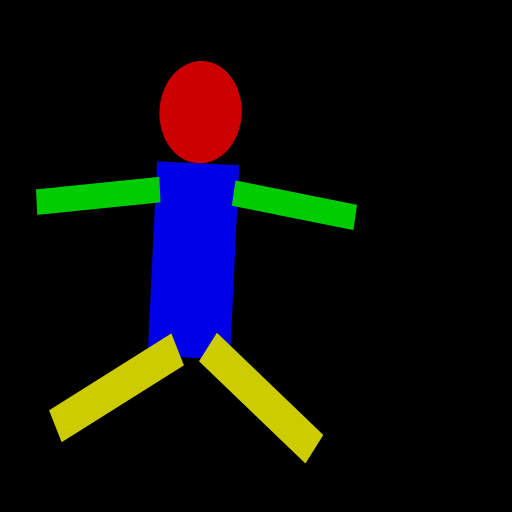

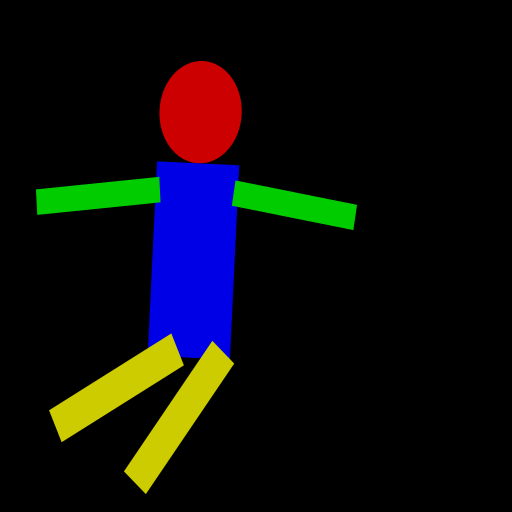

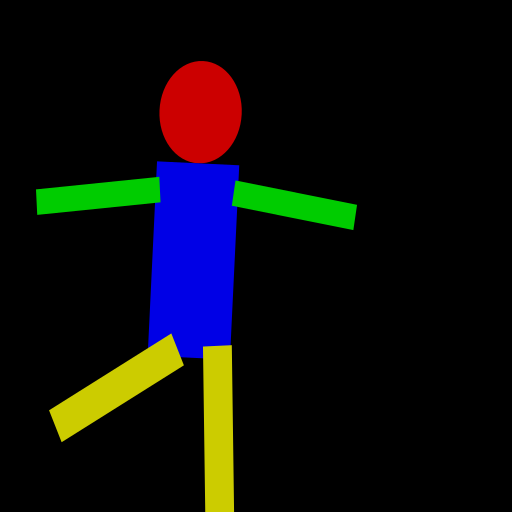

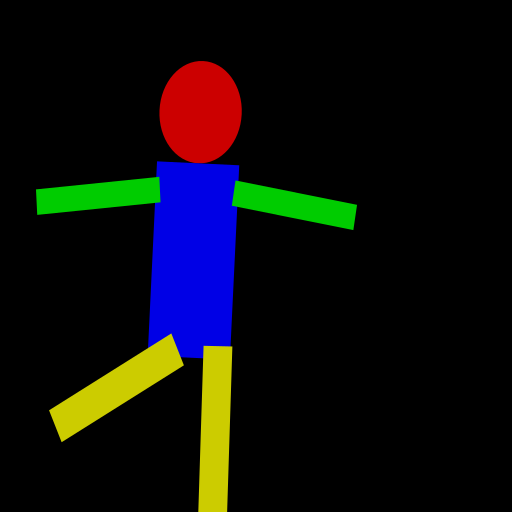

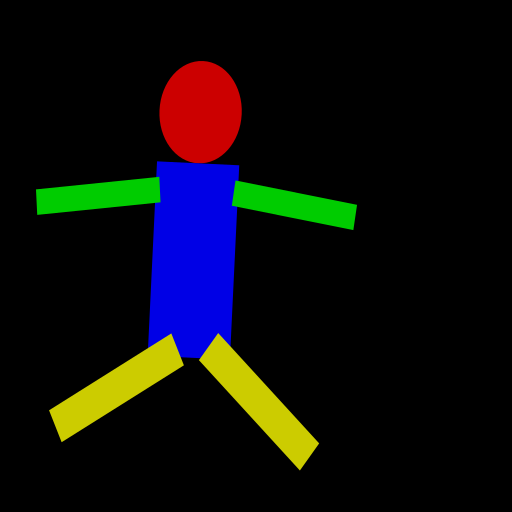

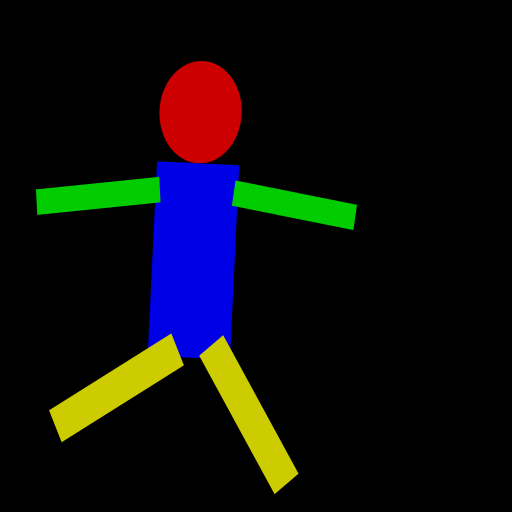

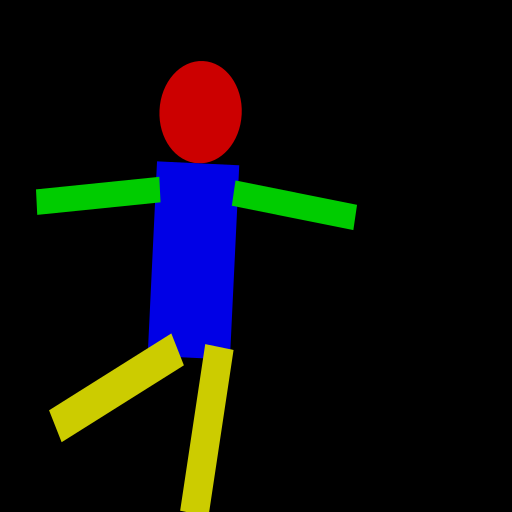

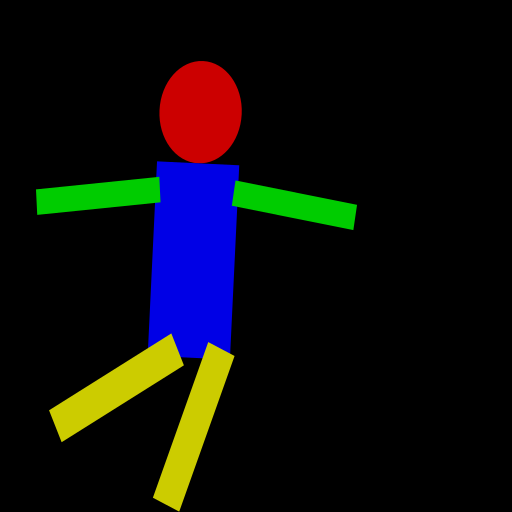

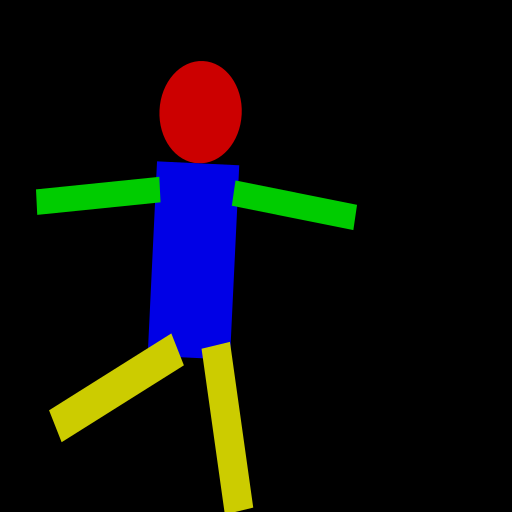

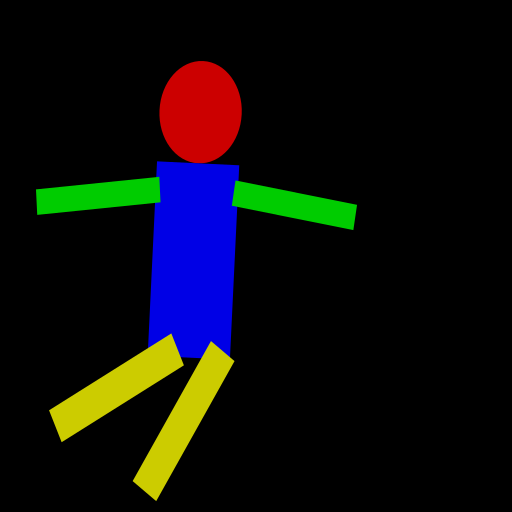

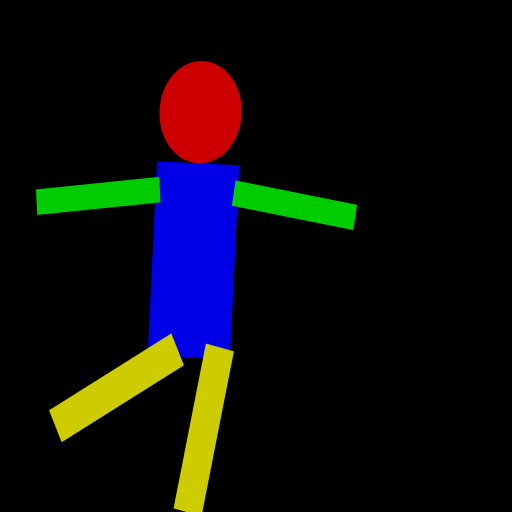

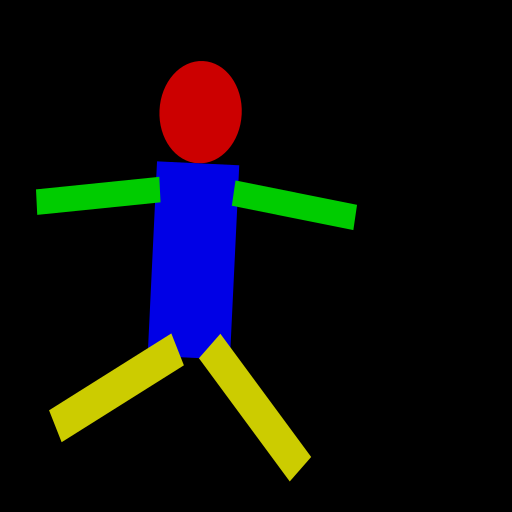

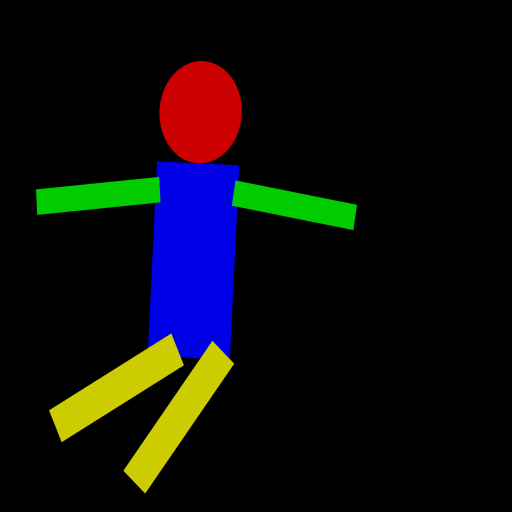

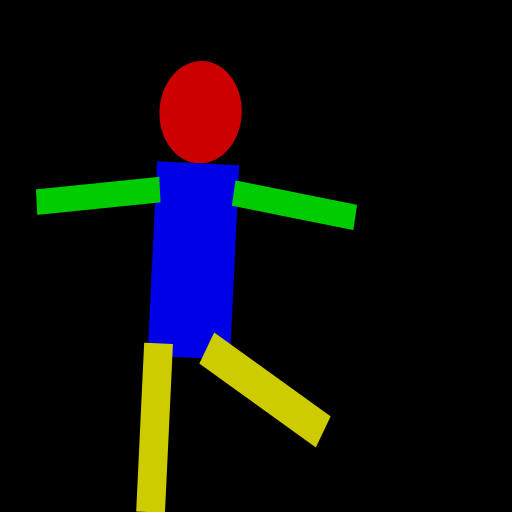

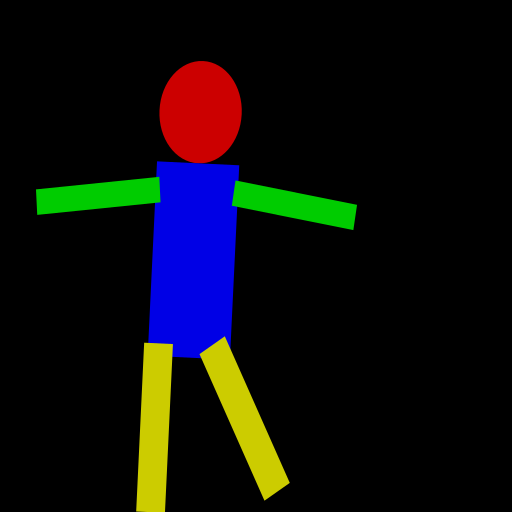

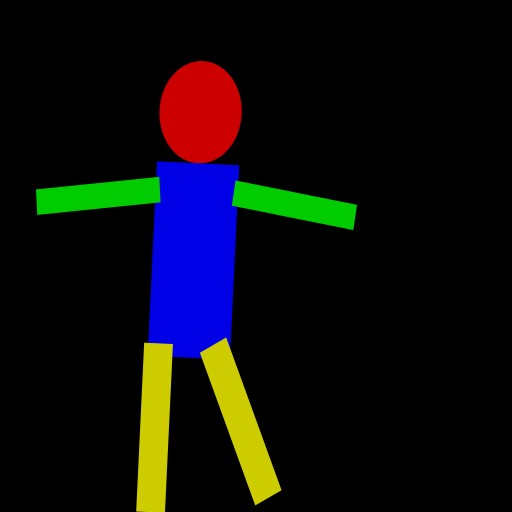

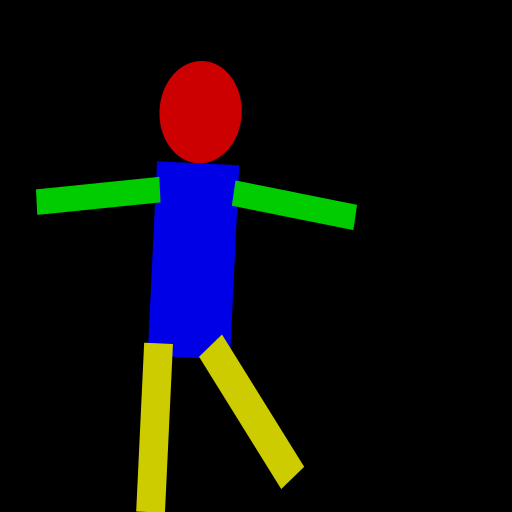

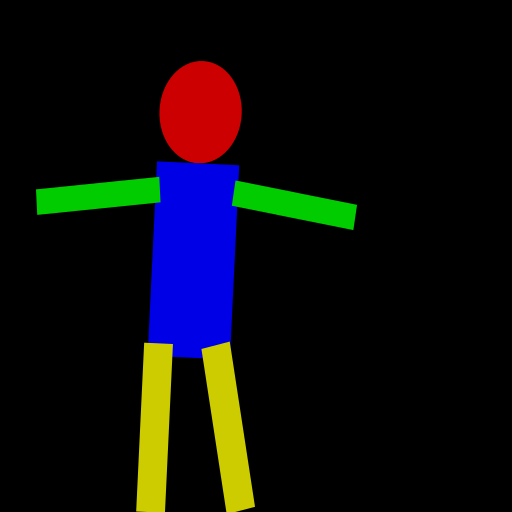

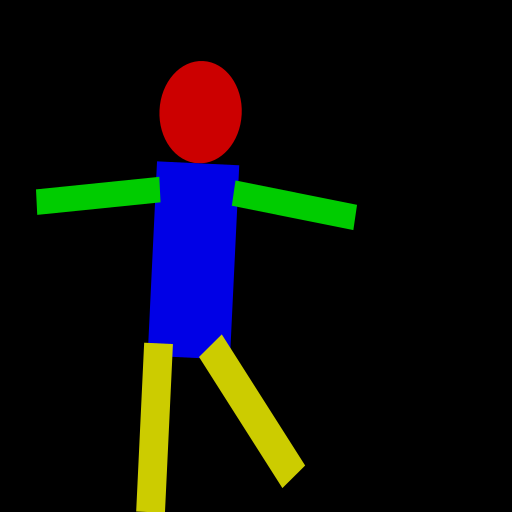

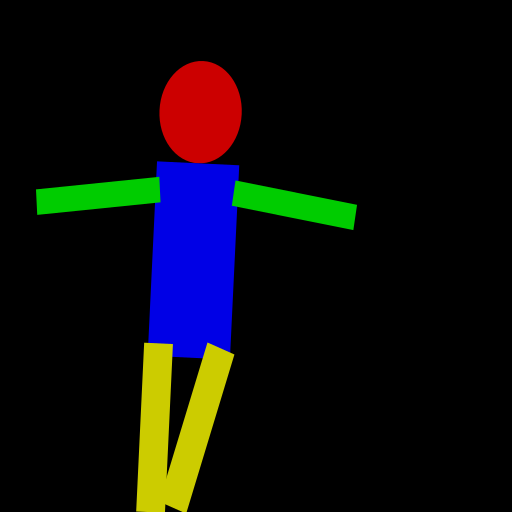

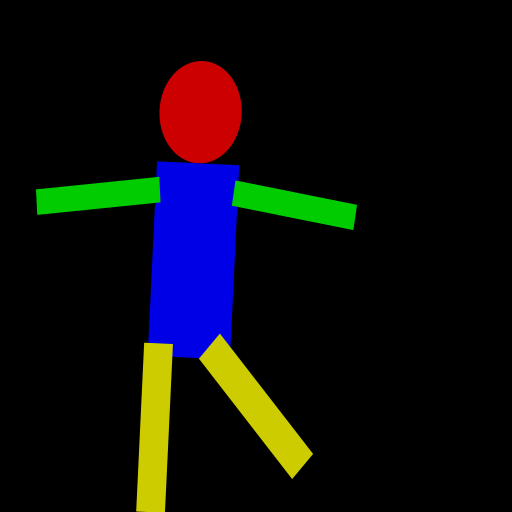

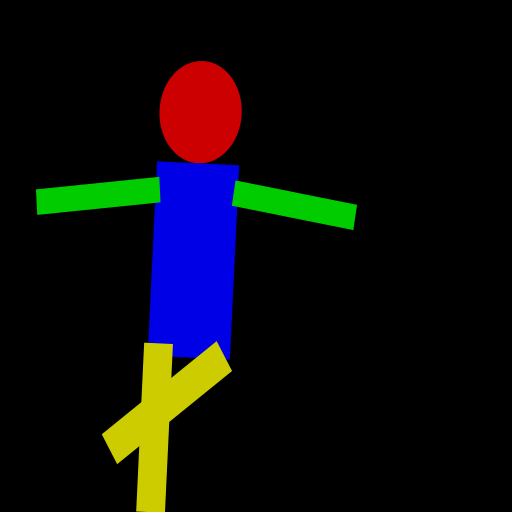

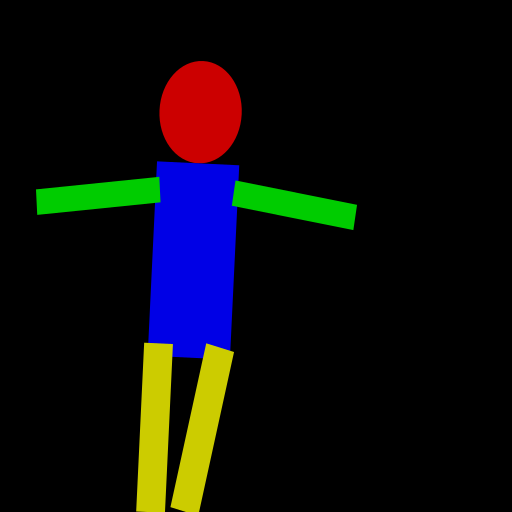

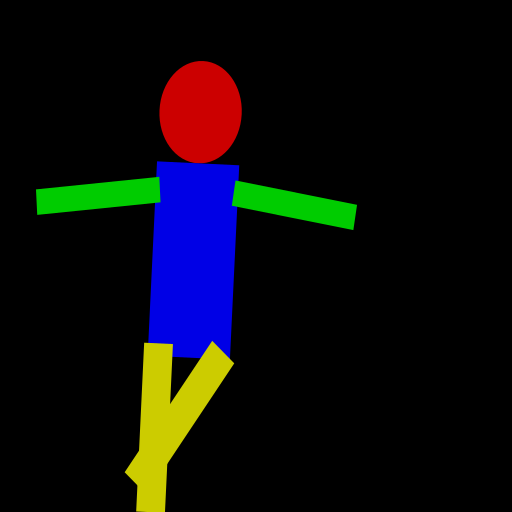

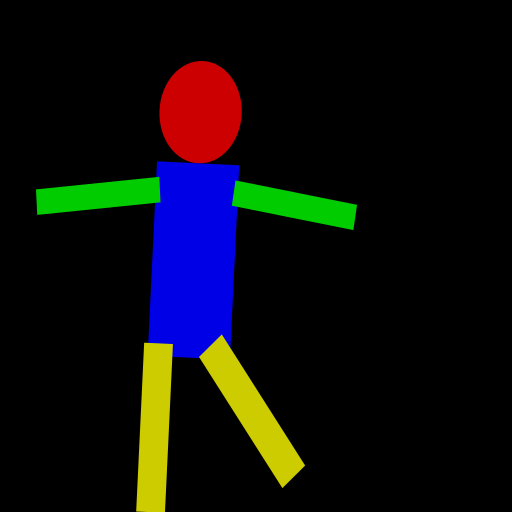

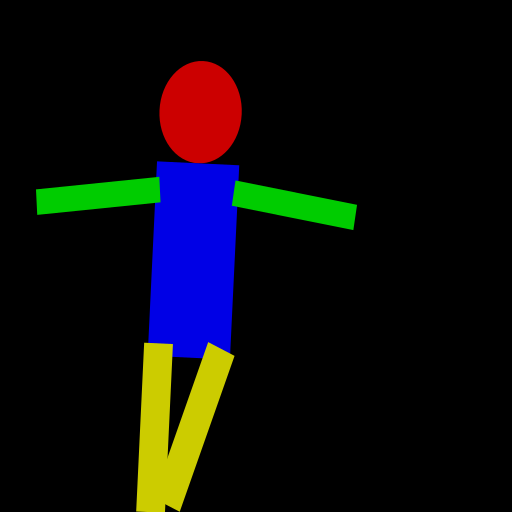

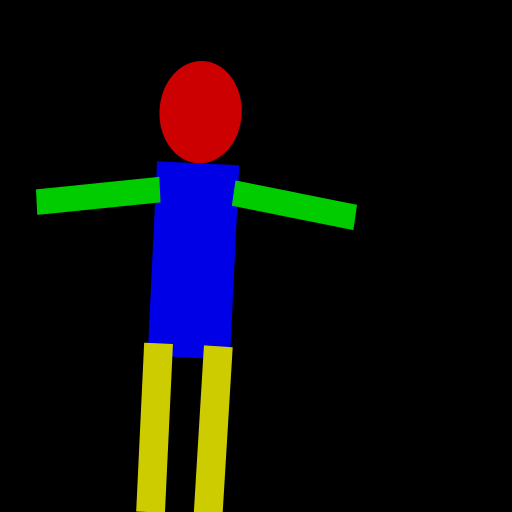

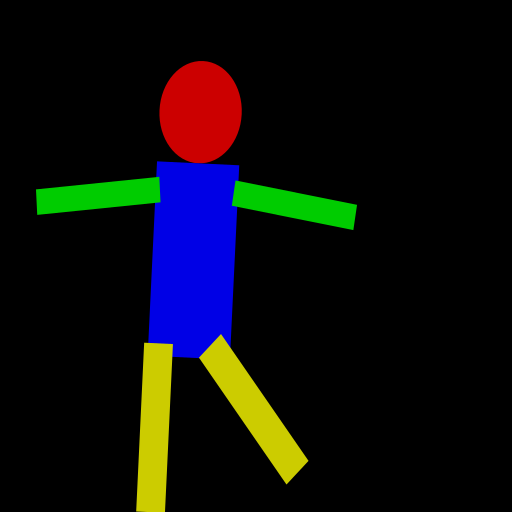

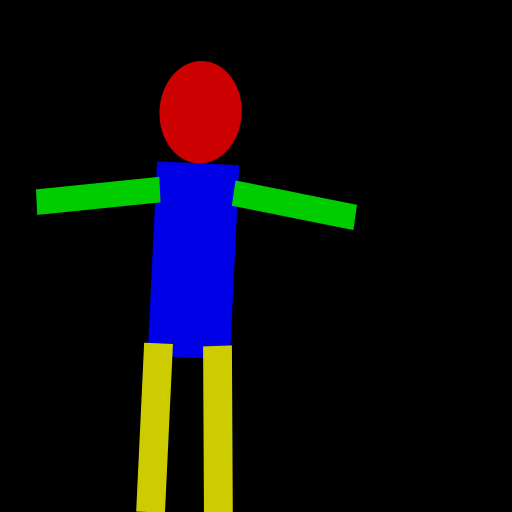

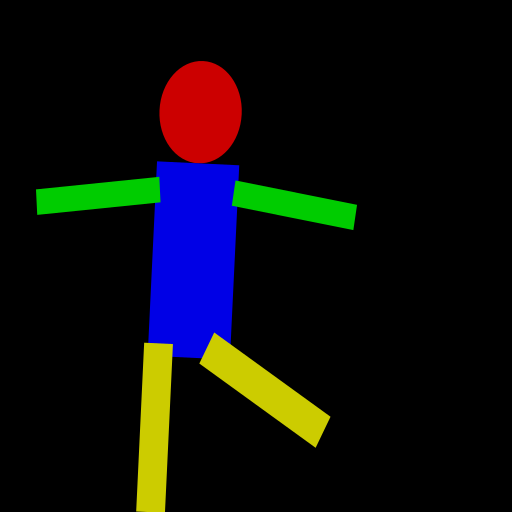

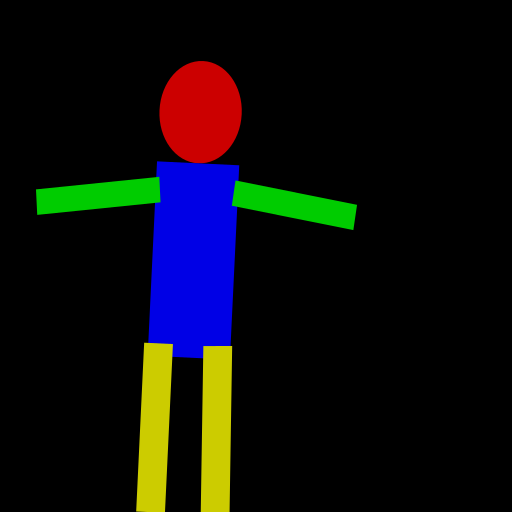

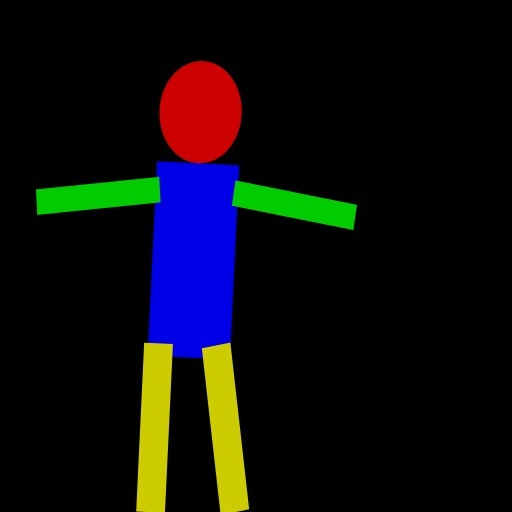

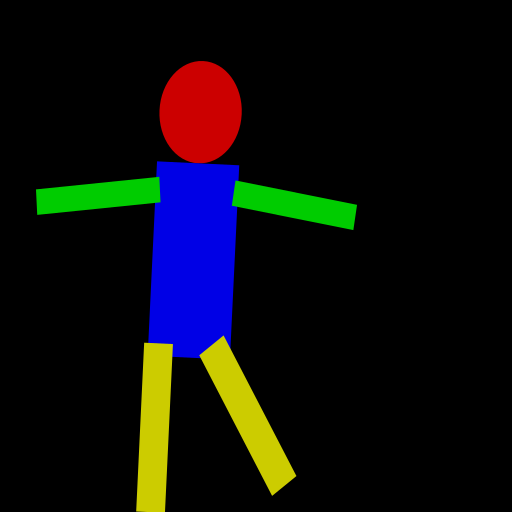

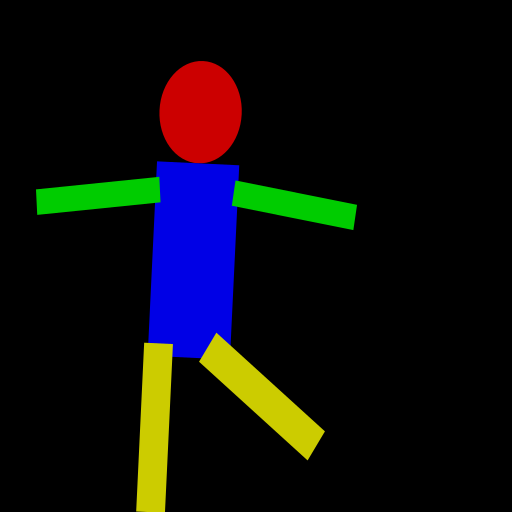

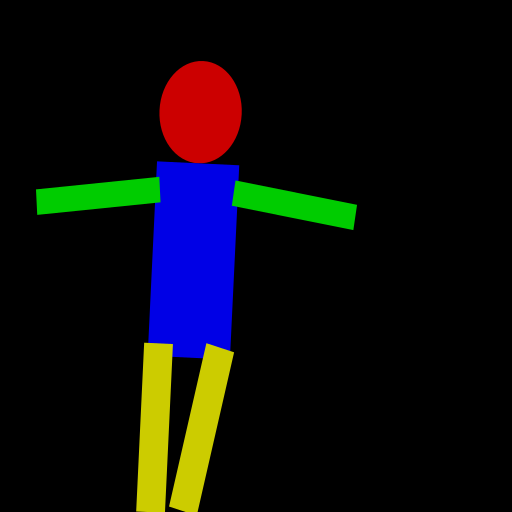

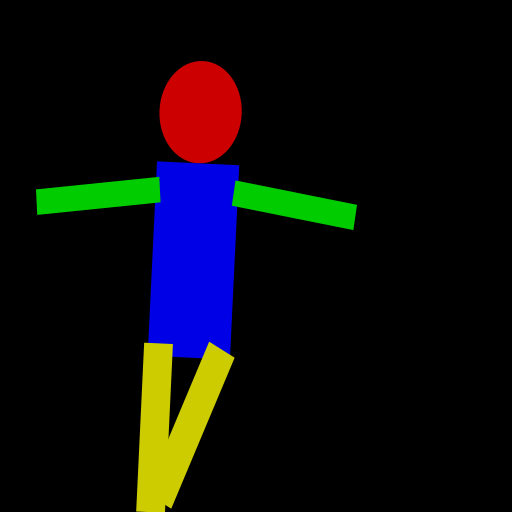

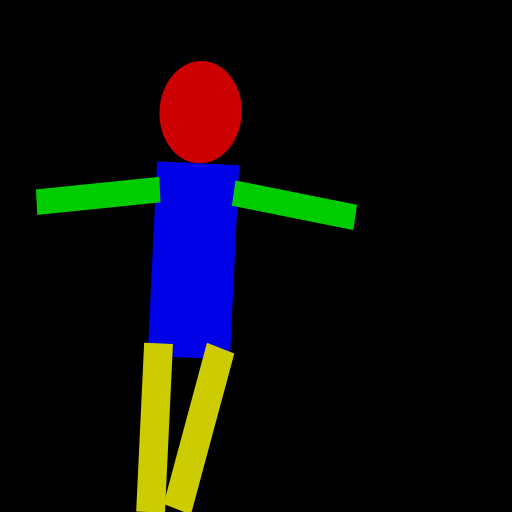

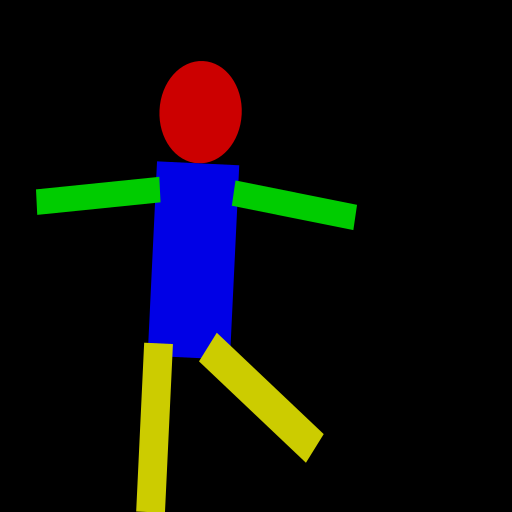

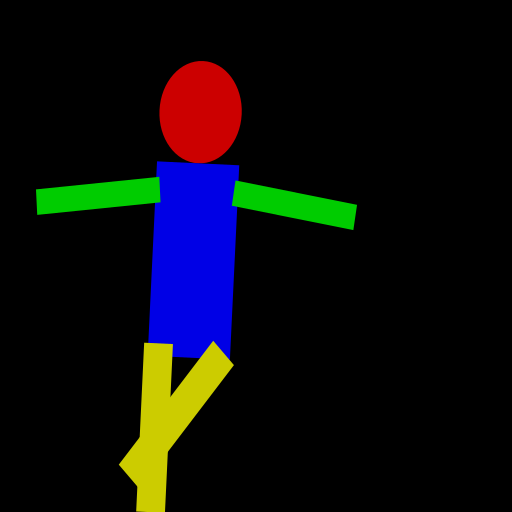

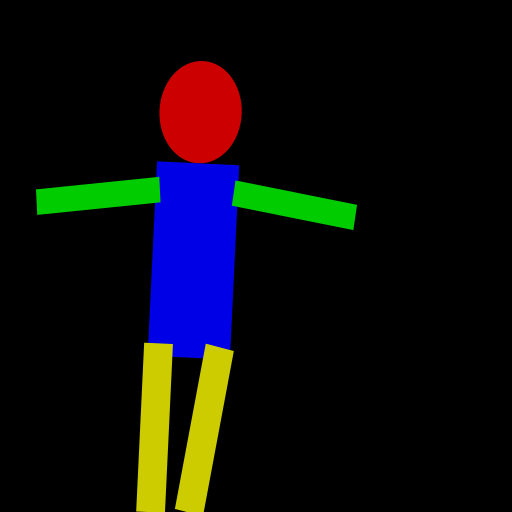

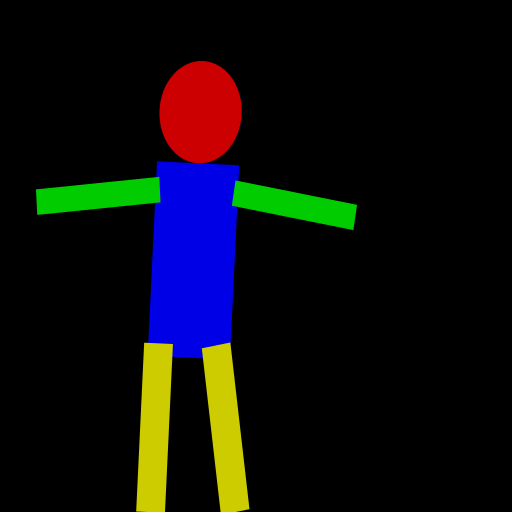

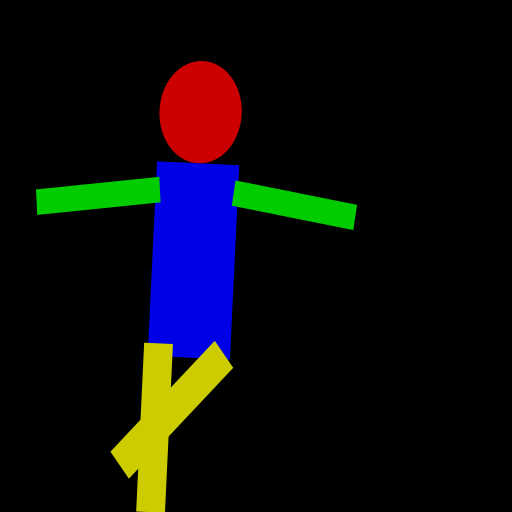

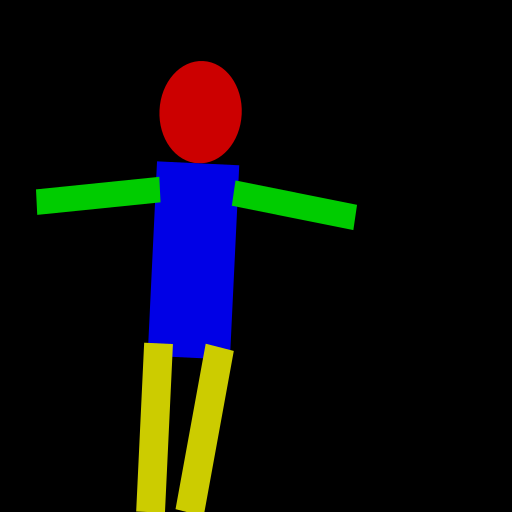

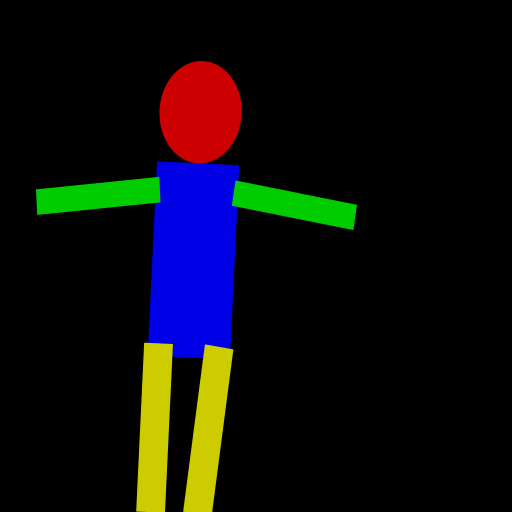

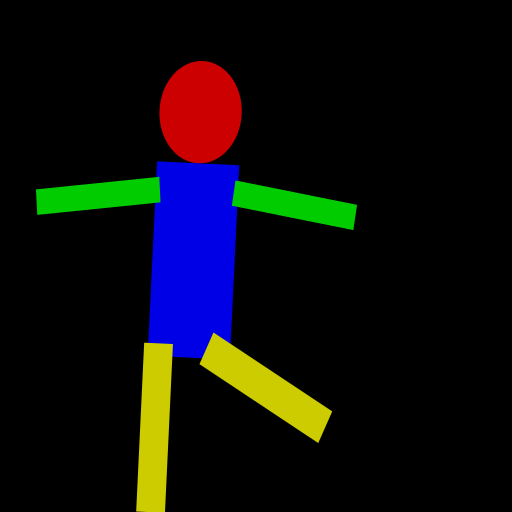

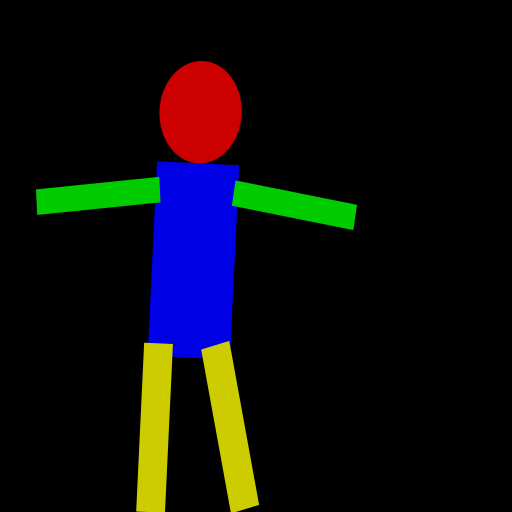

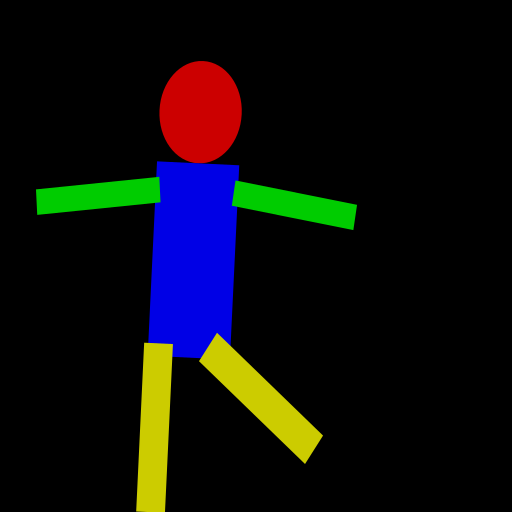

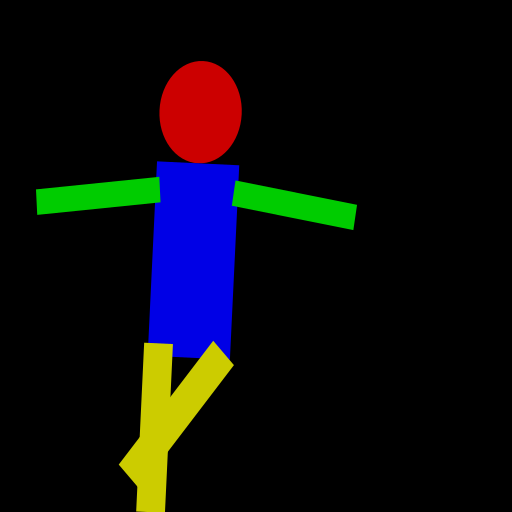

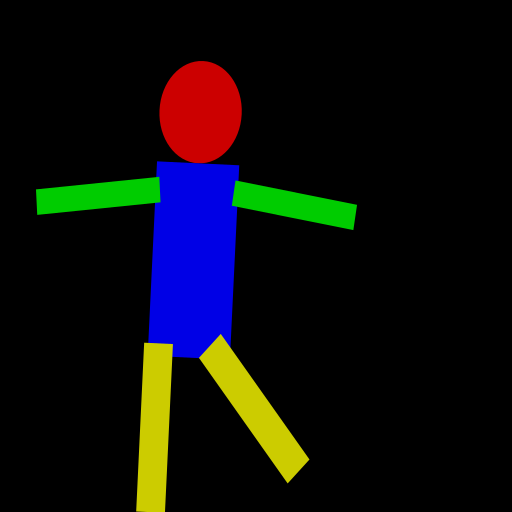

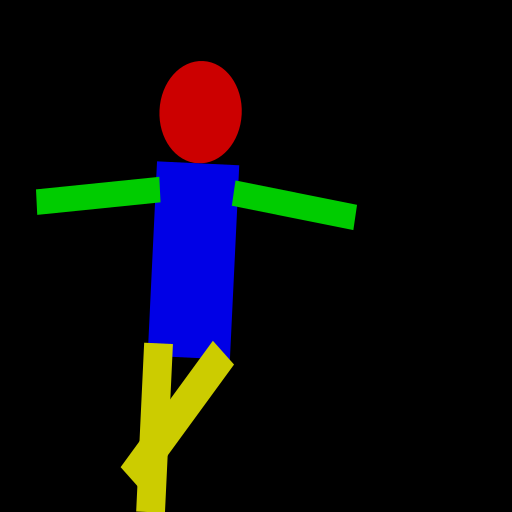

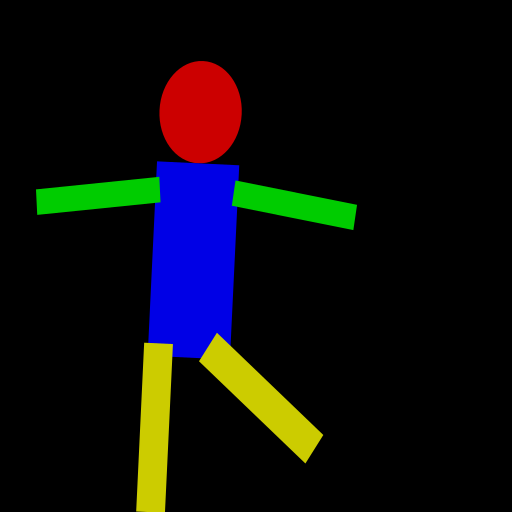

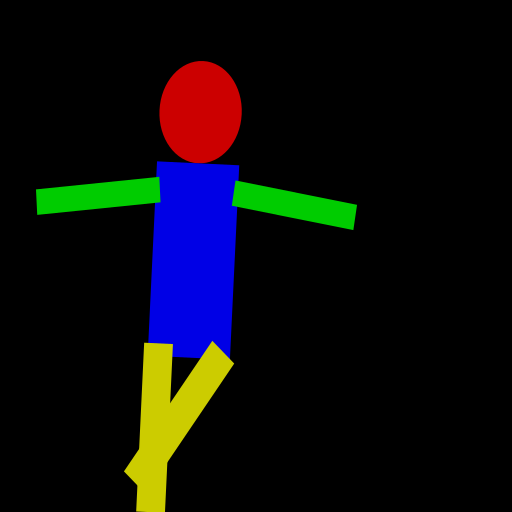

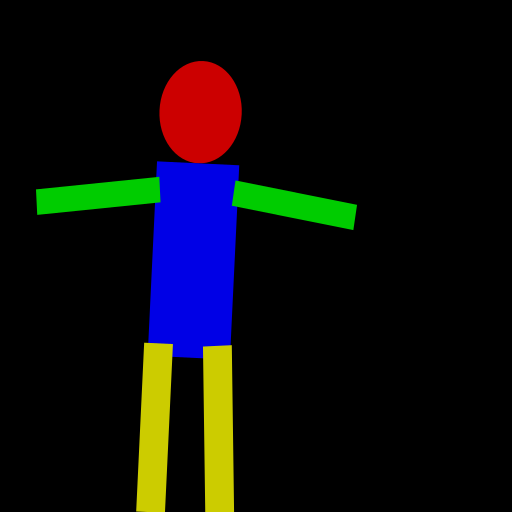

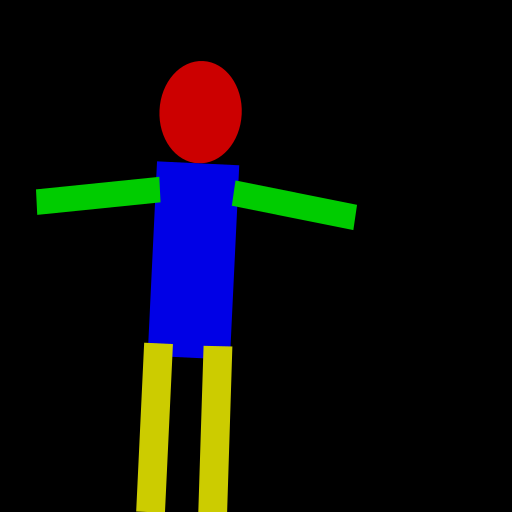

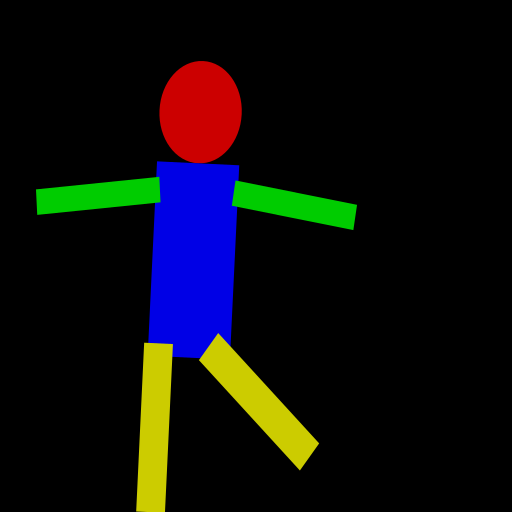

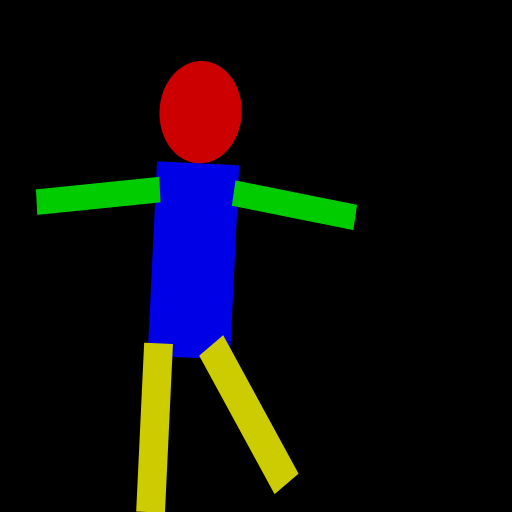

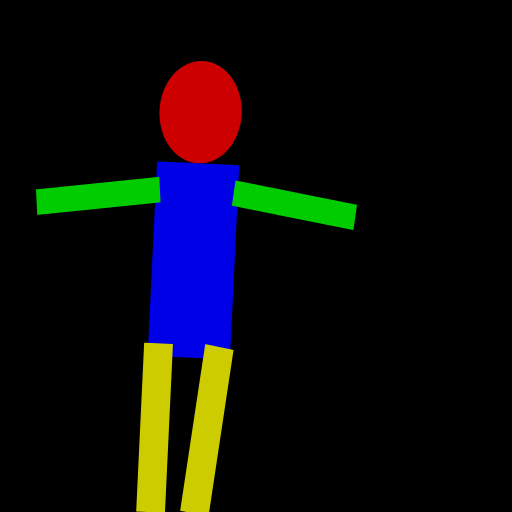

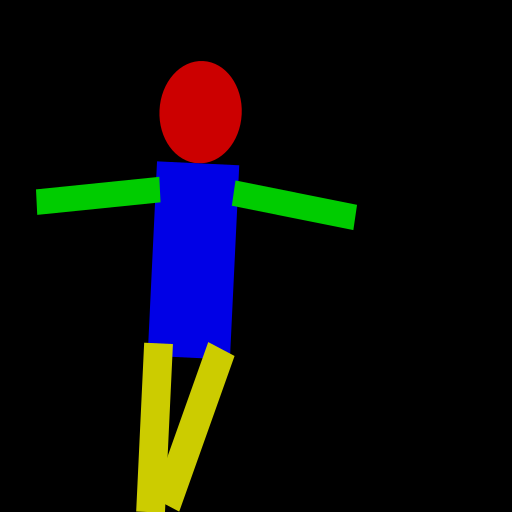

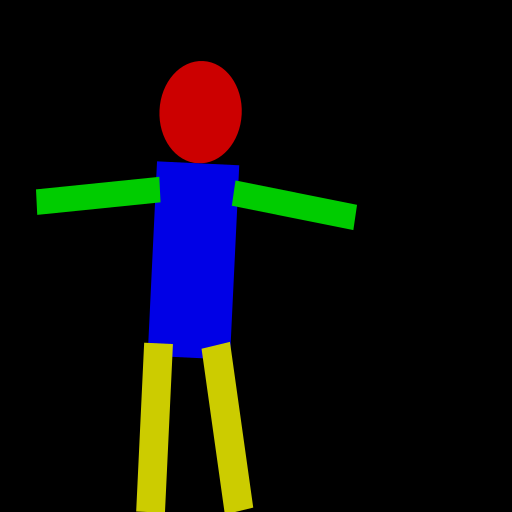

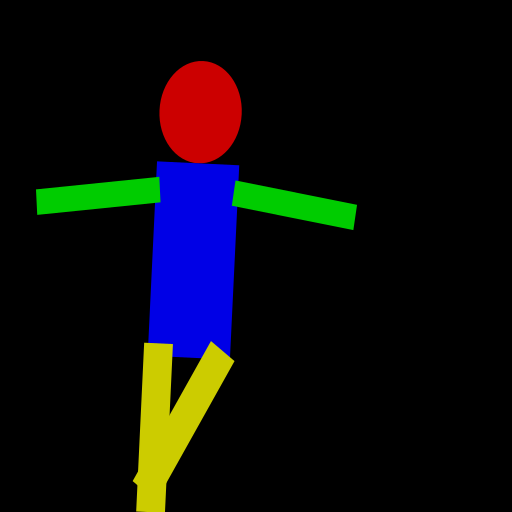

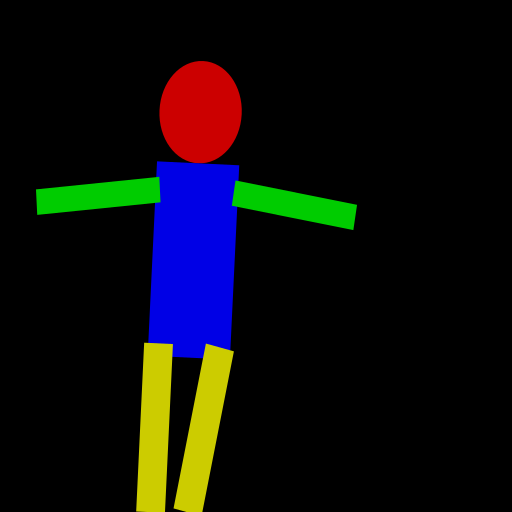

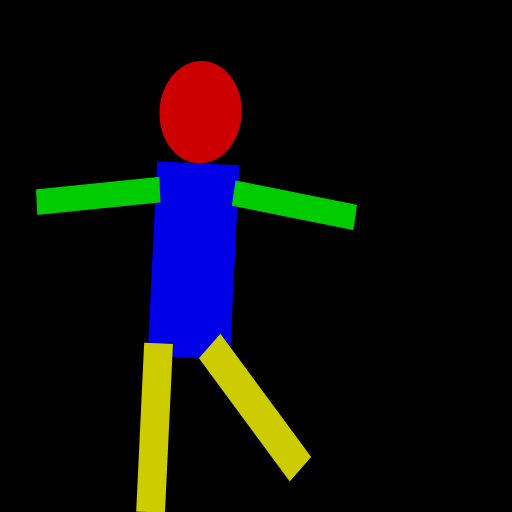

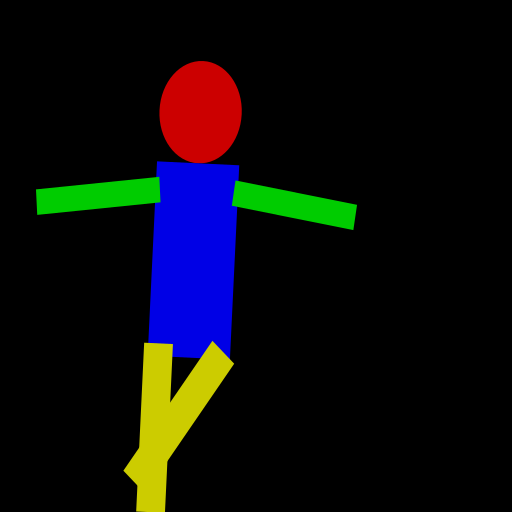

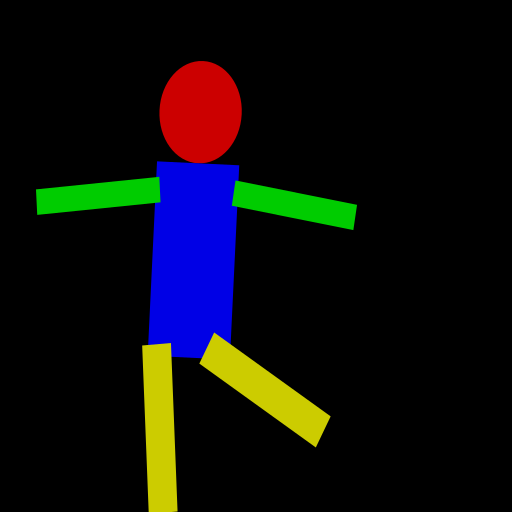

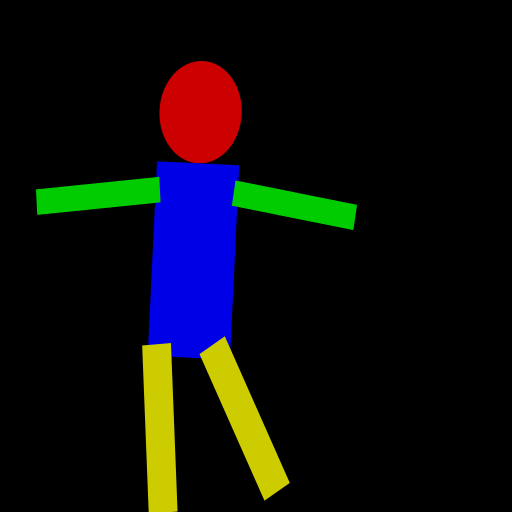

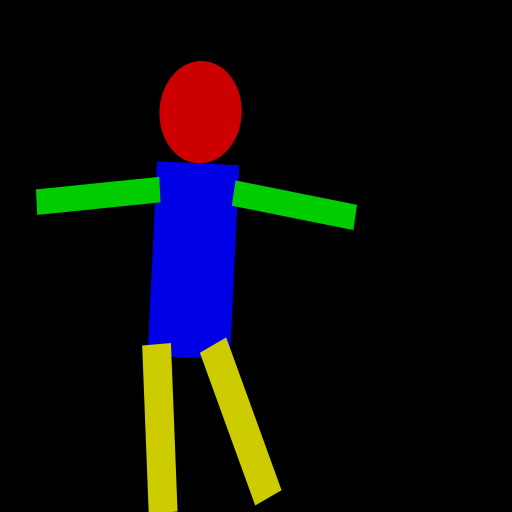

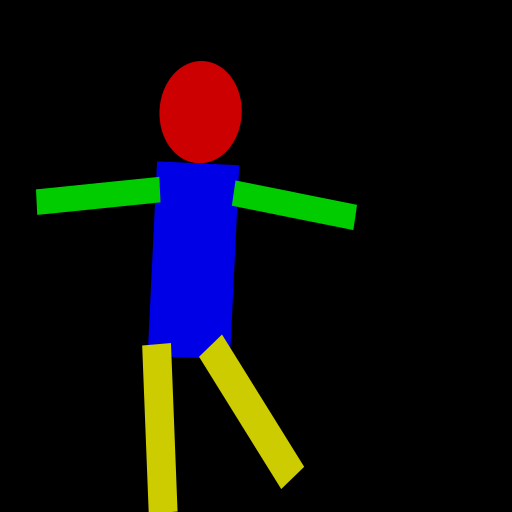

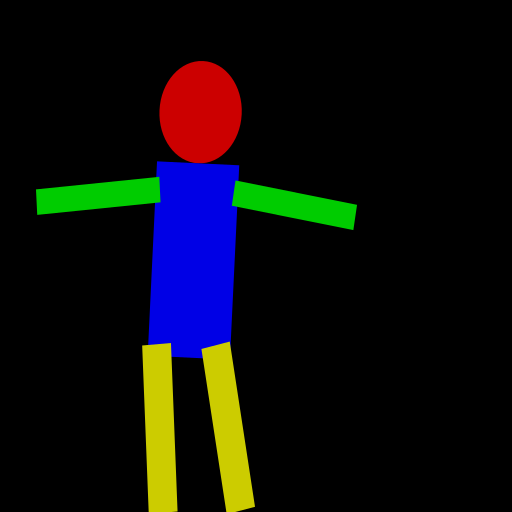

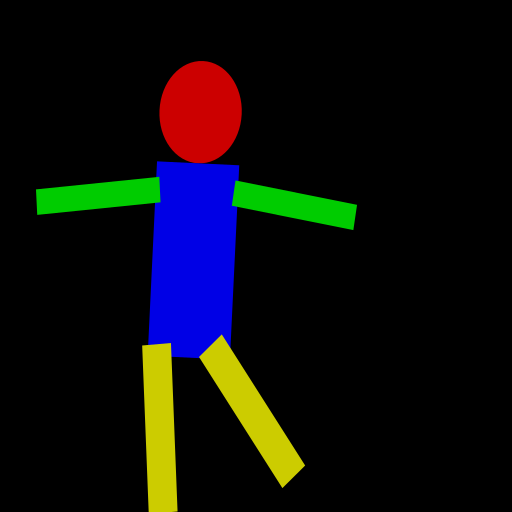

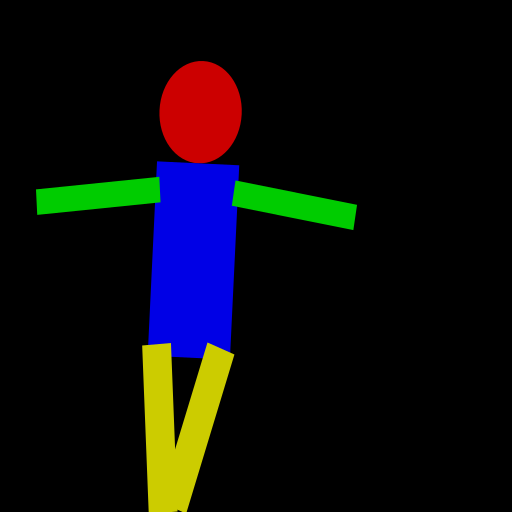

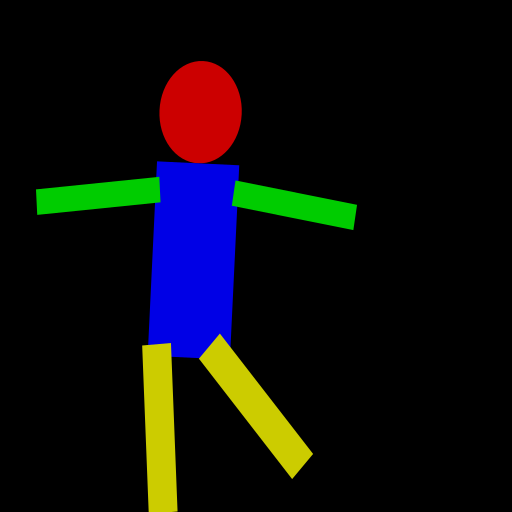

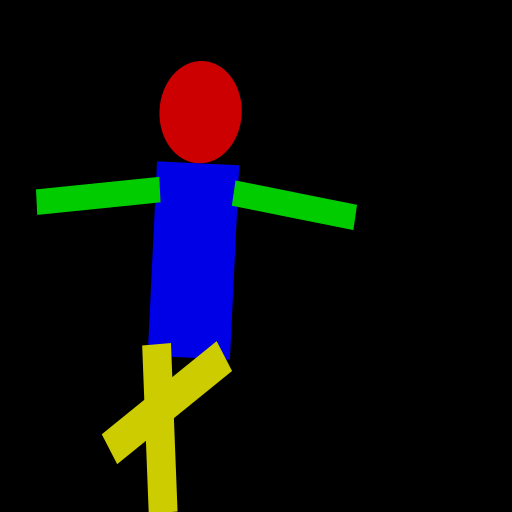

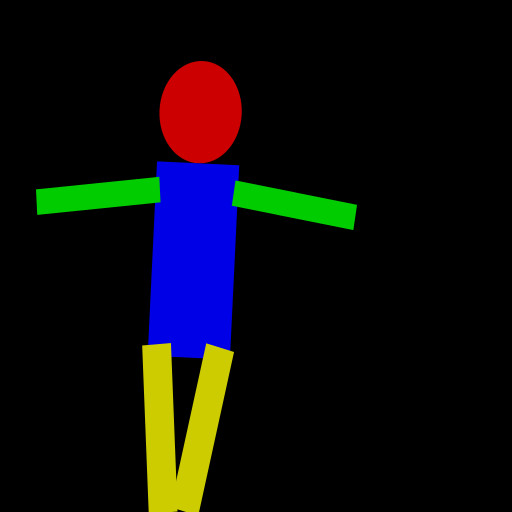

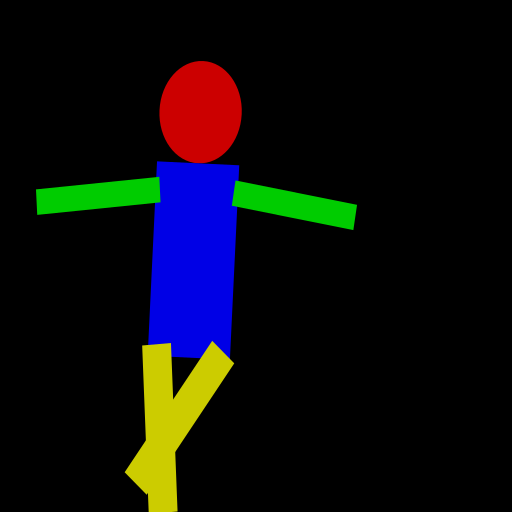

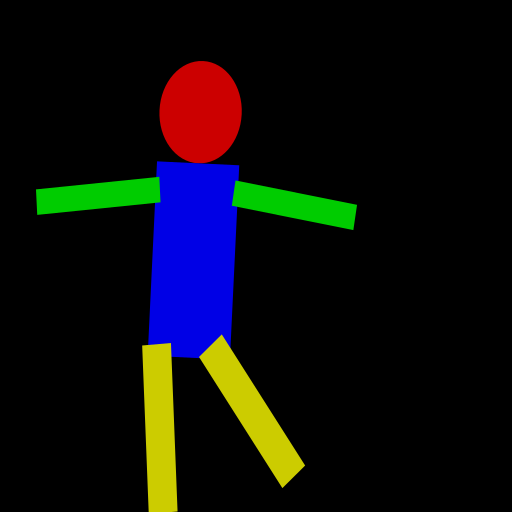

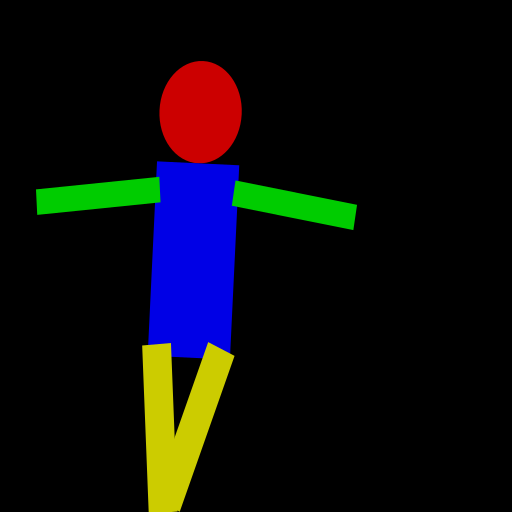

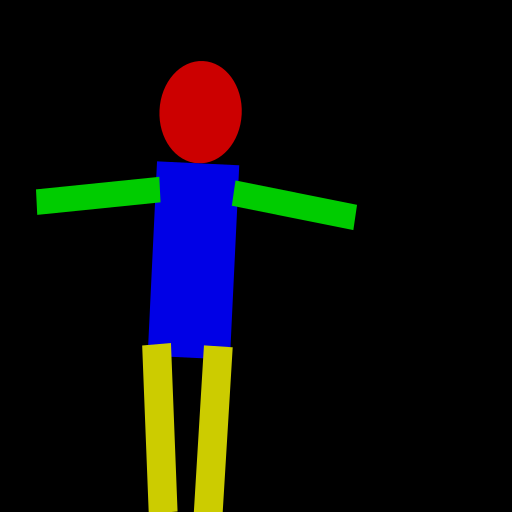

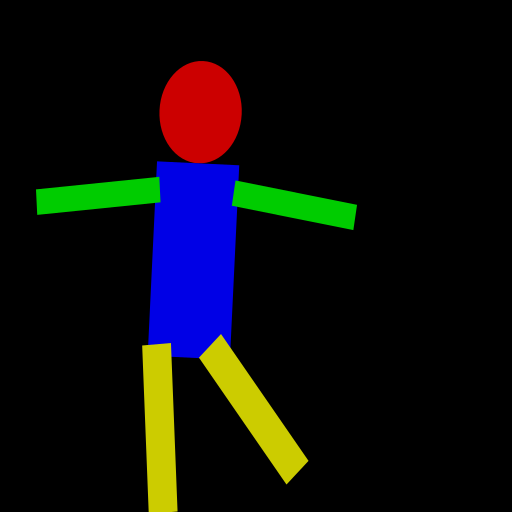

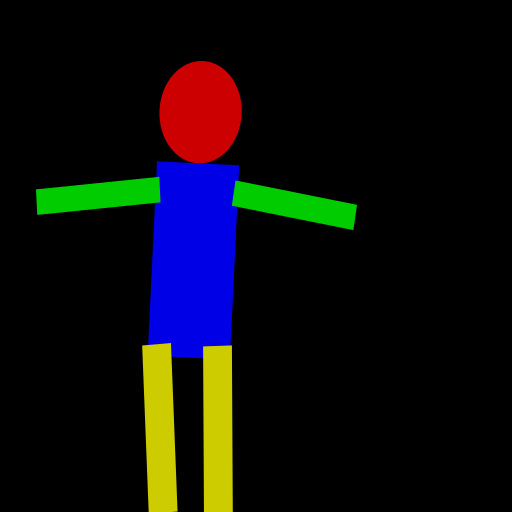

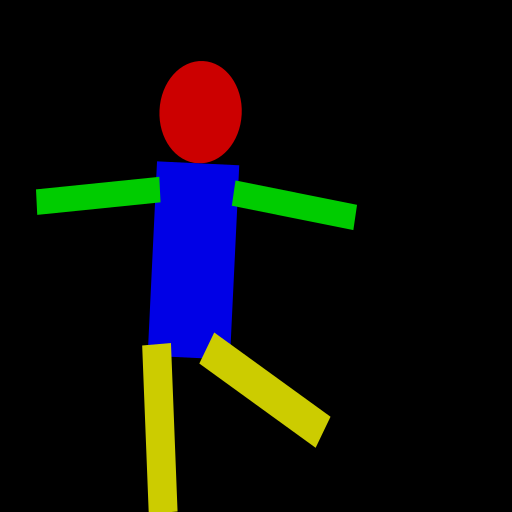

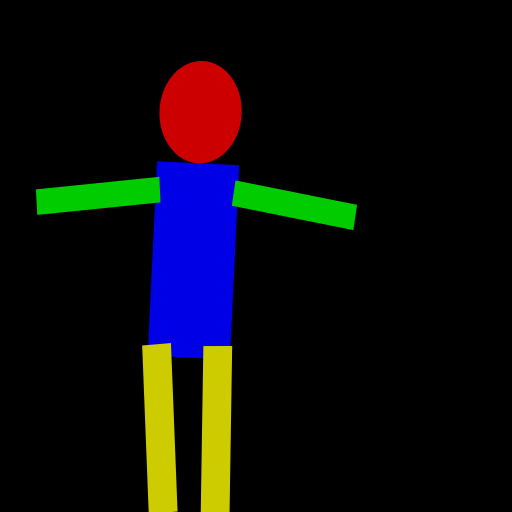

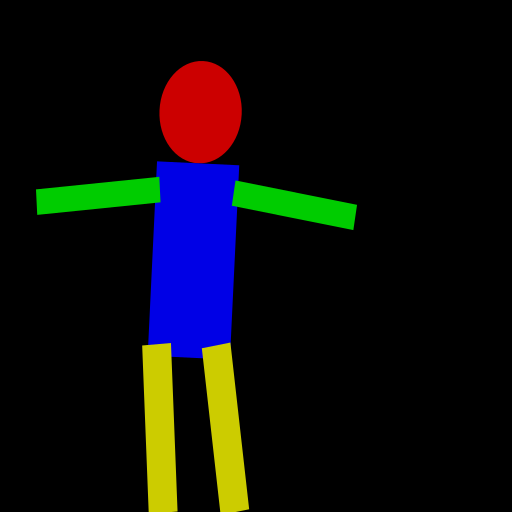

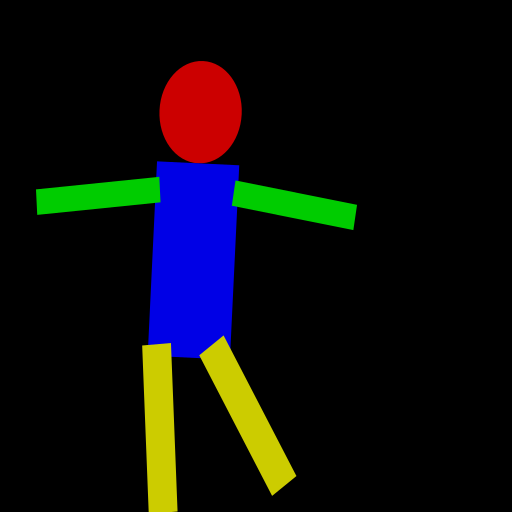

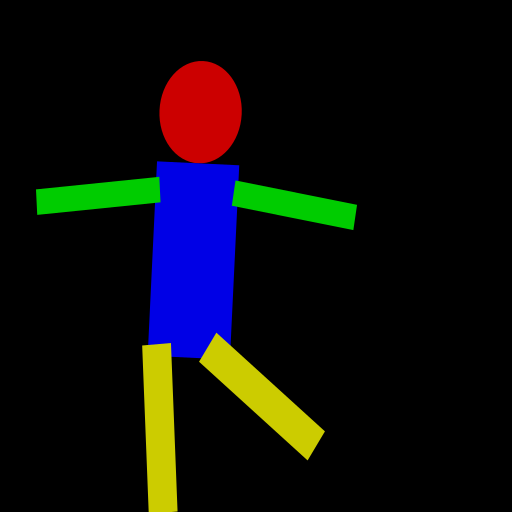

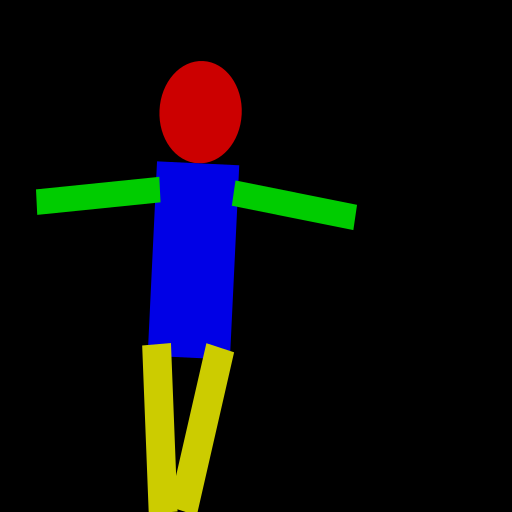

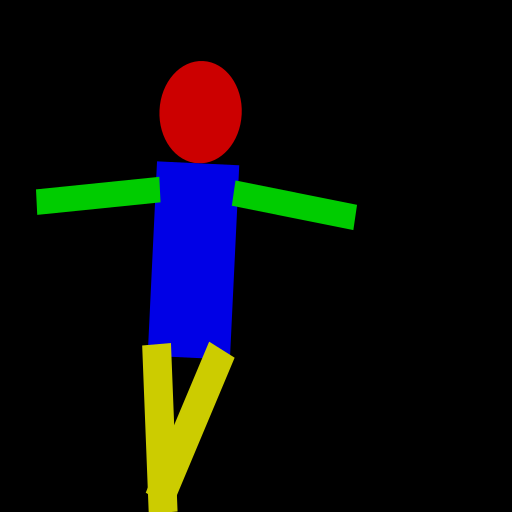

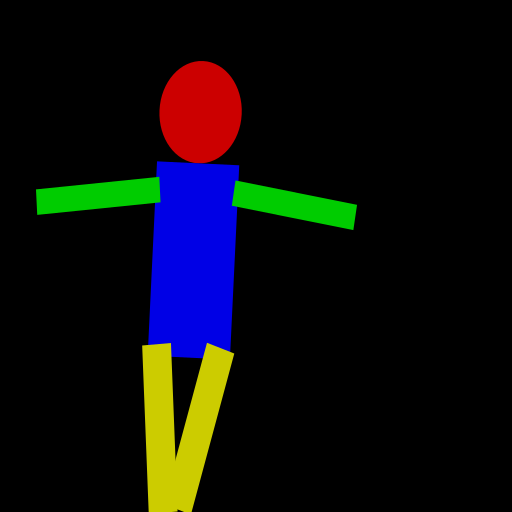

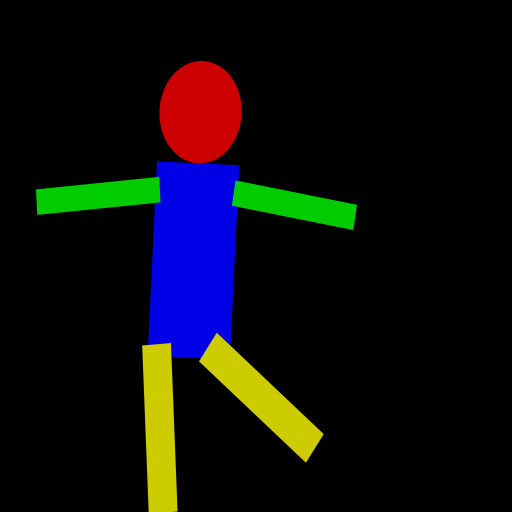

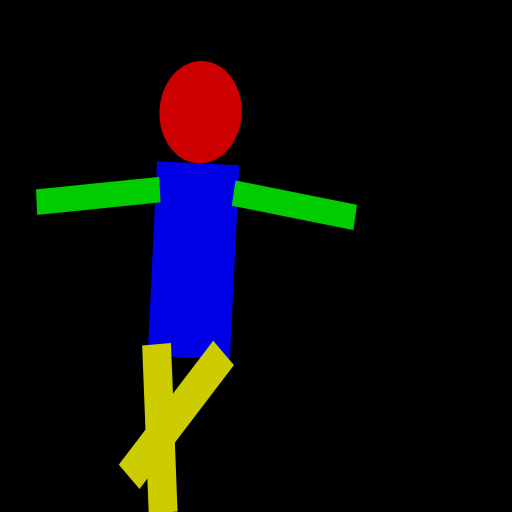

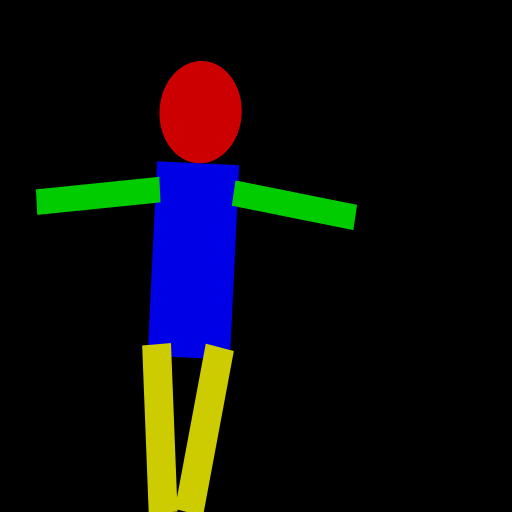

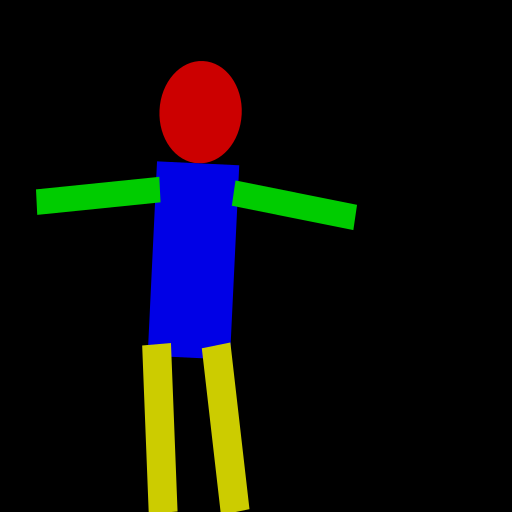

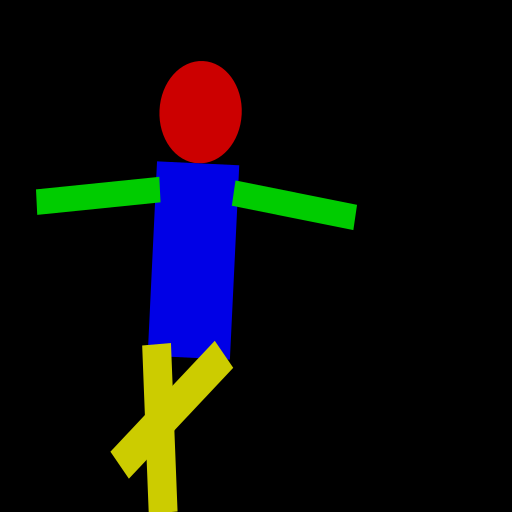

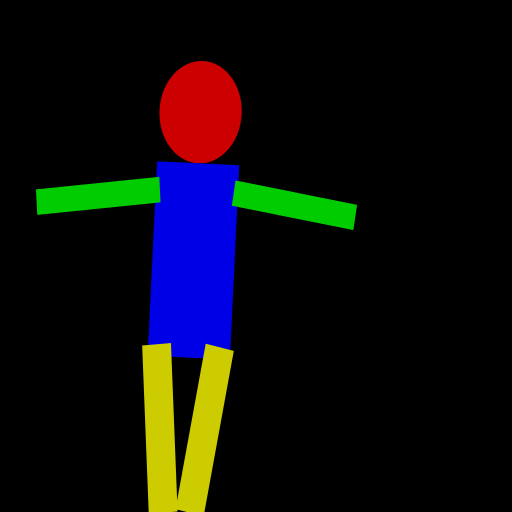

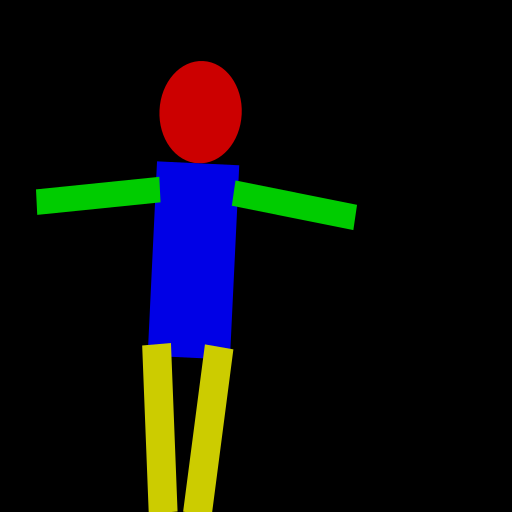

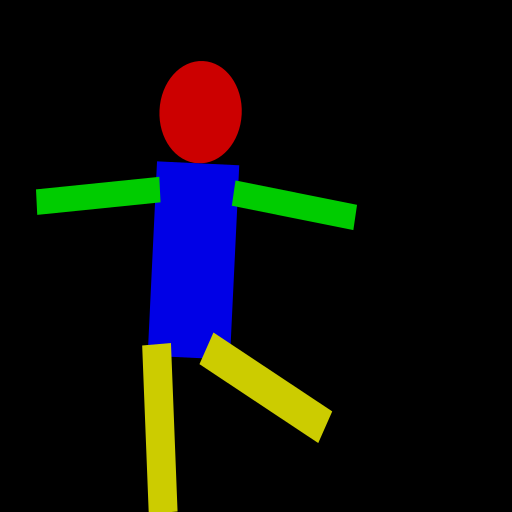

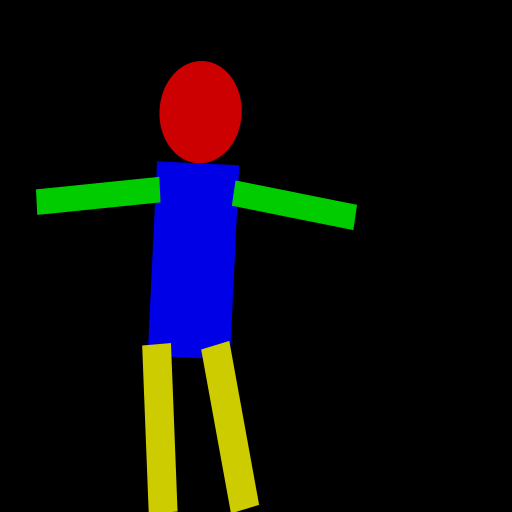

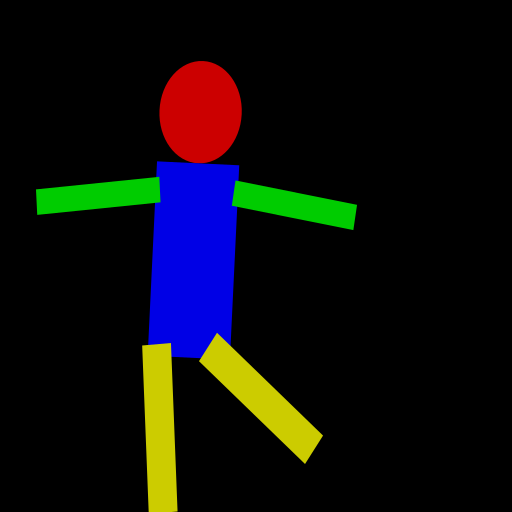

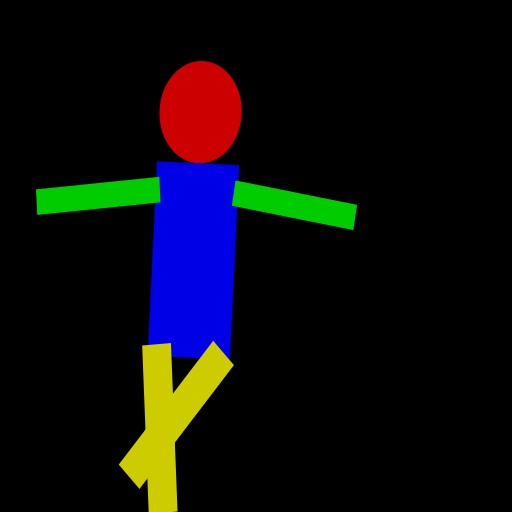

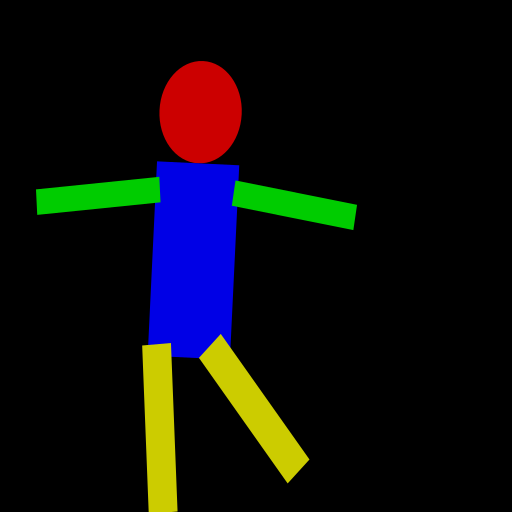

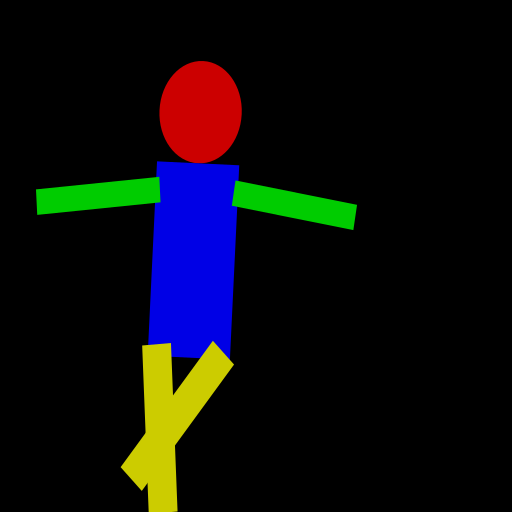

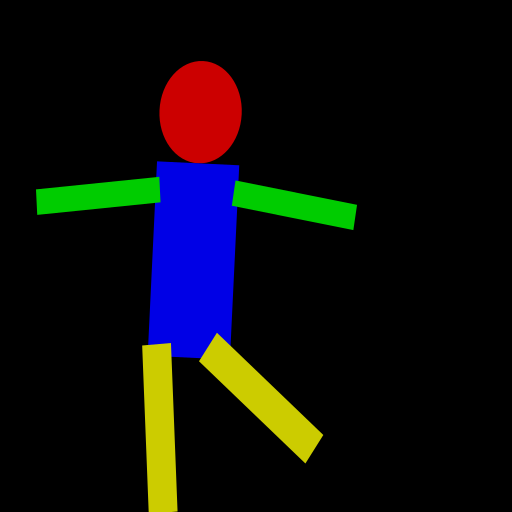

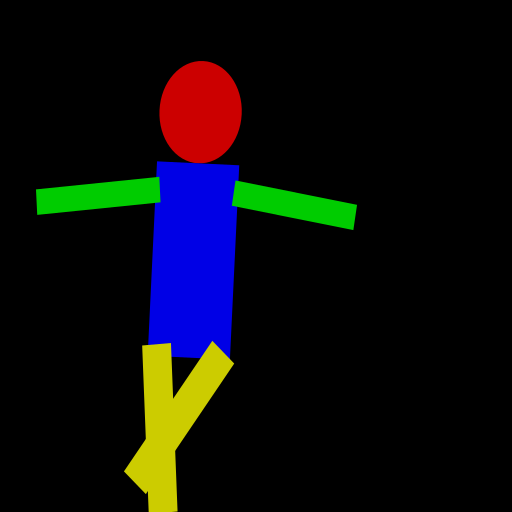

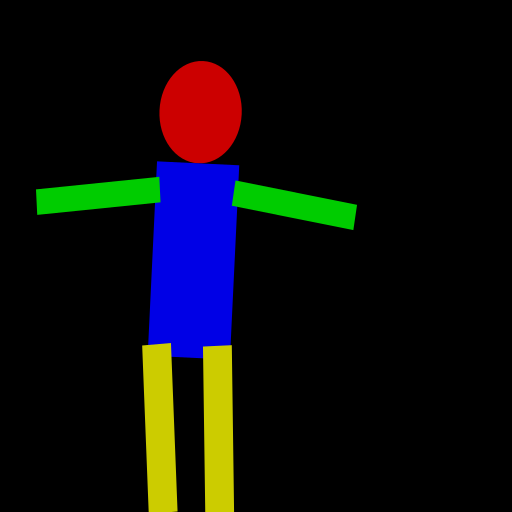

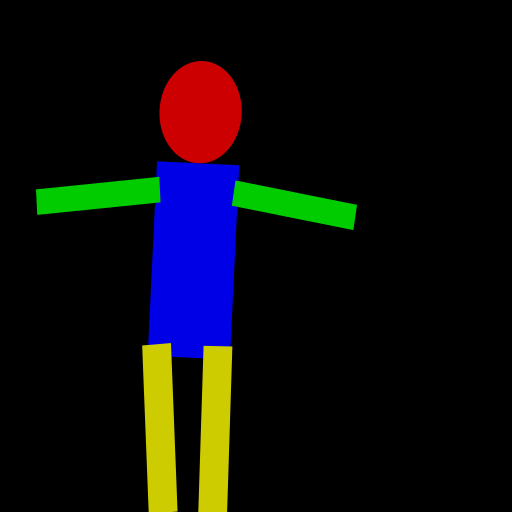

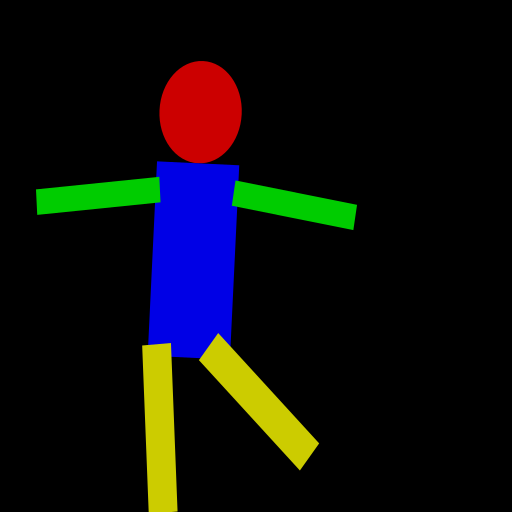

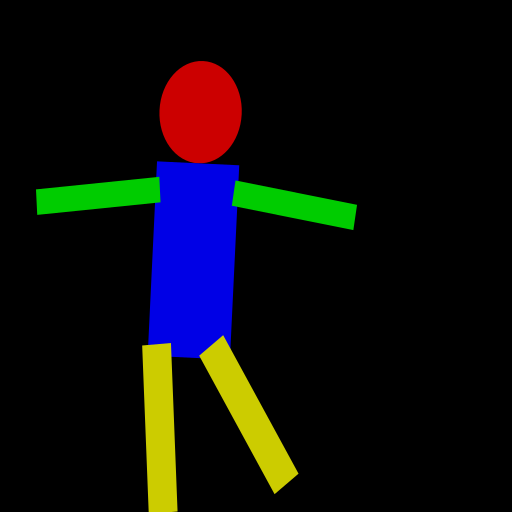

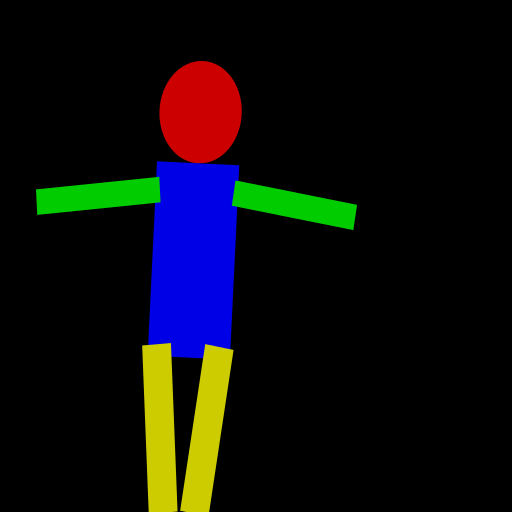

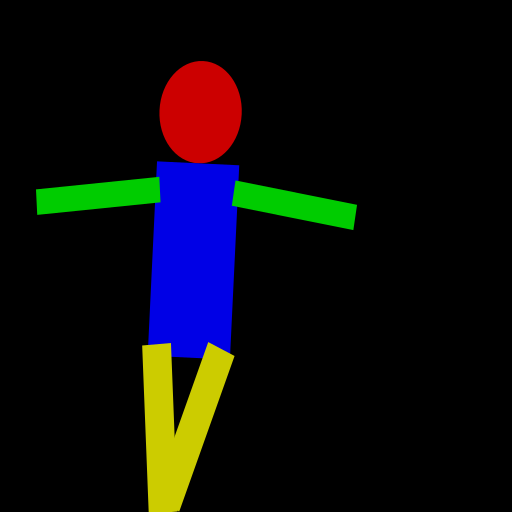

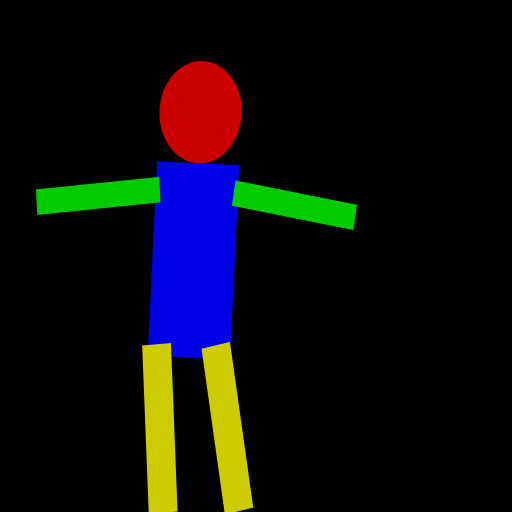

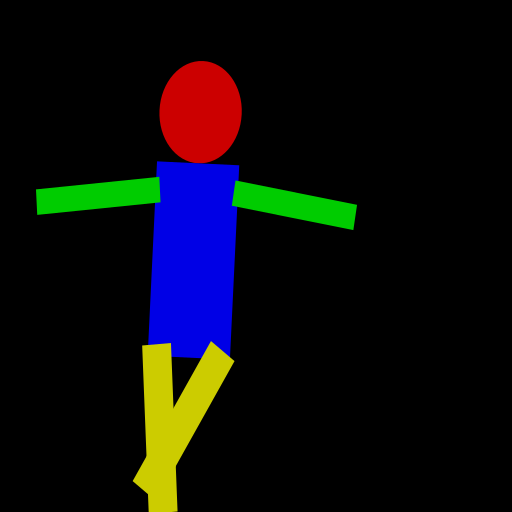

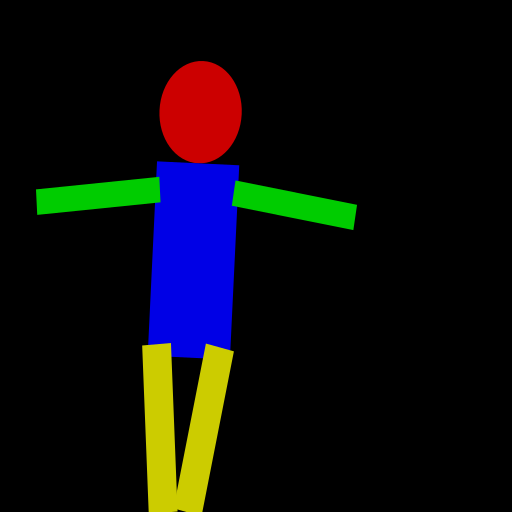

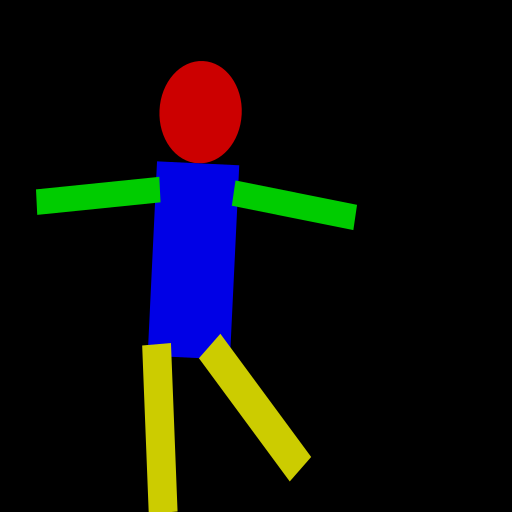

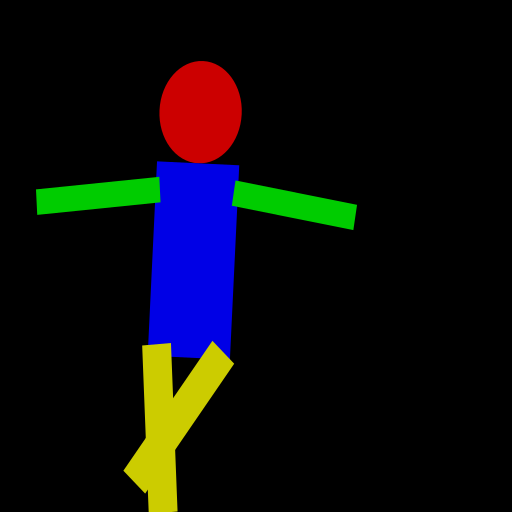

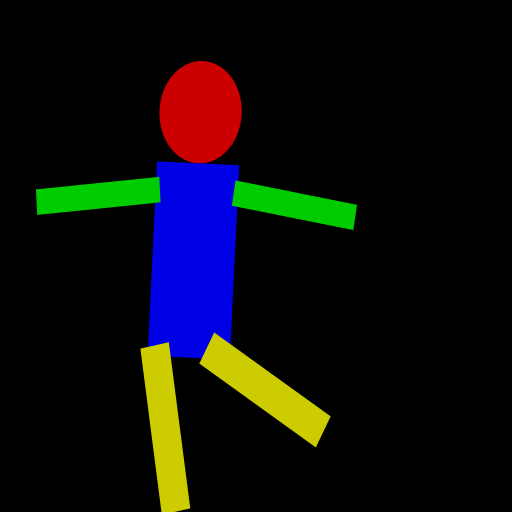

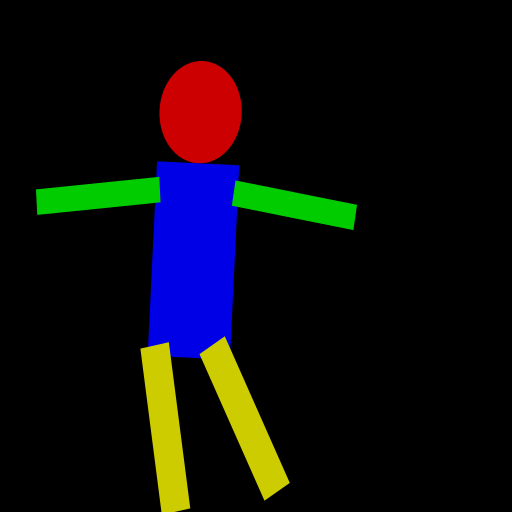

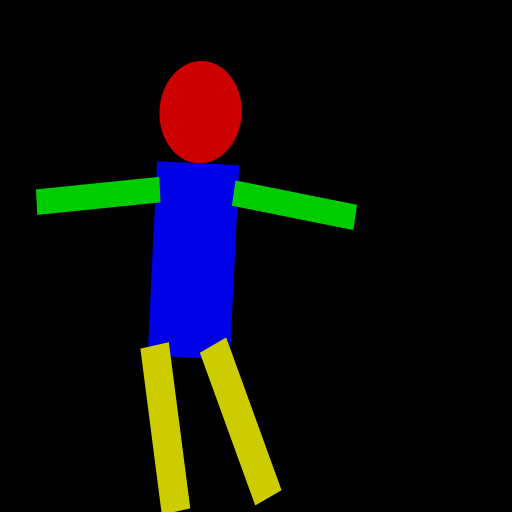

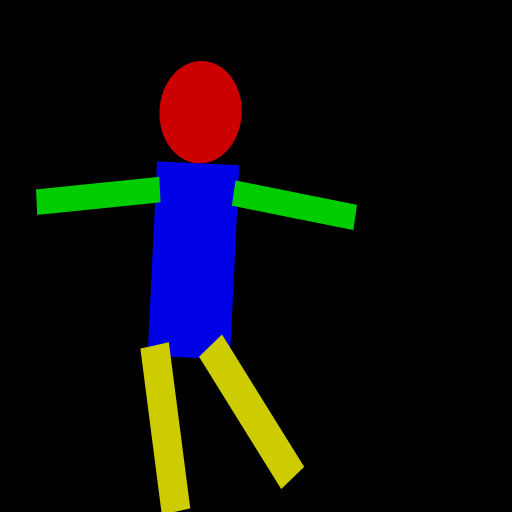

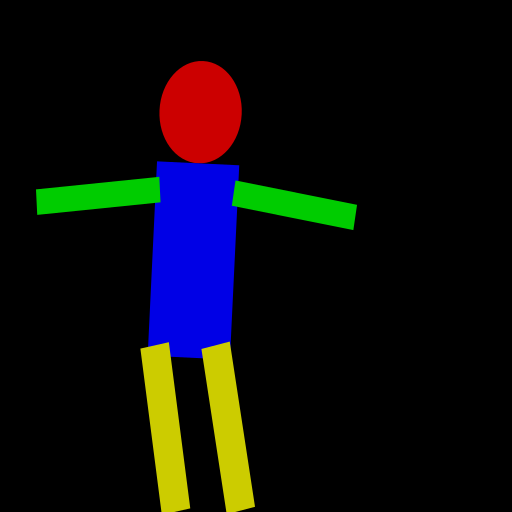

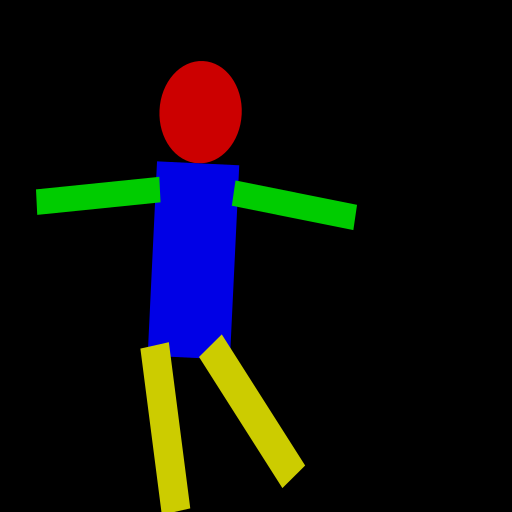

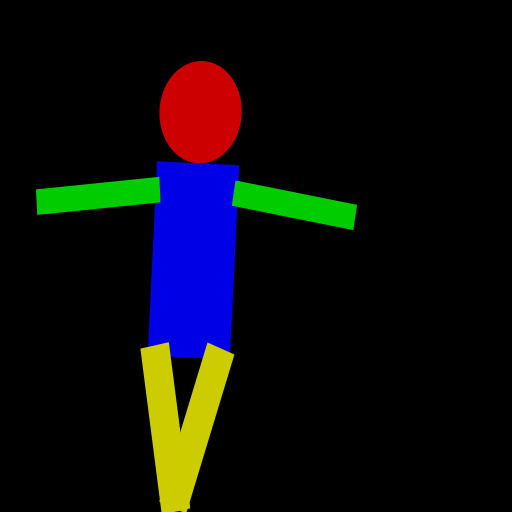

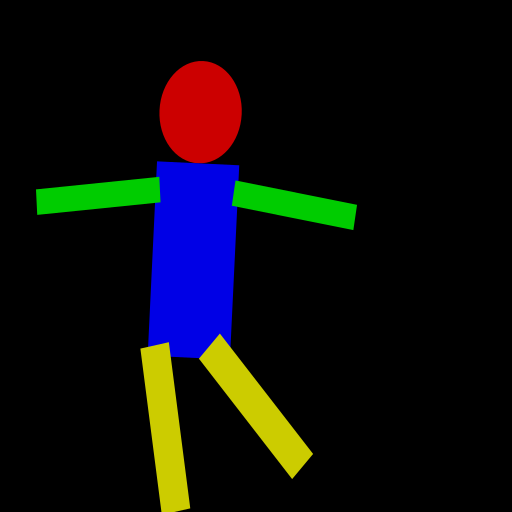

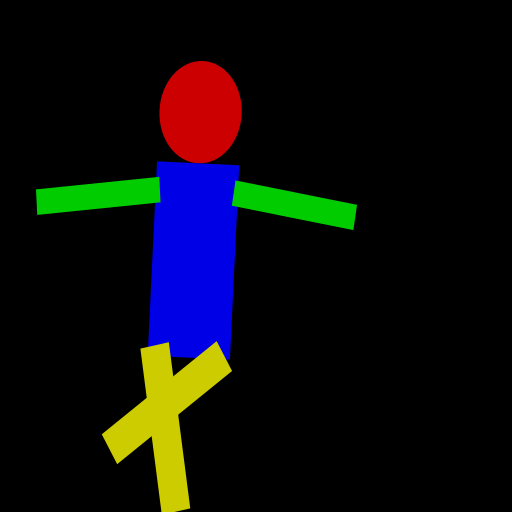

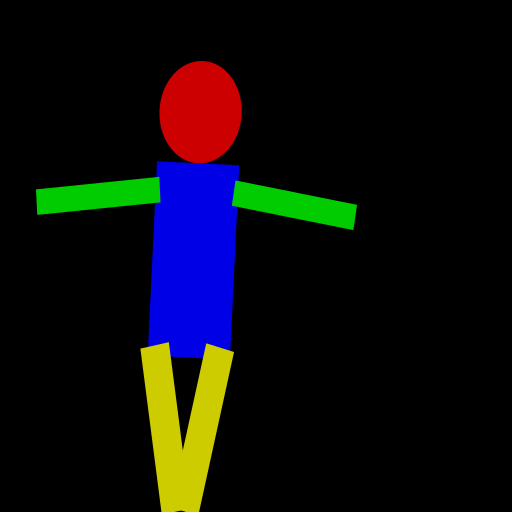

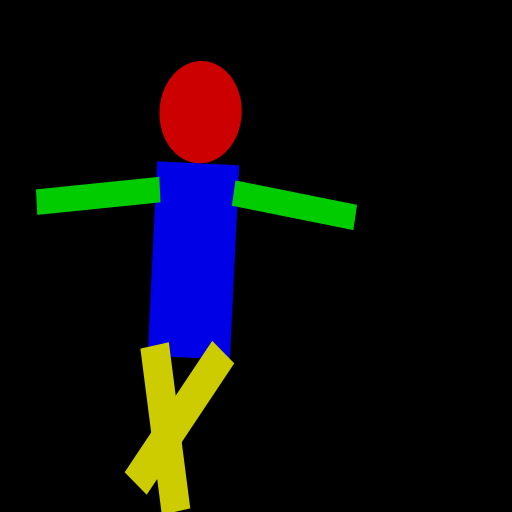

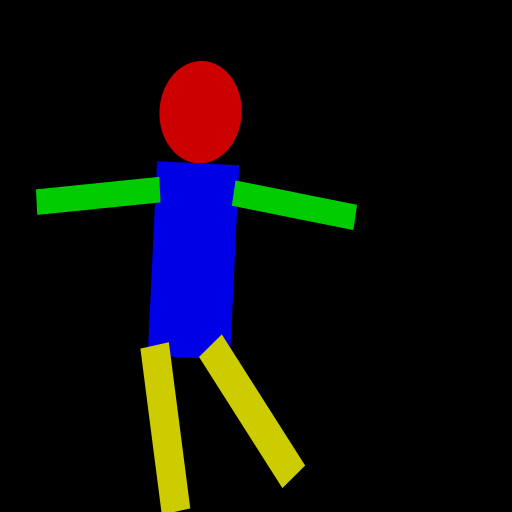

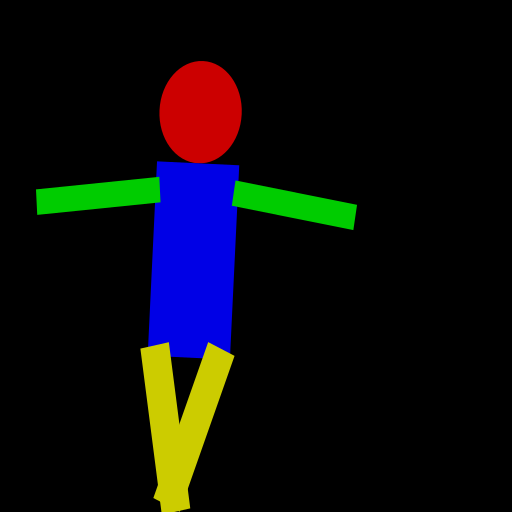

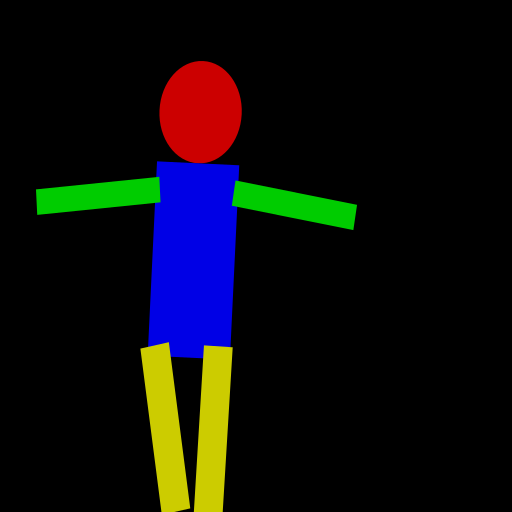

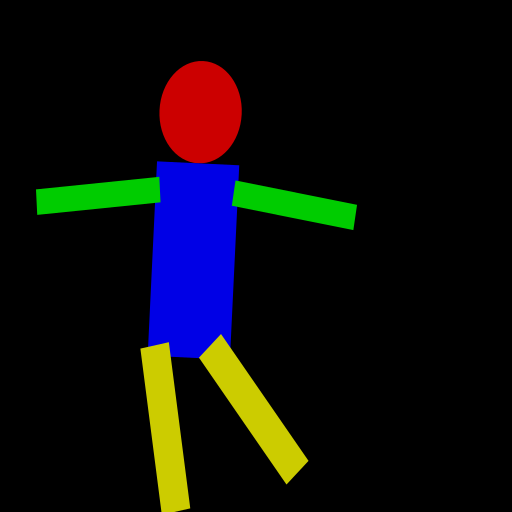

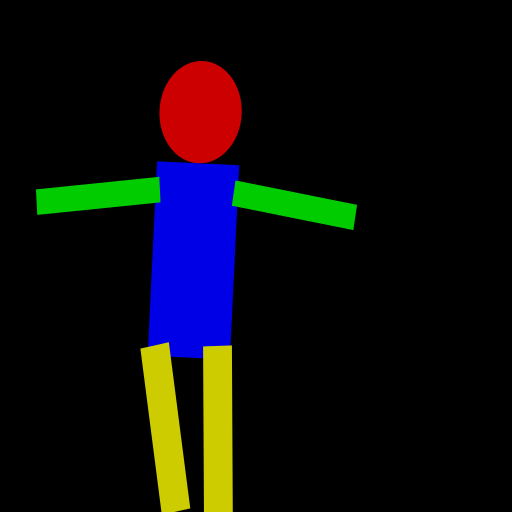

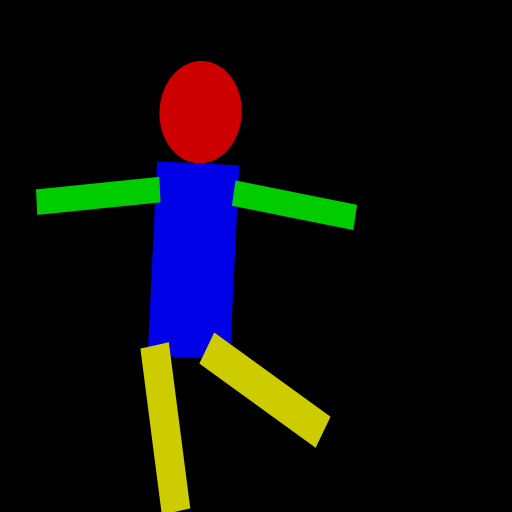

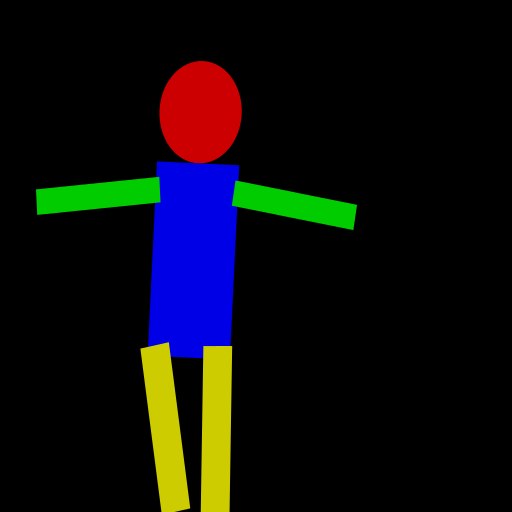

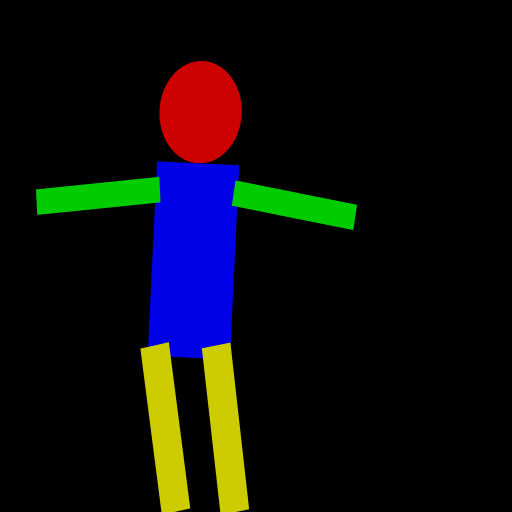

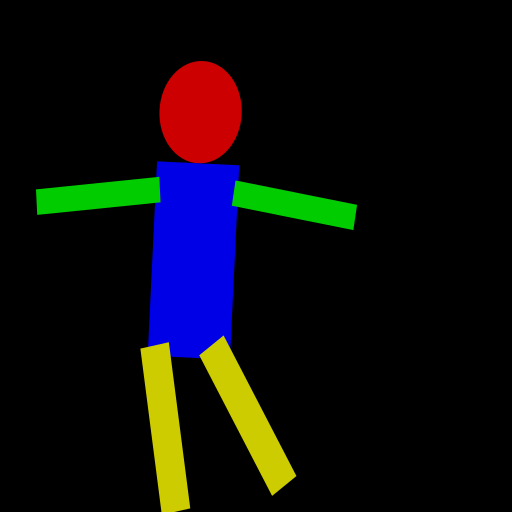

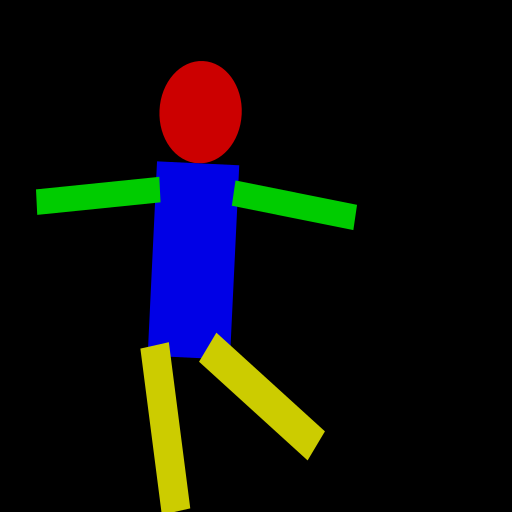

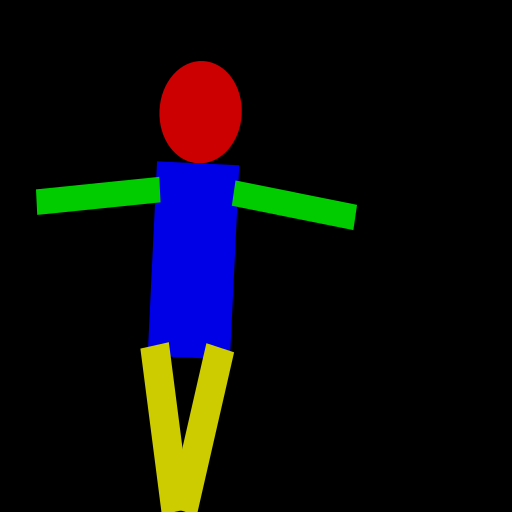

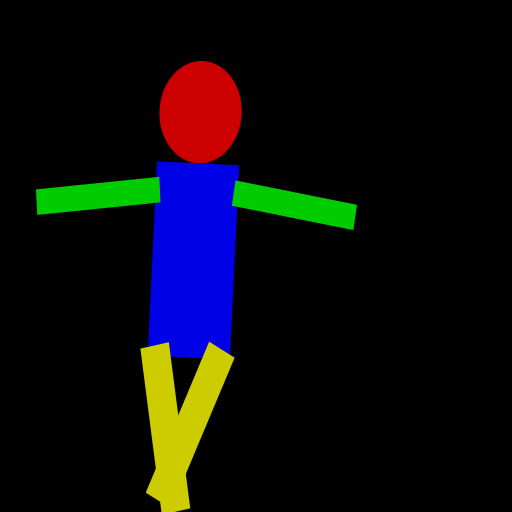

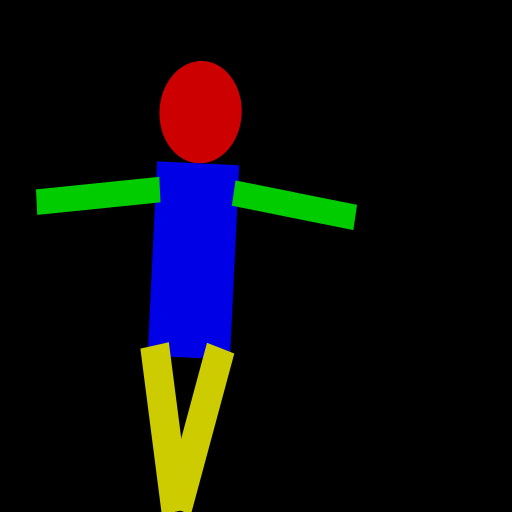

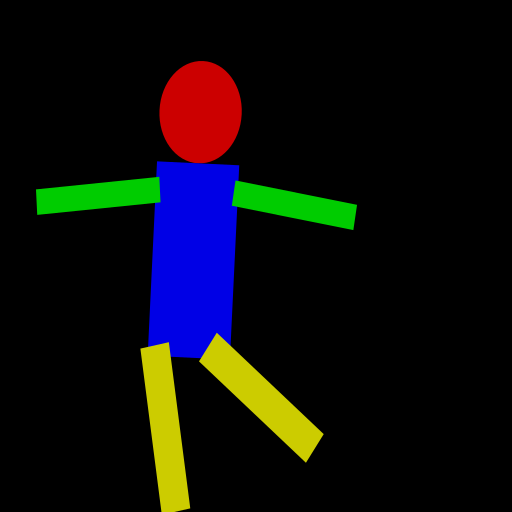

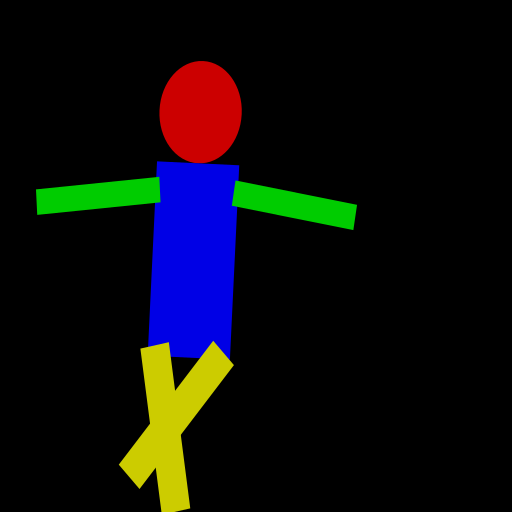

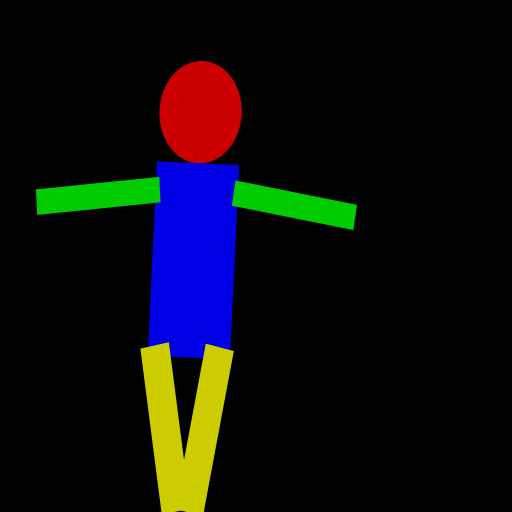

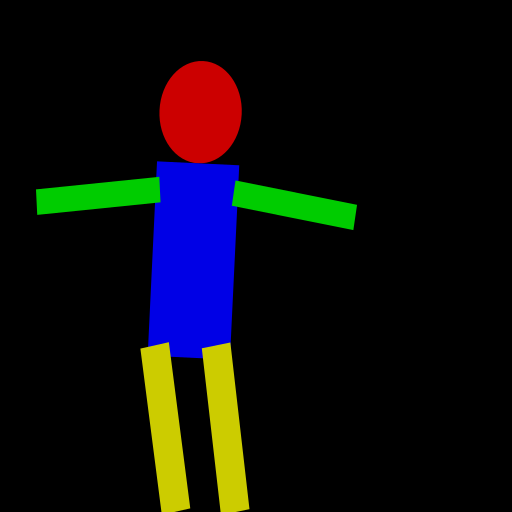

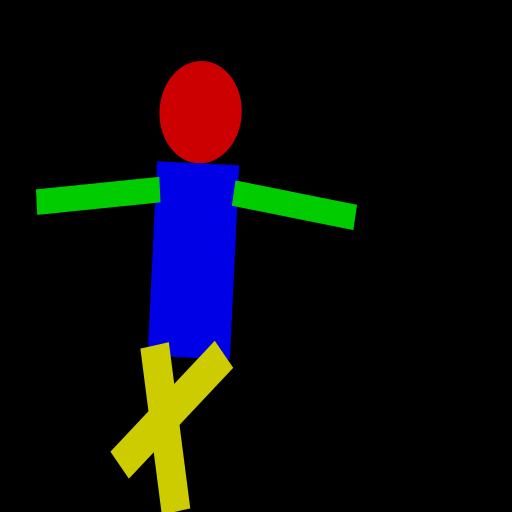

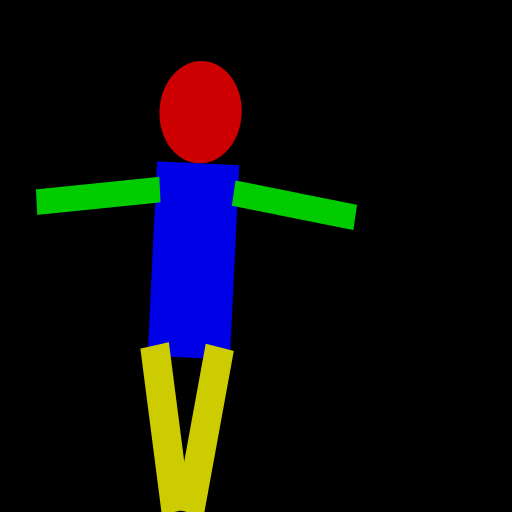

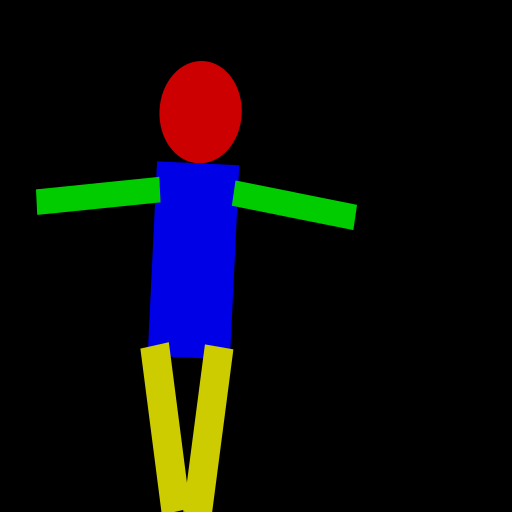

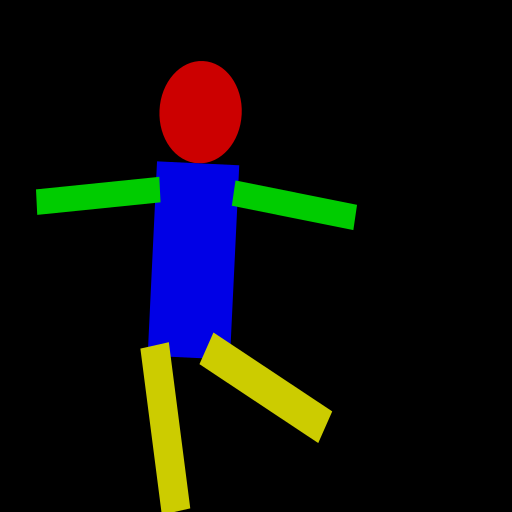

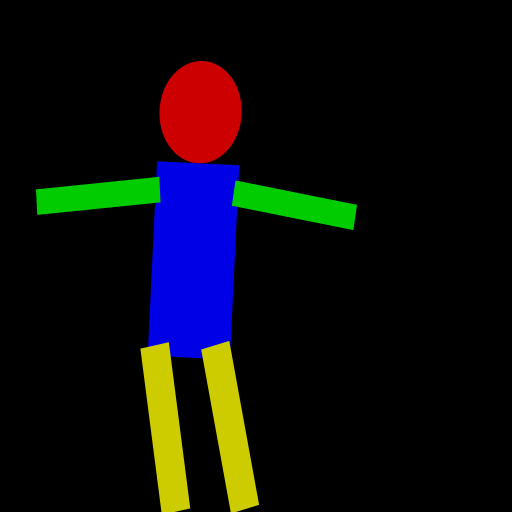

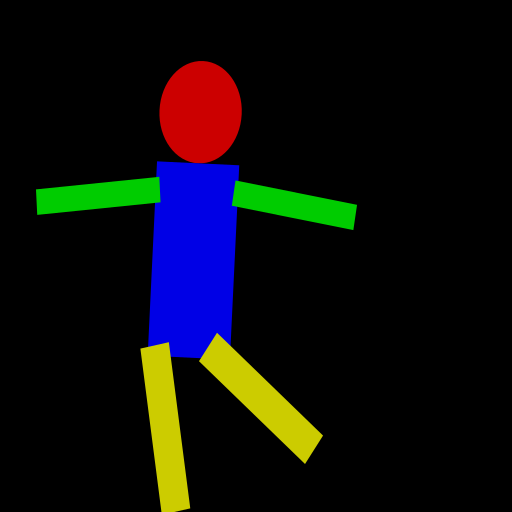

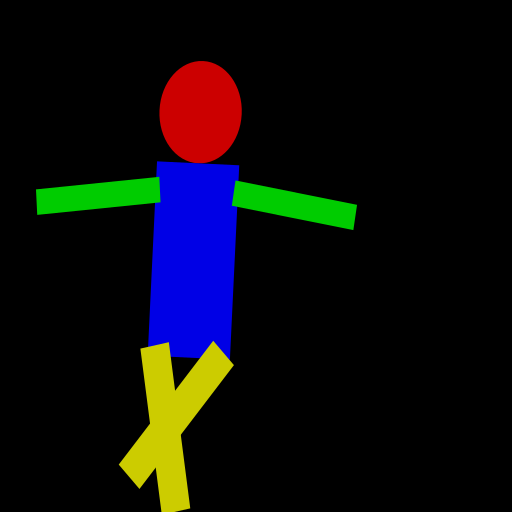

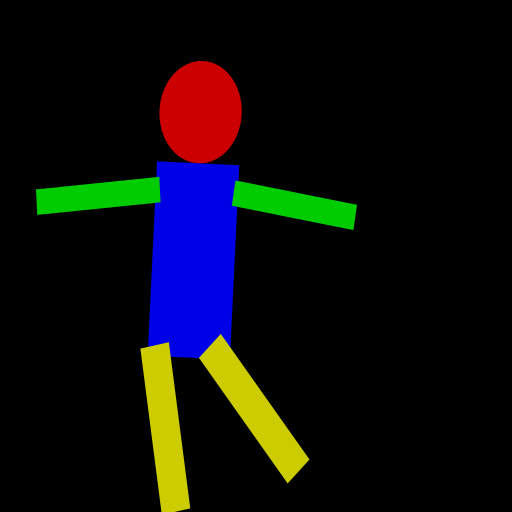

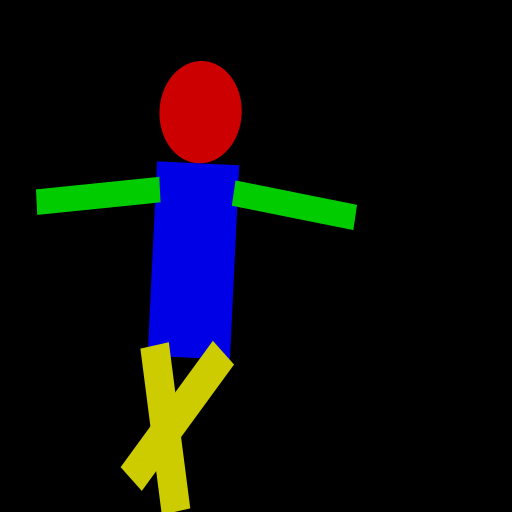

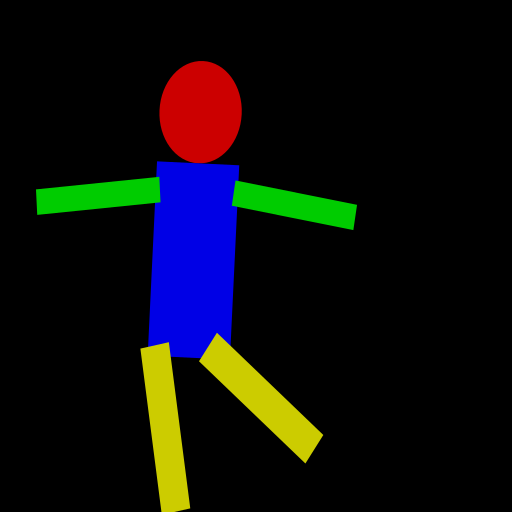

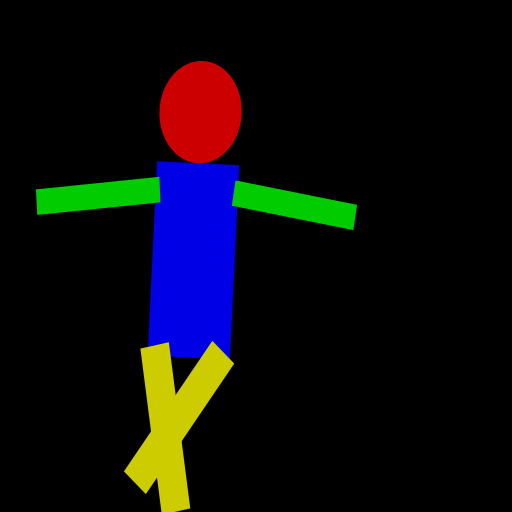

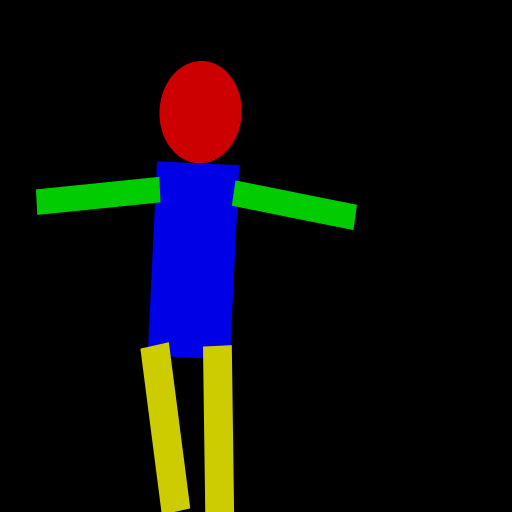

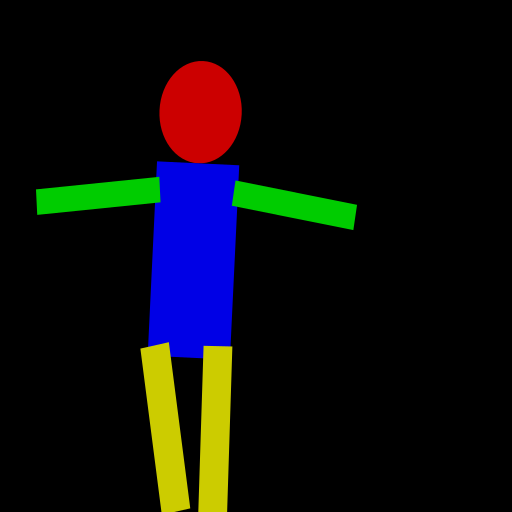

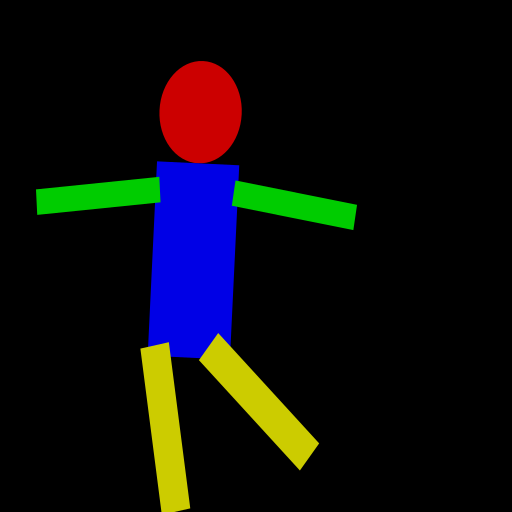

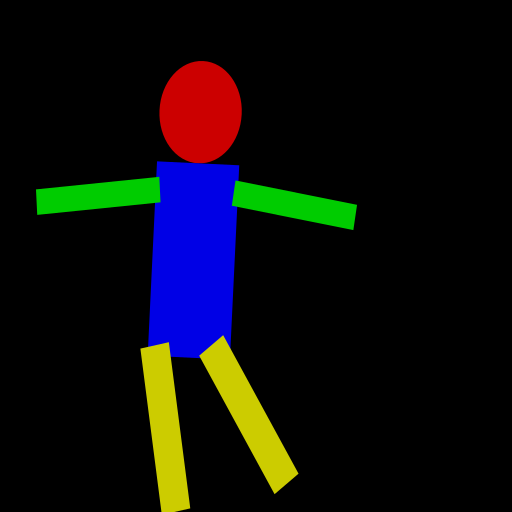

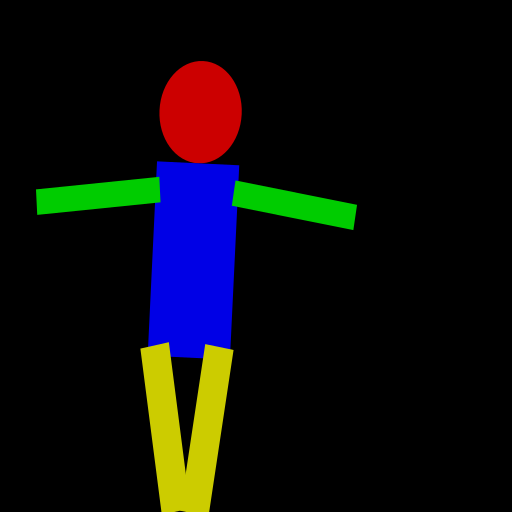

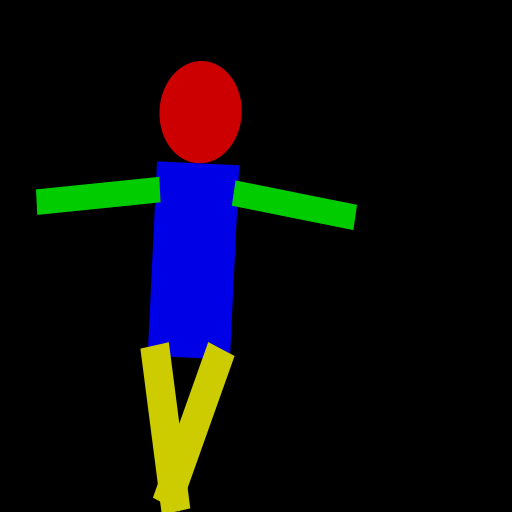

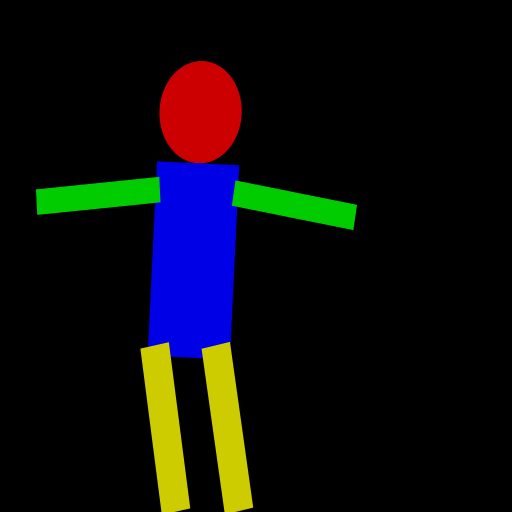

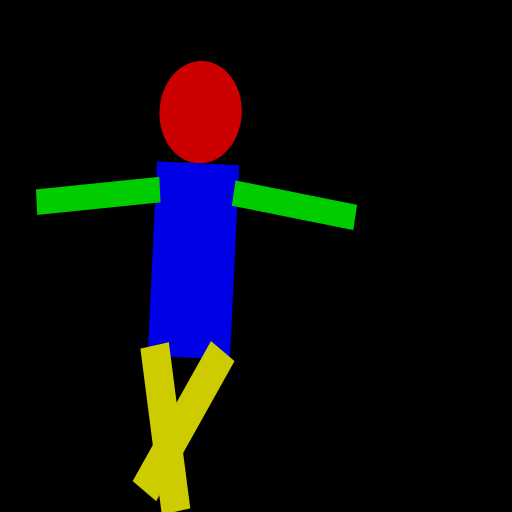

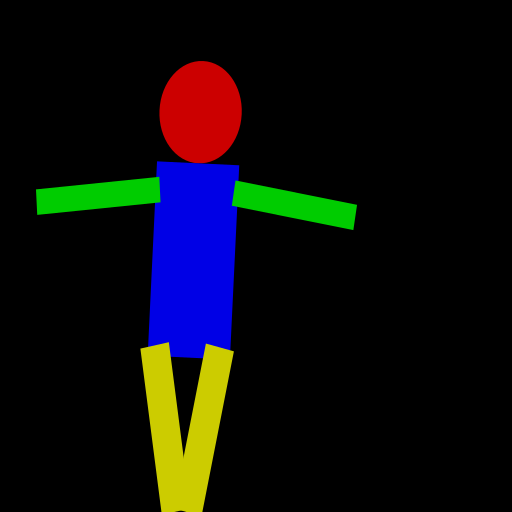

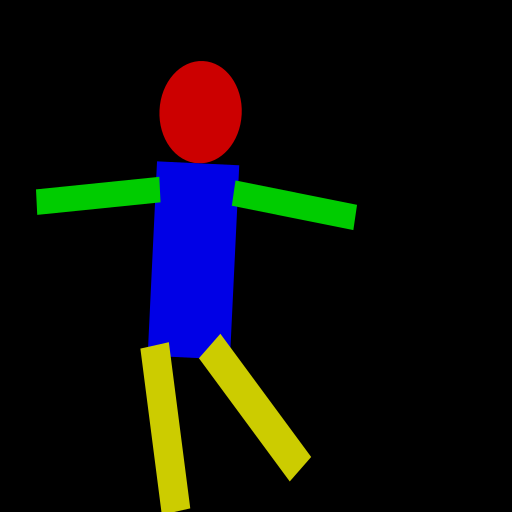

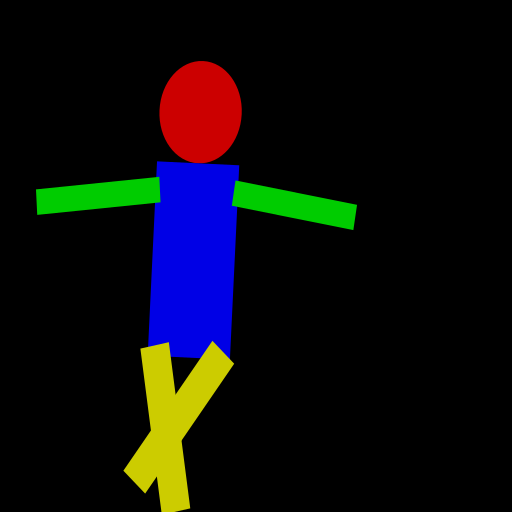

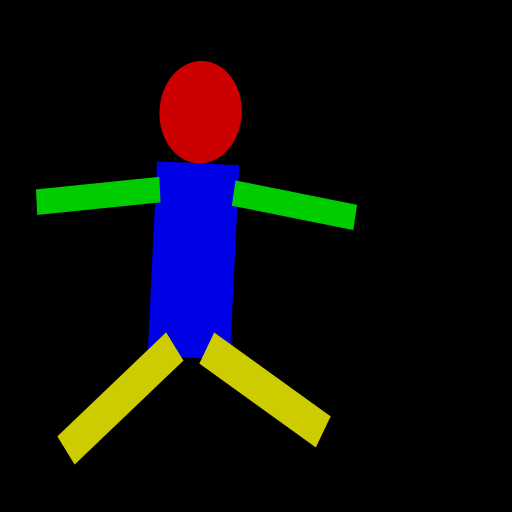

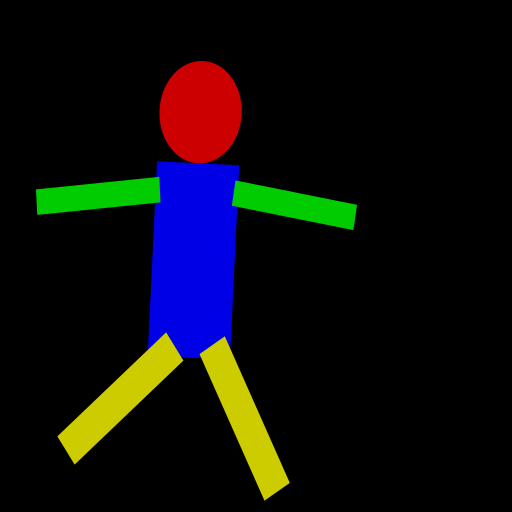

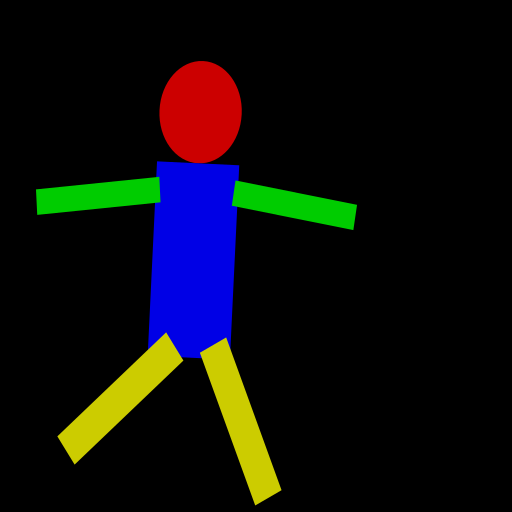

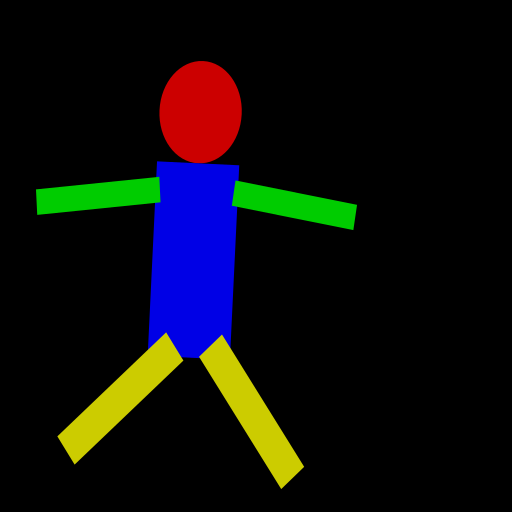

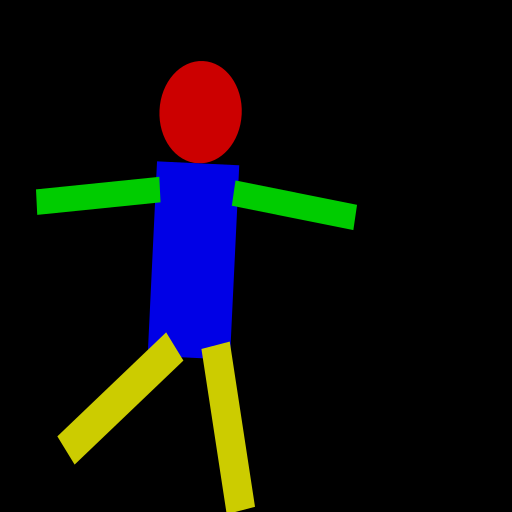

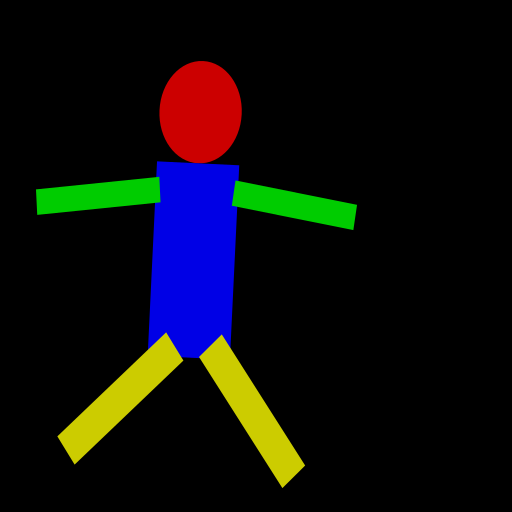

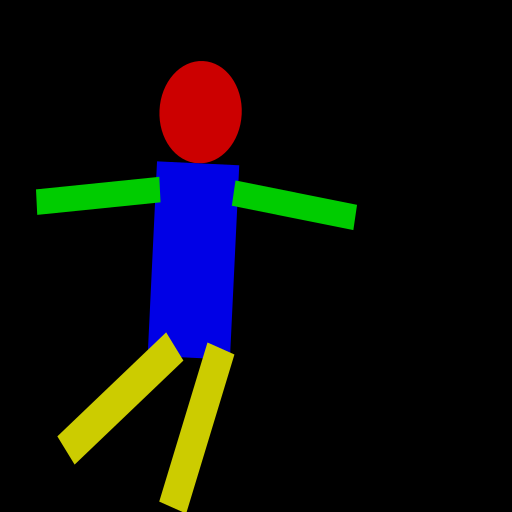

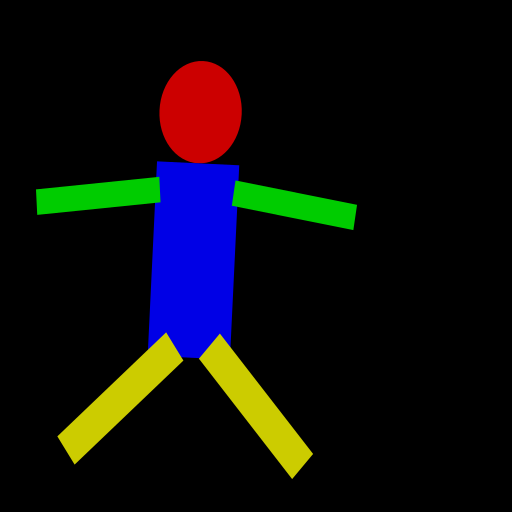

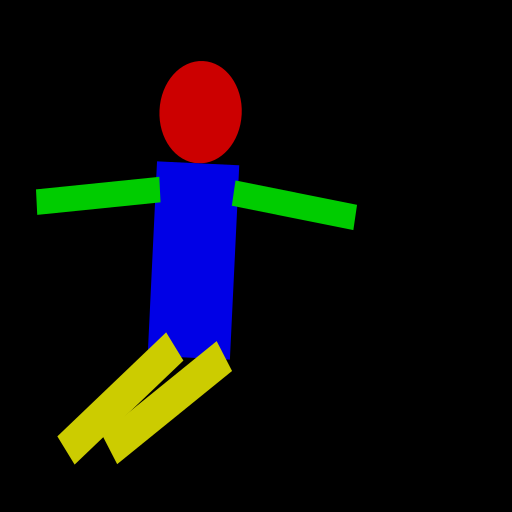

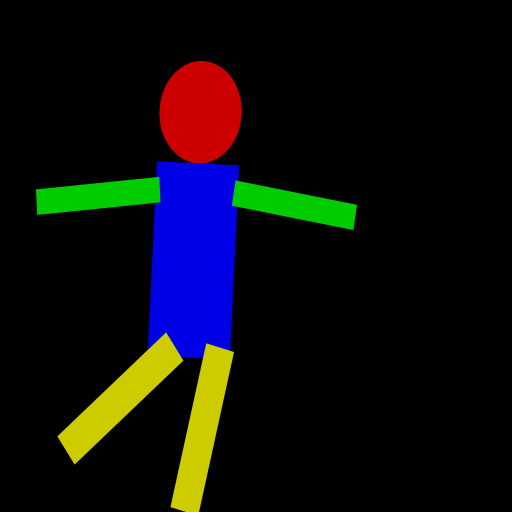

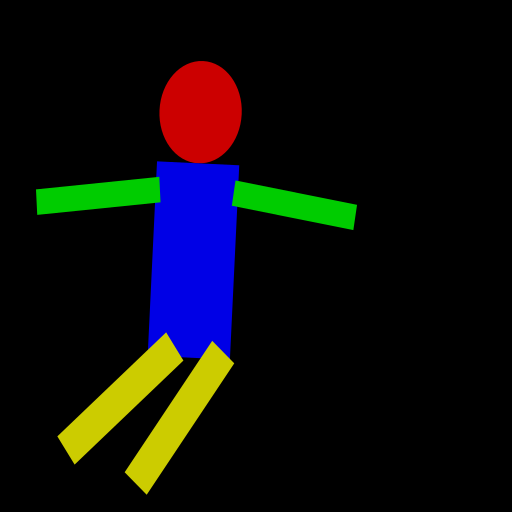

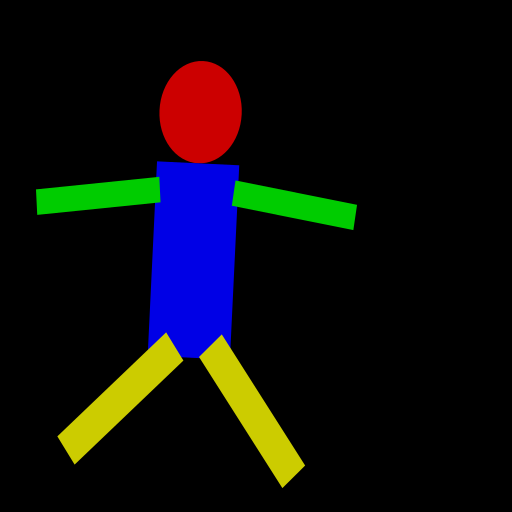

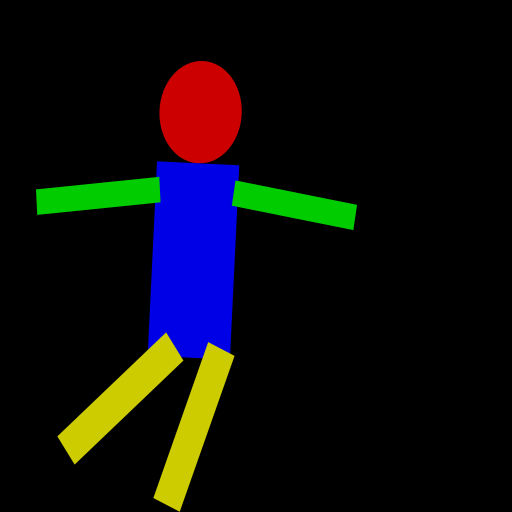

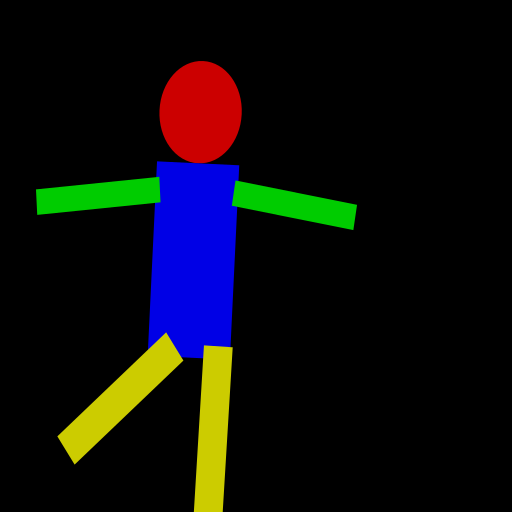

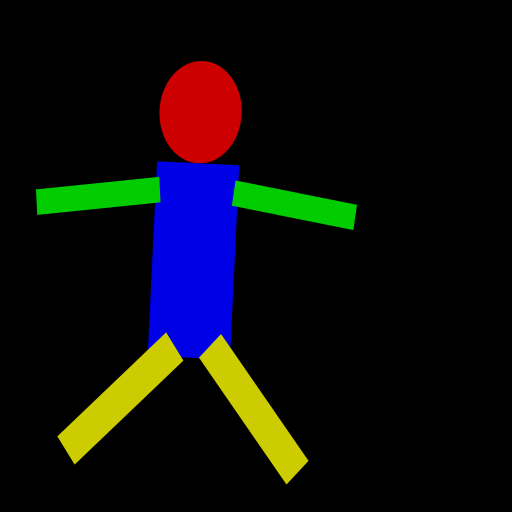

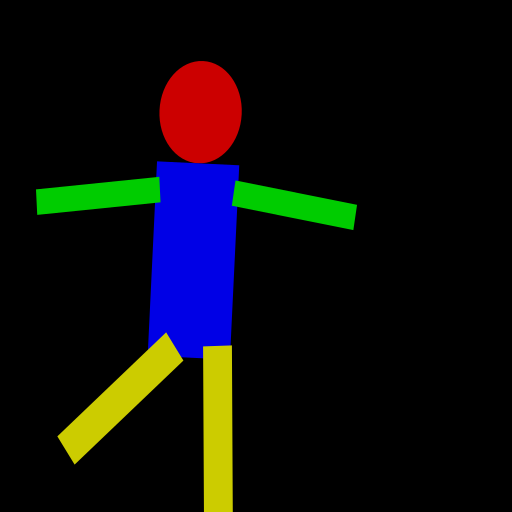

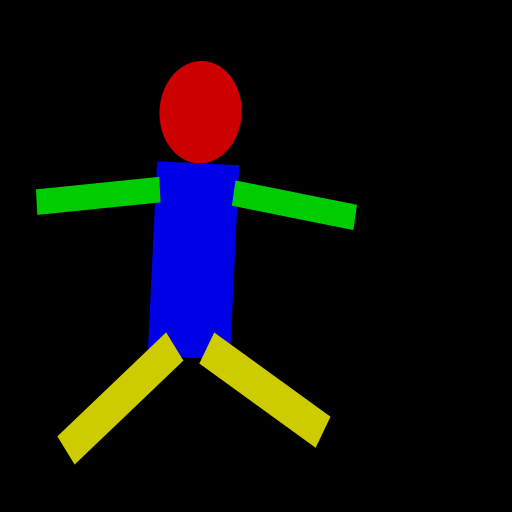

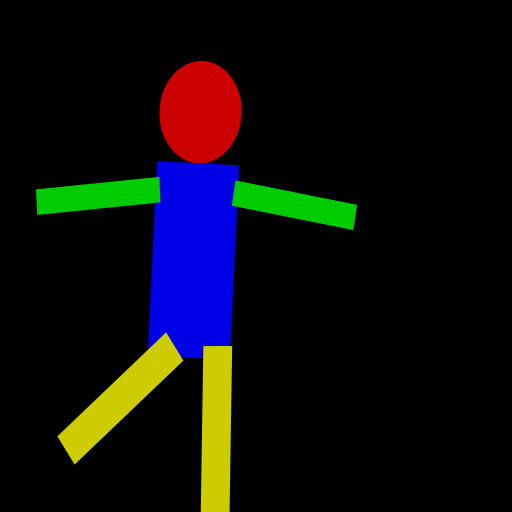

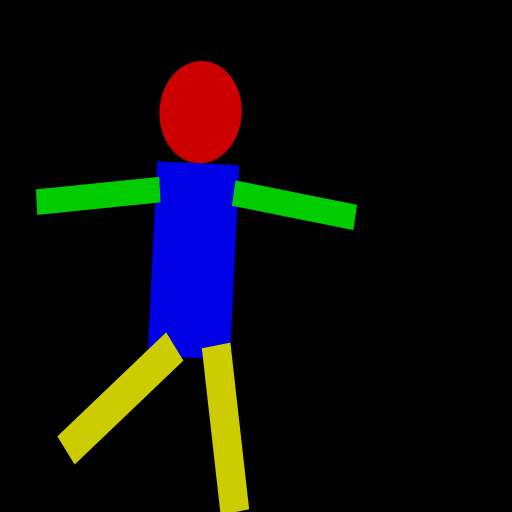

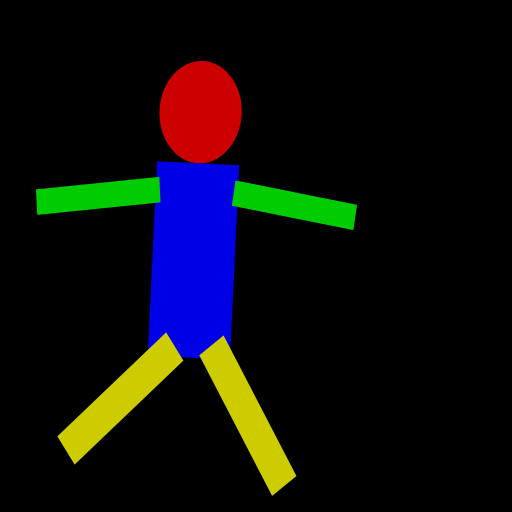

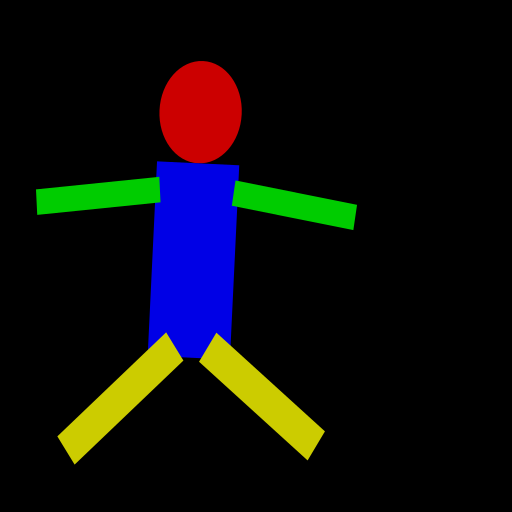

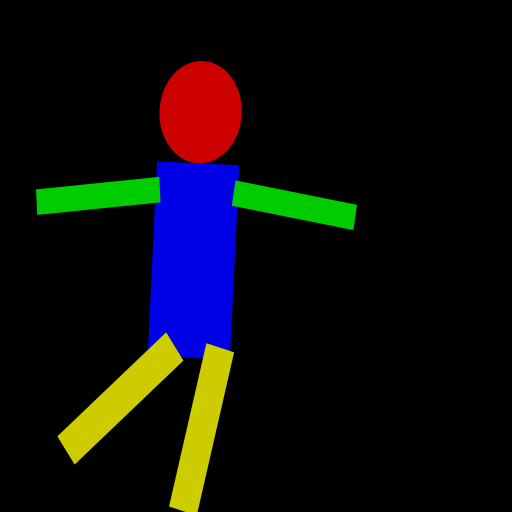

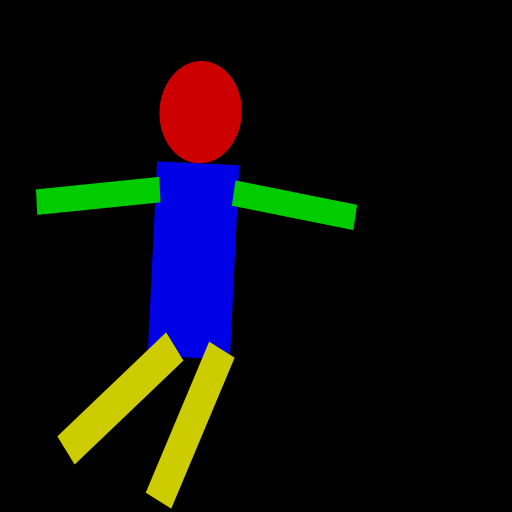

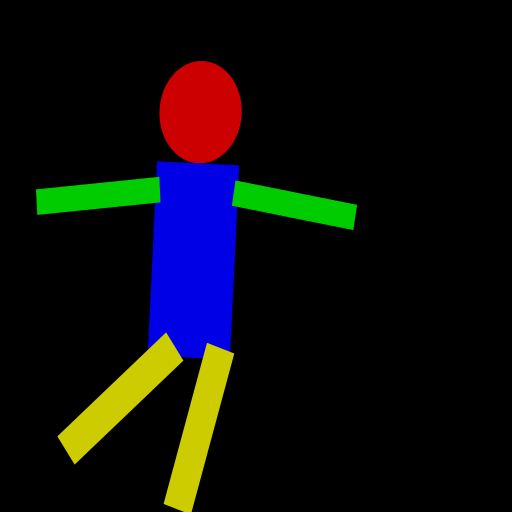

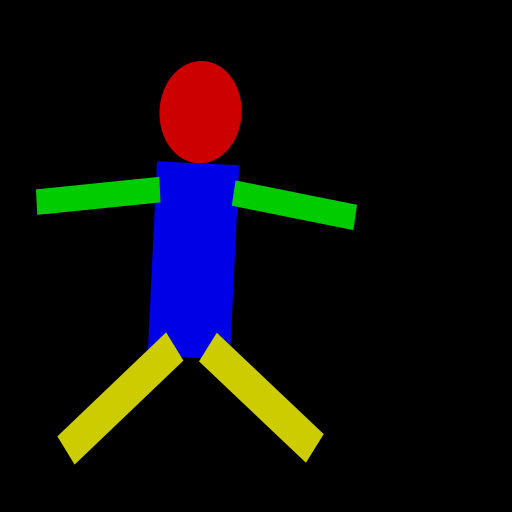

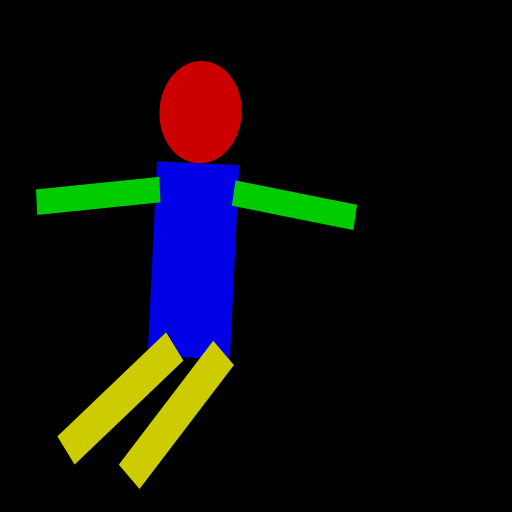

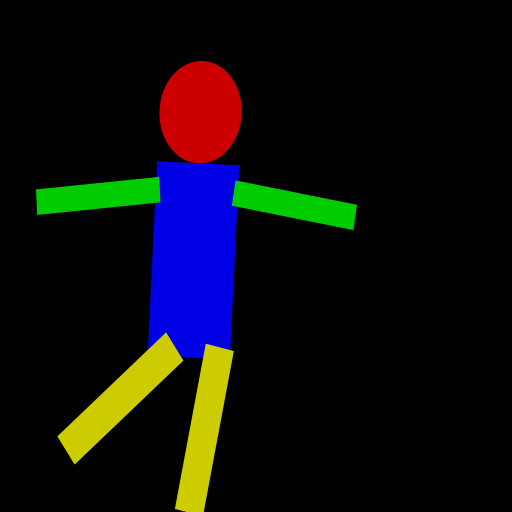

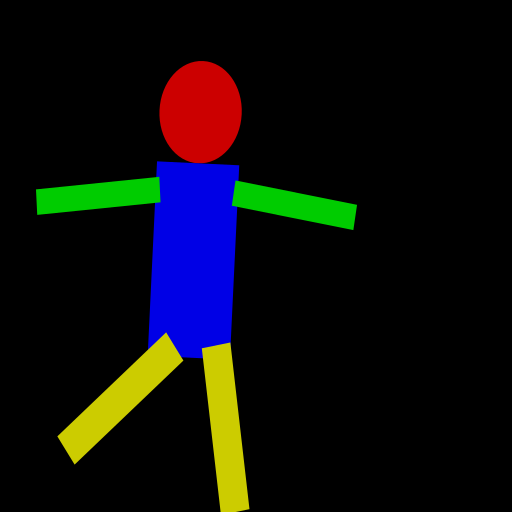

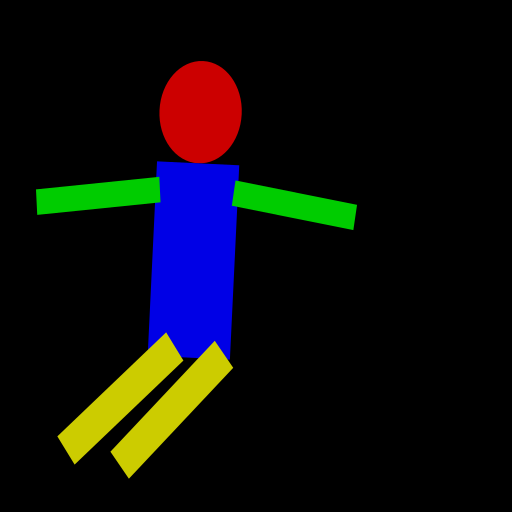

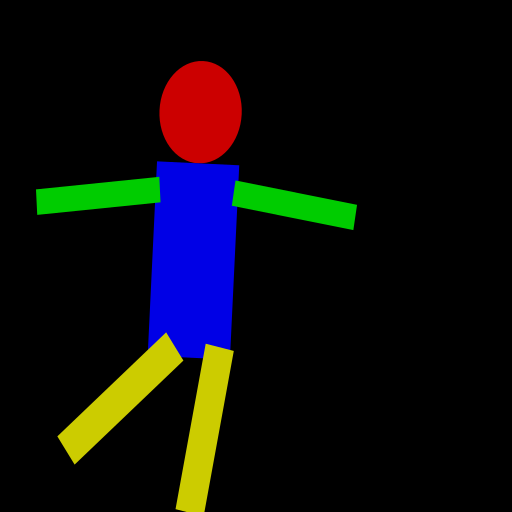

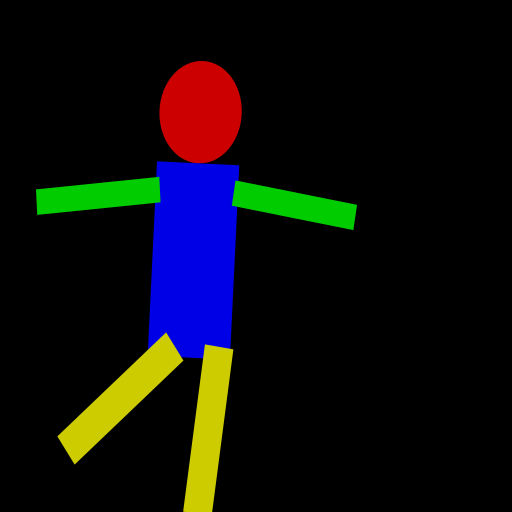

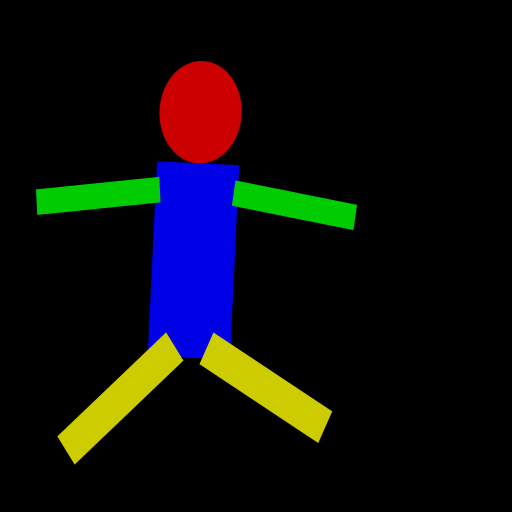

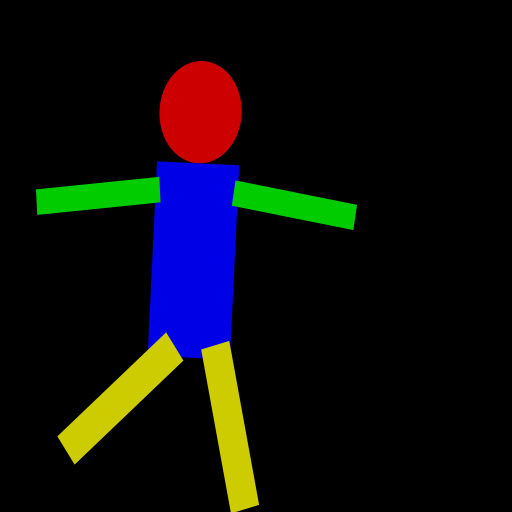

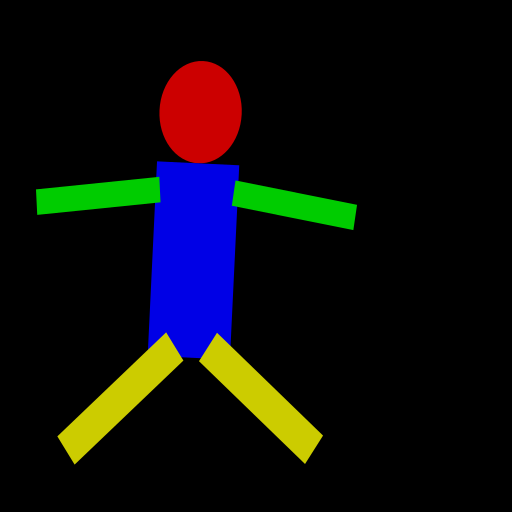

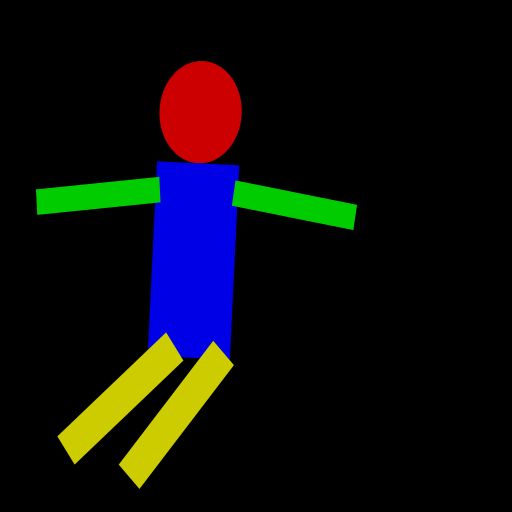

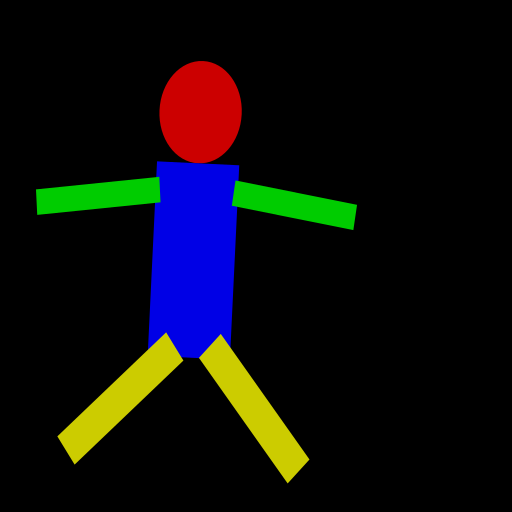

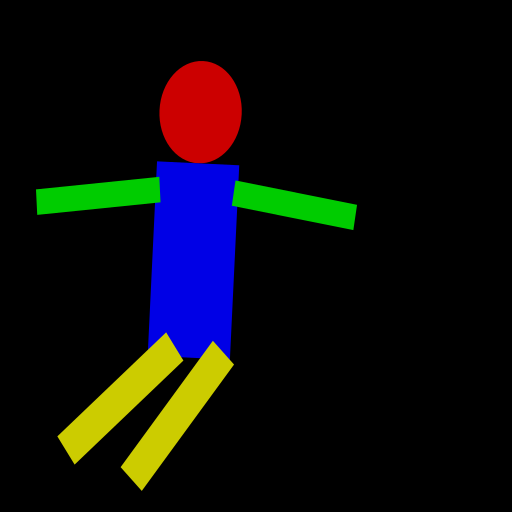

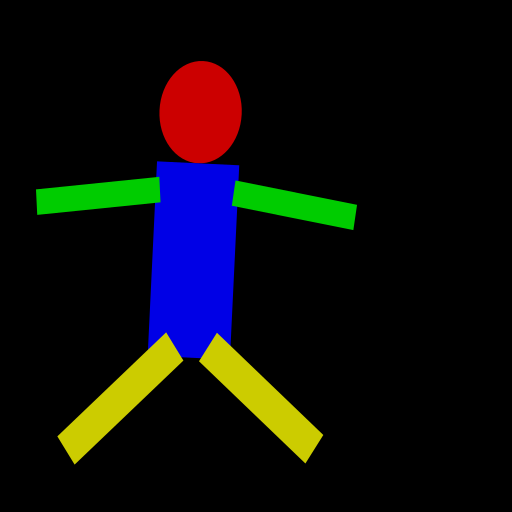

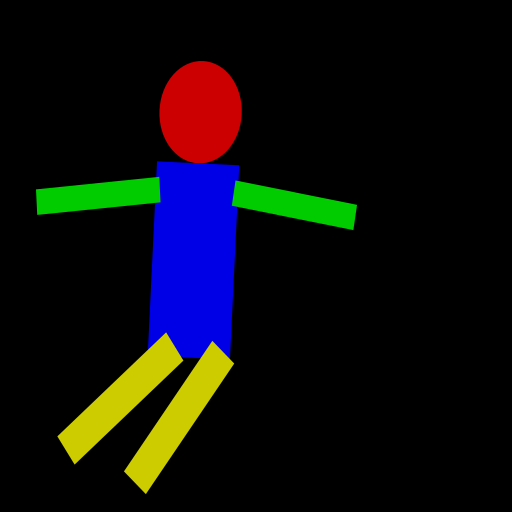

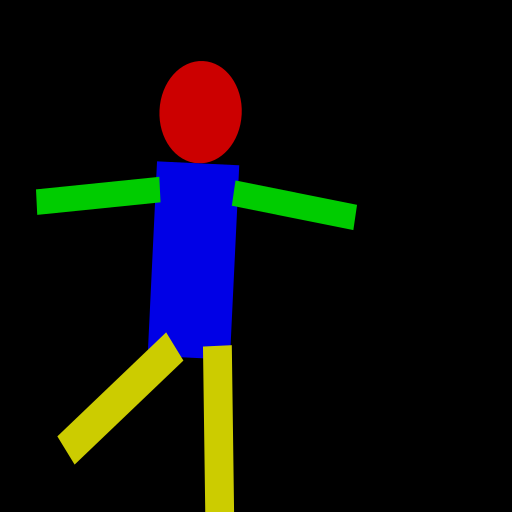

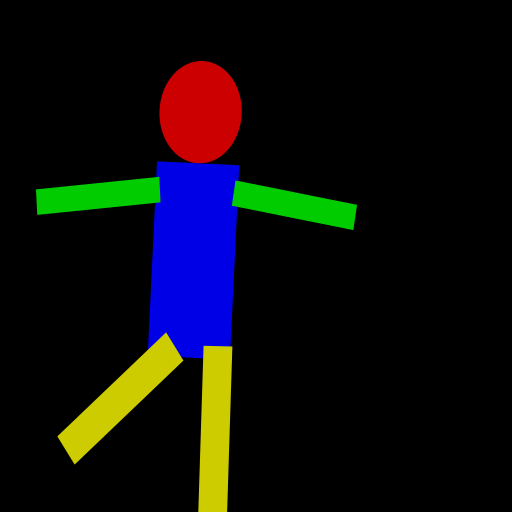

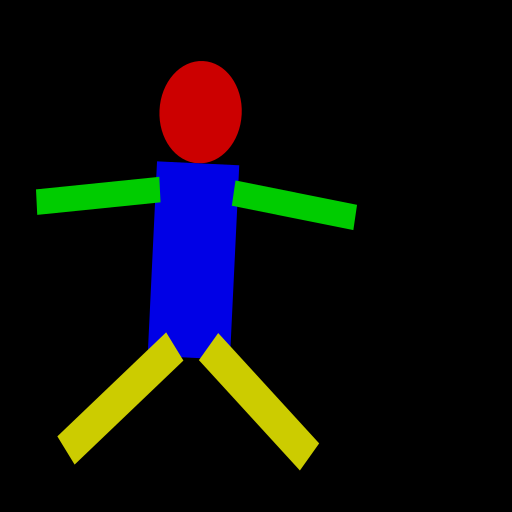

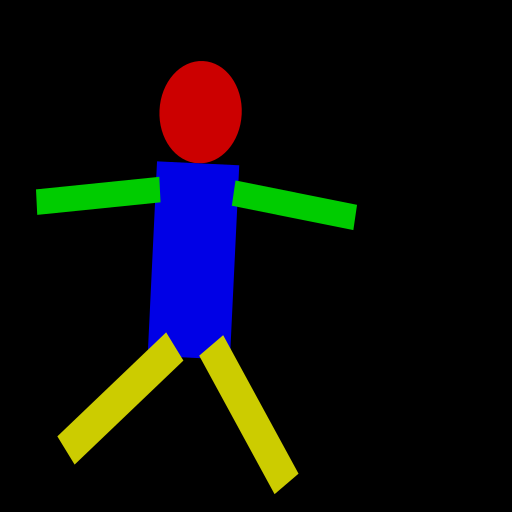

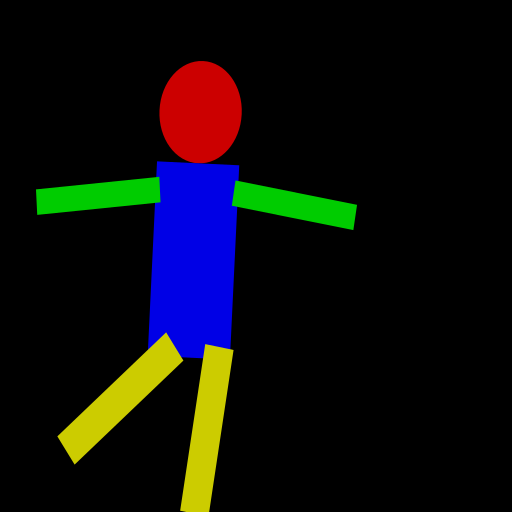

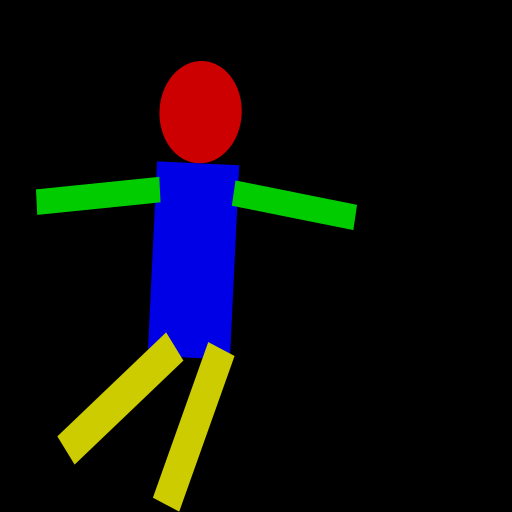

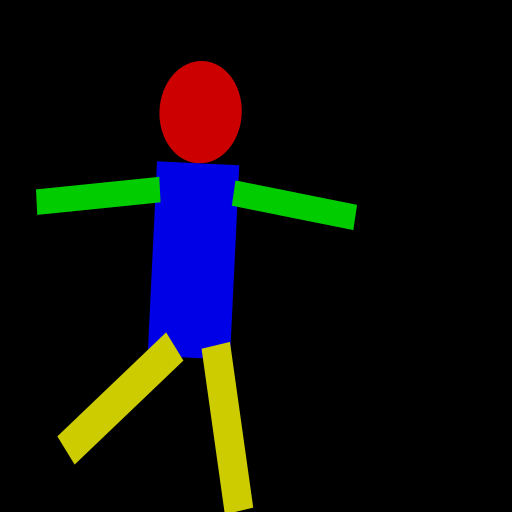

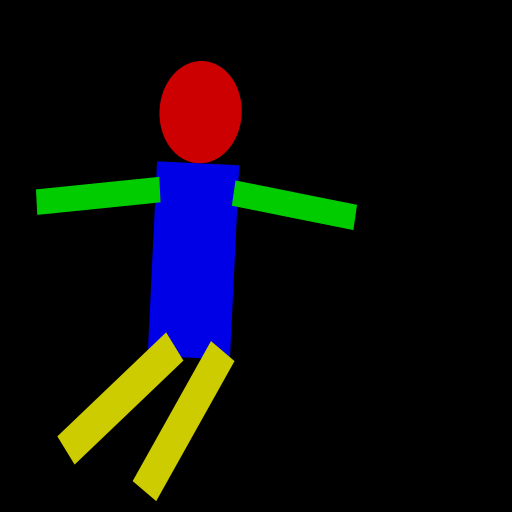

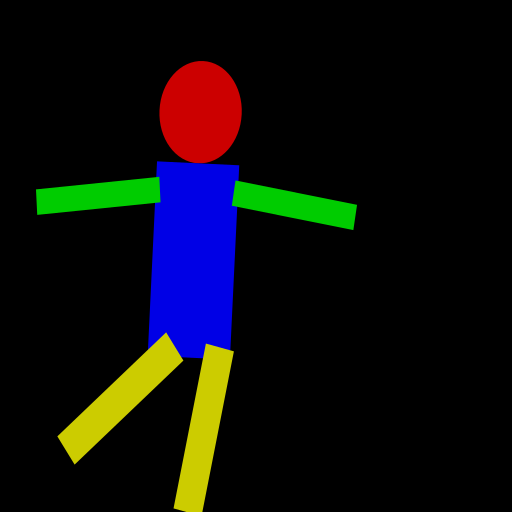

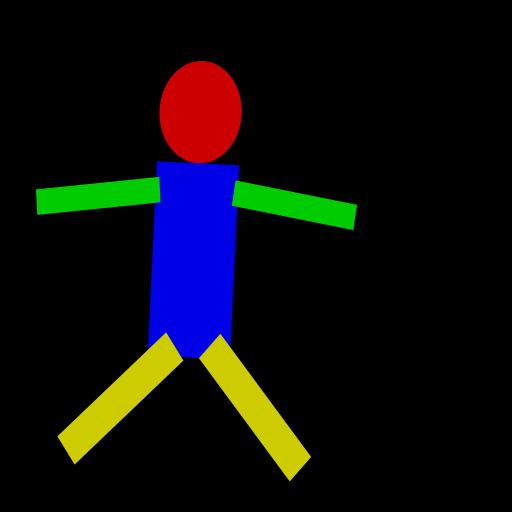

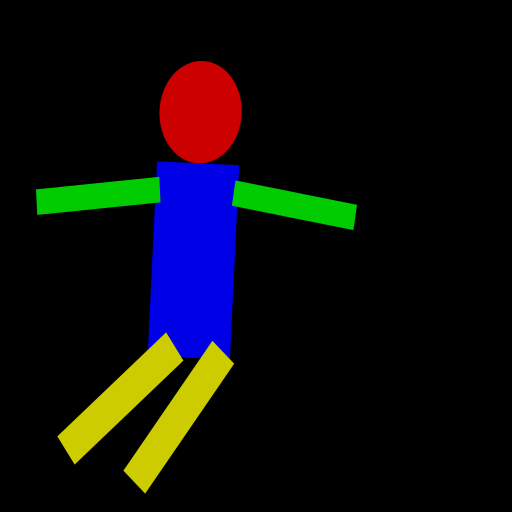

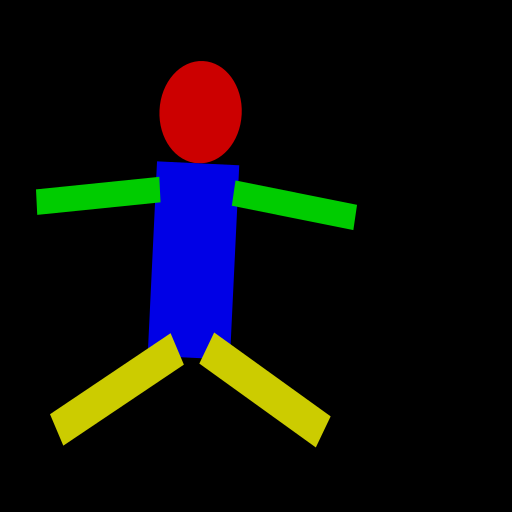

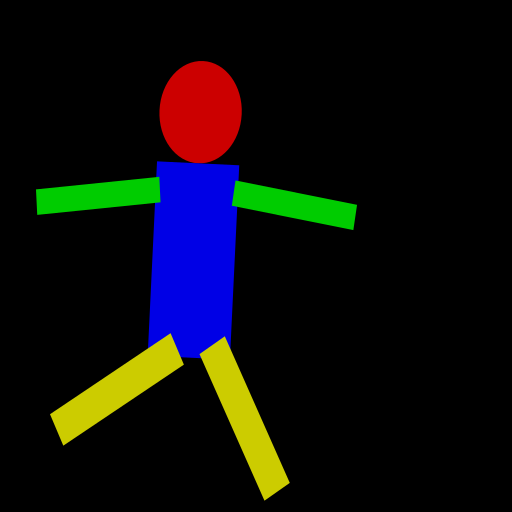

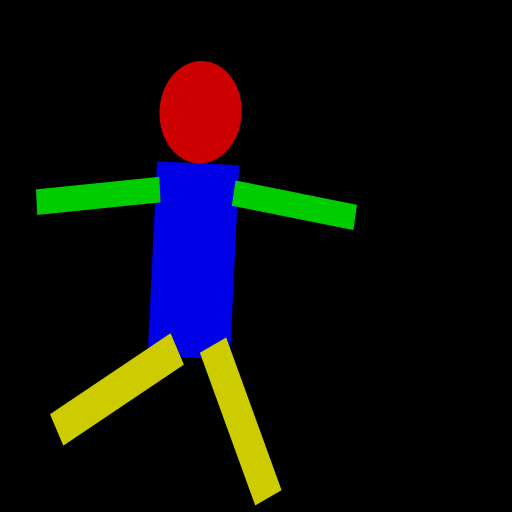

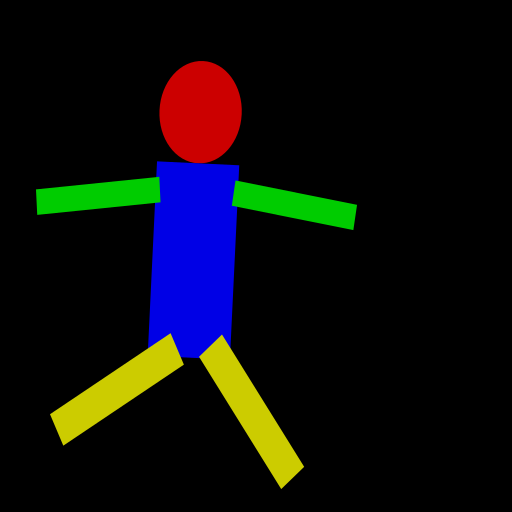

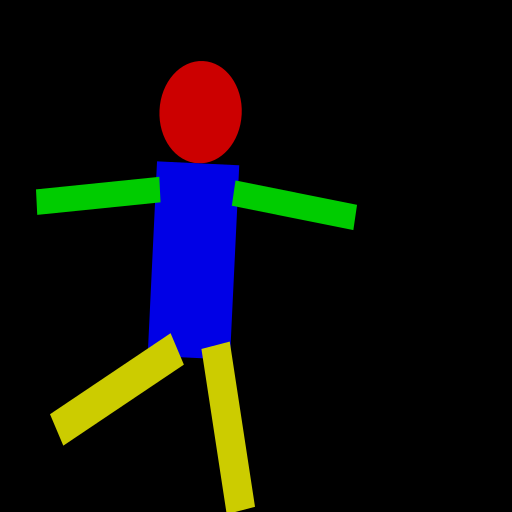

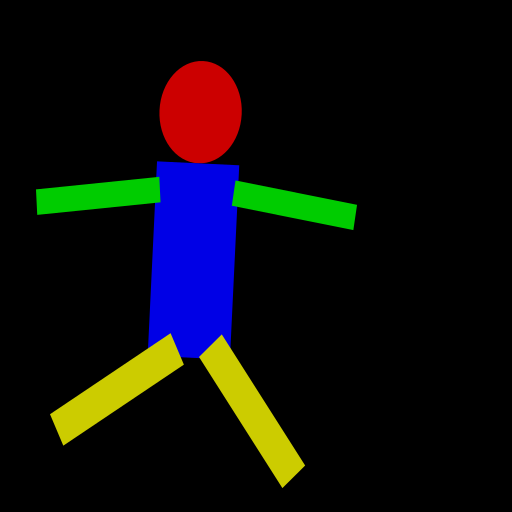

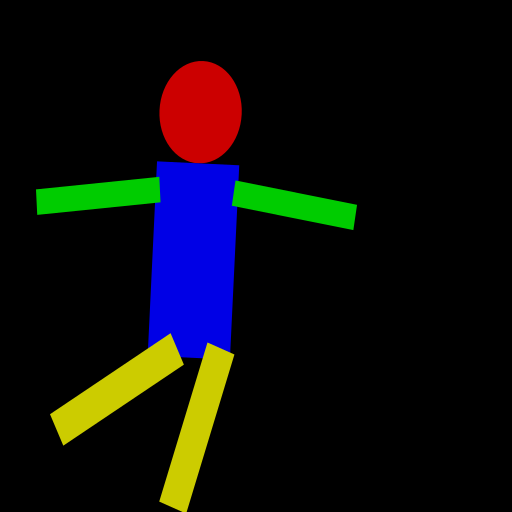

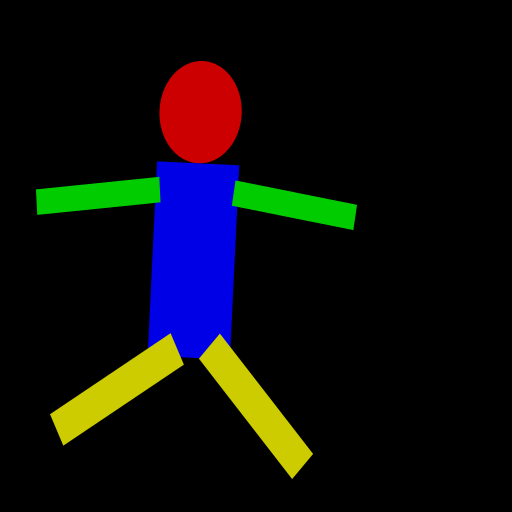

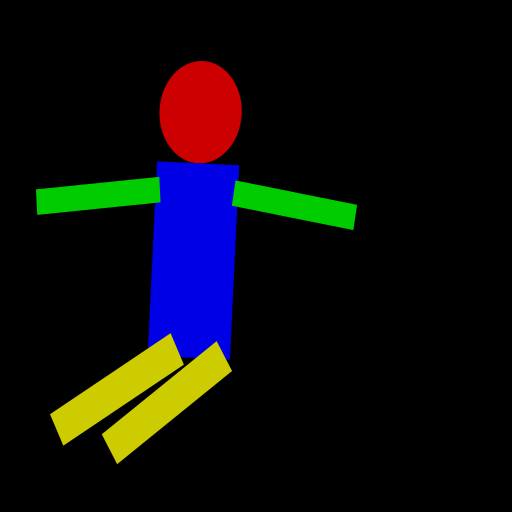

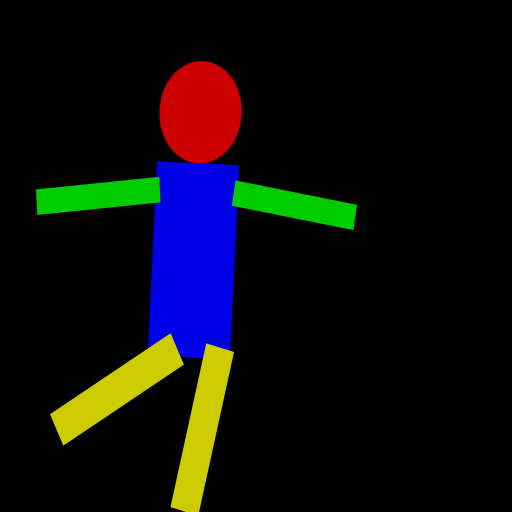

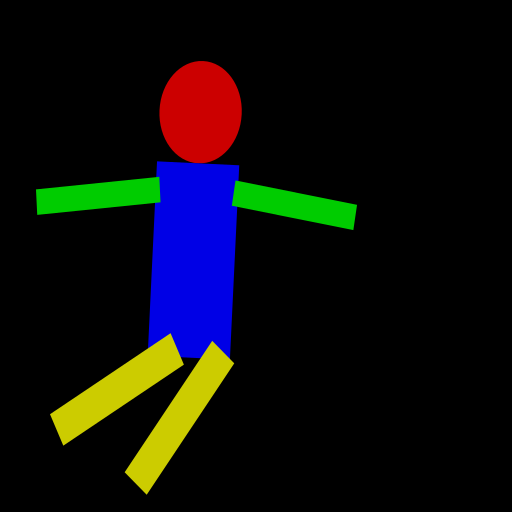

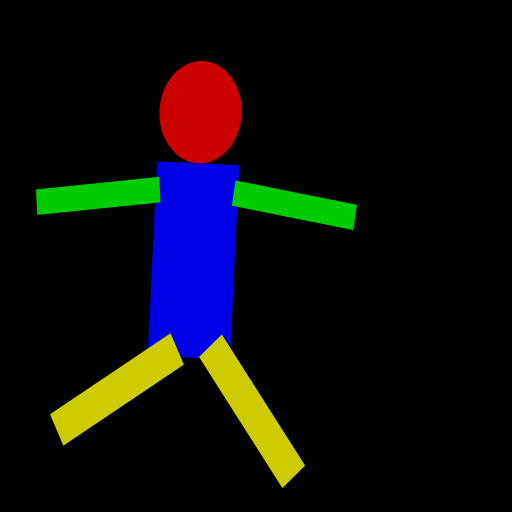

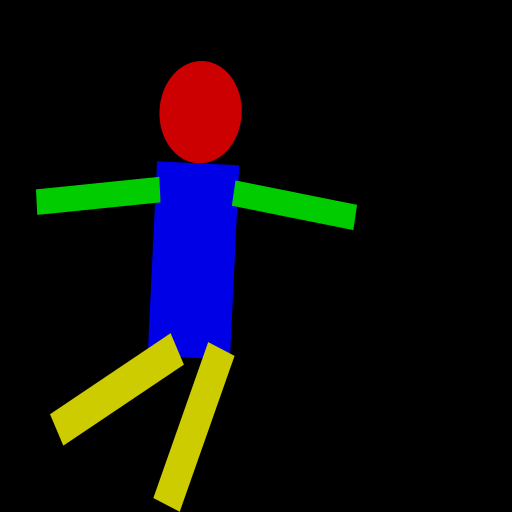

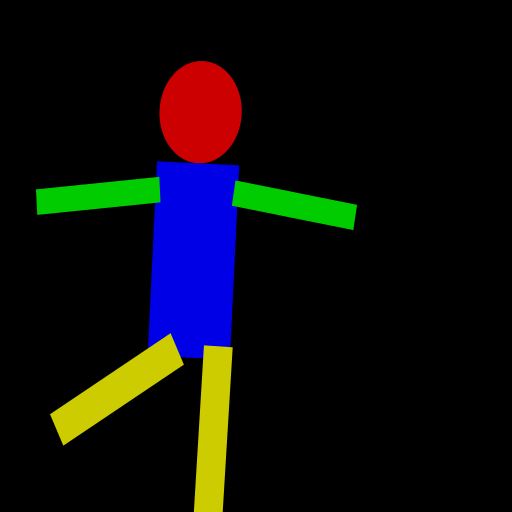

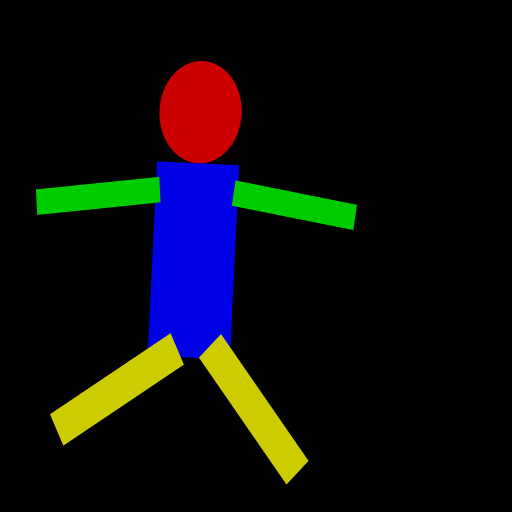

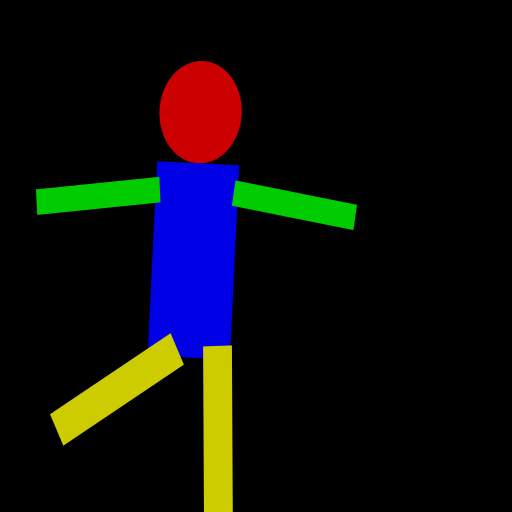

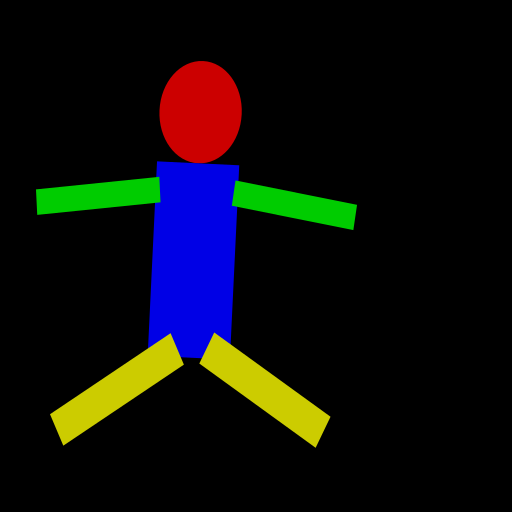

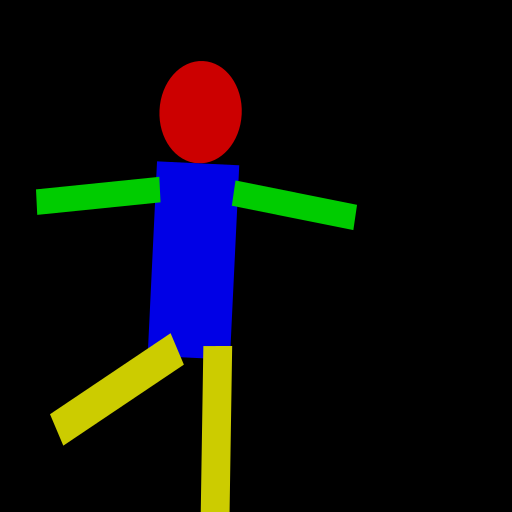

KeyboardInterrupt: 

In [7]:
p = person()
p.generate_person()